# Problem Statement: 
Create a Predictive model to predict if a patient is suffering from a chronic kidney disease or not?

# Target Variable: 
'classification' ('ckd' or 'notckd', ckd - chronic kidney disease)

# Predictors: 
'id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'



# Predictor feature details:
age - age<br>
bp - blood pressure<br>
sg - specific gravity<br>
al - albumin<br>
su - sugar<br>
rbc - red blood cells<br>
pc - pus cell<br>
pcc - pus cell clumps<br>
ba - bacteria<br>
bgr - blood glucose random<br>
bu - blood urea<br>
sc - serum creatinine<br>
sod - sodium<br>
pot - potassium<br>
hemo - hemoglobin<br>
pcv - packed cell volume<br>
wc - white blood cell count<br>
rc - red blood cell count<br>
htn - hypertension<br>
dm - diabetes mellitus<br>
cad - coronary artery disease<br>
appet - appetite<br>
pe - pedal edema<br>
ane - anemia<br>
class - class<br>

# STEP 1 : Importing requisite libraries


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno 
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.simplefilter('ignore')

from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [8]:
def display_confusion_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred_lr)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
  print(classification_report(y_test, y_pred))


# STEP 2 : Importing training dataset

In [10]:
# Reading the dataset
ckd_df = pd.read_csv('../input/ckdisease/kidney_disease.csv')

In [11]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
##Rename the columns to have meaningful names
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

In [13]:
#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

# STEP 3 : Exploratory Data Analysis


In [14]:
#Check the shape
print(ckd_df.shape)

(400, 26)


Inference - there are 26 features and 400 rows. Small dataset for training.

In [15]:
# Check the data first
ckd_df.head(5)

id   age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  0   48.0  80.0            1.020             1.0      0.0    NaN              
1  1   7.0   50.0            1.020             4.0      0.0    NaN              
2  2   62.0  80.0            1.010             2.0      3.0    normal           
3  3   48.0  70.0            1.005             4.0      0.0    normal           
4  4   51.0  80.0            1.010             2.0      0.0    normal           

   pus_cell pus_cell_clumps    bacteria  ...  packed_cell_volume  \
0  normal    notpresent      notpresent  ...  44                   
1  normal    notpresent      notpresent  ...  38                   
2  normal    notpresent      notpresent  ...  31                   
3  abnormal  present         notpresent  ...  32                   
4  normal    notpresent      notpresent  ...  35                   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0  7800                    5.2                   yes            
1  6000                    NaN                   no             
2  7500                    NaN                   no             
3  6700                    3.9                   yes            
4  7300                    4.6                   no             

   diabetes_mellitus  coronary_artery_disease appetite pedal_edema anemia  \
0  yes                no                       good     no          no      
1  no                 no                       good     no          no      
2  yes                no                       poor     no          yes     
3  no                 no                       poor     yes         yes     
4  no                 no                       good     no          no      

  classification  
0  ckd            
1  ckd            
2  ckd            
3  ckd            
4  ckd            

[5 rows x 26 columns]

In [16]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Inference - most of the features are float. The object features need verified categorical values

In [17]:
#Check the number of NULL values in the train Dataset
print('Null values in Train Data: \n', ckd_df.isnull().sum())

Null values in Train Data: 
 id                         0  
age                        9  
blood_pressure             12 
specific_gravity           47 
albumin                    46 
sugar                      49 
red_blood_cells            152
pus_cell                   65 
pus_cell_clumps            4  
bacteria                   4  
blood_glucose_random       44 
blood_urea                 19 
serum_creatinine           17 
sodium                     87 
potassium                  88 
hemoglobin                 52 
packed_cell_volume         70 
white_blood_cell_count     105
red_blood_cell_count       130
hypertension               2  
diabetes_mellitus          2  
coronary_artery_disease    2  
appetite                   1  
pedal_edema                1  
anemia                     1  
classification             0  
dtype: int64


Inference - There are missing values for rbc, wbc. Given the small size of train dataset, there is imputation required.

In [18]:
#Check the target value counts
print('Total Count of the Prediction Output Column Classification values: \n', ckd_df['classification'].value_counts())

Total Count of the Prediction Output Column Classification values: 
 ckd       248
notckd    150
ckd\t     2  
Name: classification, dtype: int64


Inference - Distribution is balanced and good. Target values need no correction.

In [19]:
for c in ckd_df.columns:
  print(c)
  print(c,ckd_df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

Inference - There are incorrect values for diabetes_mellitus, coronary_artery_disease and white_blood_cell_count which need to be corrected.



Inference - Values look good now except for missing values "\t?" and NaN. These will be treated in imputation

In [20]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')

In [34]:
ckd_df["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [33]:
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

In [35]:
# Looking at the statistial distribution of the data including categorical variables
ckd_df.describe(include='all').T

count unique         top freq      mean         std  \
id                       400   NaN    NaN         NaN  199.5     115.614      
age                      391   NaN    NaN         NaN  51.4834   17.1697      
blood_pressure           388   NaN    NaN         NaN  76.4691   13.6836      
specific_gravity         353   NaN    NaN         NaN  1.01741   0.00571662   
albumin                  354   NaN    NaN         NaN  1.01695   1.35268      
sugar                    351   NaN    NaN         NaN  0.450142  1.09919      
red_blood_cells          248   2      normal      201  NaN       NaN          
pus_cell                 335   2      normal      259  NaN       NaN          
pus_cell_clumps          396   2      notpresent  354  NaN       NaN          
bacteria                 396   2      notpresent  374  NaN       NaN          
blood_glucose_random     356   NaN    NaN         NaN  148.037   79.2817      
blood_urea               381   NaN    NaN         NaN  57.4257   50.503       
serum_creatinine         383   NaN    NaN         NaN  3.07245   5.74113      
sodium                   313   NaN    NaN         NaN  137.529   10.4088      
potassium                312   NaN    NaN         NaN  4.62724   3.1939       
hemoglobin               348   NaN    NaN         NaN  12.5264   2.91259      
packed_cell_volume       330   44     41          21   NaN       NaN          
white_blood_cell_count   295   91     9800        11   NaN       NaN          
red_blood_cell_count     270   49     5.2         18   NaN       NaN          
hypertension             398   2      no          251  NaN       NaN          
diabetes_mellitus        398   2      no          261  NaN       NaN          
coronary_artery_disease  398   2      no          364  NaN       NaN          
appetite                 399   2      good        317  NaN       NaN          
pedal_edema              399   2      no          323  NaN       NaN          
anemia                   399   2      no          339  NaN       NaN          
classification           400   2      ckd         250  NaN       NaN          

                           min    25%    50%     75%    max  
id                       0      99.75  199.5  299.25  399    
age                      2      42     55     64.5    90     
blood_pressure           50     70     80     80      180    
specific_gravity         1.005  1.01   1.02   1.02    1.025  
albumin                  0      0      0      2       5      
sugar                    0      0      0      0       5      
red_blood_cells          NaN    NaN    NaN    NaN     NaN    
pus_cell                 NaN    NaN    NaN    NaN     NaN    
pus_cell_clumps          NaN    NaN    NaN    NaN     NaN    
bacteria                 NaN    NaN    NaN    NaN     NaN    
blood_glucose_random     22     99     121    163     490    
blood_urea               1.5    27     42     66      391    
serum_creatinine         0.4    0.9    1.3    2.8     76     
sodium                   4.5    135    138    142     163    
potassium                2.5    3.8    4.4    4.9     47     
hemoglobin               3.1    10.3   12.65  15      17.8   
packed_cell_volume       NaN    NaN    NaN    NaN     NaN    
white_blood_cell_count   NaN    NaN    NaN    NaN     NaN    
red_blood_cell_count     NaN    NaN    NaN    NaN     NaN    
hypertension             NaN    NaN    NaN    NaN     NaN    
diabetes_mellitus        NaN    NaN    NaN    NaN     NaN    
coronary_artery_disease  NaN    NaN    NaN    NaN     NaN    
appetite                 NaN    NaN    NaN    NaN     NaN    
pedal_edema              NaN    NaN    NaN    NaN     NaN    
anemia                   NaN    NaN    NaN    NaN     NaN    
classification           NaN    NaN    NaN    NaN     NaN

Inferences:

1. All features, including categorical are listed.
2. The count value varies from 187 to 280. This means there are few features with missing values.
3. The feature **id** is a running number and seems to be an unique identifier for each row. So, it is not an influencing feature.
4. **age** is between 2 and 90. It is normally distributed.
5. **blood_pressure** , **sodium** and **hemoglobin** are normally distributed.
6. **blood_glucose_random** and **potassium** are right skewed
7. **blood_urea** and **serum_creatinine** are left skewed.
8. Categorical target value is well balanced.



# STEP 4 : Distribution of all features


If target variable's distribution is too skewed then the predictive modeling will not be possible. Bell curve is desirable but slightly positive skew or negative skew is also fine. To make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

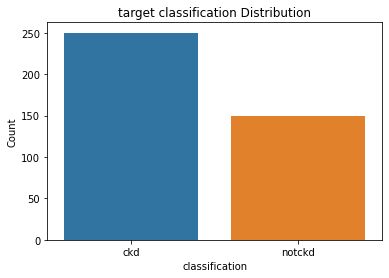

In [36]:
sns.countplot(x='classification',data=ckd_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

Inference - no imbalance in the target feature

In [38]:
##Percent of target data
print("Percent of distribution below:")
ckd_df["classification"].value_counts()/len(ckd_df)*100

Percent of distribution below:


ckd       62.5
notckd    37.5
Name: classification, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d40298d0>,
      dtype=object)

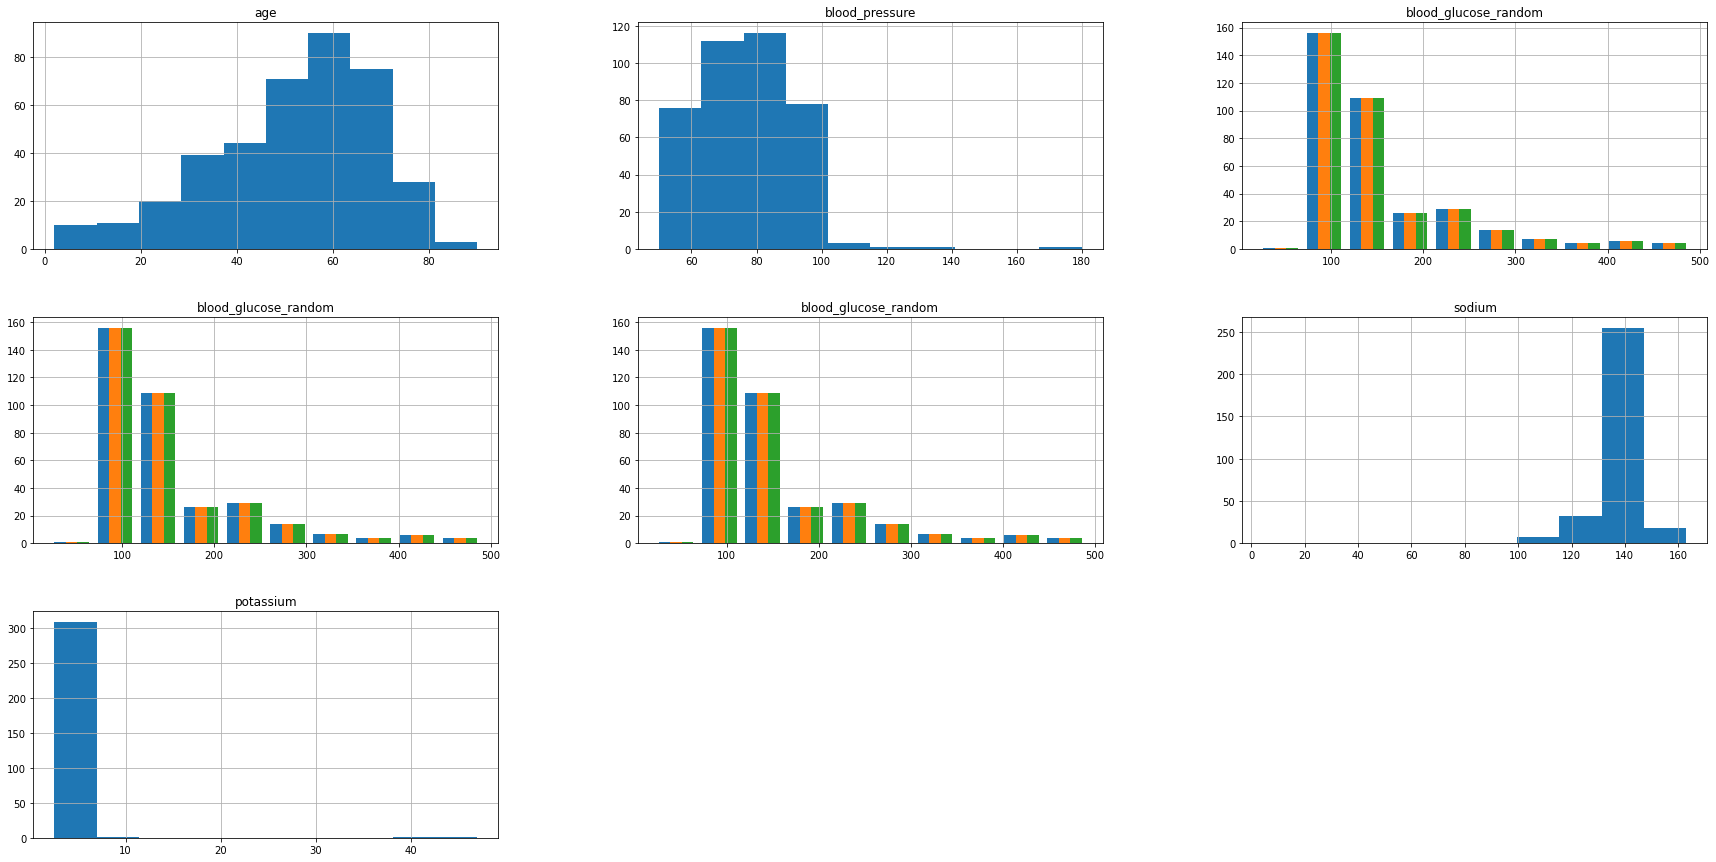

In [39]:
#histograms for all continous variables
ckd_df.hist(['age','blood_pressure', 'blood_glucose_random', 'blood_glucose_random', 
         'blood_glucose_random', 'sodium', 'potassium',  
         'packed_cell_volume', 'packed_cell_volume', 'red_blood_cell_count'], figsize=(30,15))

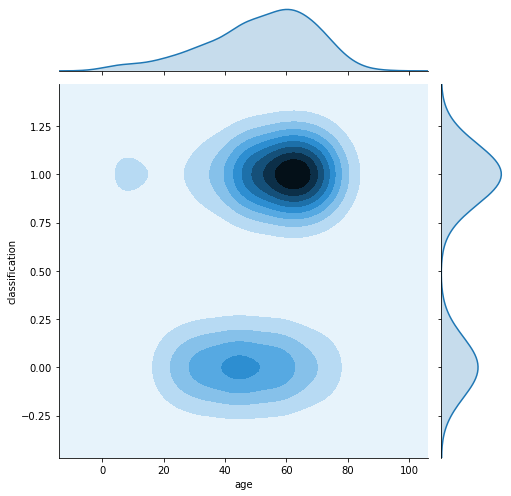

In [40]:
#Check distribution between age and ckd presence
# KDE is used to study PDF of a continuous RV
ckd_df["classification"] = [1 if i == "ckd" else 0 for i in ckd_df["classification"]]
sns.jointplot(ckd_df.age, ckd_df.classification, kind="kde", size=7)

Inferences 
1. nockd - concentrated more around age=40
2. ckd - concentrated more around age = 65

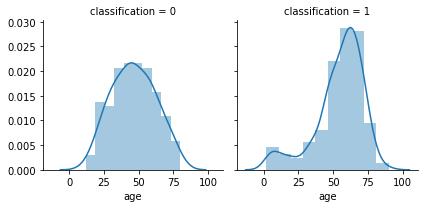

In [41]:
# Check distribution of age for each target class
g = sns.FacetGrid(ckd_df,col="classification")
g.map(sns.distplot,"age", bins=10)
plt.show()

Inferences
1. For class nockd, the data is normally distributed
2. For class ckd, the data is right skewed. There are larger number of values distributed on the right side of the plot. 

# STEP 5 : Check correlation between features

In [42]:
corr_df = ckd_df.corr()

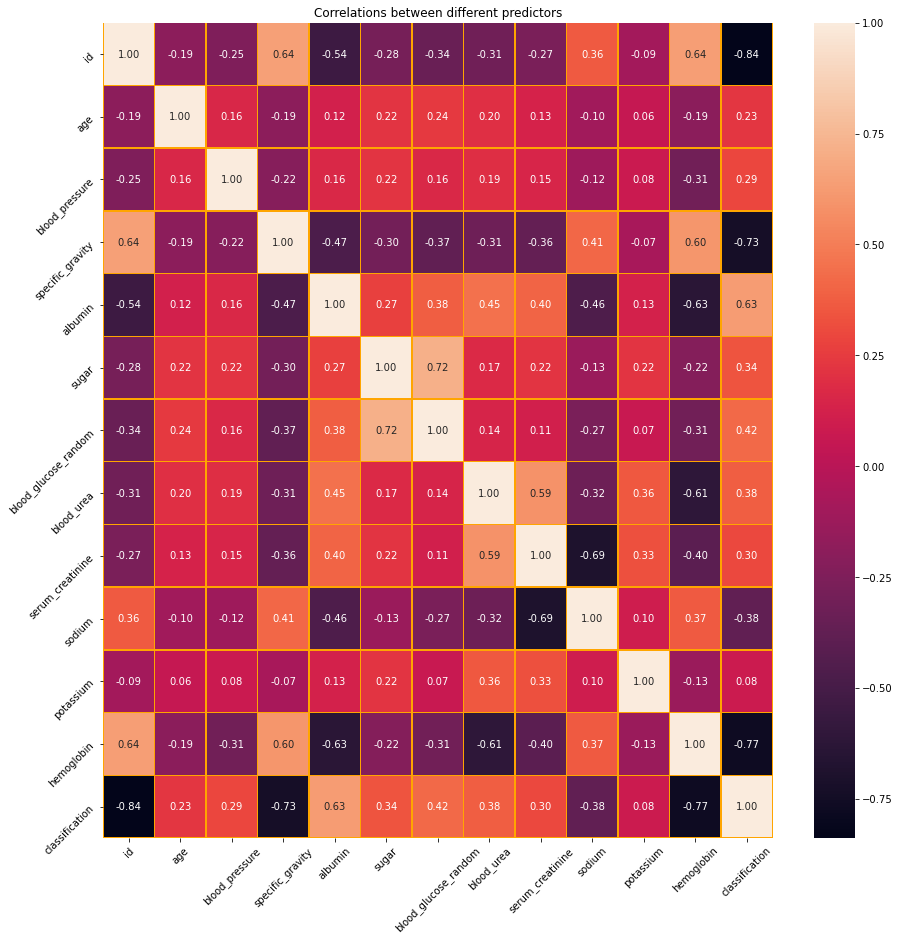

In [43]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

Inferences
1. Any correlation coefficients close to +1 and -1 imply the features are highly correlated.
2. hemo and pcv have correlation coefficient = 0.9. Highly correlated.
3. Any correlationclose to 0 with target can be removed. Here **potassium** can be removed from the features.

# STEP 6 : Data preprocessing

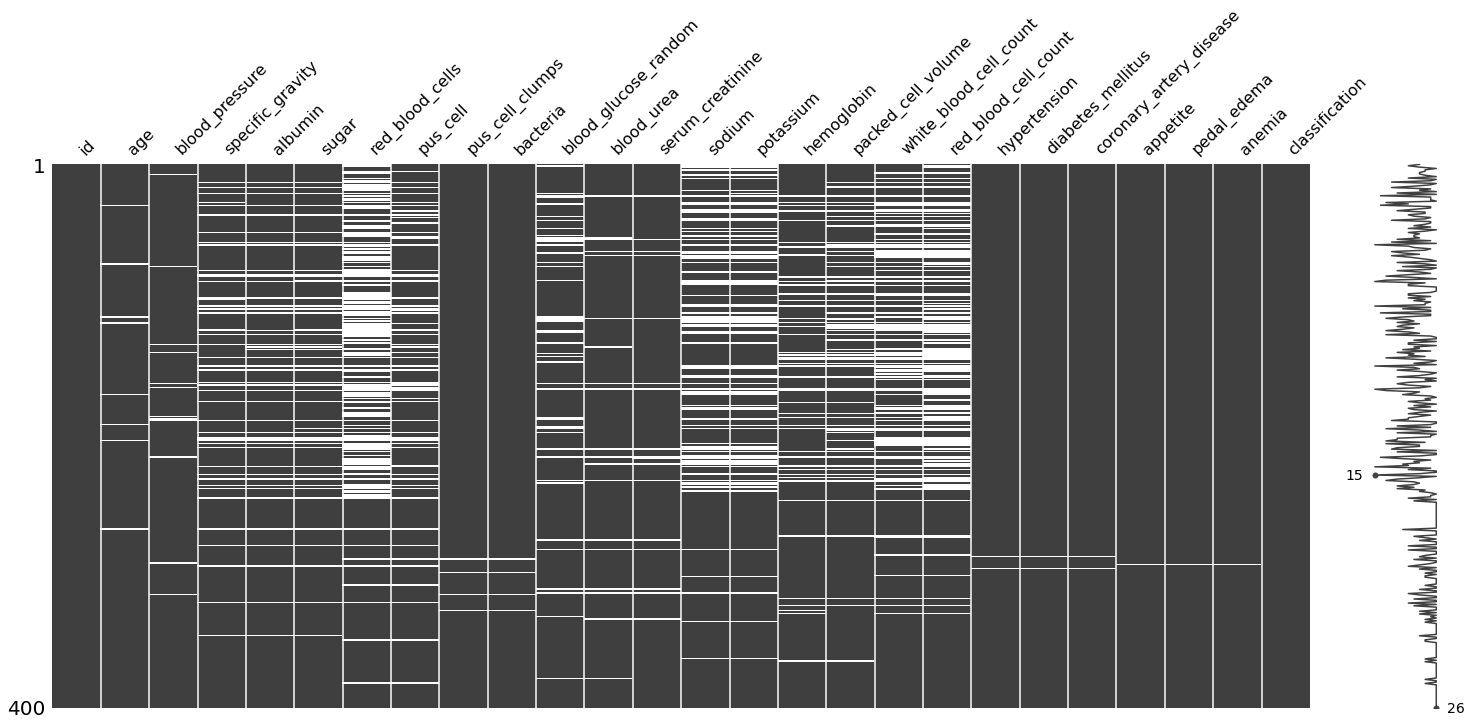

In [44]:
##Find missing values and impute them
# Visualize missing values as a matrix 
msno.matrix(ckd_df) 

Inference - Many columns have missing values. Needs to be fixed

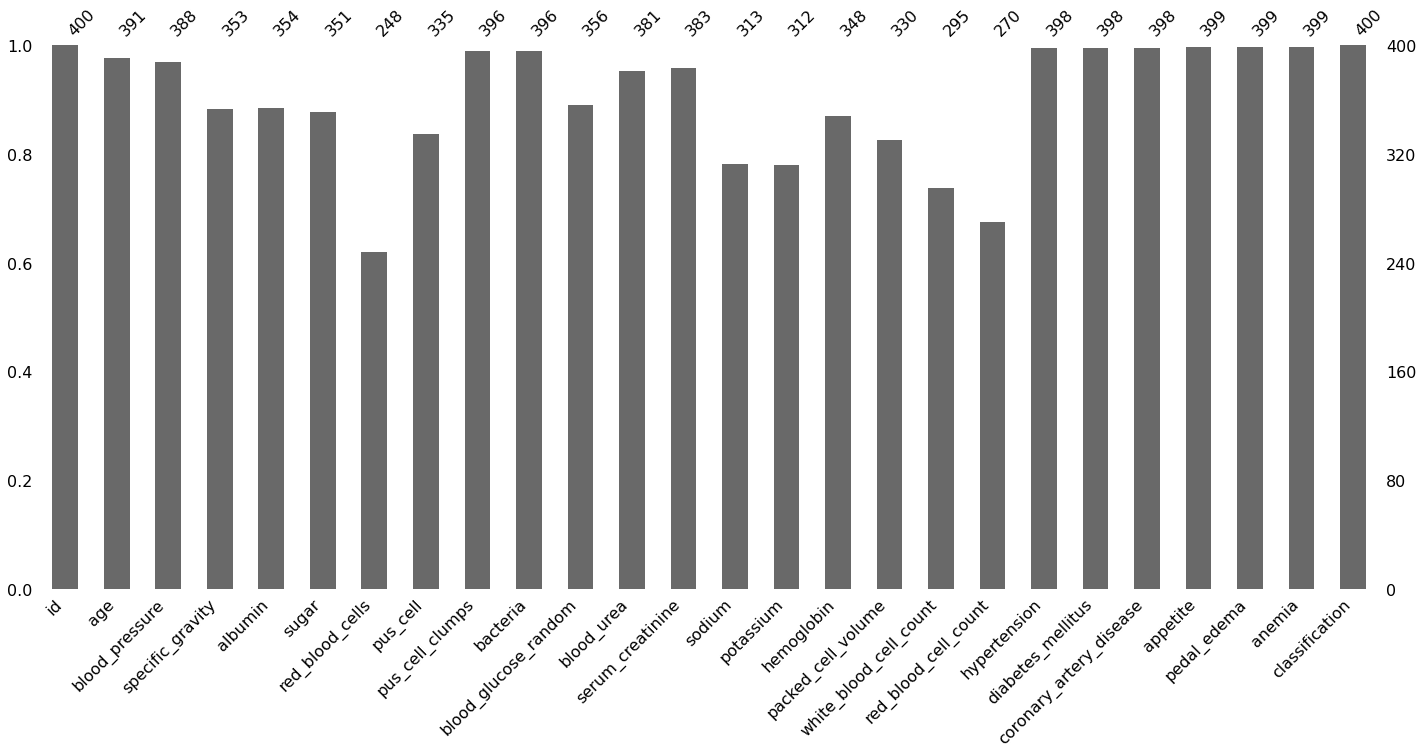

In [45]:
## Visualize the missing values in a histogram
msno.bar(ckd_df)

In [46]:
##Check if the values are good
for c in ckd_df.columns:
  print(c,ckd_df[c].unique())

id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

Inference - There are \t? values, which need to be replaced

In [47]:
ckd_df["white_blood_cell_count"]=ckd_df["white_blood_cell_count"].replace("\t?", np.nan)
ckd_df["red_blood_cell_count"]=ckd_df["red_blood_cell_count"].replace("\t?", np.nan)
ckd_df['diabetes_mellitus'] = ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["packed_cell_volume"]= ckd_df["packed_cell_volume"].replace("\t?", np.nan)

In [48]:
##Re-check if the values are good
for c in ckd_df.columns:
  print(c,ckd_df[c].unique())

id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

In [49]:
for string_column in ["red_blood_cells","pus_cell","pus_cell_clumps","bacteria","hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia","appetite"]:
  ckd_df[string_column]=ckd_df[string_column].astype(str)


In [50]:
## Do some encoding to use KNN Imputer
ckd_df['red_blood_cells']=ckd_df['red_blood_cells'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell']=ckd_df['pus_cell'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell_clumps']=ckd_df['pus_cell_clumps'].replace({'notpresent':0,'present':1})
ckd_df['bacteria']=ckd_df['bacteria'].replace({'notpresent':0,'present':1})
ckd_df['hypertension']=ckd_df['hypertension'].replace({'no':0,'yes':1})
ckd_df['diabetes_mellitus']=ckd_df['diabetes_mellitus'].replace({'no':0,'yes':1})
ckd_df['coronary_artery_disease']=ckd_df['coronary_artery_disease'].replace({'no':0,'yes':1})
ckd_df['pedal_edema']=ckd_df['pedal_edema'].replace({'no':0,'yes':1})
ckd_df['anemia']=ckd_df['anemia'].replace({'no':0,'yes':1})
ckd_df['appetite']=ckd_df['appetite'].replace({'poor':0,'good':1})

In [51]:
##List all columns with % NaNs
print (round((ckd_df.isnull().sum() * 100/ len(ckd_df)),2).sort_values(ascending=False))

red_blood_cell_count       32.75
white_blood_cell_count     26.50
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.75
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                 4.75 
serum_creatinine           4.25 
blood_pressure             3.00 
age                        2.25 
pus_cell_clumps            0.00 
red_blood_cells            0.00 
pus_cell                   0.00 
classification             0.00 
bacteria                   0.00 
anemia                     0.00 
hypertension               0.00 
diabetes_mellitus          0.00 
coronary_artery_disease    0.00 
appetite                   0.00 
pedal_edema                0.00 
id                         0.00 
dtype: float64


In [52]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [53]:
impute_columns=list(set(ckd_df.columns)-set(["classification"]))
print(impute_columns)

['sugar', 'red_blood_cells', 'pus_cell', 'specific_gravity', 'diabetes_mellitus', 'id', 'sodium', 'hypertension', 'packed_cell_volume', 'albumin', 'bacteria', 'white_blood_cell_count', 'red_blood_cell_count', 'serum_creatinine', 'hemoglobin', 'appetite', 'potassium', 'blood_glucose_random', 'blood_urea', 'age', 'coronary_artery_disease', 'pus_cell_clumps', 'anemia', 'blood_pressure', 'pedal_edema']


In [54]:
imputer.fit(ckd_df[impute_columns])

KNNImputer()

In [55]:
X_trans=pd.DataFrame(imputer.transform(ckd_df[impute_columns]), columns=impute_columns)

In [56]:
X_trans.head(3)

sugar  red_blood_cells  pus_cell  specific_gravity  diabetes_mellitus   id  \
0  0.0    0.2              1.0       1.02              1.0                0.0   
1  0.0    0.4              1.0       1.02              0.0                1.0   
2  3.0    1.0              1.0       1.01              1.0                2.0   

   sodium  hypertension  packed_cell_volume  albumin  ...  appetite  \
0  131.6   1.0           44.0                1.0      ...  1.0        
1  129.4   0.0           38.0                4.0      ...  1.0        
2  134.2   0.0           31.0                2.0      ...  0.0        

   potassium  blood_glucose_random  blood_urea   age  coronary_artery_disease  \
0  3.96       121.0                 36.0        48.0  0.0                       
1  4.00       180.8                 18.0        7.0   0.0                       
2  4.50       423.0                 53.0        62.0  0.0                       

   pus_cell_clumps  anemia  blood_pressure  pedal_edema  
0  0.0              0.0     80.0            0.0          
1  0.0              0.0     50.0            0.0          
2  0.0              1.0     80.0            0.0          

[3 rows x 25 columns]

In [57]:
##List all columns with % NaNs
print (round((X_trans.isnull().sum() * 100/ len(X_trans)),2).sort_values(ascending=False))

pedal_edema                0.0
white_blood_cell_count     0.0
red_blood_cells            0.0
pus_cell                   0.0
specific_gravity           0.0
diabetes_mellitus          0.0
id                         0.0
sodium                     0.0
hypertension               0.0
packed_cell_volume         0.0
albumin                    0.0
bacteria                   0.0
red_blood_cell_count       0.0
blood_pressure             0.0
serum_creatinine           0.0
hemoglobin                 0.0
appetite                   0.0
potassium                  0.0
blood_glucose_random       0.0
blood_urea                 0.0
age                        0.0
coronary_artery_disease    0.0
pus_cell_clumps            0.0
anemia                     0.0
sugar                      0.0
dtype: float64


Inference - all NaNs have been imputed

In [58]:
X=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [59]:
y=ckd_df["classification"]

In [60]:
X_prod=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [61]:
print(X.shape)
print(y.shape)
print(X_prod.shape)

(400, 24)
(400,)
(400, 24)


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sugar                    400 non-null    float64
 1   red_blood_cells          400 non-null    float64
 2   pus_cell                 400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   diabetes_mellitus        400 non-null    float64
 5   sodium                   400 non-null    float64
 6   hypertension             400 non-null    float64
 7   packed_cell_volume       400 non-null    float64
 8   albumin                  400 non-null    float64
 9   bacteria                 400 non-null    float64
 10  white_blood_cell_count   400 non-null    float64
 11  red_blood_cell_count     400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  hemoglobin               400 non-null    float64
 14  appetite                 4

# STEP 6 : Predictive Models with hyperparameter tuning Section

In [63]:
cat_columns=["red_blood_cells",
  "pus_cell",
  "pus_cell_clumps",
  "bacteria",
  "hypertension",
  "diabetes_mellitus",
  "coronary_artery_disease",
  "appetite",
  "pedal_edema",
  "anemia"]

In [64]:
##Split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


In [66]:
# Logistic Regression Hyper parameter tuning
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

lr = LogisticRegression() 

lr = GridSearchCV(lr, param_grid, cv = 5) 

lr.fit(X_train, y_train) 
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.94375


In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.94      0.93      0.94        55

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Accuracy of Logistic Regression is : 0.9125


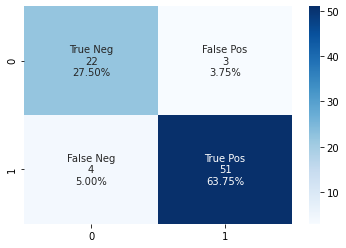

In [68]:
y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)

In [69]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 8, 'max_features': 0.2, 'max_depth': 8, 'criterion': 'gini', 'class_weight': {0: 1, 1: 1}}
Best score is 0.9974025974025974


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Decision Tree is : 1.0


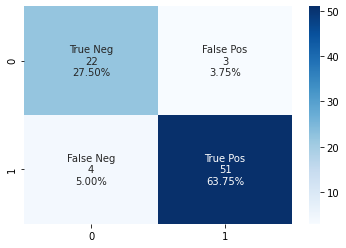

In [70]:
y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)

In [71]:
# Parameters for Random Foresthypertuning
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 

Tuned Random Tree Parameters: {'n_estimators': 54, 'min_weight_fraction_leaf': 0.30000000000000004, 'min_samples_split': 140, 'min_samples_leaf': 26, 'max_leaf_nodes': 57, 'max_depth': 10}
Best score is 0.989542036910458


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.93      0.96        55

    accuracy                           0.95        80
   macro avg       0.93      0.96      0.94        80
weighted avg       0.96      0.95      0.95        80

Accuracy of Random Forests model is : 0.95


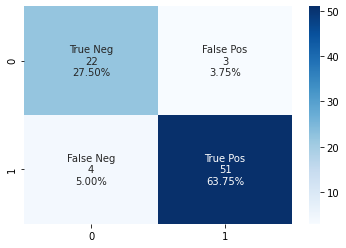

In [72]:
y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forests model is :", accuracy_rf)

In [73]:
params = {'depth':[2, 3, 4],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

cb = RandomizedSearchCV(CatBoostClassifier(),
                         params,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

cb_model = cb.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned Catboost Parameters: {}".format(cb_model.best_params_)) 
print("Best score is {}".format(cb_model.best_score_)) 

0:	learn: 0.5908093	total: 57.9ms	remaining: 57.8s
1:	learn: 0.5466525	total: 58.8ms	remaining: 29.4s
2:	learn: 0.4824548	total: 59.6ms	remaining: 19.8s
3:	learn: 0.4129177	total: 60.3ms	remaining: 15s
4:	learn: 0.3686784	total: 60.9ms	remaining: 12.1s
5:	learn: 0.3469029	total: 61.6ms	remaining: 10.2s
6:	learn: 0.3068591	total: 62.2ms	remaining: 8.82s
7:	learn: 0.2736694	total: 62.9ms	remaining: 7.8s
8:	learn: 0.2408947	total: 63.5ms	remaining: 7s
9:	learn: 0.2180478	total: 64.1ms	remaining: 6.35s
10:	learn: 0.1982631	total: 64.8ms	remaining: 5.83s
11:	learn: 0.1885053	total: 65.4ms	remaining: 5.38s
12:	learn: 0.1639754	total: 66ms	remaining: 5.01s
13:	learn: 0.1502956	total: 66.6ms	remaining: 4.69s
14:	learn: 0.1401310	total: 67.4ms	remaining: 4.42s
15:	learn: 0.1283961	total: 68ms	remaining: 4.18s
16:	learn: 0.0969717	total: 68.6ms	remaining: 3.97s
17:	learn: 0.0912518	total: 69.3ms	remaining: 3.78s
18:	learn: 0.0833010	total: 70ms	remaining: 3.61s
19:	learn: 0.0765654	total: 70.6ms

285:	learn: 0.0000039	total: 232ms	remaining: 579ms
286:	learn: 0.0000039	total: 233ms	remaining: 578ms
287:	learn: 0.0000039	total: 234ms	remaining: 577ms
288:	learn: 0.0000039	total: 234ms	remaining: 576ms
289:	learn: 0.0000039	total: 235ms	remaining: 575ms
290:	learn: 0.0000039	total: 235ms	remaining: 574ms
291:	learn: 0.0000039	total: 236ms	remaining: 572ms
292:	learn: 0.0000039	total: 237ms	remaining: 571ms
293:	learn: 0.0000039	total: 237ms	remaining: 569ms
294:	learn: 0.0000039	total: 238ms	remaining: 568ms
295:	learn: 0.0000039	total: 238ms	remaining: 566ms
296:	learn: 0.0000039	total: 239ms	remaining: 565ms
297:	learn: 0.0000039	total: 239ms	remaining: 563ms
298:	learn: 0.0000039	total: 240ms	remaining: 562ms
299:	learn: 0.0000039	total: 240ms	remaining: 561ms
300:	learn: 0.0000039	total: 241ms	remaining: 559ms
301:	learn: 0.0000039	total: 241ms	remaining: 558ms
302:	learn: 0.0000039	total: 242ms	remaining: 556ms
303:	learn: 0.0000039	total: 242ms	remaining: 555ms
304:	learn: 

606:	learn: 0.0000039	total: 408ms	remaining: 264ms
607:	learn: 0.0000039	total: 409ms	remaining: 263ms
608:	learn: 0.0000039	total: 409ms	remaining: 263ms
609:	learn: 0.0000039	total: 410ms	remaining: 262ms
610:	learn: 0.0000039	total: 410ms	remaining: 261ms
611:	learn: 0.0000039	total: 410ms	remaining: 260ms
612:	learn: 0.0000039	total: 411ms	remaining: 259ms
613:	learn: 0.0000039	total: 411ms	remaining: 259ms
614:	learn: 0.0000039	total: 412ms	remaining: 258ms
615:	learn: 0.0000039	total: 412ms	remaining: 257ms
616:	learn: 0.0000039	total: 413ms	remaining: 256ms
617:	learn: 0.0000039	total: 413ms	remaining: 256ms
618:	learn: 0.0000039	total: 414ms	remaining: 255ms
619:	learn: 0.0000039	total: 414ms	remaining: 254ms
620:	learn: 0.0000039	total: 415ms	remaining: 253ms
621:	learn: 0.0000039	total: 415ms	remaining: 252ms
622:	learn: 0.0000039	total: 416ms	remaining: 252ms
623:	learn: 0.0000039	total: 416ms	remaining: 251ms
624:	learn: 0.0000039	total: 417ms	remaining: 250ms
625:	learn: 

926:	learn: 0.0000039	total: 580ms	remaining: 45.7ms
927:	learn: 0.0000039	total: 581ms	remaining: 45.1ms
928:	learn: 0.0000039	total: 582ms	remaining: 44.4ms
929:	learn: 0.0000039	total: 582ms	remaining: 43.8ms
930:	learn: 0.0000039	total: 583ms	remaining: 43.2ms
931:	learn: 0.0000039	total: 583ms	remaining: 42.6ms
932:	learn: 0.0000039	total: 584ms	remaining: 41.9ms
933:	learn: 0.0000039	total: 584ms	remaining: 41.3ms
934:	learn: 0.0000039	total: 585ms	remaining: 40.6ms
935:	learn: 0.0000039	total: 585ms	remaining: 40ms
936:	learn: 0.0000039	total: 586ms	remaining: 39.4ms
937:	learn: 0.0000039	total: 586ms	remaining: 38.7ms
938:	learn: 0.0000039	total: 587ms	remaining: 38.1ms
939:	learn: 0.0000039	total: 587ms	remaining: 37.5ms
940:	learn: 0.0000039	total: 588ms	remaining: 36.8ms
941:	learn: 0.0000039	total: 588ms	remaining: 36.2ms
942:	learn: 0.0000039	total: 589ms	remaining: 35.6ms
943:	learn: 0.0000039	total: 589ms	remaining: 34.9ms
944:	learn: 0.0000039	total: 590ms	remaining: 34

166:	learn: 0.0000133	total: 92.2ms	remaining: 460ms
167:	learn: 0.0000133	total: 92.9ms	remaining: 460ms
168:	learn: 0.0000129	total: 93.5ms	remaining: 460ms
169:	learn: 0.0000126	total: 94.3ms	remaining: 460ms
170:	learn: 0.0000126	total: 94.9ms	remaining: 460ms
171:	learn: 0.0000122	total: 95.5ms	remaining: 460ms
172:	learn: 0.0000119	total: 96ms	remaining: 459ms
173:	learn: 0.0000116	total: 96.5ms	remaining: 458ms
174:	learn: 0.0000116	total: 97ms	remaining: 457ms
175:	learn: 0.0000114	total: 97.6ms	remaining: 457ms
176:	learn: 0.0000111	total: 98.1ms	remaining: 456ms
177:	learn: 0.0000108	total: 98.6ms	remaining: 455ms
178:	learn: 0.0000105	total: 99.1ms	remaining: 455ms
179:	learn: 0.0000105	total: 99.6ms	remaining: 454ms
180:	learn: 0.0000105	total: 100ms	remaining: 453ms
181:	learn: 0.0000102	total: 101ms	remaining: 452ms
182:	learn: 0.0000094	total: 101ms	remaining: 452ms
183:	learn: 0.0000094	total: 102ms	remaining: 451ms
184:	learn: 0.0000094	total: 102ms	remaining: 451ms
18

495:	learn: 0.0000085	total: 265ms	remaining: 269ms
496:	learn: 0.0000085	total: 266ms	remaining: 269ms
497:	learn: 0.0000085	total: 266ms	remaining: 269ms
498:	learn: 0.0000085	total: 267ms	remaining: 268ms
499:	learn: 0.0000085	total: 268ms	remaining: 268ms
500:	learn: 0.0000085	total: 268ms	remaining: 267ms
501:	learn: 0.0000085	total: 269ms	remaining: 267ms
502:	learn: 0.0000085	total: 269ms	remaining: 266ms
503:	learn: 0.0000085	total: 270ms	remaining: 266ms
504:	learn: 0.0000085	total: 270ms	remaining: 265ms
505:	learn: 0.0000085	total: 271ms	remaining: 265ms
506:	learn: 0.0000085	total: 272ms	remaining: 264ms
507:	learn: 0.0000085	total: 272ms	remaining: 264ms
508:	learn: 0.0000085	total: 273ms	remaining: 263ms
509:	learn: 0.0000085	total: 273ms	remaining: 262ms
510:	learn: 0.0000085	total: 274ms	remaining: 262ms
511:	learn: 0.0000085	total: 274ms	remaining: 261ms
512:	learn: 0.0000085	total: 275ms	remaining: 261ms
513:	learn: 0.0000085	total: 275ms	remaining: 260ms
514:	learn: 

796:	learn: 0.0000085	total: 438ms	remaining: 112ms
797:	learn: 0.0000085	total: 439ms	remaining: 111ms
798:	learn: 0.0000085	total: 440ms	remaining: 111ms
799:	learn: 0.0000085	total: 440ms	remaining: 110ms
800:	learn: 0.0000085	total: 441ms	remaining: 110ms
801:	learn: 0.0000085	total: 441ms	remaining: 109ms
802:	learn: 0.0000085	total: 442ms	remaining: 108ms
803:	learn: 0.0000085	total: 442ms	remaining: 108ms
804:	learn: 0.0000085	total: 443ms	remaining: 107ms
805:	learn: 0.0000085	total: 443ms	remaining: 107ms
806:	learn: 0.0000085	total: 444ms	remaining: 106ms
807:	learn: 0.0000085	total: 444ms	remaining: 106ms
808:	learn: 0.0000085	total: 445ms	remaining: 105ms
809:	learn: 0.0000085	total: 445ms	remaining: 104ms
810:	learn: 0.0000085	total: 446ms	remaining: 104ms
811:	learn: 0.0000085	total: 446ms	remaining: 103ms
812:	learn: 0.0000085	total: 447ms	remaining: 103ms
813:	learn: 0.0000085	total: 447ms	remaining: 102ms
814:	learn: 0.0000085	total: 448ms	remaining: 102ms
815:	learn: 

28:	learn: 0.0407163	total: 19.1ms	remaining: 640ms
29:	learn: 0.0380974	total: 20ms	remaining: 647ms
30:	learn: 0.0363042	total: 20.7ms	remaining: 646ms
31:	learn: 0.0279232	total: 21.3ms	remaining: 644ms
32:	learn: 0.0261322	total: 21.9ms	remaining: 642ms
33:	learn: 0.0241218	total: 22.6ms	remaining: 642ms
34:	learn: 0.0224933	total: 23.3ms	remaining: 642ms
35:	learn: 0.0210118	total: 23.9ms	remaining: 640ms
36:	learn: 0.0195844	total: 24.4ms	remaining: 636ms
37:	learn: 0.0185381	total: 25ms	remaining: 633ms
38:	learn: 0.0171191	total: 25.6ms	remaining: 631ms
39:	learn: 0.0163115	total: 26.3ms	remaining: 632ms
40:	learn: 0.0152959	total: 26.9ms	remaining: 629ms
41:	learn: 0.0144301	total: 27.5ms	remaining: 628ms
42:	learn: 0.0136038	total: 28.2ms	remaining: 628ms
43:	learn: 0.0128643	total: 28.9ms	remaining: 627ms
44:	learn: 0.0120532	total: 29.5ms	remaining: 626ms
45:	learn: 0.0089528	total: 30.1ms	remaining: 625ms
46:	learn: 0.0082581	total: 30.7ms	remaining: 622ms
47:	learn: 0.007

348:	learn: 0.0000057	total: 199ms	remaining: 371ms
349:	learn: 0.0000057	total: 200ms	remaining: 371ms
350:	learn: 0.0000057	total: 200ms	remaining: 371ms
351:	learn: 0.0000057	total: 201ms	remaining: 370ms
352:	learn: 0.0000057	total: 202ms	remaining: 370ms
353:	learn: 0.0000057	total: 202ms	remaining: 369ms
354:	learn: 0.0000057	total: 203ms	remaining: 369ms
355:	learn: 0.0000057	total: 203ms	remaining: 368ms
356:	learn: 0.0000057	total: 204ms	remaining: 367ms
357:	learn: 0.0000057	total: 204ms	remaining: 367ms
358:	learn: 0.0000057	total: 205ms	remaining: 366ms
359:	learn: 0.0000057	total: 205ms	remaining: 365ms
360:	learn: 0.0000057	total: 206ms	remaining: 365ms
361:	learn: 0.0000057	total: 206ms	remaining: 364ms
362:	learn: 0.0000057	total: 207ms	remaining: 363ms
363:	learn: 0.0000057	total: 208ms	remaining: 363ms
364:	learn: 0.0000057	total: 208ms	remaining: 362ms
365:	learn: 0.0000057	total: 209ms	remaining: 361ms
366:	learn: 0.0000057	total: 209ms	remaining: 361ms
367:	learn: 

657:	learn: 0.0000057	total: 374ms	remaining: 194ms
658:	learn: 0.0000057	total: 375ms	remaining: 194ms
659:	learn: 0.0000057	total: 375ms	remaining: 193ms
660:	learn: 0.0000057	total: 376ms	remaining: 193ms
661:	learn: 0.0000057	total: 377ms	remaining: 192ms
662:	learn: 0.0000057	total: 377ms	remaining: 192ms
663:	learn: 0.0000057	total: 378ms	remaining: 191ms
664:	learn: 0.0000057	total: 378ms	remaining: 191ms
665:	learn: 0.0000057	total: 379ms	remaining: 190ms
666:	learn: 0.0000057	total: 379ms	remaining: 189ms
667:	learn: 0.0000057	total: 380ms	remaining: 189ms
668:	learn: 0.0000057	total: 380ms	remaining: 188ms
669:	learn: 0.0000057	total: 381ms	remaining: 188ms
670:	learn: 0.0000057	total: 381ms	remaining: 187ms
671:	learn: 0.0000057	total: 382ms	remaining: 186ms
672:	learn: 0.0000057	total: 382ms	remaining: 186ms
673:	learn: 0.0000057	total: 383ms	remaining: 185ms
674:	learn: 0.0000057	total: 384ms	remaining: 185ms
675:	learn: 0.0000057	total: 384ms	remaining: 184ms
676:	learn: 

984:	learn: 0.0000057	total: 547ms	remaining: 8.32ms
985:	learn: 0.0000057	total: 548ms	remaining: 7.78ms
986:	learn: 0.0000057	total: 548ms	remaining: 7.22ms
987:	learn: 0.0000057	total: 549ms	remaining: 6.67ms
988:	learn: 0.0000057	total: 550ms	remaining: 6.11ms
989:	learn: 0.0000057	total: 550ms	remaining: 5.56ms
990:	learn: 0.0000057	total: 551ms	remaining: 5ms
991:	learn: 0.0000057	total: 551ms	remaining: 4.44ms
992:	learn: 0.0000057	total: 552ms	remaining: 3.89ms
993:	learn: 0.0000057	total: 552ms	remaining: 3.33ms
994:	learn: 0.0000057	total: 553ms	remaining: 2.78ms
995:	learn: 0.0000057	total: 553ms	remaining: 2.22ms
996:	learn: 0.0000057	total: 554ms	remaining: 1.67ms
997:	learn: 0.0000057	total: 554ms	remaining: 1.11ms
998:	learn: 0.0000057	total: 555ms	remaining: 555us
999:	learn: 0.0000057	total: 555ms	remaining: 0us
0:	learn: 0.5840829	total: 604us	remaining: 604ms
1:	learn: 0.5308253	total: 1.33ms	remaining: 663ms
2:	learn: 0.4542094	total: 1.9ms	remaining: 632ms
3:	learn

230:	learn: 0.0000058	total: 128ms	remaining: 426ms
231:	learn: 0.0000058	total: 129ms	remaining: 426ms
232:	learn: 0.0000058	total: 130ms	remaining: 426ms
233:	learn: 0.0000058	total: 130ms	remaining: 427ms
234:	learn: 0.0000058	total: 133ms	remaining: 431ms
235:	learn: 0.0000058	total: 133ms	remaining: 431ms
236:	learn: 0.0000058	total: 134ms	remaining: 431ms
237:	learn: 0.0000058	total: 134ms	remaining: 430ms
238:	learn: 0.0000058	total: 135ms	remaining: 430ms
239:	learn: 0.0000058	total: 135ms	remaining: 429ms
240:	learn: 0.0000058	total: 136ms	remaining: 429ms
241:	learn: 0.0000058	total: 137ms	remaining: 428ms
242:	learn: 0.0000058	total: 137ms	remaining: 427ms
243:	learn: 0.0000058	total: 138ms	remaining: 427ms
244:	learn: 0.0000058	total: 138ms	remaining: 426ms
245:	learn: 0.0000058	total: 139ms	remaining: 426ms
246:	learn: 0.0000058	total: 139ms	remaining: 425ms
247:	learn: 0.0000058	total: 140ms	remaining: 424ms
248:	learn: 0.0000058	total: 140ms	remaining: 424ms
249:	learn: 

548:	learn: 0.0000058	total: 301ms	remaining: 247ms
549:	learn: 0.0000058	total: 302ms	remaining: 247ms
550:	learn: 0.0000058	total: 302ms	remaining: 246ms
551:	learn: 0.0000058	total: 303ms	remaining: 246ms
552:	learn: 0.0000058	total: 304ms	remaining: 245ms
553:	learn: 0.0000058	total: 304ms	remaining: 245ms
554:	learn: 0.0000058	total: 305ms	remaining: 245ms
555:	learn: 0.0000058	total: 306ms	remaining: 244ms
556:	learn: 0.0000058	total: 306ms	remaining: 243ms
557:	learn: 0.0000058	total: 307ms	remaining: 243ms
558:	learn: 0.0000058	total: 307ms	remaining: 242ms
559:	learn: 0.0000058	total: 308ms	remaining: 242ms
560:	learn: 0.0000058	total: 308ms	remaining: 241ms
561:	learn: 0.0000058	total: 309ms	remaining: 241ms
562:	learn: 0.0000058	total: 309ms	remaining: 240ms
563:	learn: 0.0000058	total: 310ms	remaining: 240ms
564:	learn: 0.0000058	total: 310ms	remaining: 239ms
565:	learn: 0.0000058	total: 311ms	remaining: 238ms
566:	learn: 0.0000058	total: 311ms	remaining: 238ms
567:	learn: 

846:	learn: 0.0000058	total: 474ms	remaining: 85.7ms
847:	learn: 0.0000058	total: 477ms	remaining: 85.5ms
848:	learn: 0.0000058	total: 478ms	remaining: 85ms
849:	learn: 0.0000058	total: 479ms	remaining: 84.5ms
850:	learn: 0.0000058	total: 479ms	remaining: 83.9ms
851:	learn: 0.0000058	total: 480ms	remaining: 83.4ms
852:	learn: 0.0000058	total: 481ms	remaining: 82.8ms
853:	learn: 0.0000058	total: 481ms	remaining: 82.3ms
854:	learn: 0.0000058	total: 482ms	remaining: 81.7ms
855:	learn: 0.0000058	total: 482ms	remaining: 81.2ms
856:	learn: 0.0000058	total: 483ms	remaining: 80.6ms
857:	learn: 0.0000058	total: 484ms	remaining: 80ms
858:	learn: 0.0000058	total: 484ms	remaining: 79.5ms
859:	learn: 0.0000058	total: 485ms	remaining: 78.9ms
860:	learn: 0.0000058	total: 485ms	remaining: 78.3ms
861:	learn: 0.0000058	total: 486ms	remaining: 77.8ms
862:	learn: 0.0000058	total: 486ms	remaining: 77.2ms
863:	learn: 0.0000058	total: 487ms	remaining: 76.6ms
864:	learn: 0.0000058	total: 487ms	remaining: 76.1

46:	learn: 0.0049834	total: 48.8ms	remaining: 989ms
47:	learn: 0.0047662	total: 49.5ms	remaining: 982ms
48:	learn: 0.0045554	total: 50.4ms	remaining: 978ms
49:	learn: 0.0042331	total: 51.2ms	remaining: 972ms
50:	learn: 0.0039377	total: 51.9ms	remaining: 967ms
51:	learn: 0.0037621	total: 52.7ms	remaining: 961ms
52:	learn: 0.0035854	total: 53.5ms	remaining: 956ms
53:	learn: 0.0033565	total: 54.3ms	remaining: 950ms
54:	learn: 0.0032124	total: 55ms	remaining: 944ms
55:	learn: 0.0030999	total: 56ms	remaining: 944ms
56:	learn: 0.0028585	total: 56.8ms	remaining: 939ms
57:	learn: 0.0026771	total: 57.5ms	remaining: 934ms
58:	learn: 0.0024796	total: 58.4ms	remaining: 931ms
59:	learn: 0.0019512	total: 59.3ms	remaining: 929ms
60:	learn: 0.0018244	total: 60ms	remaining: 924ms
61:	learn: 0.0017443	total: 60.8ms	remaining: 920ms
62:	learn: 0.0016416	total: 61.6ms	remaining: 915ms
63:	learn: 0.0015463	total: 62.3ms	remaining: 911ms
64:	learn: 0.0014105	total: 63ms	remaining: 906ms
65:	learn: 0.0011590

309:	learn: 0.0000076	total: 223ms	remaining: 496ms
310:	learn: 0.0000076	total: 223ms	remaining: 495ms
311:	learn: 0.0000076	total: 224ms	remaining: 494ms
312:	learn: 0.0000076	total: 225ms	remaining: 493ms
313:	learn: 0.0000076	total: 225ms	remaining: 492ms
314:	learn: 0.0000076	total: 226ms	remaining: 491ms
315:	learn: 0.0000076	total: 226ms	remaining: 490ms
316:	learn: 0.0000076	total: 227ms	remaining: 489ms
317:	learn: 0.0000076	total: 227ms	remaining: 488ms
318:	learn: 0.0000076	total: 228ms	remaining: 486ms
319:	learn: 0.0000076	total: 228ms	remaining: 485ms
320:	learn: 0.0000076	total: 229ms	remaining: 484ms
321:	learn: 0.0000076	total: 229ms	remaining: 483ms
322:	learn: 0.0000076	total: 230ms	remaining: 482ms
323:	learn: 0.0000076	total: 230ms	remaining: 481ms
324:	learn: 0.0000076	total: 231ms	remaining: 480ms
325:	learn: 0.0000076	total: 232ms	remaining: 479ms
326:	learn: 0.0000076	total: 232ms	remaining: 478ms
327:	learn: 0.0000076	total: 233ms	remaining: 476ms
328:	learn: 

632:	learn: 0.0000076	total: 397ms	remaining: 230ms
633:	learn: 0.0000076	total: 398ms	remaining: 230ms
634:	learn: 0.0000076	total: 398ms	remaining: 229ms
635:	learn: 0.0000076	total: 399ms	remaining: 228ms
636:	learn: 0.0000076	total: 399ms	remaining: 228ms
637:	learn: 0.0000076	total: 400ms	remaining: 227ms
638:	learn: 0.0000076	total: 401ms	remaining: 227ms
639:	learn: 0.0000076	total: 402ms	remaining: 226ms
640:	learn: 0.0000076	total: 403ms	remaining: 226ms
641:	learn: 0.0000076	total: 403ms	remaining: 225ms
642:	learn: 0.0000076	total: 404ms	remaining: 224ms
643:	learn: 0.0000076	total: 404ms	remaining: 224ms
644:	learn: 0.0000076	total: 405ms	remaining: 223ms
645:	learn: 0.0000076	total: 406ms	remaining: 222ms
646:	learn: 0.0000076	total: 406ms	remaining: 222ms
647:	learn: 0.0000076	total: 407ms	remaining: 221ms
648:	learn: 0.0000076	total: 408ms	remaining: 220ms
649:	learn: 0.0000076	total: 408ms	remaining: 220ms
650:	learn: 0.0000076	total: 409ms	remaining: 219ms
651:	learn: 

943:	learn: 0.0000076	total: 575ms	remaining: 34.1ms
944:	learn: 0.0000076	total: 576ms	remaining: 33.5ms
945:	learn: 0.0000076	total: 576ms	remaining: 32.9ms
946:	learn: 0.0000076	total: 577ms	remaining: 32.3ms
947:	learn: 0.0000076	total: 577ms	remaining: 31.7ms
948:	learn: 0.0000076	total: 578ms	remaining: 31.1ms
949:	learn: 0.0000076	total: 579ms	remaining: 30.4ms
950:	learn: 0.0000076	total: 579ms	remaining: 29.8ms
951:	learn: 0.0000076	total: 580ms	remaining: 29.2ms
952:	learn: 0.0000076	total: 580ms	remaining: 28.6ms
953:	learn: 0.0000076	total: 581ms	remaining: 28ms
954:	learn: 0.0000076	total: 581ms	remaining: 27.4ms
955:	learn: 0.0000076	total: 582ms	remaining: 26.8ms
956:	learn: 0.0000076	total: 582ms	remaining: 26.2ms
957:	learn: 0.0000076	total: 583ms	remaining: 25.5ms
958:	learn: 0.0000076	total: 583ms	remaining: 24.9ms
959:	learn: 0.0000076	total: 584ms	remaining: 24.3ms
960:	learn: 0.0000076	total: 584ms	remaining: 23.7ms
961:	learn: 0.0000076	total: 585ms	remaining: 23

190:	learn: 0.0000056	total: 105ms	remaining: 445ms
191:	learn: 0.0000054	total: 106ms	remaining: 446ms
192:	learn: 0.0000054	total: 107ms	remaining: 445ms
193:	learn: 0.0000053	total: 107ms	remaining: 446ms
194:	learn: 0.0000053	total: 108ms	remaining: 446ms
195:	learn: 0.0000053	total: 108ms	remaining: 445ms
196:	learn: 0.0000051	total: 109ms	remaining: 444ms
197:	learn: 0.0000051	total: 110ms	remaining: 444ms
198:	learn: 0.0000050	total: 110ms	remaining: 443ms
199:	learn: 0.0000049	total: 111ms	remaining: 442ms
200:	learn: 0.0000049	total: 111ms	remaining: 442ms
201:	learn: 0.0000048	total: 112ms	remaining: 441ms
202:	learn: 0.0000046	total: 112ms	remaining: 440ms
203:	learn: 0.0000046	total: 113ms	remaining: 439ms
204:	learn: 0.0000046	total: 113ms	remaining: 439ms
205:	learn: 0.0000045	total: 114ms	remaining: 438ms
206:	learn: 0.0000041	total: 114ms	remaining: 438ms
207:	learn: 0.0000041	total: 115ms	remaining: 437ms
208:	learn: 0.0000041	total: 115ms	remaining: 437ms
209:	learn: 

504:	learn: 0.0000039	total: 280ms	remaining: 274ms
505:	learn: 0.0000039	total: 281ms	remaining: 274ms
506:	learn: 0.0000039	total: 281ms	remaining: 274ms
507:	learn: 0.0000039	total: 282ms	remaining: 273ms
508:	learn: 0.0000039	total: 283ms	remaining: 273ms
509:	learn: 0.0000039	total: 284ms	remaining: 272ms
510:	learn: 0.0000039	total: 284ms	remaining: 272ms
511:	learn: 0.0000039	total: 285ms	remaining: 271ms
512:	learn: 0.0000039	total: 285ms	remaining: 271ms
513:	learn: 0.0000039	total: 286ms	remaining: 270ms
514:	learn: 0.0000039	total: 287ms	remaining: 270ms
515:	learn: 0.0000039	total: 287ms	remaining: 269ms
516:	learn: 0.0000039	total: 288ms	remaining: 269ms
517:	learn: 0.0000039	total: 288ms	remaining: 268ms
518:	learn: 0.0000039	total: 289ms	remaining: 268ms
519:	learn: 0.0000039	total: 290ms	remaining: 267ms
520:	learn: 0.0000039	total: 290ms	remaining: 267ms
521:	learn: 0.0000039	total: 291ms	remaining: 266ms
522:	learn: 0.0000039	total: 291ms	remaining: 266ms
523:	learn: 

774:	learn: 0.0000039	total: 455ms	remaining: 132ms
775:	learn: 0.0000039	total: 456ms	remaining: 132ms
776:	learn: 0.0000039	total: 457ms	remaining: 131ms
777:	learn: 0.0000039	total: 458ms	remaining: 131ms
778:	learn: 0.0000039	total: 458ms	remaining: 130ms
779:	learn: 0.0000039	total: 459ms	remaining: 129ms
780:	learn: 0.0000039	total: 460ms	remaining: 129ms
781:	learn: 0.0000039	total: 460ms	remaining: 128ms
782:	learn: 0.0000039	total: 461ms	remaining: 128ms
783:	learn: 0.0000039	total: 461ms	remaining: 127ms
784:	learn: 0.0000039	total: 462ms	remaining: 127ms
785:	learn: 0.0000039	total: 463ms	remaining: 126ms
786:	learn: 0.0000039	total: 463ms	remaining: 125ms
787:	learn: 0.0000039	total: 464ms	remaining: 125ms
788:	learn: 0.0000039	total: 465ms	remaining: 124ms
789:	learn: 0.0000039	total: 465ms	remaining: 124ms
790:	learn: 0.0000039	total: 466ms	remaining: 123ms
791:	learn: 0.0000039	total: 466ms	remaining: 122ms
792:	learn: 0.0000039	total: 467ms	remaining: 122ms
793:	learn: 

0:	learn: 0.5921618	total: 650us	remaining: 649ms
1:	learn: 0.5498248	total: 1.62ms	remaining: 809ms
2:	learn: 0.4855845	total: 2.28ms	remaining: 757ms
3:	learn: 0.4172901	total: 2.89ms	remaining: 720ms
4:	learn: 0.3736527	total: 3.49ms	remaining: 694ms
5:	learn: 0.3246252	total: 4.17ms	remaining: 691ms
6:	learn: 0.2543602	total: 5.01ms	remaining: 711ms
7:	learn: 0.2270717	total: 5.68ms	remaining: 704ms
8:	learn: 0.2028342	total: 6.33ms	remaining: 697ms
9:	learn: 0.1820371	total: 6.98ms	remaining: 691ms
10:	learn: 0.1655223	total: 7.65ms	remaining: 688ms
11:	learn: 0.1525244	total: 8.28ms	remaining: 682ms
12:	learn: 0.1363235	total: 8.91ms	remaining: 676ms
13:	learn: 0.1270228	total: 9.53ms	remaining: 671ms
14:	learn: 0.1195882	total: 10.2ms	remaining: 673ms
15:	learn: 0.1107090	total: 10.9ms	remaining: 669ms
16:	learn: 0.0833653	total: 11.5ms	remaining: 664ms
17:	learn: 0.0770283	total: 12.2ms	remaining: 664ms
18:	learn: 0.0706315	total: 12.8ms	remaining: 661ms
19:	learn: 0.0544397	to

278:	learn: 0.0000085	total: 176ms	remaining: 454ms
279:	learn: 0.0000085	total: 177ms	remaining: 455ms
280:	learn: 0.0000085	total: 178ms	remaining: 455ms
281:	learn: 0.0000085	total: 179ms	remaining: 454ms
282:	learn: 0.0000085	total: 179ms	remaining: 454ms
283:	learn: 0.0000085	total: 180ms	remaining: 453ms
284:	learn: 0.0000085	total: 180ms	remaining: 453ms
285:	learn: 0.0000085	total: 181ms	remaining: 452ms
286:	learn: 0.0000085	total: 182ms	remaining: 451ms
287:	learn: 0.0000085	total: 182ms	remaining: 451ms
288:	learn: 0.0000085	total: 183ms	remaining: 450ms
289:	learn: 0.0000085	total: 184ms	remaining: 449ms
290:	learn: 0.0000085	total: 184ms	remaining: 449ms
291:	learn: 0.0000085	total: 185ms	remaining: 448ms
292:	learn: 0.0000085	total: 185ms	remaining: 447ms
293:	learn: 0.0000085	total: 186ms	remaining: 447ms
294:	learn: 0.0000085	total: 187ms	remaining: 446ms
295:	learn: 0.0000085	total: 187ms	remaining: 445ms
296:	learn: 0.0000085	total: 188ms	remaining: 445ms
297:	learn: 

555:	learn: 0.0000085	total: 348ms	remaining: 278ms
556:	learn: 0.0000085	total: 349ms	remaining: 277ms
557:	learn: 0.0000085	total: 350ms	remaining: 277ms
558:	learn: 0.0000085	total: 350ms	remaining: 276ms
559:	learn: 0.0000085	total: 351ms	remaining: 276ms
560:	learn: 0.0000085	total: 352ms	remaining: 275ms
561:	learn: 0.0000085	total: 352ms	remaining: 275ms
562:	learn: 0.0000085	total: 353ms	remaining: 274ms
563:	learn: 0.0000085	total: 354ms	remaining: 273ms
564:	learn: 0.0000085	total: 354ms	remaining: 273ms
565:	learn: 0.0000085	total: 359ms	remaining: 275ms
566:	learn: 0.0000085	total: 359ms	remaining: 275ms
567:	learn: 0.0000085	total: 360ms	remaining: 274ms
568:	learn: 0.0000085	total: 361ms	remaining: 273ms
569:	learn: 0.0000085	total: 362ms	remaining: 273ms
570:	learn: 0.0000085	total: 362ms	remaining: 272ms
571:	learn: 0.0000085	total: 363ms	remaining: 272ms
572:	learn: 0.0000085	total: 364ms	remaining: 271ms
573:	learn: 0.0000085	total: 364ms	remaining: 270ms
574:	learn: 

861:	learn: 0.0000085	total: 522ms	remaining: 83.5ms
862:	learn: 0.0000085	total: 523ms	remaining: 83ms
863:	learn: 0.0000085	total: 523ms	remaining: 82.4ms
864:	learn: 0.0000085	total: 524ms	remaining: 81.8ms
865:	learn: 0.0000085	total: 524ms	remaining: 81.2ms
866:	learn: 0.0000085	total: 525ms	remaining: 80.5ms
867:	learn: 0.0000085	total: 526ms	remaining: 79.9ms
868:	learn: 0.0000085	total: 526ms	remaining: 79.3ms
869:	learn: 0.0000085	total: 527ms	remaining: 78.7ms
870:	learn: 0.0000085	total: 527ms	remaining: 78.1ms
871:	learn: 0.0000085	total: 528ms	remaining: 77.4ms
872:	learn: 0.0000085	total: 528ms	remaining: 76.8ms
873:	learn: 0.0000085	total: 528ms	remaining: 76.2ms
874:	learn: 0.0000085	total: 529ms	remaining: 75.6ms
875:	learn: 0.0000085	total: 529ms	remaining: 74.9ms
876:	learn: 0.0000085	total: 530ms	remaining: 74.3ms
877:	learn: 0.0000085	total: 531ms	remaining: 73.7ms
878:	learn: 0.0000085	total: 531ms	remaining: 73.1ms
879:	learn: 0.0000085	total: 531ms	remaining: 72

105:	learn: 0.0000915	total: 61.7ms	remaining: 520ms
106:	learn: 0.0000878	total: 62.5ms	remaining: 522ms
107:	learn: 0.0000821	total: 63.1ms	remaining: 521ms
108:	learn: 0.0000751	total: 63.8ms	remaining: 522ms
109:	learn: 0.0000712	total: 64.5ms	remaining: 522ms
110:	learn: 0.0000677	total: 65.1ms	remaining: 521ms
111:	learn: 0.0000583	total: 65.7ms	remaining: 521ms
112:	learn: 0.0000556	total: 66.3ms	remaining: 520ms
113:	learn: 0.0000513	total: 66.8ms	remaining: 519ms
114:	learn: 0.0000491	total: 67.3ms	remaining: 518ms
115:	learn: 0.0000426	total: 67.9ms	remaining: 518ms
116:	learn: 0.0000426	total: 68.6ms	remaining: 517ms
117:	learn: 0.0000407	total: 69.1ms	remaining: 517ms
118:	learn: 0.0000383	total: 69.7ms	remaining: 516ms
119:	learn: 0.0000366	total: 70.2ms	remaining: 515ms
120:	learn: 0.0000324	total: 70.8ms	remaining: 514ms
121:	learn: 0.0000317	total: 71.3ms	remaining: 513ms
122:	learn: 0.0000317	total: 71.8ms	remaining: 512ms
123:	learn: 0.0000308	total: 72.3ms	remaining:

414:	learn: 0.0000057	total: 235ms	remaining: 331ms
415:	learn: 0.0000057	total: 236ms	remaining: 331ms
416:	learn: 0.0000057	total: 237ms	remaining: 331ms
417:	learn: 0.0000057	total: 238ms	remaining: 331ms
418:	learn: 0.0000057	total: 238ms	remaining: 330ms
419:	learn: 0.0000057	total: 239ms	remaining: 330ms
420:	learn: 0.0000057	total: 239ms	remaining: 329ms
421:	learn: 0.0000057	total: 240ms	remaining: 329ms
422:	learn: 0.0000057	total: 241ms	remaining: 328ms
423:	learn: 0.0000057	total: 241ms	remaining: 328ms
424:	learn: 0.0000057	total: 242ms	remaining: 327ms
425:	learn: 0.0000057	total: 242ms	remaining: 327ms
426:	learn: 0.0000057	total: 243ms	remaining: 326ms
427:	learn: 0.0000057	total: 243ms	remaining: 325ms
428:	learn: 0.0000057	total: 244ms	remaining: 325ms
429:	learn: 0.0000057	total: 244ms	remaining: 324ms
430:	learn: 0.0000057	total: 245ms	remaining: 323ms
431:	learn: 0.0000057	total: 245ms	remaining: 323ms
432:	learn: 0.0000057	total: 246ms	remaining: 322ms
433:	learn: 

728:	learn: 0.0000057	total: 409ms	remaining: 152ms
729:	learn: 0.0000057	total: 411ms	remaining: 152ms
730:	learn: 0.0000057	total: 411ms	remaining: 151ms
731:	learn: 0.0000057	total: 412ms	remaining: 151ms
732:	learn: 0.0000057	total: 412ms	remaining: 150ms
733:	learn: 0.0000057	total: 413ms	remaining: 150ms
734:	learn: 0.0000057	total: 413ms	remaining: 149ms
735:	learn: 0.0000057	total: 414ms	remaining: 148ms
736:	learn: 0.0000057	total: 414ms	remaining: 148ms
737:	learn: 0.0000057	total: 415ms	remaining: 147ms
738:	learn: 0.0000057	total: 415ms	remaining: 147ms
739:	learn: 0.0000057	total: 416ms	remaining: 146ms
740:	learn: 0.0000057	total: 416ms	remaining: 145ms
741:	learn: 0.0000057	total: 417ms	remaining: 145ms
742:	learn: 0.0000057	total: 417ms	remaining: 144ms
743:	learn: 0.0000057	total: 418ms	remaining: 144ms
744:	learn: 0.0000057	total: 418ms	remaining: 143ms
745:	learn: 0.0000057	total: 419ms	remaining: 143ms
746:	learn: 0.0000057	total: 419ms	remaining: 142ms
747:	learn: 

0:	learn: 0.5840829	total: 670us	remaining: 670ms
1:	learn: 0.5308253	total: 1.61ms	remaining: 806ms
2:	learn: 0.4542094	total: 2.29ms	remaining: 763ms
3:	learn: 0.3923284	total: 2.92ms	remaining: 728ms
4:	learn: 0.3457152	total: 3.52ms	remaining: 701ms
5:	learn: 0.3026319	total: 4.11ms	remaining: 681ms
6:	learn: 0.2644398	total: 4.66ms	remaining: 661ms
7:	learn: 0.2315218	total: 5.29ms	remaining: 656ms
8:	learn: 0.2122988	total: 5.82ms	remaining: 640ms
9:	learn: 0.1946177	total: 6.35ms	remaining: 629ms
10:	learn: 0.1803914	total: 6.93ms	remaining: 623ms
11:	learn: 0.1711670	total: 7.55ms	remaining: 622ms
12:	learn: 0.1556050	total: 8.14ms	remaining: 618ms
13:	learn: 0.1417171	total: 8.68ms	remaining: 611ms
14:	learn: 0.1282706	total: 9.18ms	remaining: 603ms
15:	learn: 0.1185891	total: 9.78ms	remaining: 601ms
16:	learn: 0.1088693	total: 10.4ms	remaining: 599ms
17:	learn: 0.0998202	total: 10.9ms	remaining: 593ms
18:	learn: 0.0928152	total: 11.4ms	remaining: 589ms
19:	learn: 0.0852400	to

283:	learn: 0.0000058	total: 175ms	remaining: 441ms
284:	learn: 0.0000058	total: 176ms	remaining: 441ms
285:	learn: 0.0000058	total: 176ms	remaining: 440ms
286:	learn: 0.0000058	total: 177ms	remaining: 440ms
287:	learn: 0.0000058	total: 178ms	remaining: 439ms
288:	learn: 0.0000058	total: 178ms	remaining: 439ms
289:	learn: 0.0000058	total: 179ms	remaining: 438ms
290:	learn: 0.0000058	total: 179ms	remaining: 437ms
291:	learn: 0.0000058	total: 180ms	remaining: 436ms
292:	learn: 0.0000058	total: 180ms	remaining: 435ms
293:	learn: 0.0000058	total: 181ms	remaining: 435ms
294:	learn: 0.0000058	total: 181ms	remaining: 434ms
295:	learn: 0.0000058	total: 182ms	remaining: 433ms
296:	learn: 0.0000058	total: 182ms	remaining: 432ms
297:	learn: 0.0000058	total: 183ms	remaining: 431ms
298:	learn: 0.0000058	total: 183ms	remaining: 430ms
299:	learn: 0.0000058	total: 184ms	remaining: 430ms
300:	learn: 0.0000058	total: 185ms	remaining: 429ms
301:	learn: 0.0000058	total: 185ms	remaining: 428ms
302:	learn: 

605:	learn: 0.0000058	total: 348ms	remaining: 226ms
606:	learn: 0.0000058	total: 348ms	remaining: 226ms
607:	learn: 0.0000058	total: 349ms	remaining: 225ms
608:	learn: 0.0000058	total: 350ms	remaining: 225ms
609:	learn: 0.0000058	total: 350ms	remaining: 224ms
610:	learn: 0.0000058	total: 351ms	remaining: 223ms
611:	learn: 0.0000058	total: 351ms	remaining: 223ms
612:	learn: 0.0000058	total: 352ms	remaining: 222ms
613:	learn: 0.0000058	total: 353ms	remaining: 222ms
614:	learn: 0.0000058	total: 353ms	remaining: 221ms
615:	learn: 0.0000058	total: 354ms	remaining: 220ms
616:	learn: 0.0000058	total: 354ms	remaining: 220ms
617:	learn: 0.0000058	total: 355ms	remaining: 219ms
618:	learn: 0.0000058	total: 355ms	remaining: 219ms
619:	learn: 0.0000058	total: 356ms	remaining: 218ms
620:	learn: 0.0000058	total: 356ms	remaining: 218ms
621:	learn: 0.0000058	total: 357ms	remaining: 217ms
622:	learn: 0.0000058	total: 358ms	remaining: 216ms
623:	learn: 0.0000058	total: 358ms	remaining: 216ms
624:	learn: 

907:	learn: 0.0000058	total: 521ms	remaining: 52.8ms
908:	learn: 0.0000058	total: 521ms	remaining: 52.2ms
909:	learn: 0.0000058	total: 524ms	remaining: 51.8ms
910:	learn: 0.0000058	total: 524ms	remaining: 51.2ms
911:	learn: 0.0000058	total: 525ms	remaining: 50.7ms
912:	learn: 0.0000058	total: 526ms	remaining: 50.1ms
913:	learn: 0.0000058	total: 526ms	remaining: 49.5ms
914:	learn: 0.0000058	total: 527ms	remaining: 48.9ms
915:	learn: 0.0000058	total: 527ms	remaining: 48.4ms
916:	learn: 0.0000058	total: 528ms	remaining: 47.8ms
917:	learn: 0.0000058	total: 529ms	remaining: 47.2ms
918:	learn: 0.0000058	total: 529ms	remaining: 46.6ms
919:	learn: 0.0000058	total: 530ms	remaining: 46.1ms
920:	learn: 0.0000058	total: 530ms	remaining: 45.5ms
921:	learn: 0.0000058	total: 531ms	remaining: 44.9ms
922:	learn: 0.0000058	total: 531ms	remaining: 44.3ms
923:	learn: 0.0000058	total: 532ms	remaining: 43.8ms
924:	learn: 0.0000058	total: 533ms	remaining: 43.2ms
925:	learn: 0.0000058	total: 533ms	remaining: 

128:	learn: 0.0000249	total: 82ms	remaining: 553ms
129:	learn: 0.0000249	total: 82.8ms	remaining: 554ms
130:	learn: 0.0000230	total: 83.5ms	remaining: 554ms
131:	learn: 0.0000230	total: 84.1ms	remaining: 553ms
132:	learn: 0.0000226	total: 84.7ms	remaining: 552ms
133:	learn: 0.0000226	total: 85.2ms	remaining: 551ms
134:	learn: 0.0000226	total: 85.7ms	remaining: 549ms
135:	learn: 0.0000220	total: 86.2ms	remaining: 547ms
136:	learn: 0.0000216	total: 86.8ms	remaining: 547ms
137:	learn: 0.0000216	total: 87.4ms	remaining: 546ms
138:	learn: 0.0000210	total: 87.9ms	remaining: 545ms
139:	learn: 0.0000205	total: 88.5ms	remaining: 543ms
140:	learn: 0.0000197	total: 89ms	remaining: 542ms
141:	learn: 0.0000192	total: 89.5ms	remaining: 541ms
142:	learn: 0.0000186	total: 90ms	remaining: 539ms
143:	learn: 0.0000170	total: 90.5ms	remaining: 538ms
144:	learn: 0.0000160	total: 91.1ms	remaining: 537ms
145:	learn: 0.0000153	total: 91.6ms	remaining: 536ms
146:	learn: 0.0000153	total: 92.1ms	remaining: 534ms

437:	learn: 0.0000076	total: 254ms	remaining: 326ms
438:	learn: 0.0000076	total: 255ms	remaining: 326ms
439:	learn: 0.0000076	total: 256ms	remaining: 326ms
440:	learn: 0.0000076	total: 257ms	remaining: 325ms
441:	learn: 0.0000076	total: 257ms	remaining: 325ms
442:	learn: 0.0000076	total: 258ms	remaining: 324ms
443:	learn: 0.0000076	total: 258ms	remaining: 323ms
444:	learn: 0.0000076	total: 259ms	remaining: 323ms
445:	learn: 0.0000076	total: 259ms	remaining: 322ms
446:	learn: 0.0000076	total: 260ms	remaining: 321ms
447:	learn: 0.0000076	total: 260ms	remaining: 321ms
448:	learn: 0.0000076	total: 261ms	remaining: 320ms
449:	learn: 0.0000076	total: 261ms	remaining: 319ms
450:	learn: 0.0000076	total: 262ms	remaining: 319ms
451:	learn: 0.0000076	total: 262ms	remaining: 318ms
452:	learn: 0.0000076	total: 263ms	remaining: 317ms
453:	learn: 0.0000076	total: 263ms	remaining: 317ms
454:	learn: 0.0000076	total: 264ms	remaining: 316ms
455:	learn: 0.0000076	total: 264ms	remaining: 316ms
456:	learn: 

751:	learn: 0.0000076	total: 428ms	remaining: 141ms
752:	learn: 0.0000076	total: 429ms	remaining: 141ms
753:	learn: 0.0000076	total: 430ms	remaining: 140ms
754:	learn: 0.0000076	total: 430ms	remaining: 140ms
755:	learn: 0.0000076	total: 431ms	remaining: 139ms
756:	learn: 0.0000076	total: 431ms	remaining: 138ms
757:	learn: 0.0000076	total: 432ms	remaining: 138ms
758:	learn: 0.0000076	total: 432ms	remaining: 137ms
759:	learn: 0.0000076	total: 433ms	remaining: 137ms
760:	learn: 0.0000076	total: 433ms	remaining: 136ms
761:	learn: 0.0000076	total: 434ms	remaining: 135ms
762:	learn: 0.0000076	total: 434ms	remaining: 135ms
763:	learn: 0.0000076	total: 435ms	remaining: 134ms
764:	learn: 0.0000076	total: 435ms	remaining: 134ms
765:	learn: 0.0000076	total: 436ms	remaining: 133ms
766:	learn: 0.0000076	total: 436ms	remaining: 133ms
767:	learn: 0.0000076	total: 437ms	remaining: 132ms
768:	learn: 0.0000076	total: 437ms	remaining: 131ms
769:	learn: 0.0000076	total: 438ms	remaining: 131ms
770:	learn: 

12:	learn: 0.1639754	total: 11.8ms	remaining: 898ms
13:	learn: 0.1502956	total: 12.6ms	remaining: 887ms
14:	learn: 0.1401310	total: 13.2ms	remaining: 866ms
15:	learn: 0.1283961	total: 13.7ms	remaining: 844ms
16:	learn: 0.0969717	total: 14.3ms	remaining: 824ms
17:	learn: 0.0912518	total: 14.9ms	remaining: 810ms
18:	learn: 0.0833010	total: 15.4ms	remaining: 795ms
19:	learn: 0.0765654	total: 15.9ms	remaining: 781ms
20:	learn: 0.0696005	total: 16.4ms	remaining: 767ms
21:	learn: 0.0659596	total: 17ms	remaining: 757ms
22:	learn: 0.0622780	total: 17.6ms	remaining: 747ms
23:	learn: 0.0585429	total: 18.2ms	remaining: 739ms
24:	learn: 0.0544317	total: 18.7ms	remaining: 730ms
25:	learn: 0.0506292	total: 19.3ms	remaining: 721ms
26:	learn: 0.0472579	total: 19.8ms	remaining: 715ms
27:	learn: 0.0440453	total: 20.4ms	remaining: 708ms
28:	learn: 0.0411274	total: 21ms	remaining: 702ms
29:	learn: 0.0387441	total: 21.5ms	remaining: 696ms
30:	learn: 0.0362202	total: 22ms	remaining: 689ms
31:	learn: 0.03407

320:	learn: 0.0000039	total: 185ms	remaining: 391ms
321:	learn: 0.0000039	total: 186ms	remaining: 391ms
322:	learn: 0.0000039	total: 186ms	remaining: 391ms
323:	learn: 0.0000039	total: 187ms	remaining: 390ms
324:	learn: 0.0000039	total: 188ms	remaining: 389ms
325:	learn: 0.0000039	total: 188ms	remaining: 389ms
326:	learn: 0.0000039	total: 189ms	remaining: 388ms
327:	learn: 0.0000039	total: 189ms	remaining: 387ms
328:	learn: 0.0000039	total: 190ms	remaining: 387ms
329:	learn: 0.0000039	total: 190ms	remaining: 386ms
330:	learn: 0.0000039	total: 191ms	remaining: 386ms
331:	learn: 0.0000039	total: 191ms	remaining: 385ms
332:	learn: 0.0000039	total: 192ms	remaining: 384ms
333:	learn: 0.0000039	total: 192ms	remaining: 384ms
334:	learn: 0.0000039	total: 193ms	remaining: 383ms
335:	learn: 0.0000039	total: 193ms	remaining: 382ms
336:	learn: 0.0000039	total: 194ms	remaining: 382ms
337:	learn: 0.0000039	total: 194ms	remaining: 381ms
338:	learn: 0.0000039	total: 195ms	remaining: 380ms
339:	learn: 

639:	learn: 0.0000039	total: 358ms	remaining: 201ms
640:	learn: 0.0000039	total: 359ms	remaining: 201ms
641:	learn: 0.0000039	total: 359ms	remaining: 200ms
642:	learn: 0.0000039	total: 360ms	remaining: 200ms
643:	learn: 0.0000039	total: 361ms	remaining: 199ms
644:	learn: 0.0000039	total: 361ms	remaining: 199ms
645:	learn: 0.0000039	total: 362ms	remaining: 198ms
646:	learn: 0.0000039	total: 362ms	remaining: 198ms
647:	learn: 0.0000039	total: 363ms	remaining: 197ms
648:	learn: 0.0000039	total: 363ms	remaining: 196ms
649:	learn: 0.0000039	total: 364ms	remaining: 196ms
650:	learn: 0.0000039	total: 364ms	remaining: 195ms
651:	learn: 0.0000039	total: 365ms	remaining: 195ms
652:	learn: 0.0000039	total: 365ms	remaining: 194ms
653:	learn: 0.0000039	total: 366ms	remaining: 193ms
654:	learn: 0.0000039	total: 366ms	remaining: 193ms
655:	learn: 0.0000039	total: 367ms	remaining: 192ms
656:	learn: 0.0000039	total: 367ms	remaining: 192ms
657:	learn: 0.0000039	total: 368ms	remaining: 191ms
658:	learn: 

972:	learn: 0.0000039	total: 531ms	remaining: 14.7ms
973:	learn: 0.0000039	total: 535ms	remaining: 14.3ms
974:	learn: 0.0000039	total: 535ms	remaining: 13.7ms
975:	learn: 0.0000039	total: 536ms	remaining: 13.2ms
976:	learn: 0.0000039	total: 536ms	remaining: 12.6ms
977:	learn: 0.0000039	total: 537ms	remaining: 12.1ms
978:	learn: 0.0000039	total: 537ms	remaining: 11.5ms
979:	learn: 0.0000039	total: 538ms	remaining: 11ms
980:	learn: 0.0000039	total: 538ms	remaining: 10.4ms
981:	learn: 0.0000039	total: 539ms	remaining: 9.88ms
982:	learn: 0.0000039	total: 539ms	remaining: 9.33ms
983:	learn: 0.0000039	total: 540ms	remaining: 8.78ms
984:	learn: 0.0000039	total: 540ms	remaining: 8.23ms
985:	learn: 0.0000039	total: 541ms	remaining: 7.68ms
986:	learn: 0.0000039	total: 542ms	remaining: 7.13ms
987:	learn: 0.0000039	total: 542ms	remaining: 6.58ms
988:	learn: 0.0000039	total: 543ms	remaining: 6.03ms
989:	learn: 0.0000039	total: 543ms	remaining: 5.49ms
990:	learn: 0.0000039	total: 544ms	remaining: 4.

177:	learn: 0.0000108	total: 114ms	remaining: 528ms
178:	learn: 0.0000105	total: 115ms	remaining: 527ms
179:	learn: 0.0000105	total: 115ms	remaining: 525ms
180:	learn: 0.0000105	total: 116ms	remaining: 524ms
181:	learn: 0.0000102	total: 116ms	remaining: 523ms
182:	learn: 0.0000094	total: 117ms	remaining: 522ms
183:	learn: 0.0000094	total: 117ms	remaining: 521ms
184:	learn: 0.0000094	total: 118ms	remaining: 520ms
185:	learn: 0.0000094	total: 119ms	remaining: 519ms
186:	learn: 0.0000094	total: 119ms	remaining: 518ms
187:	learn: 0.0000094	total: 120ms	remaining: 517ms
188:	learn: 0.0000094	total: 120ms	remaining: 516ms
189:	learn: 0.0000090	total: 121ms	remaining: 515ms
190:	learn: 0.0000085	total: 121ms	remaining: 514ms
191:	learn: 0.0000085	total: 122ms	remaining: 513ms
192:	learn: 0.0000085	total: 122ms	remaining: 511ms
193:	learn: 0.0000085	total: 123ms	remaining: 510ms
194:	learn: 0.0000085	total: 123ms	remaining: 509ms
195:	learn: 0.0000085	total: 124ms	remaining: 508ms
196:	learn: 

497:	learn: 0.0000085	total: 287ms	remaining: 289ms
498:	learn: 0.0000085	total: 287ms	remaining: 289ms
499:	learn: 0.0000085	total: 288ms	remaining: 288ms
500:	learn: 0.0000085	total: 289ms	remaining: 288ms
501:	learn: 0.0000085	total: 289ms	remaining: 287ms
502:	learn: 0.0000085	total: 290ms	remaining: 286ms
503:	learn: 0.0000085	total: 290ms	remaining: 286ms
504:	learn: 0.0000085	total: 291ms	remaining: 285ms
505:	learn: 0.0000085	total: 291ms	remaining: 285ms
506:	learn: 0.0000085	total: 292ms	remaining: 284ms
507:	learn: 0.0000085	total: 292ms	remaining: 283ms
508:	learn: 0.0000085	total: 293ms	remaining: 283ms
509:	learn: 0.0000085	total: 293ms	remaining: 282ms
510:	learn: 0.0000085	total: 294ms	remaining: 281ms
511:	learn: 0.0000085	total: 294ms	remaining: 281ms
512:	learn: 0.0000085	total: 295ms	remaining: 280ms
513:	learn: 0.0000085	total: 296ms	remaining: 279ms
514:	learn: 0.0000085	total: 296ms	remaining: 279ms
515:	learn: 0.0000085	total: 297ms	remaining: 278ms
516:	learn: 

819:	learn: 0.0000085	total: 459ms	remaining: 101ms
820:	learn: 0.0000085	total: 460ms	remaining: 100ms
821:	learn: 0.0000085	total: 460ms	remaining: 99.7ms
822:	learn: 0.0000085	total: 461ms	remaining: 99.1ms
823:	learn: 0.0000085	total: 462ms	remaining: 98.6ms
824:	learn: 0.0000085	total: 462ms	remaining: 98ms
825:	learn: 0.0000085	total: 463ms	remaining: 97.5ms
826:	learn: 0.0000085	total: 463ms	remaining: 96.9ms
827:	learn: 0.0000085	total: 464ms	remaining: 96.3ms
828:	learn: 0.0000085	total: 464ms	remaining: 95.7ms
829:	learn: 0.0000085	total: 465ms	remaining: 95.2ms
830:	learn: 0.0000085	total: 465ms	remaining: 94.6ms
831:	learn: 0.0000085	total: 466ms	remaining: 94ms
832:	learn: 0.0000085	total: 466ms	remaining: 93.5ms
833:	learn: 0.0000085	total: 467ms	remaining: 92.9ms
834:	learn: 0.0000085	total: 467ms	remaining: 92.3ms
835:	learn: 0.0000085	total: 468ms	remaining: 91.7ms
836:	learn: 0.0000085	total: 468ms	remaining: 91.2ms
837:	learn: 0.0000085	total: 469ms	remaining: 90.6ms

75:	learn: 0.0007925	total: 43ms	remaining: 523ms
76:	learn: 0.0007539	total: 43.8ms	remaining: 525ms
77:	learn: 0.0006744	total: 44.4ms	remaining: 525ms
78:	learn: 0.0005805	total: 45.1ms	remaining: 526ms
79:	learn: 0.0005575	total: 45.7ms	remaining: 525ms
80:	learn: 0.0005270	total: 46.3ms	remaining: 525ms
81:	learn: 0.0004987	total: 46.8ms	remaining: 524ms
82:	learn: 0.0004756	total: 47.4ms	remaining: 523ms
83:	learn: 0.0003631	total: 48ms	remaining: 523ms
84:	learn: 0.0003033	total: 48.5ms	remaining: 523ms
85:	learn: 0.0002858	total: 49.1ms	remaining: 522ms
86:	learn: 0.0002721	total: 49.7ms	remaining: 521ms
87:	learn: 0.0002600	total: 50.2ms	remaining: 520ms
88:	learn: 0.0002306	total: 50.7ms	remaining: 519ms
89:	learn: 0.0002092	total: 51.2ms	remaining: 518ms
90:	learn: 0.0001979	total: 51.7ms	remaining: 516ms
91:	learn: 0.0001891	total: 52.3ms	remaining: 516ms
92:	learn: 0.0001781	total: 52.8ms	remaining: 515ms
93:	learn: 0.0001697	total: 53.3ms	remaining: 514ms
94:	learn: 0.000

405:	learn: 0.0000057	total: 218ms	remaining: 318ms
406:	learn: 0.0000057	total: 219ms	remaining: 318ms
407:	learn: 0.0000057	total: 219ms	remaining: 318ms
408:	learn: 0.0000057	total: 220ms	remaining: 318ms
409:	learn: 0.0000057	total: 221ms	remaining: 317ms
410:	learn: 0.0000057	total: 221ms	remaining: 317ms
411:	learn: 0.0000057	total: 222ms	remaining: 316ms
412:	learn: 0.0000057	total: 222ms	remaining: 316ms
413:	learn: 0.0000057	total: 223ms	remaining: 315ms
414:	learn: 0.0000057	total: 223ms	remaining: 315ms
415:	learn: 0.0000057	total: 224ms	remaining: 314ms
416:	learn: 0.0000057	total: 224ms	remaining: 314ms
417:	learn: 0.0000057	total: 225ms	remaining: 313ms
418:	learn: 0.0000057	total: 225ms	remaining: 312ms
419:	learn: 0.0000057	total: 226ms	remaining: 312ms
420:	learn: 0.0000057	total: 226ms	remaining: 311ms
421:	learn: 0.0000057	total: 227ms	remaining: 311ms
422:	learn: 0.0000057	total: 227ms	remaining: 310ms
423:	learn: 0.0000057	total: 228ms	remaining: 310ms
424:	learn: 

706:	learn: 0.0000057	total: 390ms	remaining: 161ms
707:	learn: 0.0000057	total: 391ms	remaining: 161ms
708:	learn: 0.0000057	total: 392ms	remaining: 161ms
709:	learn: 0.0000057	total: 392ms	remaining: 160ms
710:	learn: 0.0000057	total: 393ms	remaining: 160ms
711:	learn: 0.0000057	total: 394ms	remaining: 159ms
712:	learn: 0.0000057	total: 394ms	remaining: 159ms
713:	learn: 0.0000057	total: 395ms	remaining: 158ms
714:	learn: 0.0000057	total: 396ms	remaining: 158ms
715:	learn: 0.0000057	total: 396ms	remaining: 157ms
716:	learn: 0.0000057	total: 397ms	remaining: 157ms
717:	learn: 0.0000057	total: 397ms	remaining: 156ms
718:	learn: 0.0000057	total: 398ms	remaining: 156ms
719:	learn: 0.0000057	total: 399ms	remaining: 155ms
720:	learn: 0.0000057	total: 399ms	remaining: 154ms
721:	learn: 0.0000057	total: 400ms	remaining: 154ms
722:	learn: 0.0000057	total: 400ms	remaining: 153ms
723:	learn: 0.0000057	total: 401ms	remaining: 153ms
724:	learn: 0.0000057	total: 402ms	remaining: 152ms
725:	learn: 

0:	learn: 0.5840829	total: 583us	remaining: 583ms
1:	learn: 0.5308253	total: 1.49ms	remaining: 746ms
2:	learn: 0.4542094	total: 2.15ms	remaining: 713ms
3:	learn: 0.3923284	total: 2.74ms	remaining: 682ms
4:	learn: 0.3457152	total: 3.27ms	remaining: 652ms
5:	learn: 0.3026319	total: 3.83ms	remaining: 634ms
6:	learn: 0.2644398	total: 4.41ms	remaining: 625ms
7:	learn: 0.2315218	total: 4.94ms	remaining: 613ms
8:	learn: 0.2122988	total: 5.5ms	remaining: 605ms
9:	learn: 0.1946177	total: 6.03ms	remaining: 597ms
10:	learn: 0.1803914	total: 6.68ms	remaining: 601ms
11:	learn: 0.1711670	total: 7.28ms	remaining: 600ms
12:	learn: 0.1556050	total: 7.82ms	remaining: 593ms
13:	learn: 0.1417171	total: 8.34ms	remaining: 587ms
14:	learn: 0.1282706	total: 8.94ms	remaining: 587ms
15:	learn: 0.1185891	total: 9.46ms	remaining: 582ms
16:	learn: 0.1088693	total: 10ms	remaining: 581ms
17:	learn: 0.0998202	total: 10.6ms	remaining: 578ms
18:	learn: 0.0928152	total: 11.1ms	remaining: 573ms
19:	learn: 0.0852400	total

325:	learn: 0.0000058	total: 174ms	remaining: 360ms
326:	learn: 0.0000058	total: 177ms	remaining: 365ms
327:	learn: 0.0000058	total: 178ms	remaining: 364ms
328:	learn: 0.0000058	total: 178ms	remaining: 363ms
329:	learn: 0.0000058	total: 179ms	remaining: 363ms
330:	learn: 0.0000058	total: 179ms	remaining: 362ms
331:	learn: 0.0000058	total: 180ms	remaining: 362ms
332:	learn: 0.0000058	total: 180ms	remaining: 361ms
333:	learn: 0.0000058	total: 181ms	remaining: 361ms
334:	learn: 0.0000058	total: 181ms	remaining: 360ms
335:	learn: 0.0000058	total: 182ms	remaining: 359ms
336:	learn: 0.0000058	total: 182ms	remaining: 359ms
337:	learn: 0.0000058	total: 183ms	remaining: 358ms
338:	learn: 0.0000058	total: 183ms	remaining: 358ms
339:	learn: 0.0000058	total: 184ms	remaining: 357ms
340:	learn: 0.0000058	total: 184ms	remaining: 356ms
341:	learn: 0.0000058	total: 185ms	remaining: 356ms
342:	learn: 0.0000058	total: 185ms	remaining: 355ms
343:	learn: 0.0000058	total: 186ms	remaining: 355ms
344:	learn: 

654:	learn: 0.0000058	total: 347ms	remaining: 183ms
655:	learn: 0.0000058	total: 348ms	remaining: 183ms
656:	learn: 0.0000058	total: 349ms	remaining: 182ms
657:	learn: 0.0000058	total: 349ms	remaining: 182ms
658:	learn: 0.0000058	total: 350ms	remaining: 181ms
659:	learn: 0.0000058	total: 350ms	remaining: 181ms
660:	learn: 0.0000058	total: 351ms	remaining: 180ms
661:	learn: 0.0000058	total: 351ms	remaining: 179ms
662:	learn: 0.0000058	total: 352ms	remaining: 179ms
663:	learn: 0.0000058	total: 353ms	remaining: 178ms
664:	learn: 0.0000058	total: 353ms	remaining: 178ms
665:	learn: 0.0000058	total: 354ms	remaining: 177ms
666:	learn: 0.0000058	total: 354ms	remaining: 177ms
667:	learn: 0.0000058	total: 355ms	remaining: 176ms
668:	learn: 0.0000058	total: 355ms	remaining: 176ms
669:	learn: 0.0000058	total: 356ms	remaining: 175ms
670:	learn: 0.0000058	total: 356ms	remaining: 175ms
671:	learn: 0.0000058	total: 357ms	remaining: 174ms
672:	learn: 0.0000058	total: 357ms	remaining: 173ms
673:	learn: 

988:	learn: 0.0000058	total: 524ms	remaining: 5.83ms
989:	learn: 0.0000058	total: 525ms	remaining: 5.3ms
990:	learn: 0.0000058	total: 525ms	remaining: 4.77ms
991:	learn: 0.0000058	total: 526ms	remaining: 4.24ms
992:	learn: 0.0000058	total: 526ms	remaining: 3.71ms
993:	learn: 0.0000058	total: 527ms	remaining: 3.18ms
994:	learn: 0.0000058	total: 527ms	remaining: 2.65ms
995:	learn: 0.0000058	total: 528ms	remaining: 2.12ms
996:	learn: 0.0000058	total: 528ms	remaining: 1.59ms
997:	learn: 0.0000058	total: 529ms	remaining: 1.06ms
998:	learn: 0.0000058	total: 529ms	remaining: 529us
999:	learn: 0.0000058	total: 530ms	remaining: 0us
0:	learn: 0.5877916	total: 644us	remaining: 644ms
1:	learn: 0.5366156	total: 1.34ms	remaining: 668ms
2:	learn: 0.4557801	total: 1.94ms	remaining: 645ms
3:	learn: 0.3957835	total: 2.5ms	remaining: 624ms
4:	learn: 0.3646637	total: 3.12ms	remaining: 620ms
5:	learn: 0.2859216	total: 3.72ms	remaining: 616ms
6:	learn: 0.2489284	total: 4.3ms	remaining: 610ms
7:	learn: 0.238

231:	learn: 0.0000076	total: 131ms	remaining: 433ms
232:	learn: 0.0000076	total: 132ms	remaining: 434ms
233:	learn: 0.0000076	total: 132ms	remaining: 433ms
234:	learn: 0.0000076	total: 133ms	remaining: 432ms
235:	learn: 0.0000076	total: 133ms	remaining: 431ms
236:	learn: 0.0000076	total: 134ms	remaining: 430ms
237:	learn: 0.0000076	total: 134ms	remaining: 430ms
238:	learn: 0.0000076	total: 135ms	remaining: 429ms
239:	learn: 0.0000076	total: 135ms	remaining: 428ms
240:	learn: 0.0000076	total: 136ms	remaining: 427ms
241:	learn: 0.0000076	total: 136ms	remaining: 426ms
242:	learn: 0.0000076	total: 137ms	remaining: 426ms
243:	learn: 0.0000076	total: 137ms	remaining: 425ms
244:	learn: 0.0000076	total: 138ms	remaining: 424ms
245:	learn: 0.0000076	total: 138ms	remaining: 424ms
246:	learn: 0.0000076	total: 139ms	remaining: 423ms
247:	learn: 0.0000076	total: 139ms	remaining: 422ms
248:	learn: 0.0000076	total: 140ms	remaining: 422ms
249:	learn: 0.0000076	total: 140ms	remaining: 421ms
250:	learn: 

568:	learn: 0.0000076	total: 304ms	remaining: 230ms
569:	learn: 0.0000076	total: 305ms	remaining: 230ms
570:	learn: 0.0000076	total: 306ms	remaining: 230ms
571:	learn: 0.0000076	total: 307ms	remaining: 229ms
572:	learn: 0.0000076	total: 307ms	remaining: 229ms
573:	learn: 0.0000076	total: 308ms	remaining: 228ms
574:	learn: 0.0000076	total: 308ms	remaining: 228ms
575:	learn: 0.0000076	total: 309ms	remaining: 227ms
576:	learn: 0.0000076	total: 310ms	remaining: 227ms
577:	learn: 0.0000076	total: 310ms	remaining: 226ms
578:	learn: 0.0000076	total: 310ms	remaining: 226ms
579:	learn: 0.0000076	total: 311ms	remaining: 225ms
580:	learn: 0.0000076	total: 312ms	remaining: 225ms
581:	learn: 0.0000076	total: 312ms	remaining: 224ms
582:	learn: 0.0000076	total: 313ms	remaining: 224ms
583:	learn: 0.0000076	total: 313ms	remaining: 223ms
584:	learn: 0.0000076	total: 314ms	remaining: 222ms
585:	learn: 0.0000076	total: 314ms	remaining: 222ms
586:	learn: 0.0000076	total: 314ms	remaining: 221ms
587:	learn: 

895:	learn: 0.0000076	total: 477ms	remaining: 55.3ms
896:	learn: 0.0000076	total: 477ms	remaining: 54.8ms
897:	learn: 0.0000076	total: 478ms	remaining: 54.3ms
898:	learn: 0.0000076	total: 479ms	remaining: 53.8ms
899:	learn: 0.0000076	total: 479ms	remaining: 53.2ms
900:	learn: 0.0000076	total: 480ms	remaining: 52.7ms
901:	learn: 0.0000076	total: 480ms	remaining: 52.2ms
902:	learn: 0.0000076	total: 481ms	remaining: 51.7ms
903:	learn: 0.0000076	total: 482ms	remaining: 51.1ms
904:	learn: 0.0000076	total: 482ms	remaining: 50.6ms
905:	learn: 0.0000076	total: 483ms	remaining: 50.1ms
906:	learn: 0.0000076	total: 483ms	remaining: 49.5ms
907:	learn: 0.0000076	total: 484ms	remaining: 49ms
908:	learn: 0.0000076	total: 484ms	remaining: 48.5ms
909:	learn: 0.0000076	total: 485ms	remaining: 47.9ms
910:	learn: 0.0000076	total: 485ms	remaining: 47.4ms
911:	learn: 0.0000076	total: 486ms	remaining: 46.9ms
912:	learn: 0.0000076	total: 486ms	remaining: 46.3ms
913:	learn: 0.0000076	total: 487ms	remaining: 45

128:	learn: 0.0000490	total: 73.4ms	remaining: 496ms
129:	learn: 0.0000469	total: 74.4ms	remaining: 498ms
130:	learn: 0.0000449	total: 75.1ms	remaining: 498ms
131:	learn: 0.0000439	total: 75.7ms	remaining: 497ms
132:	learn: 0.0000430	total: 76.2ms	remaining: 497ms
133:	learn: 0.0000382	total: 76.8ms	remaining: 496ms
134:	learn: 0.0000377	total: 77.4ms	remaining: 496ms
135:	learn: 0.0000368	total: 77.9ms	remaining: 495ms
136:	learn: 0.0000359	total: 78.4ms	remaining: 494ms
137:	learn: 0.0000351	total: 78.9ms	remaining: 493ms
138:	learn: 0.0000337	total: 79.5ms	remaining: 493ms
139:	learn: 0.0000323	total: 80.1ms	remaining: 492ms
140:	learn: 0.0000323	total: 80.8ms	remaining: 492ms
141:	learn: 0.0000310	total: 81.4ms	remaining: 492ms
142:	learn: 0.0000297	total: 82ms	remaining: 491ms
143:	learn: 0.0000286	total: 82.7ms	remaining: 492ms
144:	learn: 0.0000279	total: 83.3ms	remaining: 491ms
145:	learn: 0.0000272	total: 83.9ms	remaining: 491ms
146:	learn: 0.0000266	total: 84.5ms	remaining: 4

433:	learn: 0.0000039	total: 247ms	remaining: 322ms
434:	learn: 0.0000039	total: 247ms	remaining: 321ms
435:	learn: 0.0000039	total: 248ms	remaining: 321ms
436:	learn: 0.0000039	total: 249ms	remaining: 320ms
437:	learn: 0.0000039	total: 249ms	remaining: 320ms
438:	learn: 0.0000039	total: 250ms	remaining: 319ms
439:	learn: 0.0000039	total: 250ms	remaining: 318ms
440:	learn: 0.0000039	total: 251ms	remaining: 318ms
441:	learn: 0.0000039	total: 251ms	remaining: 317ms
442:	learn: 0.0000039	total: 252ms	remaining: 317ms
443:	learn: 0.0000039	total: 252ms	remaining: 316ms
444:	learn: 0.0000039	total: 253ms	remaining: 316ms
445:	learn: 0.0000039	total: 254ms	remaining: 315ms
446:	learn: 0.0000039	total: 254ms	remaining: 314ms
447:	learn: 0.0000039	total: 255ms	remaining: 314ms
448:	learn: 0.0000039	total: 255ms	remaining: 313ms
449:	learn: 0.0000039	total: 256ms	remaining: 313ms
450:	learn: 0.0000039	total: 256ms	remaining: 312ms
451:	learn: 0.0000039	total: 257ms	remaining: 311ms
452:	learn: 

734:	learn: 0.0000039	total: 419ms	remaining: 151ms
735:	learn: 0.0000039	total: 420ms	remaining: 151ms
736:	learn: 0.0000039	total: 421ms	remaining: 150ms
737:	learn: 0.0000039	total: 421ms	remaining: 150ms
738:	learn: 0.0000039	total: 422ms	remaining: 149ms
739:	learn: 0.0000039	total: 423ms	remaining: 148ms
740:	learn: 0.0000039	total: 423ms	remaining: 148ms
741:	learn: 0.0000039	total: 424ms	remaining: 147ms
742:	learn: 0.0000039	total: 424ms	remaining: 147ms
743:	learn: 0.0000039	total: 425ms	remaining: 146ms
744:	learn: 0.0000039	total: 425ms	remaining: 146ms
745:	learn: 0.0000039	total: 426ms	remaining: 145ms
746:	learn: 0.0000039	total: 426ms	remaining: 144ms
747:	learn: 0.0000039	total: 427ms	remaining: 144ms
748:	learn: 0.0000039	total: 428ms	remaining: 143ms
749:	learn: 0.0000039	total: 428ms	remaining: 143ms
750:	learn: 0.0000039	total: 429ms	remaining: 142ms
751:	learn: 0.0000039	total: 429ms	remaining: 142ms
752:	learn: 0.0000039	total: 430ms	remaining: 141ms
753:	learn: 

0:	learn: 0.5921618	total: 660us	remaining: 659ms
1:	learn: 0.5498248	total: 1.6ms	remaining: 798ms
2:	learn: 0.4855845	total: 2.23ms	remaining: 742ms
3:	learn: 0.4172901	total: 2.92ms	remaining: 727ms
4:	learn: 0.3736527	total: 3.56ms	remaining: 709ms
5:	learn: 0.3246252	total: 4.15ms	remaining: 687ms
6:	learn: 0.2543602	total: 4.73ms	remaining: 671ms
7:	learn: 0.2270717	total: 5.26ms	remaining: 652ms
8:	learn: 0.2028342	total: 5.79ms	remaining: 637ms
9:	learn: 0.1820371	total: 6.3ms	remaining: 624ms
10:	learn: 0.1655223	total: 6.79ms	remaining: 610ms
11:	learn: 0.1525244	total: 7.37ms	remaining: 606ms
12:	learn: 0.1363235	total: 7.91ms	remaining: 601ms
13:	learn: 0.1270228	total: 8.5ms	remaining: 599ms
14:	learn: 0.1195882	total: 9.03ms	remaining: 593ms
15:	learn: 0.1107090	total: 9.57ms	remaining: 588ms
16:	learn: 0.0833653	total: 10.1ms	remaining: 583ms
17:	learn: 0.0770283	total: 10.6ms	remaining: 578ms
18:	learn: 0.0706315	total: 11.1ms	remaining: 575ms
19:	learn: 0.0544397	total

319:	learn: 0.0000085	total: 174ms	remaining: 370ms
320:	learn: 0.0000085	total: 175ms	remaining: 370ms
321:	learn: 0.0000085	total: 176ms	remaining: 370ms
322:	learn: 0.0000085	total: 176ms	remaining: 369ms
323:	learn: 0.0000085	total: 177ms	remaining: 369ms
324:	learn: 0.0000085	total: 177ms	remaining: 368ms
325:	learn: 0.0000085	total: 178ms	remaining: 368ms
326:	learn: 0.0000085	total: 179ms	remaining: 367ms
327:	learn: 0.0000085	total: 179ms	remaining: 367ms
328:	learn: 0.0000085	total: 180ms	remaining: 366ms
329:	learn: 0.0000085	total: 180ms	remaining: 366ms
330:	learn: 0.0000085	total: 181ms	remaining: 365ms
331:	learn: 0.0000085	total: 181ms	remaining: 364ms
332:	learn: 0.0000085	total: 182ms	remaining: 364ms
333:	learn: 0.0000085	total: 182ms	remaining: 363ms
334:	learn: 0.0000085	total: 182ms	remaining: 362ms
335:	learn: 0.0000085	total: 183ms	remaining: 362ms
336:	learn: 0.0000085	total: 183ms	remaining: 361ms
337:	learn: 0.0000085	total: 184ms	remaining: 360ms
338:	learn: 

649:	learn: 0.0000085	total: 348ms	remaining: 188ms
650:	learn: 0.0000085	total: 349ms	remaining: 187ms
651:	learn: 0.0000085	total: 350ms	remaining: 187ms
652:	learn: 0.0000085	total: 350ms	remaining: 186ms
653:	learn: 0.0000085	total: 351ms	remaining: 186ms
654:	learn: 0.0000085	total: 351ms	remaining: 185ms
655:	learn: 0.0000085	total: 352ms	remaining: 185ms
656:	learn: 0.0000085	total: 352ms	remaining: 184ms
657:	learn: 0.0000085	total: 353ms	remaining: 183ms
658:	learn: 0.0000085	total: 353ms	remaining: 183ms
659:	learn: 0.0000085	total: 354ms	remaining: 182ms
660:	learn: 0.0000085	total: 354ms	remaining: 182ms
661:	learn: 0.0000085	total: 355ms	remaining: 181ms
662:	learn: 0.0000085	total: 355ms	remaining: 181ms
663:	learn: 0.0000085	total: 356ms	remaining: 180ms
664:	learn: 0.0000085	total: 356ms	remaining: 180ms
665:	learn: 0.0000085	total: 357ms	remaining: 179ms
666:	learn: 0.0000085	total: 357ms	remaining: 178ms
667:	learn: 0.0000085	total: 358ms	remaining: 178ms
668:	learn: 

988:	learn: 0.0000085	total: 522ms	remaining: 5.8ms
989:	learn: 0.0000085	total: 522ms	remaining: 5.28ms
990:	learn: 0.0000085	total: 523ms	remaining: 4.75ms
991:	learn: 0.0000085	total: 524ms	remaining: 4.22ms
992:	learn: 0.0000085	total: 525ms	remaining: 3.7ms
993:	learn: 0.0000085	total: 525ms	remaining: 3.17ms
994:	learn: 0.0000085	total: 526ms	remaining: 2.64ms
995:	learn: 0.0000085	total: 526ms	remaining: 2.11ms
996:	learn: 0.0000085	total: 527ms	remaining: 1.58ms
997:	learn: 0.0000085	total: 527ms	remaining: 1.06ms
998:	learn: 0.0000085	total: 528ms	remaining: 528us
999:	learn: 0.0000085	total: 528ms	remaining: 0us
0:	learn: 0.5860558	total: 593us	remaining: 593ms
1:	learn: 0.5048954	total: 1.33ms	remaining: 664ms
2:	learn: 0.4296480	total: 1.99ms	remaining: 660ms
3:	learn: 0.3729940	total: 2.62ms	remaining: 653ms
4:	learn: 0.3450042	total: 3.23ms	remaining: 642ms
5:	learn: 0.3050967	total: 3.81ms	remaining: 631ms
6:	learn: 0.2711164	total: 4.35ms	remaining: 617ms
7:	learn: 0.25

229:	learn: 0.0000057	total: 125ms	remaining: 419ms
230:	learn: 0.0000057	total: 126ms	remaining: 419ms
231:	learn: 0.0000057	total: 127ms	remaining: 419ms
232:	learn: 0.0000057	total: 127ms	remaining: 419ms
233:	learn: 0.0000057	total: 128ms	remaining: 418ms
234:	learn: 0.0000057	total: 128ms	remaining: 418ms
235:	learn: 0.0000057	total: 129ms	remaining: 417ms
236:	learn: 0.0000057	total: 129ms	remaining: 417ms
237:	learn: 0.0000057	total: 130ms	remaining: 416ms
238:	learn: 0.0000057	total: 130ms	remaining: 416ms
239:	learn: 0.0000057	total: 131ms	remaining: 415ms
240:	learn: 0.0000057	total: 132ms	remaining: 415ms
241:	learn: 0.0000057	total: 132ms	remaining: 414ms
242:	learn: 0.0000057	total: 133ms	remaining: 414ms
243:	learn: 0.0000057	total: 133ms	remaining: 413ms
244:	learn: 0.0000057	total: 134ms	remaining: 413ms
245:	learn: 0.0000057	total: 134ms	remaining: 412ms
246:	learn: 0.0000057	total: 135ms	remaining: 411ms
247:	learn: 0.0000057	total: 136ms	remaining: 411ms
248:	learn: 

552:	learn: 0.0000057	total: 298ms	remaining: 241ms
553:	learn: 0.0000057	total: 299ms	remaining: 240ms
554:	learn: 0.0000057	total: 299ms	remaining: 240ms
555:	learn: 0.0000057	total: 300ms	remaining: 239ms
556:	learn: 0.0000057	total: 300ms	remaining: 239ms
557:	learn: 0.0000057	total: 301ms	remaining: 238ms
558:	learn: 0.0000057	total: 301ms	remaining: 238ms
559:	learn: 0.0000057	total: 302ms	remaining: 237ms
560:	learn: 0.0000057	total: 302ms	remaining: 237ms
561:	learn: 0.0000057	total: 303ms	remaining: 236ms
562:	learn: 0.0000057	total: 303ms	remaining: 235ms
563:	learn: 0.0000057	total: 304ms	remaining: 235ms
564:	learn: 0.0000057	total: 304ms	remaining: 234ms
565:	learn: 0.0000057	total: 305ms	remaining: 234ms
566:	learn: 0.0000057	total: 305ms	remaining: 233ms
567:	learn: 0.0000057	total: 306ms	remaining: 233ms
568:	learn: 0.0000057	total: 306ms	remaining: 232ms
569:	learn: 0.0000057	total: 307ms	remaining: 231ms
570:	learn: 0.0000057	total: 307ms	remaining: 231ms
571:	learn: 

889:	learn: 0.0000057	total: 471ms	remaining: 58.2ms
890:	learn: 0.0000057	total: 472ms	remaining: 57.7ms
891:	learn: 0.0000057	total: 473ms	remaining: 57.2ms
892:	learn: 0.0000057	total: 474ms	remaining: 56.7ms
893:	learn: 0.0000057	total: 474ms	remaining: 56.2ms
894:	learn: 0.0000057	total: 475ms	remaining: 55.7ms
895:	learn: 0.0000057	total: 475ms	remaining: 55.2ms
896:	learn: 0.0000057	total: 476ms	remaining: 54.6ms
897:	learn: 0.0000057	total: 476ms	remaining: 54.1ms
898:	learn: 0.0000057	total: 477ms	remaining: 53.6ms
899:	learn: 0.0000057	total: 477ms	remaining: 53ms
900:	learn: 0.0000057	total: 478ms	remaining: 52.5ms
901:	learn: 0.0000057	total: 478ms	remaining: 52ms
902:	learn: 0.0000057	total: 479ms	remaining: 51.5ms
903:	learn: 0.0000057	total: 480ms	remaining: 50.9ms
904:	learn: 0.0000057	total: 480ms	remaining: 50.4ms
905:	learn: 0.0000057	total: 481ms	remaining: 49.9ms
906:	learn: 0.0000057	total: 481ms	remaining: 49.3ms
907:	learn: 0.0000057	total: 482ms	remaining: 48.8

129:	learn: 0.0000335	total: 75.4ms	remaining: 505ms
130:	learn: 0.0000326	total: 76.3ms	remaining: 506ms
131:	learn: 0.0000308	total: 76.8ms	remaining: 505ms
132:	learn: 0.0000295	total: 77.3ms	remaining: 504ms
133:	learn: 0.0000283	total: 77.9ms	remaining: 503ms
134:	learn: 0.0000276	total: 78.4ms	remaining: 502ms
135:	learn: 0.0000269	total: 78.9ms	remaining: 501ms
136:	learn: 0.0000263	total: 79.5ms	remaining: 501ms
137:	learn: 0.0000257	total: 80.1ms	remaining: 500ms
138:	learn: 0.0000242	total: 80.6ms	remaining: 499ms
139:	learn: 0.0000234	total: 81.1ms	remaining: 498ms
140:	learn: 0.0000214	total: 81.6ms	remaining: 497ms
141:	learn: 0.0000203	total: 82.1ms	remaining: 496ms
142:	learn: 0.0000195	total: 82.6ms	remaining: 495ms
143:	learn: 0.0000185	total: 83.1ms	remaining: 494ms
144:	learn: 0.0000177	total: 83.6ms	remaining: 493ms
145:	learn: 0.0000172	total: 84.1ms	remaining: 492ms
146:	learn: 0.0000163	total: 84.6ms	remaining: 491ms
147:	learn: 0.0000159	total: 85.1ms	remaining:

463:	learn: 0.0000058	total: 248ms	remaining: 287ms
464:	learn: 0.0000058	total: 249ms	remaining: 286ms
465:	learn: 0.0000058	total: 250ms	remaining: 286ms
466:	learn: 0.0000058	total: 250ms	remaining: 286ms
467:	learn: 0.0000058	total: 251ms	remaining: 285ms
468:	learn: 0.0000058	total: 251ms	remaining: 285ms
469:	learn: 0.0000058	total: 252ms	remaining: 284ms
470:	learn: 0.0000058	total: 253ms	remaining: 284ms
471:	learn: 0.0000058	total: 253ms	remaining: 283ms
472:	learn: 0.0000058	total: 254ms	remaining: 283ms
473:	learn: 0.0000058	total: 254ms	remaining: 282ms
474:	learn: 0.0000058	total: 255ms	remaining: 282ms
475:	learn: 0.0000058	total: 255ms	remaining: 281ms
476:	learn: 0.0000058	total: 256ms	remaining: 281ms
477:	learn: 0.0000058	total: 257ms	remaining: 280ms
478:	learn: 0.0000058	total: 257ms	remaining: 280ms
479:	learn: 0.0000058	total: 258ms	remaining: 279ms
480:	learn: 0.0000058	total: 258ms	remaining: 279ms
481:	learn: 0.0000058	total: 259ms	remaining: 278ms
482:	learn: 

766:	learn: 0.0000058	total: 421ms	remaining: 128ms
767:	learn: 0.0000058	total: 422ms	remaining: 128ms
768:	learn: 0.0000058	total: 423ms	remaining: 127ms
769:	learn: 0.0000058	total: 423ms	remaining: 126ms
770:	learn: 0.0000058	total: 424ms	remaining: 126ms
771:	learn: 0.0000058	total: 425ms	remaining: 125ms
772:	learn: 0.0000058	total: 425ms	remaining: 125ms
773:	learn: 0.0000058	total: 426ms	remaining: 124ms
774:	learn: 0.0000058	total: 426ms	remaining: 124ms
775:	learn: 0.0000058	total: 427ms	remaining: 123ms
776:	learn: 0.0000058	total: 427ms	remaining: 123ms
777:	learn: 0.0000058	total: 428ms	remaining: 122ms
778:	learn: 0.0000058	total: 429ms	remaining: 122ms
779:	learn: 0.0000058	total: 429ms	remaining: 121ms
780:	learn: 0.0000058	total: 430ms	remaining: 121ms
781:	learn: 0.0000058	total: 431ms	remaining: 120ms
782:	learn: 0.0000058	total: 431ms	remaining: 119ms
783:	learn: 0.0000058	total: 432ms	remaining: 119ms
784:	learn: 0.0000058	total: 432ms	remaining: 118ms
785:	learn: 

0:	learn: 0.5877916	total: 624us	remaining: 624ms
1:	learn: 0.5366156	total: 1.57ms	remaining: 782ms
2:	learn: 0.4557801	total: 2.22ms	remaining: 737ms
3:	learn: 0.3957835	total: 2.95ms	remaining: 734ms
4:	learn: 0.3646637	total: 3.77ms	remaining: 750ms
5:	learn: 0.2859216	total: 4.38ms	remaining: 726ms
6:	learn: 0.2489284	total: 4.97ms	remaining: 706ms
7:	learn: 0.2389988	total: 5.58ms	remaining: 691ms
8:	learn: 0.2153141	total: 6.15ms	remaining: 677ms
9:	learn: 0.1917950	total: 6.8ms	remaining: 673ms
10:	learn: 0.1814983	total: 7.41ms	remaining: 667ms
11:	learn: 0.1733200	total: 8.03ms	remaining: 661ms
12:	learn: 0.1557891	total: 8.57ms	remaining: 651ms
13:	learn: 0.1410557	total: 9.12ms	remaining: 642ms
14:	learn: 0.1291170	total: 9.64ms	remaining: 633ms
15:	learn: 0.1182687	total: 10.1ms	remaining: 624ms
16:	learn: 0.1088519	total: 10.7ms	remaining: 617ms
17:	learn: 0.1007674	total: 11.2ms	remaining: 611ms
18:	learn: 0.0925003	total: 11.7ms	remaining: 606ms
19:	learn: 0.0695489	tot

321:	learn: 0.0000076	total: 174ms	remaining: 367ms
322:	learn: 0.0000076	total: 175ms	remaining: 367ms
323:	learn: 0.0000076	total: 176ms	remaining: 367ms
324:	learn: 0.0000076	total: 176ms	remaining: 366ms
325:	learn: 0.0000076	total: 177ms	remaining: 366ms
326:	learn: 0.0000076	total: 178ms	remaining: 365ms
327:	learn: 0.0000076	total: 178ms	remaining: 365ms
328:	learn: 0.0000076	total: 179ms	remaining: 364ms
329:	learn: 0.0000076	total: 179ms	remaining: 364ms
330:	learn: 0.0000076	total: 180ms	remaining: 363ms
331:	learn: 0.0000076	total: 180ms	remaining: 363ms
332:	learn: 0.0000076	total: 181ms	remaining: 362ms
333:	learn: 0.0000076	total: 181ms	remaining: 362ms
334:	learn: 0.0000076	total: 182ms	remaining: 361ms
335:	learn: 0.0000076	total: 183ms	remaining: 361ms
336:	learn: 0.0000076	total: 183ms	remaining: 360ms
337:	learn: 0.0000076	total: 184ms	remaining: 360ms
338:	learn: 0.0000076	total: 184ms	remaining: 359ms
339:	learn: 0.0000076	total: 185ms	remaining: 359ms
340:	learn: 

635:	learn: 0.0000076	total: 348ms	remaining: 199ms
636:	learn: 0.0000076	total: 349ms	remaining: 199ms
637:	learn: 0.0000076	total: 349ms	remaining: 198ms
638:	learn: 0.0000076	total: 350ms	remaining: 198ms
639:	learn: 0.0000076	total: 351ms	remaining: 197ms
640:	learn: 0.0000076	total: 351ms	remaining: 197ms
641:	learn: 0.0000076	total: 352ms	remaining: 196ms
642:	learn: 0.0000076	total: 352ms	remaining: 196ms
643:	learn: 0.0000076	total: 353ms	remaining: 195ms
644:	learn: 0.0000076	total: 353ms	remaining: 194ms
645:	learn: 0.0000076	total: 354ms	remaining: 194ms
646:	learn: 0.0000076	total: 354ms	remaining: 193ms
647:	learn: 0.0000076	total: 355ms	remaining: 193ms
648:	learn: 0.0000076	total: 355ms	remaining: 192ms
649:	learn: 0.0000076	total: 356ms	remaining: 192ms
650:	learn: 0.0000076	total: 356ms	remaining: 191ms
651:	learn: 0.0000076	total: 357ms	remaining: 190ms
652:	learn: 0.0000076	total: 357ms	remaining: 190ms
653:	learn: 0.0000076	total: 358ms	remaining: 189ms
654:	learn: 

965:	learn: 0.0000076	total: 521ms	remaining: 18.3ms
966:	learn: 0.0000076	total: 522ms	remaining: 17.8ms
967:	learn: 0.0000076	total: 523ms	remaining: 17.3ms
968:	learn: 0.0000076	total: 524ms	remaining: 16.8ms
969:	learn: 0.0000076	total: 524ms	remaining: 16.2ms
970:	learn: 0.0000076	total: 525ms	remaining: 15.7ms
971:	learn: 0.0000076	total: 525ms	remaining: 15.1ms
972:	learn: 0.0000076	total: 526ms	remaining: 14.6ms
973:	learn: 0.0000076	total: 526ms	remaining: 14ms
974:	learn: 0.0000076	total: 527ms	remaining: 13.5ms
975:	learn: 0.0000076	total: 527ms	remaining: 13ms
976:	learn: 0.0000076	total: 528ms	remaining: 12.4ms
977:	learn: 0.0000076	total: 528ms	remaining: 11.9ms
978:	learn: 0.0000076	total: 529ms	remaining: 11.3ms
979:	learn: 0.0000076	total: 529ms	remaining: 10.8ms
980:	learn: 0.0000076	total: 530ms	remaining: 10.3ms
981:	learn: 0.0000076	total: 530ms	remaining: 9.72ms
982:	learn: 0.0000076	total: 531ms	remaining: 9.18ms
983:	learn: 0.0000076	total: 531ms	remaining: 8.64

204:	learn: 0.0000046	total: 114ms	remaining: 444ms
205:	learn: 0.0000045	total: 115ms	remaining: 444ms
206:	learn: 0.0000041	total: 116ms	remaining: 444ms
207:	learn: 0.0000041	total: 117ms	remaining: 444ms
208:	learn: 0.0000041	total: 117ms	remaining: 443ms
209:	learn: 0.0000041	total: 118ms	remaining: 443ms
210:	learn: 0.0000039	total: 118ms	remaining: 443ms
211:	learn: 0.0000039	total: 119ms	remaining: 442ms
212:	learn: 0.0000039	total: 119ms	remaining: 441ms
213:	learn: 0.0000039	total: 120ms	remaining: 441ms
214:	learn: 0.0000039	total: 121ms	remaining: 440ms
215:	learn: 0.0000039	total: 121ms	remaining: 440ms
216:	learn: 0.0000039	total: 122ms	remaining: 439ms
217:	learn: 0.0000039	total: 122ms	remaining: 439ms
218:	learn: 0.0000039	total: 123ms	remaining: 438ms
219:	learn: 0.0000039	total: 123ms	remaining: 438ms
220:	learn: 0.0000039	total: 124ms	remaining: 437ms
221:	learn: 0.0000039	total: 124ms	remaining: 436ms
222:	learn: 0.0000039	total: 125ms	remaining: 436ms
223:	learn: 

506:	learn: 0.0000039	total: 287ms	remaining: 279ms
507:	learn: 0.0000039	total: 288ms	remaining: 279ms
508:	learn: 0.0000039	total: 289ms	remaining: 279ms
509:	learn: 0.0000039	total: 290ms	remaining: 278ms
510:	learn: 0.0000039	total: 290ms	remaining: 278ms
511:	learn: 0.0000039	total: 291ms	remaining: 277ms
512:	learn: 0.0000039	total: 292ms	remaining: 277ms
513:	learn: 0.0000039	total: 292ms	remaining: 276ms
514:	learn: 0.0000039	total: 293ms	remaining: 276ms
515:	learn: 0.0000039	total: 293ms	remaining: 275ms
516:	learn: 0.0000039	total: 294ms	remaining: 275ms
517:	learn: 0.0000039	total: 294ms	remaining: 274ms
518:	learn: 0.0000039	total: 295ms	remaining: 273ms
519:	learn: 0.0000039	total: 296ms	remaining: 273ms
520:	learn: 0.0000039	total: 296ms	remaining: 272ms
521:	learn: 0.0000039	total: 297ms	remaining: 272ms
522:	learn: 0.0000039	total: 297ms	remaining: 271ms
523:	learn: 0.0000039	total: 298ms	remaining: 271ms
524:	learn: 0.0000039	total: 298ms	remaining: 270ms
525:	learn: 

807:	learn: 0.0000039	total: 460ms	remaining: 109ms
808:	learn: 0.0000039	total: 461ms	remaining: 109ms
809:	learn: 0.0000039	total: 463ms	remaining: 109ms
810:	learn: 0.0000039	total: 463ms	remaining: 108ms
811:	learn: 0.0000039	total: 464ms	remaining: 107ms
812:	learn: 0.0000039	total: 464ms	remaining: 107ms
813:	learn: 0.0000039	total: 465ms	remaining: 106ms
814:	learn: 0.0000039	total: 465ms	remaining: 106ms
815:	learn: 0.0000039	total: 466ms	remaining: 105ms
816:	learn: 0.0000039	total: 467ms	remaining: 105ms
817:	learn: 0.0000039	total: 467ms	remaining: 104ms
818:	learn: 0.0000039	total: 468ms	remaining: 103ms
819:	learn: 0.0000039	total: 468ms	remaining: 103ms
820:	learn: 0.0000039	total: 469ms	remaining: 102ms
821:	learn: 0.0000039	total: 469ms	remaining: 102ms
822:	learn: 0.0000039	total: 470ms	remaining: 101ms
823:	learn: 0.0000039	total: 471ms	remaining: 100ms
824:	learn: 0.0000039	total: 471ms	remaining: 99.9ms
825:	learn: 0.0000039	total: 472ms	remaining: 99.3ms
826:	learn

41:	learn: 0.0103467	total: 26ms	remaining: 594ms
42:	learn: 0.0097979	total: 27.3ms	remaining: 608ms
43:	learn: 0.0092326	total: 27.9ms	remaining: 607ms
44:	learn: 0.0088060	total: 28.5ms	remaining: 606ms
45:	learn: 0.0084019	total: 29.1ms	remaining: 603ms
46:	learn: 0.0079308	total: 29.7ms	remaining: 602ms
47:	learn: 0.0075088	total: 30.2ms	remaining: 599ms
48:	learn: 0.0070248	total: 30.8ms	remaining: 597ms
49:	learn: 0.0067139	total: 31.3ms	remaining: 595ms
50:	learn: 0.0063852	total: 31.9ms	remaining: 593ms
51:	learn: 0.0060060	total: 32.5ms	remaining: 592ms
52:	learn: 0.0057237	total: 33ms	remaining: 590ms
53:	learn: 0.0042451	total: 33.6ms	remaining: 588ms
54:	learn: 0.0040567	total: 34.2ms	remaining: 587ms
55:	learn: 0.0038316	total: 34.8ms	remaining: 586ms
56:	learn: 0.0036238	total: 35.3ms	remaining: 584ms
57:	learn: 0.0028521	total: 35.9ms	remaining: 583ms
58:	learn: 0.0027128	total: 36.5ms	remaining: 581ms
59:	learn: 0.0025508	total: 37ms	remaining: 580ms
60:	learn: 0.00240

344:	learn: 0.0000085	total: 199ms	remaining: 378ms
345:	learn: 0.0000085	total: 200ms	remaining: 378ms
346:	learn: 0.0000085	total: 201ms	remaining: 377ms
347:	learn: 0.0000085	total: 201ms	remaining: 377ms
348:	learn: 0.0000085	total: 202ms	remaining: 376ms
349:	learn: 0.0000085	total: 202ms	remaining: 376ms
350:	learn: 0.0000085	total: 203ms	remaining: 375ms
351:	learn: 0.0000085	total: 203ms	remaining: 374ms
352:	learn: 0.0000085	total: 204ms	remaining: 374ms
353:	learn: 0.0000085	total: 205ms	remaining: 373ms
354:	learn: 0.0000085	total: 205ms	remaining: 373ms
355:	learn: 0.0000085	total: 206ms	remaining: 372ms
356:	learn: 0.0000085	total: 206ms	remaining: 371ms
357:	learn: 0.0000085	total: 207ms	remaining: 371ms
358:	learn: 0.0000085	total: 207ms	remaining: 370ms
359:	learn: 0.0000085	total: 208ms	remaining: 369ms
360:	learn: 0.0000085	total: 208ms	remaining: 369ms
361:	learn: 0.0000085	total: 209ms	remaining: 368ms
362:	learn: 0.0000085	total: 210ms	remaining: 368ms
363:	learn: 

663:	learn: 0.0000085	total: 373ms	remaining: 189ms
664:	learn: 0.0000085	total: 375ms	remaining: 189ms
665:	learn: 0.0000085	total: 376ms	remaining: 188ms
666:	learn: 0.0000085	total: 376ms	remaining: 188ms
667:	learn: 0.0000085	total: 377ms	remaining: 187ms
668:	learn: 0.0000085	total: 377ms	remaining: 187ms
669:	learn: 0.0000085	total: 378ms	remaining: 186ms
670:	learn: 0.0000085	total: 378ms	remaining: 186ms
671:	learn: 0.0000085	total: 379ms	remaining: 185ms
672:	learn: 0.0000085	total: 379ms	remaining: 184ms
673:	learn: 0.0000085	total: 380ms	remaining: 184ms
674:	learn: 0.0000085	total: 380ms	remaining: 183ms
675:	learn: 0.0000085	total: 381ms	remaining: 183ms
676:	learn: 0.0000085	total: 381ms	remaining: 182ms
677:	learn: 0.0000085	total: 382ms	remaining: 181ms
678:	learn: 0.0000085	total: 382ms	remaining: 181ms
679:	learn: 0.0000085	total: 383ms	remaining: 180ms
680:	learn: 0.0000085	total: 383ms	remaining: 180ms
681:	learn: 0.0000085	total: 384ms	remaining: 179ms
682:	learn: 

973:	learn: 0.0000085	total: 544ms	remaining: 14.5ms
974:	learn: 0.0000085	total: 545ms	remaining: 14ms
975:	learn: 0.0000085	total: 546ms	remaining: 13.4ms
976:	learn: 0.0000085	total: 546ms	remaining: 12.9ms
977:	learn: 0.0000085	total: 547ms	remaining: 12.3ms
978:	learn: 0.0000085	total: 548ms	remaining: 11.7ms
979:	learn: 0.0000085	total: 548ms	remaining: 11.2ms
980:	learn: 0.0000085	total: 549ms	remaining: 10.6ms
981:	learn: 0.0000085	total: 549ms	remaining: 10.1ms
982:	learn: 0.0000085	total: 550ms	remaining: 9.51ms
983:	learn: 0.0000085	total: 550ms	remaining: 8.95ms
984:	learn: 0.0000085	total: 551ms	remaining: 8.39ms
985:	learn: 0.0000085	total: 551ms	remaining: 7.83ms
986:	learn: 0.0000085	total: 552ms	remaining: 7.27ms
987:	learn: 0.0000085	total: 552ms	remaining: 6.71ms
988:	learn: 0.0000085	total: 553ms	remaining: 6.15ms
989:	learn: 0.0000085	total: 554ms	remaining: 5.59ms
990:	learn: 0.0000085	total: 554ms	remaining: 5.03ms
991:	learn: 0.0000085	total: 555ms	remaining: 4.

208:	learn: 0.0000057	total: 121ms	remaining: 457ms
209:	learn: 0.0000057	total: 121ms	remaining: 457ms
210:	learn: 0.0000057	total: 123ms	remaining: 461ms
211:	learn: 0.0000057	total: 124ms	remaining: 461ms
212:	learn: 0.0000057	total: 125ms	remaining: 460ms
213:	learn: 0.0000057	total: 125ms	remaining: 460ms
214:	learn: 0.0000057	total: 126ms	remaining: 459ms
215:	learn: 0.0000057	total: 126ms	remaining: 458ms
216:	learn: 0.0000057	total: 127ms	remaining: 457ms
217:	learn: 0.0000057	total: 127ms	remaining: 457ms
218:	learn: 0.0000057	total: 128ms	remaining: 456ms
219:	learn: 0.0000057	total: 128ms	remaining: 455ms
220:	learn: 0.0000057	total: 129ms	remaining: 455ms
221:	learn: 0.0000057	total: 129ms	remaining: 454ms
222:	learn: 0.0000057	total: 130ms	remaining: 453ms
223:	learn: 0.0000057	total: 131ms	remaining: 452ms
224:	learn: 0.0000057	total: 131ms	remaining: 452ms
225:	learn: 0.0000057	total: 132ms	remaining: 451ms
226:	learn: 0.0000057	total: 132ms	remaining: 450ms
227:	learn: 

530:	learn: 0.0000057	total: 294ms	remaining: 259ms
531:	learn: 0.0000057	total: 294ms	remaining: 259ms
532:	learn: 0.0000057	total: 295ms	remaining: 258ms
533:	learn: 0.0000057	total: 295ms	remaining: 258ms
534:	learn: 0.0000057	total: 296ms	remaining: 257ms
535:	learn: 0.0000057	total: 297ms	remaining: 257ms
536:	learn: 0.0000057	total: 297ms	remaining: 256ms
537:	learn: 0.0000057	total: 298ms	remaining: 256ms
538:	learn: 0.0000057	total: 298ms	remaining: 255ms
539:	learn: 0.0000057	total: 299ms	remaining: 254ms
540:	learn: 0.0000057	total: 299ms	remaining: 254ms
541:	learn: 0.0000057	total: 300ms	remaining: 253ms
542:	learn: 0.0000057	total: 300ms	remaining: 253ms
543:	learn: 0.0000057	total: 301ms	remaining: 252ms
544:	learn: 0.0000057	total: 302ms	remaining: 252ms
545:	learn: 0.0000057	total: 302ms	remaining: 251ms
546:	learn: 0.0000057	total: 303ms	remaining: 251ms
547:	learn: 0.0000057	total: 303ms	remaining: 250ms
548:	learn: 0.0000057	total: 304ms	remaining: 250ms
549:	learn: 

855:	learn: 0.0000057	total: 466ms	remaining: 78.4ms
856:	learn: 0.0000057	total: 469ms	remaining: 78.3ms
857:	learn: 0.0000057	total: 470ms	remaining: 77.8ms
858:	learn: 0.0000057	total: 471ms	remaining: 77.2ms
859:	learn: 0.0000057	total: 471ms	remaining: 76.7ms
860:	learn: 0.0000057	total: 472ms	remaining: 76.2ms
861:	learn: 0.0000057	total: 472ms	remaining: 75.6ms
862:	learn: 0.0000057	total: 473ms	remaining: 75.1ms
863:	learn: 0.0000057	total: 473ms	remaining: 74.5ms
864:	learn: 0.0000057	total: 474ms	remaining: 74ms
865:	learn: 0.0000057	total: 475ms	remaining: 73.4ms
866:	learn: 0.0000057	total: 475ms	remaining: 72.9ms
867:	learn: 0.0000057	total: 476ms	remaining: 72.3ms
868:	learn: 0.0000057	total: 476ms	remaining: 71.8ms
869:	learn: 0.0000057	total: 477ms	remaining: 71.3ms
870:	learn: 0.0000057	total: 478ms	remaining: 70.7ms
871:	learn: 0.0000057	total: 478ms	remaining: 70.2ms
872:	learn: 0.0000057	total: 479ms	remaining: 69.7ms
873:	learn: 0.0000057	total: 480ms	remaining: 69

78:	learn: 0.0005658	total: 47.6ms	remaining: 555ms
79:	learn: 0.0005372	total: 48.5ms	remaining: 557ms
80:	learn: 0.0004977	total: 49.1ms	remaining: 557ms
81:	learn: 0.0004731	total: 50ms	remaining: 560ms
82:	learn: 0.0004396	total: 50.6ms	remaining: 560ms
83:	learn: 0.0003784	total: 51.2ms	remaining: 558ms
84:	learn: 0.0003618	total: 51.7ms	remaining: 557ms
85:	learn: 0.0003374	total: 52.3ms	remaining: 556ms
86:	learn: 0.0003228	total: 52.9ms	remaining: 555ms
87:	learn: 0.0002979	total: 53.4ms	remaining: 553ms
88:	learn: 0.0002793	total: 53.9ms	remaining: 552ms
89:	learn: 0.0002619	total: 54.5ms	remaining: 551ms
90:	learn: 0.0002503	total: 55.1ms	remaining: 550ms
91:	learn: 0.0002372	total: 55.6ms	remaining: 549ms
92:	learn: 0.0002207	total: 56.2ms	remaining: 548ms
93:	learn: 0.0002061	total: 56.7ms	remaining: 547ms
94:	learn: 0.0001978	total: 57.3ms	remaining: 546ms
95:	learn: 0.0001880	total: 57.8ms	remaining: 544ms
96:	learn: 0.0001799	total: 58.3ms	remaining: 543ms
97:	learn: 0.0

397:	learn: 0.0000058	total: 221ms	remaining: 334ms
398:	learn: 0.0000058	total: 221ms	remaining: 333ms
399:	learn: 0.0000058	total: 222ms	remaining: 333ms
400:	learn: 0.0000058	total: 223ms	remaining: 333ms
401:	learn: 0.0000058	total: 223ms	remaining: 332ms
402:	learn: 0.0000058	total: 224ms	remaining: 332ms
403:	learn: 0.0000058	total: 224ms	remaining: 331ms
404:	learn: 0.0000058	total: 225ms	remaining: 331ms
405:	learn: 0.0000058	total: 226ms	remaining: 330ms
406:	learn: 0.0000058	total: 226ms	remaining: 330ms
407:	learn: 0.0000058	total: 227ms	remaining: 329ms
408:	learn: 0.0000058	total: 227ms	remaining: 329ms
409:	learn: 0.0000058	total: 228ms	remaining: 328ms
410:	learn: 0.0000058	total: 229ms	remaining: 328ms
411:	learn: 0.0000058	total: 229ms	remaining: 327ms
412:	learn: 0.0000058	total: 230ms	remaining: 327ms
413:	learn: 0.0000058	total: 230ms	remaining: 326ms
414:	learn: 0.0000058	total: 231ms	remaining: 326ms
415:	learn: 0.0000058	total: 232ms	remaining: 325ms
416:	learn: 

714:	learn: 0.0000058	total: 394ms	remaining: 157ms
715:	learn: 0.0000058	total: 394ms	remaining: 156ms
716:	learn: 0.0000058	total: 396ms	remaining: 156ms
717:	learn: 0.0000058	total: 396ms	remaining: 156ms
718:	learn: 0.0000058	total: 397ms	remaining: 155ms
719:	learn: 0.0000058	total: 398ms	remaining: 155ms
720:	learn: 0.0000058	total: 398ms	remaining: 154ms
721:	learn: 0.0000058	total: 399ms	remaining: 154ms
722:	learn: 0.0000058	total: 399ms	remaining: 153ms
723:	learn: 0.0000058	total: 400ms	remaining: 152ms
724:	learn: 0.0000058	total: 400ms	remaining: 152ms
725:	learn: 0.0000058	total: 401ms	remaining: 151ms
726:	learn: 0.0000058	total: 401ms	remaining: 151ms
727:	learn: 0.0000058	total: 402ms	remaining: 150ms
728:	learn: 0.0000058	total: 403ms	remaining: 150ms
729:	learn: 0.0000058	total: 403ms	remaining: 149ms
730:	learn: 0.0000058	total: 404ms	remaining: 149ms
731:	learn: 0.0000058	total: 404ms	remaining: 148ms
732:	learn: 0.0000058	total: 405ms	remaining: 147ms
733:	learn: 

0:	learn: 0.5877916	total: 649us	remaining: 648ms
1:	learn: 0.5366156	total: 1.51ms	remaining: 755ms
2:	learn: 0.4557801	total: 2.26ms	remaining: 750ms
3:	learn: 0.3957835	total: 2.96ms	remaining: 738ms
4:	learn: 0.3646637	total: 3.6ms	remaining: 717ms
5:	learn: 0.2859216	total: 4.18ms	remaining: 692ms
6:	learn: 0.2489284	total: 4.79ms	remaining: 680ms
7:	learn: 0.2389988	total: 5.4ms	remaining: 669ms
8:	learn: 0.2153141	total: 6.06ms	remaining: 667ms
9:	learn: 0.1917950	total: 6.63ms	remaining: 657ms
10:	learn: 0.1814983	total: 7.26ms	remaining: 653ms
11:	learn: 0.1733200	total: 7.85ms	remaining: 646ms
12:	learn: 0.1557891	total: 8.45ms	remaining: 641ms
13:	learn: 0.1410557	total: 9.07ms	remaining: 639ms
14:	learn: 0.1291170	total: 9.7ms	remaining: 637ms
15:	learn: 0.1182687	total: 10.3ms	remaining: 631ms
16:	learn: 0.1088519	total: 10.9ms	remaining: 628ms
17:	learn: 0.1007674	total: 11.5ms	remaining: 625ms
18:	learn: 0.0925003	total: 12.1ms	remaining: 622ms
19:	learn: 0.0695489	total

304:	learn: 0.0000076	total: 174ms	remaining: 397ms
305:	learn: 0.0000076	total: 175ms	remaining: 398ms
306:	learn: 0.0000076	total: 176ms	remaining: 398ms
307:	learn: 0.0000076	total: 177ms	remaining: 397ms
308:	learn: 0.0000076	total: 177ms	remaining: 397ms
309:	learn: 0.0000076	total: 178ms	remaining: 396ms
310:	learn: 0.0000076	total: 179ms	remaining: 396ms
311:	learn: 0.0000076	total: 179ms	remaining: 395ms
312:	learn: 0.0000076	total: 180ms	remaining: 394ms
313:	learn: 0.0000076	total: 180ms	remaining: 394ms
314:	learn: 0.0000076	total: 181ms	remaining: 393ms
315:	learn: 0.0000076	total: 181ms	remaining: 393ms
316:	learn: 0.0000076	total: 182ms	remaining: 392ms
317:	learn: 0.0000076	total: 183ms	remaining: 392ms
318:	learn: 0.0000076	total: 183ms	remaining: 391ms
319:	learn: 0.0000076	total: 184ms	remaining: 391ms
320:	learn: 0.0000076	total: 184ms	remaining: 390ms
321:	learn: 0.0000076	total: 185ms	remaining: 389ms
322:	learn: 0.0000076	total: 186ms	remaining: 389ms
323:	learn: 

613:	learn: 0.0000076	total: 347ms	remaining: 218ms
614:	learn: 0.0000076	total: 348ms	remaining: 218ms
615:	learn: 0.0000076	total: 348ms	remaining: 217ms
616:	learn: 0.0000076	total: 349ms	remaining: 217ms
617:	learn: 0.0000076	total: 350ms	remaining: 216ms
618:	learn: 0.0000076	total: 350ms	remaining: 216ms
619:	learn: 0.0000076	total: 351ms	remaining: 215ms
620:	learn: 0.0000076	total: 351ms	remaining: 214ms
621:	learn: 0.0000076	total: 352ms	remaining: 214ms
622:	learn: 0.0000076	total: 352ms	remaining: 213ms
623:	learn: 0.0000076	total: 353ms	remaining: 213ms
624:	learn: 0.0000076	total: 354ms	remaining: 212ms
625:	learn: 0.0000076	total: 354ms	remaining: 212ms
626:	learn: 0.0000076	total: 355ms	remaining: 211ms
627:	learn: 0.0000076	total: 355ms	remaining: 211ms
628:	learn: 0.0000076	total: 356ms	remaining: 210ms
629:	learn: 0.0000076	total: 357ms	remaining: 209ms
630:	learn: 0.0000076	total: 357ms	remaining: 209ms
631:	learn: 0.0000076	total: 358ms	remaining: 208ms
632:	learn: 

923:	learn: 0.0000076	total: 521ms	remaining: 42.8ms
924:	learn: 0.0000076	total: 521ms	remaining: 42.3ms
925:	learn: 0.0000076	total: 523ms	remaining: 41.8ms
926:	learn: 0.0000076	total: 524ms	remaining: 41.3ms
927:	learn: 0.0000076	total: 524ms	remaining: 40.7ms
928:	learn: 0.0000076	total: 525ms	remaining: 40.1ms
929:	learn: 0.0000076	total: 526ms	remaining: 39.6ms
930:	learn: 0.0000076	total: 526ms	remaining: 39ms
931:	learn: 0.0000076	total: 527ms	remaining: 38.4ms
932:	learn: 0.0000076	total: 527ms	remaining: 37.9ms
933:	learn: 0.0000076	total: 528ms	remaining: 37.3ms
934:	learn: 0.0000076	total: 528ms	remaining: 36.7ms
935:	learn: 0.0000076	total: 529ms	remaining: 36.2ms
936:	learn: 0.0000076	total: 529ms	remaining: 35.6ms
937:	learn: 0.0000076	total: 530ms	remaining: 35ms
938:	learn: 0.0000076	total: 531ms	remaining: 34.5ms
939:	learn: 0.0000076	total: 531ms	remaining: 33.9ms
940:	learn: 0.0000076	total: 532ms	remaining: 33.3ms
941:	learn: 0.0000076	total: 532ms	remaining: 32.8

151:	learn: 0.0000243	total: 89.2ms	remaining: 498ms
152:	learn: 0.0000235	total: 90ms	remaining: 498ms
153:	learn: 0.0000209	total: 90.7ms	remaining: 498ms
154:	learn: 0.0000209	total: 91.2ms	remaining: 497ms
155:	learn: 0.0000204	total: 91.8ms	remaining: 497ms
156:	learn: 0.0000204	total: 92.3ms	remaining: 496ms
157:	learn: 0.0000192	total: 92.9ms	remaining: 495ms
158:	learn: 0.0000181	total: 93.4ms	remaining: 494ms
159:	learn: 0.0000177	total: 94ms	remaining: 493ms
160:	learn: 0.0000170	total: 94.6ms	remaining: 493ms
161:	learn: 0.0000161	total: 95.1ms	remaining: 492ms
162:	learn: 0.0000154	total: 95.7ms	remaining: 491ms
163:	learn: 0.0000148	total: 96.2ms	remaining: 491ms
164:	learn: 0.0000144	total: 96.8ms	remaining: 490ms
165:	learn: 0.0000144	total: 97.5ms	remaining: 490ms
166:	learn: 0.0000135	total: 98.1ms	remaining: 489ms
167:	learn: 0.0000135	total: 98.7ms	remaining: 489ms
168:	learn: 0.0000135	total: 99.4ms	remaining: 489ms
169:	learn: 0.0000135	total: 100ms	remaining: 488m

471:	learn: 0.0000039	total: 263ms	remaining: 294ms
472:	learn: 0.0000039	total: 264ms	remaining: 294ms
473:	learn: 0.0000039	total: 264ms	remaining: 293ms
474:	learn: 0.0000039	total: 265ms	remaining: 293ms
475:	learn: 0.0000039	total: 266ms	remaining: 292ms
476:	learn: 0.0000039	total: 266ms	remaining: 292ms
477:	learn: 0.0000039	total: 267ms	remaining: 291ms
478:	learn: 0.0000039	total: 267ms	remaining: 291ms
479:	learn: 0.0000039	total: 268ms	remaining: 290ms
480:	learn: 0.0000039	total: 268ms	remaining: 289ms
481:	learn: 0.0000039	total: 269ms	remaining: 289ms
482:	learn: 0.0000039	total: 269ms	remaining: 288ms
483:	learn: 0.0000039	total: 270ms	remaining: 288ms
484:	learn: 0.0000039	total: 270ms	remaining: 287ms
485:	learn: 0.0000039	total: 271ms	remaining: 286ms
486:	learn: 0.0000039	total: 271ms	remaining: 286ms
487:	learn: 0.0000039	total: 272ms	remaining: 285ms
488:	learn: 0.0000039	total: 272ms	remaining: 285ms
489:	learn: 0.0000039	total: 273ms	remaining: 284ms
490:	learn: 

799:	learn: 0.0000039	total: 436ms	remaining: 109ms
800:	learn: 0.0000039	total: 439ms	remaining: 109ms
801:	learn: 0.0000039	total: 439ms	remaining: 108ms
802:	learn: 0.0000039	total: 440ms	remaining: 108ms
803:	learn: 0.0000039	total: 440ms	remaining: 107ms
804:	learn: 0.0000039	total: 441ms	remaining: 107ms
805:	learn: 0.0000039	total: 441ms	remaining: 106ms
806:	learn: 0.0000039	total: 442ms	remaining: 106ms
807:	learn: 0.0000039	total: 442ms	remaining: 105ms
808:	learn: 0.0000039	total: 443ms	remaining: 105ms
809:	learn: 0.0000039	total: 443ms	remaining: 104ms
810:	learn: 0.0000039	total: 444ms	remaining: 103ms
811:	learn: 0.0000039	total: 444ms	remaining: 103ms
812:	learn: 0.0000039	total: 445ms	remaining: 102ms
813:	learn: 0.0000039	total: 446ms	remaining: 102ms
814:	learn: 0.0000039	total: 446ms	remaining: 101ms
815:	learn: 0.0000039	total: 447ms	remaining: 101ms
816:	learn: 0.0000039	total: 447ms	remaining: 100ms
817:	learn: 0.0000039	total: 448ms	remaining: 99.6ms
818:	learn:

42:	learn: 0.0097979	total: 25.9ms	remaining: 577ms
43:	learn: 0.0092326	total: 26.8ms	remaining: 582ms
44:	learn: 0.0088060	total: 27.4ms	remaining: 582ms
45:	learn: 0.0084019	total: 28ms	remaining: 581ms
46:	learn: 0.0079308	total: 28.6ms	remaining: 580ms
47:	learn: 0.0075088	total: 29.2ms	remaining: 580ms
48:	learn: 0.0070248	total: 29.8ms	remaining: 579ms
49:	learn: 0.0067139	total: 30.4ms	remaining: 577ms
50:	learn: 0.0063852	total: 31ms	remaining: 576ms
51:	learn: 0.0060060	total: 31.6ms	remaining: 575ms
52:	learn: 0.0057237	total: 32.1ms	remaining: 574ms
53:	learn: 0.0042451	total: 32.8ms	remaining: 574ms
54:	learn: 0.0040567	total: 33.4ms	remaining: 574ms
55:	learn: 0.0038316	total: 34ms	remaining: 573ms
56:	learn: 0.0036238	total: 34.5ms	remaining: 572ms
57:	learn: 0.0028521	total: 35.2ms	remaining: 571ms
58:	learn: 0.0027128	total: 35.7ms	remaining: 570ms
59:	learn: 0.0025508	total: 36.3ms	remaining: 568ms
60:	learn: 0.0024072	total: 36.8ms	remaining: 567ms
61:	learn: 0.00229

355:	learn: 0.0000085	total: 199ms	remaining: 360ms
356:	learn: 0.0000085	total: 200ms	remaining: 360ms
357:	learn: 0.0000085	total: 200ms	remaining: 359ms
358:	learn: 0.0000085	total: 201ms	remaining: 359ms
359:	learn: 0.0000085	total: 202ms	remaining: 358ms
360:	learn: 0.0000085	total: 202ms	remaining: 358ms
361:	learn: 0.0000085	total: 203ms	remaining: 357ms
362:	learn: 0.0000085	total: 203ms	remaining: 357ms
363:	learn: 0.0000085	total: 204ms	remaining: 356ms
364:	learn: 0.0000085	total: 204ms	remaining: 356ms
365:	learn: 0.0000085	total: 205ms	remaining: 355ms
366:	learn: 0.0000085	total: 206ms	remaining: 355ms
367:	learn: 0.0000085	total: 206ms	remaining: 354ms
368:	learn: 0.0000085	total: 207ms	remaining: 353ms
369:	learn: 0.0000085	total: 207ms	remaining: 353ms
370:	learn: 0.0000085	total: 208ms	remaining: 352ms
371:	learn: 0.0000085	total: 208ms	remaining: 352ms
372:	learn: 0.0000085	total: 209ms	remaining: 351ms
373:	learn: 0.0000085	total: 209ms	remaining: 350ms
374:	learn: 

674:	learn: 0.0000085	total: 372ms	remaining: 179ms
675:	learn: 0.0000085	total: 373ms	remaining: 179ms
676:	learn: 0.0000085	total: 373ms	remaining: 178ms
677:	learn: 0.0000085	total: 374ms	remaining: 178ms
678:	learn: 0.0000085	total: 375ms	remaining: 177ms
679:	learn: 0.0000085	total: 375ms	remaining: 177ms
680:	learn: 0.0000085	total: 376ms	remaining: 176ms
681:	learn: 0.0000085	total: 376ms	remaining: 176ms
682:	learn: 0.0000085	total: 377ms	remaining: 175ms
683:	learn: 0.0000085	total: 378ms	remaining: 174ms
684:	learn: 0.0000085	total: 378ms	remaining: 174ms
685:	learn: 0.0000085	total: 379ms	remaining: 173ms
686:	learn: 0.0000085	total: 379ms	remaining: 173ms
687:	learn: 0.0000085	total: 380ms	remaining: 172ms
688:	learn: 0.0000085	total: 380ms	remaining: 172ms
689:	learn: 0.0000085	total: 381ms	remaining: 171ms
690:	learn: 0.0000085	total: 381ms	remaining: 171ms
691:	learn: 0.0000085	total: 382ms	remaining: 170ms
692:	learn: 0.0000085	total: 383ms	remaining: 169ms
693:	learn: 

985:	learn: 0.0000085	total: 545ms	remaining: 7.74ms
986:	learn: 0.0000085	total: 547ms	remaining: 7.2ms
987:	learn: 0.0000085	total: 548ms	remaining: 6.65ms
988:	learn: 0.0000085	total: 548ms	remaining: 6.1ms
989:	learn: 0.0000085	total: 549ms	remaining: 5.54ms
990:	learn: 0.0000085	total: 549ms	remaining: 4.99ms
991:	learn: 0.0000085	total: 550ms	remaining: 4.43ms
992:	learn: 0.0000085	total: 550ms	remaining: 3.88ms
993:	learn: 0.0000085	total: 551ms	remaining: 3.33ms
994:	learn: 0.0000085	total: 551ms	remaining: 2.77ms
995:	learn: 0.0000085	total: 552ms	remaining: 2.22ms
996:	learn: 0.0000085	total: 553ms	remaining: 1.66ms
997:	learn: 0.0000085	total: 553ms	remaining: 1.11ms
998:	learn: 0.0000085	total: 554ms	remaining: 554us
999:	learn: 0.0000085	total: 554ms	remaining: 0us
0:	learn: 0.5860558	total: 660us	remaining: 660ms
1:	learn: 0.5048954	total: 1.4ms	remaining: 701ms
2:	learn: 0.4296480	total: 2.1ms	remaining: 699ms
3:	learn: 0.3729940	total: 2.73ms	remaining: 680ms
4:	learn: 

224:	learn: 0.0000057	total: 127ms	remaining: 437ms
225:	learn: 0.0000057	total: 128ms	remaining: 438ms
226:	learn: 0.0000057	total: 128ms	remaining: 437ms
227:	learn: 0.0000057	total: 129ms	remaining: 437ms
228:	learn: 0.0000057	total: 130ms	remaining: 437ms
229:	learn: 0.0000057	total: 130ms	remaining: 436ms
230:	learn: 0.0000057	total: 131ms	remaining: 435ms
231:	learn: 0.0000057	total: 131ms	remaining: 435ms
232:	learn: 0.0000057	total: 132ms	remaining: 434ms
233:	learn: 0.0000057	total: 132ms	remaining: 434ms
234:	learn: 0.0000057	total: 133ms	remaining: 433ms
235:	learn: 0.0000057	total: 134ms	remaining: 432ms
236:	learn: 0.0000057	total: 134ms	remaining: 432ms
237:	learn: 0.0000057	total: 135ms	remaining: 431ms
238:	learn: 0.0000057	total: 135ms	remaining: 430ms
239:	learn: 0.0000057	total: 136ms	remaining: 429ms
240:	learn: 0.0000057	total: 136ms	remaining: 429ms
241:	learn: 0.0000057	total: 137ms	remaining: 428ms
242:	learn: 0.0000057	total: 137ms	remaining: 428ms
243:	learn: 

542:	learn: 0.0000057	total: 299ms	remaining: 252ms
543:	learn: 0.0000057	total: 300ms	remaining: 251ms
544:	learn: 0.0000057	total: 301ms	remaining: 251ms
545:	learn: 0.0000057	total: 301ms	remaining: 251ms
546:	learn: 0.0000057	total: 302ms	remaining: 250ms
547:	learn: 0.0000057	total: 303ms	remaining: 250ms
548:	learn: 0.0000057	total: 303ms	remaining: 249ms
549:	learn: 0.0000057	total: 304ms	remaining: 248ms
550:	learn: 0.0000057	total: 304ms	remaining: 248ms
551:	learn: 0.0000057	total: 305ms	remaining: 247ms
552:	learn: 0.0000057	total: 305ms	remaining: 247ms
553:	learn: 0.0000057	total: 306ms	remaining: 246ms
554:	learn: 0.0000057	total: 306ms	remaining: 246ms
555:	learn: 0.0000057	total: 307ms	remaining: 245ms
556:	learn: 0.0000057	total: 307ms	remaining: 245ms
557:	learn: 0.0000057	total: 308ms	remaining: 244ms
558:	learn: 0.0000057	total: 309ms	remaining: 243ms
559:	learn: 0.0000057	total: 309ms	remaining: 243ms
560:	learn: 0.0000057	total: 310ms	remaining: 242ms
561:	learn: 

875:	learn: 0.0000057	total: 472ms	remaining: 66.8ms
876:	learn: 0.0000057	total: 472ms	remaining: 66.3ms
877:	learn: 0.0000057	total: 473ms	remaining: 65.8ms
878:	learn: 0.0000057	total: 474ms	remaining: 65.2ms
879:	learn: 0.0000057	total: 475ms	remaining: 64.7ms
880:	learn: 0.0000057	total: 475ms	remaining: 64.2ms
881:	learn: 0.0000057	total: 476ms	remaining: 63.6ms
882:	learn: 0.0000057	total: 476ms	remaining: 63.1ms
883:	learn: 0.0000057	total: 477ms	remaining: 62.6ms
884:	learn: 0.0000057	total: 477ms	remaining: 62ms
885:	learn: 0.0000057	total: 478ms	remaining: 61.5ms
886:	learn: 0.0000057	total: 478ms	remaining: 60.9ms
887:	learn: 0.0000057	total: 479ms	remaining: 60.4ms
888:	learn: 0.0000057	total: 480ms	remaining: 59.9ms
889:	learn: 0.0000057	total: 480ms	remaining: 59.3ms
890:	learn: 0.0000057	total: 481ms	remaining: 58.8ms
891:	learn: 0.0000057	total: 481ms	remaining: 58.3ms
892:	learn: 0.0000057	total: 482ms	remaining: 57.7ms
893:	learn: 0.0000057	total: 482ms	remaining: 57

122:	learn: 0.0000451	total: 67.5ms	remaining: 481ms
123:	learn: 0.0000441	total: 68.4ms	remaining: 483ms
124:	learn: 0.0000429	total: 69ms	remaining: 483ms
125:	learn: 0.0000416	total: 69.6ms	remaining: 483ms
126:	learn: 0.0000387	total: 70.2ms	remaining: 483ms
127:	learn: 0.0000371	total: 70.8ms	remaining: 482ms
128:	learn: 0.0000352	total: 71.4ms	remaining: 482ms
129:	learn: 0.0000335	total: 72ms	remaining: 482ms
130:	learn: 0.0000326	total: 72.5ms	remaining: 481ms
131:	learn: 0.0000308	total: 73.1ms	remaining: 480ms
132:	learn: 0.0000295	total: 73.6ms	remaining: 480ms
133:	learn: 0.0000283	total: 74.1ms	remaining: 479ms
134:	learn: 0.0000276	total: 74.6ms	remaining: 478ms
135:	learn: 0.0000269	total: 75.1ms	remaining: 477ms
136:	learn: 0.0000263	total: 75.6ms	remaining: 476ms
137:	learn: 0.0000257	total: 76.1ms	remaining: 475ms
138:	learn: 0.0000242	total: 76.6ms	remaining: 474ms
139:	learn: 0.0000234	total: 77.1ms	remaining: 474ms
140:	learn: 0.0000214	total: 77.7ms	remaining: 473

454:	learn: 0.0000058	total: 240ms	remaining: 288ms
455:	learn: 0.0000058	total: 241ms	remaining: 288ms
456:	learn: 0.0000058	total: 242ms	remaining: 287ms
457:	learn: 0.0000058	total: 242ms	remaining: 287ms
458:	learn: 0.0000058	total: 243ms	remaining: 286ms
459:	learn: 0.0000058	total: 244ms	remaining: 286ms
460:	learn: 0.0000058	total: 244ms	remaining: 285ms
461:	learn: 0.0000058	total: 245ms	remaining: 285ms
462:	learn: 0.0000058	total: 245ms	remaining: 284ms
463:	learn: 0.0000058	total: 246ms	remaining: 284ms
464:	learn: 0.0000058	total: 246ms	remaining: 283ms
465:	learn: 0.0000058	total: 247ms	remaining: 283ms
466:	learn: 0.0000058	total: 247ms	remaining: 282ms
467:	learn: 0.0000058	total: 248ms	remaining: 282ms
468:	learn: 0.0000058	total: 248ms	remaining: 281ms
469:	learn: 0.0000058	total: 249ms	remaining: 281ms
470:	learn: 0.0000058	total: 249ms	remaining: 280ms
471:	learn: 0.0000058	total: 250ms	remaining: 280ms
472:	learn: 0.0000058	total: 251ms	remaining: 279ms
473:	learn: 

761:	learn: 0.0000058	total: 413ms	remaining: 129ms
762:	learn: 0.0000058	total: 414ms	remaining: 129ms
763:	learn: 0.0000058	total: 415ms	remaining: 128ms
764:	learn: 0.0000058	total: 416ms	remaining: 128ms
765:	learn: 0.0000058	total: 416ms	remaining: 127ms
766:	learn: 0.0000058	total: 417ms	remaining: 127ms
767:	learn: 0.0000058	total: 417ms	remaining: 126ms
768:	learn: 0.0000058	total: 418ms	remaining: 125ms
769:	learn: 0.0000058	total: 418ms	remaining: 125ms
770:	learn: 0.0000058	total: 419ms	remaining: 124ms
771:	learn: 0.0000058	total: 419ms	remaining: 124ms
772:	learn: 0.0000058	total: 420ms	remaining: 123ms
773:	learn: 0.0000058	total: 420ms	remaining: 123ms
774:	learn: 0.0000058	total: 421ms	remaining: 122ms
775:	learn: 0.0000058	total: 421ms	remaining: 122ms
776:	learn: 0.0000058	total: 422ms	remaining: 121ms
777:	learn: 0.0000058	total: 422ms	remaining: 120ms
778:	learn: 0.0000058	total: 423ms	remaining: 120ms
779:	learn: 0.0000058	total: 423ms	remaining: 119ms
780:	learn: 

24:	learn: 0.0479358	total: 15.5ms	remaining: 604ms
25:	learn: 0.0449604	total: 16.4ms	remaining: 613ms
26:	learn: 0.0335864	total: 17ms	remaining: 612ms
27:	learn: 0.0314906	total: 17.6ms	remaining: 611ms
28:	learn: 0.0293045	total: 18.2ms	remaining: 608ms
29:	learn: 0.0276936	total: 18.7ms	remaining: 604ms
30:	learn: 0.0262633	total: 19.2ms	remaining: 600ms
31:	learn: 0.0245633	total: 19.7ms	remaining: 596ms
32:	learn: 0.0230969	total: 20.2ms	remaining: 592ms
33:	learn: 0.0171952	total: 20.8ms	remaining: 591ms
34:	learn: 0.0158771	total: 21.4ms	remaining: 590ms
35:	learn: 0.0125195	total: 21.9ms	remaining: 587ms
36:	learn: 0.0094743	total: 22.4ms	remaining: 584ms
37:	learn: 0.0088744	total: 23ms	remaining: 583ms
38:	learn: 0.0084657	total: 23.5ms	remaining: 580ms
39:	learn: 0.0078306	total: 24.1ms	remaining: 578ms
40:	learn: 0.0073207	total: 24.6ms	remaining: 576ms
41:	learn: 0.0070036	total: 25.3ms	remaining: 576ms
42:	learn: 0.0067108	total: 25.8ms	remaining: 574ms
43:	learn: 0.006

345:	learn: 0.0000076	total: 189ms	remaining: 357ms
346:	learn: 0.0000076	total: 190ms	remaining: 357ms
347:	learn: 0.0000076	total: 190ms	remaining: 357ms
348:	learn: 0.0000076	total: 191ms	remaining: 356ms
349:	learn: 0.0000076	total: 192ms	remaining: 356ms
350:	learn: 0.0000076	total: 192ms	remaining: 356ms
351:	learn: 0.0000076	total: 193ms	remaining: 355ms
352:	learn: 0.0000076	total: 193ms	remaining: 354ms
353:	learn: 0.0000076	total: 194ms	remaining: 354ms
354:	learn: 0.0000076	total: 194ms	remaining: 353ms
355:	learn: 0.0000076	total: 195ms	remaining: 353ms
356:	learn: 0.0000076	total: 195ms	remaining: 352ms
357:	learn: 0.0000076	total: 196ms	remaining: 352ms
358:	learn: 0.0000076	total: 197ms	remaining: 351ms
359:	learn: 0.0000076	total: 197ms	remaining: 350ms
360:	learn: 0.0000076	total: 198ms	remaining: 350ms
361:	learn: 0.0000076	total: 198ms	remaining: 349ms
362:	learn: 0.0000076	total: 199ms	remaining: 348ms
363:	learn: 0.0000076	total: 199ms	remaining: 348ms
364:	learn: 

678:	learn: 0.0000076	total: 361ms	remaining: 171ms
679:	learn: 0.0000076	total: 362ms	remaining: 170ms
680:	learn: 0.0000076	total: 362ms	remaining: 170ms
681:	learn: 0.0000076	total: 363ms	remaining: 169ms
682:	learn: 0.0000076	total: 364ms	remaining: 169ms
683:	learn: 0.0000076	total: 364ms	remaining: 168ms
684:	learn: 0.0000076	total: 365ms	remaining: 168ms
685:	learn: 0.0000076	total: 365ms	remaining: 167ms
686:	learn: 0.0000076	total: 366ms	remaining: 167ms
687:	learn: 0.0000076	total: 366ms	remaining: 166ms
688:	learn: 0.0000076	total: 367ms	remaining: 166ms
689:	learn: 0.0000076	total: 367ms	remaining: 165ms
690:	learn: 0.0000076	total: 368ms	remaining: 165ms
691:	learn: 0.0000076	total: 369ms	remaining: 164ms
692:	learn: 0.0000076	total: 369ms	remaining: 164ms
693:	learn: 0.0000076	total: 370ms	remaining: 163ms
694:	learn: 0.0000076	total: 370ms	remaining: 163ms
695:	learn: 0.0000076	total: 371ms	remaining: 162ms
696:	learn: 0.0000076	total: 371ms	remaining: 161ms
697:	learn: 

0:	learn: 0.5860558	total: 928us	remaining: 927ms
1:	learn: 0.4996493	total: 1.91ms	remaining: 955ms
2:	learn: 0.4434751	total: 2.63ms	remaining: 872ms
3:	learn: 0.3808551	total: 3.4ms	remaining: 845ms
4:	learn: 0.3395797	total: 4.12ms	remaining: 819ms
5:	learn: 0.2958589	total: 4.76ms	remaining: 789ms
6:	learn: 0.2507774	total: 5.4ms	remaining: 766ms
7:	learn: 0.2265648	total: 6.14ms	remaining: 762ms
8:	learn: 0.2040873	total: 6.84ms	remaining: 753ms
9:	learn: 0.1911555	total: 7.58ms	remaining: 750ms
10:	learn: 0.1657178	total: 8.21ms	remaining: 739ms
11:	learn: 0.1476165	total: 8.94ms	remaining: 736ms
12:	learn: 0.1322077	total: 9.69ms	remaining: 736ms
13:	learn: 0.1208319	total: 10.5ms	remaining: 736ms
14:	learn: 0.0922578	total: 11.2ms	remaining: 737ms
15:	learn: 0.0849511	total: 11.9ms	remaining: 735ms
16:	learn: 0.0791121	total: 12.7ms	remaining: 732ms
17:	learn: 0.0708621	total: 13.5ms	remaining: 736ms
18:	learn: 0.0660895	total: 14.2ms	remaining: 736ms
19:	learn: 0.0607204	tota

262:	learn: 0.0000064	total: 178ms	remaining: 500ms
263:	learn: 0.0000064	total: 179ms	remaining: 500ms
264:	learn: 0.0000064	total: 180ms	remaining: 500ms
265:	learn: 0.0000064	total: 181ms	remaining: 499ms
266:	learn: 0.0000064	total: 182ms	remaining: 499ms
267:	learn: 0.0000064	total: 183ms	remaining: 499ms
268:	learn: 0.0000064	total: 183ms	remaining: 498ms
269:	learn: 0.0000064	total: 184ms	remaining: 497ms
270:	learn: 0.0000064	total: 185ms	remaining: 497ms
271:	learn: 0.0000064	total: 185ms	remaining: 496ms
272:	learn: 0.0000064	total: 186ms	remaining: 496ms
273:	learn: 0.0000064	total: 187ms	remaining: 495ms
274:	learn: 0.0000064	total: 188ms	remaining: 494ms
275:	learn: 0.0000064	total: 188ms	remaining: 494ms
276:	learn: 0.0000064	total: 189ms	remaining: 493ms
277:	learn: 0.0000064	total: 190ms	remaining: 492ms
278:	learn: 0.0000064	total: 190ms	remaining: 492ms
279:	learn: 0.0000064	total: 191ms	remaining: 491ms
280:	learn: 0.0000064	total: 192ms	remaining: 491ms
281:	learn: 

511:	learn: 0.0000064	total: 355ms	remaining: 339ms
512:	learn: 0.0000064	total: 356ms	remaining: 338ms
513:	learn: 0.0000064	total: 357ms	remaining: 338ms
514:	learn: 0.0000064	total: 358ms	remaining: 337ms
515:	learn: 0.0000064	total: 359ms	remaining: 336ms
516:	learn: 0.0000064	total: 359ms	remaining: 336ms
517:	learn: 0.0000064	total: 360ms	remaining: 335ms
518:	learn: 0.0000064	total: 361ms	remaining: 334ms
519:	learn: 0.0000064	total: 361ms	remaining: 333ms
520:	learn: 0.0000064	total: 362ms	remaining: 333ms
521:	learn: 0.0000064	total: 363ms	remaining: 332ms
522:	learn: 0.0000064	total: 363ms	remaining: 331ms
523:	learn: 0.0000064	total: 364ms	remaining: 331ms
524:	learn: 0.0000064	total: 365ms	remaining: 330ms
525:	learn: 0.0000064	total: 365ms	remaining: 329ms
526:	learn: 0.0000064	total: 366ms	remaining: 328ms
527:	learn: 0.0000064	total: 367ms	remaining: 328ms
528:	learn: 0.0000064	total: 367ms	remaining: 327ms
529:	learn: 0.0000064	total: 368ms	remaining: 326ms
530:	learn: 

777:	learn: 0.0000064	total: 536ms	remaining: 153ms
778:	learn: 0.0000064	total: 537ms	remaining: 152ms
779:	learn: 0.0000064	total: 537ms	remaining: 152ms
780:	learn: 0.0000064	total: 538ms	remaining: 151ms
781:	learn: 0.0000064	total: 539ms	remaining: 150ms
782:	learn: 0.0000064	total: 539ms	remaining: 150ms
783:	learn: 0.0000064	total: 540ms	remaining: 149ms
784:	learn: 0.0000064	total: 541ms	remaining: 148ms
785:	learn: 0.0000064	total: 541ms	remaining: 147ms
786:	learn: 0.0000064	total: 542ms	remaining: 147ms
787:	learn: 0.0000064	total: 543ms	remaining: 146ms
788:	learn: 0.0000064	total: 543ms	remaining: 145ms
789:	learn: 0.0000064	total: 544ms	remaining: 145ms
790:	learn: 0.0000064	total: 545ms	remaining: 144ms
791:	learn: 0.0000064	total: 545ms	remaining: 143ms
792:	learn: 0.0000064	total: 546ms	remaining: 143ms
793:	learn: 0.0000064	total: 547ms	remaining: 142ms
794:	learn: 0.0000064	total: 547ms	remaining: 141ms
795:	learn: 0.0000064	total: 548ms	remaining: 140ms
796:	learn: 

0:	learn: 0.5877916	total: 750us	remaining: 750ms
1:	learn: 0.4982725	total: 1.68ms	remaining: 841ms
2:	learn: 0.4304491	total: 2.49ms	remaining: 827ms
3:	learn: 0.3787047	total: 3.23ms	remaining: 805ms
4:	learn: 0.3347476	total: 4ms	remaining: 796ms
5:	learn: 0.2993106	total: 4.76ms	remaining: 790ms
6:	learn: 0.2619211	total: 5.5ms	remaining: 781ms
7:	learn: 0.2329788	total: 6.2ms	remaining: 768ms
8:	learn: 0.2138486	total: 6.87ms	remaining: 756ms
9:	learn: 0.1868945	total: 7.56ms	remaining: 749ms
10:	learn: 0.1656186	total: 8.24ms	remaining: 741ms
11:	learn: 0.1463872	total: 8.95ms	remaining: 737ms
12:	learn: 0.1322089	total: 9.65ms	remaining: 733ms
13:	learn: 0.1213935	total: 10.4ms	remaining: 732ms
14:	learn: 0.0976523	total: 11.1ms	remaining: 729ms
15:	learn: 0.0888896	total: 11.9ms	remaining: 729ms
16:	learn: 0.0789480	total: 12.6ms	remaining: 729ms
17:	learn: 0.0742191	total: 13.3ms	remaining: 727ms
18:	learn: 0.0679199	total: 14ms	remaining: 725ms
19:	learn: 0.0615178	total: 14

255:	learn: 0.0000063	total: 177ms	remaining: 516ms
256:	learn: 0.0000063	total: 178ms	remaining: 516ms
257:	learn: 0.0000063	total: 179ms	remaining: 515ms
258:	learn: 0.0000063	total: 180ms	remaining: 515ms
259:	learn: 0.0000063	total: 181ms	remaining: 514ms
260:	learn: 0.0000063	total: 181ms	remaining: 513ms
261:	learn: 0.0000063	total: 182ms	remaining: 513ms
262:	learn: 0.0000063	total: 183ms	remaining: 512ms
263:	learn: 0.0000063	total: 183ms	remaining: 511ms
264:	learn: 0.0000063	total: 184ms	remaining: 511ms
265:	learn: 0.0000063	total: 185ms	remaining: 510ms
266:	learn: 0.0000063	total: 185ms	remaining: 509ms
267:	learn: 0.0000063	total: 186ms	remaining: 508ms
268:	learn: 0.0000063	total: 187ms	remaining: 507ms
269:	learn: 0.0000063	total: 187ms	remaining: 507ms
270:	learn: 0.0000063	total: 188ms	remaining: 506ms
271:	learn: 0.0000063	total: 189ms	remaining: 505ms
272:	learn: 0.0000063	total: 189ms	remaining: 504ms
273:	learn: 0.0000063	total: 190ms	remaining: 504ms
274:	learn: 

527:	learn: 0.0000063	total: 354ms	remaining: 316ms
528:	learn: 0.0000063	total: 355ms	remaining: 316ms
529:	learn: 0.0000063	total: 356ms	remaining: 315ms
530:	learn: 0.0000063	total: 356ms	remaining: 315ms
531:	learn: 0.0000063	total: 357ms	remaining: 314ms
532:	learn: 0.0000063	total: 358ms	remaining: 313ms
533:	learn: 0.0000063	total: 358ms	remaining: 313ms
534:	learn: 0.0000063	total: 359ms	remaining: 312ms
535:	learn: 0.0000063	total: 360ms	remaining: 311ms
536:	learn: 0.0000063	total: 360ms	remaining: 311ms
537:	learn: 0.0000063	total: 361ms	remaining: 310ms
538:	learn: 0.0000063	total: 361ms	remaining: 309ms
539:	learn: 0.0000063	total: 362ms	remaining: 309ms
540:	learn: 0.0000063	total: 363ms	remaining: 308ms
541:	learn: 0.0000063	total: 363ms	remaining: 307ms
542:	learn: 0.0000063	total: 364ms	remaining: 306ms
543:	learn: 0.0000063	total: 365ms	remaining: 306ms
544:	learn: 0.0000063	total: 366ms	remaining: 305ms
545:	learn: 0.0000063	total: 366ms	remaining: 304ms
546:	learn: 

799:	learn: 0.0000063	total: 531ms	remaining: 133ms
800:	learn: 0.0000063	total: 532ms	remaining: 132ms
801:	learn: 0.0000063	total: 533ms	remaining: 132ms
802:	learn: 0.0000063	total: 534ms	remaining: 131ms
803:	learn: 0.0000063	total: 535ms	remaining: 130ms
804:	learn: 0.0000063	total: 535ms	remaining: 130ms
805:	learn: 0.0000063	total: 536ms	remaining: 129ms
806:	learn: 0.0000063	total: 537ms	remaining: 128ms
807:	learn: 0.0000063	total: 537ms	remaining: 128ms
808:	learn: 0.0000063	total: 538ms	remaining: 127ms
809:	learn: 0.0000063	total: 539ms	remaining: 126ms
810:	learn: 0.0000063	total: 539ms	remaining: 126ms
811:	learn: 0.0000063	total: 540ms	remaining: 125ms
812:	learn: 0.0000063	total: 540ms	remaining: 124ms
813:	learn: 0.0000063	total: 541ms	remaining: 124ms
814:	learn: 0.0000063	total: 542ms	remaining: 123ms
815:	learn: 0.0000063	total: 542ms	remaining: 122ms
816:	learn: 0.0000063	total: 543ms	remaining: 122ms
817:	learn: 0.0000063	total: 544ms	remaining: 121ms
818:	learn: 

2:	learn: 0.4341451	total: 4.23ms	remaining: 1.4s
3:	learn: 0.3741512	total: 5.3ms	remaining: 1.32s
4:	learn: 0.3370169	total: 6.15ms	remaining: 1.22s
5:	learn: 0.2985650	total: 6.95ms	remaining: 1.15s
6:	learn: 0.2591503	total: 7.71ms	remaining: 1.09s
7:	learn: 0.2254612	total: 8.39ms	remaining: 1.04s
8:	learn: 0.2026949	total: 9.28ms	remaining: 1.02s
9:	learn: 0.1779623	total: 10ms	remaining: 994ms
10:	learn: 0.1596580	total: 10.8ms	remaining: 967ms
11:	learn: 0.1436227	total: 11.5ms	remaining: 946ms
12:	learn: 0.1273859	total: 12.2ms	remaining: 925ms
13:	learn: 0.1161841	total: 13ms	remaining: 914ms
14:	learn: 0.0934684	total: 13.7ms	remaining: 903ms
15:	learn: 0.0839719	total: 14.5ms	remaining: 889ms
16:	learn: 0.0788295	total: 15.2ms	remaining: 877ms
17:	learn: 0.0717415	total: 16ms	remaining: 871ms
18:	learn: 0.0537825	total: 16.8ms	remaining: 866ms
19:	learn: 0.0499647	total: 17.5ms	remaining: 857ms
20:	learn: 0.0470757	total: 18.2ms	remaining: 848ms
21:	learn: 0.0436404	total: 

249:	learn: 0.0000111	total: 181ms	remaining: 544ms
250:	learn: 0.0000111	total: 182ms	remaining: 544ms
251:	learn: 0.0000111	total: 183ms	remaining: 544ms
252:	learn: 0.0000111	total: 184ms	remaining: 543ms
253:	learn: 0.0000111	total: 185ms	remaining: 542ms
254:	learn: 0.0000111	total: 185ms	remaining: 541ms
255:	learn: 0.0000111	total: 186ms	remaining: 541ms
256:	learn: 0.0000111	total: 187ms	remaining: 540ms
257:	learn: 0.0000111	total: 187ms	remaining: 539ms
258:	learn: 0.0000111	total: 188ms	remaining: 538ms
259:	learn: 0.0000111	total: 189ms	remaining: 537ms
260:	learn: 0.0000111	total: 189ms	remaining: 536ms
261:	learn: 0.0000111	total: 190ms	remaining: 535ms
262:	learn: 0.0000111	total: 191ms	remaining: 534ms
263:	learn: 0.0000111	total: 191ms	remaining: 533ms
264:	learn: 0.0000111	total: 192ms	remaining: 532ms
265:	learn: 0.0000111	total: 193ms	remaining: 531ms
266:	learn: 0.0000111	total: 193ms	remaining: 530ms
267:	learn: 0.0000111	total: 194ms	remaining: 530ms
268:	learn: 

499:	learn: 0.0000111	total: 358ms	remaining: 358ms
500:	learn: 0.0000111	total: 359ms	remaining: 358ms
501:	learn: 0.0000111	total: 360ms	remaining: 357ms
502:	learn: 0.0000111	total: 361ms	remaining: 356ms
503:	learn: 0.0000111	total: 361ms	remaining: 356ms
504:	learn: 0.0000111	total: 362ms	remaining: 355ms
505:	learn: 0.0000111	total: 363ms	remaining: 354ms
506:	learn: 0.0000111	total: 363ms	remaining: 353ms
507:	learn: 0.0000111	total: 364ms	remaining: 353ms
508:	learn: 0.0000111	total: 365ms	remaining: 352ms
509:	learn: 0.0000111	total: 365ms	remaining: 351ms
510:	learn: 0.0000111	total: 366ms	remaining: 350ms
511:	learn: 0.0000111	total: 367ms	remaining: 350ms
512:	learn: 0.0000111	total: 367ms	remaining: 349ms
513:	learn: 0.0000111	total: 368ms	remaining: 348ms
514:	learn: 0.0000111	total: 369ms	remaining: 347ms
515:	learn: 0.0000111	total: 369ms	remaining: 347ms
516:	learn: 0.0000111	total: 370ms	remaining: 346ms
517:	learn: 0.0000111	total: 371ms	remaining: 345ms
518:	learn: 

756:	learn: 0.0000111	total: 535ms	remaining: 172ms
757:	learn: 0.0000111	total: 536ms	remaining: 171ms
758:	learn: 0.0000111	total: 537ms	remaining: 170ms
759:	learn: 0.0000111	total: 538ms	remaining: 170ms
760:	learn: 0.0000111	total: 538ms	remaining: 169ms
761:	learn: 0.0000111	total: 539ms	remaining: 168ms
762:	learn: 0.0000111	total: 540ms	remaining: 168ms
763:	learn: 0.0000111	total: 540ms	remaining: 167ms
764:	learn: 0.0000111	total: 541ms	remaining: 166ms
765:	learn: 0.0000111	total: 542ms	remaining: 166ms
766:	learn: 0.0000111	total: 542ms	remaining: 165ms
767:	learn: 0.0000111	total: 543ms	remaining: 164ms
768:	learn: 0.0000111	total: 544ms	remaining: 163ms
769:	learn: 0.0000111	total: 545ms	remaining: 163ms
770:	learn: 0.0000111	total: 545ms	remaining: 162ms
771:	learn: 0.0000111	total: 546ms	remaining: 161ms
772:	learn: 0.0000111	total: 547ms	remaining: 160ms
773:	learn: 0.0000111	total: 547ms	remaining: 160ms
774:	learn: 0.0000111	total: 548ms	remaining: 159ms
775:	learn: 

0:	learn: 0.5817407	total: 759us	remaining: 758ms
1:	learn: 0.4929484	total: 1.74ms	remaining: 870ms
2:	learn: 0.4295518	total: 2.44ms	remaining: 811ms
3:	learn: 0.3705861	total: 3.11ms	remaining: 775ms
4:	learn: 0.3212464	total: 3.85ms	remaining: 765ms
5:	learn: 0.2623263	total: 4.63ms	remaining: 767ms
6:	learn: 0.2259713	total: 5.36ms	remaining: 760ms
7:	learn: 0.1945476	total: 6.05ms	remaining: 750ms
8:	learn: 0.1725982	total: 6.76ms	remaining: 745ms
9:	learn: 0.1557529	total: 7.46ms	remaining: 738ms
10:	learn: 0.1331486	total: 8.17ms	remaining: 735ms
11:	learn: 0.1226794	total: 8.84ms	remaining: 727ms
12:	learn: 0.1115934	total: 9.48ms	remaining: 720ms
13:	learn: 0.0912364	total: 10.2ms	remaining: 717ms
14:	learn: 0.0845311	total: 10.9ms	remaining: 714ms
15:	learn: 0.0776810	total: 11.6ms	remaining: 711ms
16:	learn: 0.0735716	total: 12.2ms	remaining: 706ms
17:	learn: 0.0599157	total: 13ms	remaining: 709ms
18:	learn: 0.0548199	total: 13.7ms	remaining: 705ms
19:	learn: 0.0496366	tota

262:	learn: 0.0000082	total: 179ms	remaining: 500ms
263:	learn: 0.0000082	total: 179ms	remaining: 500ms
264:	learn: 0.0000082	total: 180ms	remaining: 500ms
265:	learn: 0.0000082	total: 181ms	remaining: 500ms
266:	learn: 0.0000082	total: 182ms	remaining: 499ms
267:	learn: 0.0000082	total: 182ms	remaining: 498ms
268:	learn: 0.0000082	total: 183ms	remaining: 498ms
269:	learn: 0.0000082	total: 184ms	remaining: 497ms
270:	learn: 0.0000082	total: 184ms	remaining: 496ms
271:	learn: 0.0000082	total: 185ms	remaining: 495ms
272:	learn: 0.0000082	total: 186ms	remaining: 495ms
273:	learn: 0.0000082	total: 186ms	remaining: 494ms
274:	learn: 0.0000082	total: 187ms	remaining: 493ms
275:	learn: 0.0000082	total: 188ms	remaining: 493ms
276:	learn: 0.0000082	total: 189ms	remaining: 492ms
277:	learn: 0.0000082	total: 189ms	remaining: 492ms
278:	learn: 0.0000082	total: 190ms	remaining: 491ms
279:	learn: 0.0000082	total: 191ms	remaining: 491ms
280:	learn: 0.0000082	total: 192ms	remaining: 490ms
281:	learn: 

518:	learn: 0.0000082	total: 355ms	remaining: 329ms
519:	learn: 0.0000082	total: 356ms	remaining: 329ms
520:	learn: 0.0000082	total: 357ms	remaining: 328ms
521:	learn: 0.0000082	total: 358ms	remaining: 328ms
522:	learn: 0.0000082	total: 359ms	remaining: 327ms
523:	learn: 0.0000082	total: 359ms	remaining: 326ms
524:	learn: 0.0000082	total: 360ms	remaining: 326ms
525:	learn: 0.0000082	total: 360ms	remaining: 325ms
526:	learn: 0.0000082	total: 361ms	remaining: 324ms
527:	learn: 0.0000082	total: 362ms	remaining: 324ms
528:	learn: 0.0000082	total: 363ms	remaining: 323ms
529:	learn: 0.0000082	total: 363ms	remaining: 322ms
530:	learn: 0.0000082	total: 364ms	remaining: 321ms
531:	learn: 0.0000082	total: 365ms	remaining: 321ms
532:	learn: 0.0000082	total: 365ms	remaining: 320ms
533:	learn: 0.0000082	total: 366ms	remaining: 319ms
534:	learn: 0.0000082	total: 367ms	remaining: 319ms
535:	learn: 0.0000082	total: 367ms	remaining: 318ms
536:	learn: 0.0000082	total: 368ms	remaining: 317ms
537:	learn: 

775:	learn: 0.0000082	total: 535ms	remaining: 154ms
776:	learn: 0.0000082	total: 536ms	remaining: 154ms
777:	learn: 0.0000082	total: 537ms	remaining: 153ms
778:	learn: 0.0000082	total: 537ms	remaining: 152ms
779:	learn: 0.0000082	total: 538ms	remaining: 152ms
780:	learn: 0.0000082	total: 539ms	remaining: 151ms
781:	learn: 0.0000082	total: 539ms	remaining: 150ms
782:	learn: 0.0000082	total: 540ms	remaining: 150ms
783:	learn: 0.0000082	total: 541ms	remaining: 149ms
784:	learn: 0.0000082	total: 541ms	remaining: 148ms
785:	learn: 0.0000082	total: 542ms	remaining: 148ms
786:	learn: 0.0000082	total: 543ms	remaining: 147ms
787:	learn: 0.0000082	total: 543ms	remaining: 146ms
788:	learn: 0.0000082	total: 544ms	remaining: 145ms
789:	learn: 0.0000082	total: 545ms	remaining: 145ms
790:	learn: 0.0000082	total: 545ms	remaining: 144ms
791:	learn: 0.0000082	total: 546ms	remaining: 143ms
792:	learn: 0.0000082	total: 547ms	remaining: 143ms
793:	learn: 0.0000082	total: 548ms	remaining: 142ms
794:	learn: 

993:	learn: 0.0000082	total: 714ms	remaining: 4.31ms
994:	learn: 0.0000082	total: 716ms	remaining: 3.6ms
995:	learn: 0.0000082	total: 718ms	remaining: 2.88ms
996:	learn: 0.0000082	total: 718ms	remaining: 2.16ms
997:	learn: 0.0000082	total: 719ms	remaining: 1.44ms
998:	learn: 0.0000082	total: 720ms	remaining: 720us
999:	learn: 0.0000082	total: 721ms	remaining: 0us
0:	learn: 0.5860558	total: 777us	remaining: 777ms
1:	learn: 0.5057327	total: 1.82ms	remaining: 909ms
2:	learn: 0.4400242	total: 3.06ms	remaining: 1.02s
3:	learn: 0.3795897	total: 4.25ms	remaining: 1.06s
4:	learn: 0.3334908	total: 5.7ms	remaining: 1.13s
5:	learn: 0.2965870	total: 6.76ms	remaining: 1.12s
6:	learn: 0.2590932	total: 10.7ms	remaining: 1.51s
7:	learn: 0.2321079	total: 11.8ms	remaining: 1.46s
8:	learn: 0.2205249	total: 14.8ms	remaining: 1.63s
9:	learn: 0.1949827	total: 15.7ms	remaining: 1.55s
10:	learn: 0.1750819	total: 16.7ms	remaining: 1.5s
11:	learn: 0.1579774	total: 17.7ms	remaining: 1.46s
12:	learn: 0.1436484	to

379:	learn: 0.0000008	total: 297ms	remaining: 484ms
380:	learn: 0.0000008	total: 298ms	remaining: 484ms
381:	learn: 0.0000008	total: 299ms	remaining: 483ms
382:	learn: 0.0000008	total: 300ms	remaining: 482ms
383:	learn: 0.0000008	total: 300ms	remaining: 482ms
384:	learn: 0.0000008	total: 301ms	remaining: 481ms
385:	learn: 0.0000008	total: 302ms	remaining: 480ms
386:	learn: 0.0000008	total: 302ms	remaining: 479ms
387:	learn: 0.0000008	total: 303ms	remaining: 478ms
388:	learn: 0.0000008	total: 304ms	remaining: 477ms
389:	learn: 0.0000008	total: 304ms	remaining: 476ms
390:	learn: 0.0000008	total: 305ms	remaining: 475ms
391:	learn: 0.0000008	total: 306ms	remaining: 474ms
392:	learn: 0.0000008	total: 306ms	remaining: 473ms
393:	learn: 0.0000008	total: 307ms	remaining: 472ms
394:	learn: 0.0000008	total: 308ms	remaining: 471ms
395:	learn: 0.0000008	total: 308ms	remaining: 471ms
396:	learn: 0.0000008	total: 309ms	remaining: 470ms
397:	learn: 0.0000008	total: 310ms	remaining: 469ms
398:	learn: 

633:	learn: 0.0000008	total: 474ms	remaining: 273ms
634:	learn: 0.0000008	total: 475ms	remaining: 273ms
635:	learn: 0.0000008	total: 476ms	remaining: 272ms
636:	learn: 0.0000008	total: 477ms	remaining: 272ms
637:	learn: 0.0000008	total: 477ms	remaining: 271ms
638:	learn: 0.0000008	total: 478ms	remaining: 270ms
639:	learn: 0.0000008	total: 479ms	remaining: 269ms
640:	learn: 0.0000008	total: 479ms	remaining: 268ms
641:	learn: 0.0000008	total: 480ms	remaining: 268ms
642:	learn: 0.0000008	total: 481ms	remaining: 267ms
643:	learn: 0.0000008	total: 481ms	remaining: 266ms
644:	learn: 0.0000008	total: 482ms	remaining: 265ms
645:	learn: 0.0000008	total: 482ms	remaining: 264ms
646:	learn: 0.0000008	total: 483ms	remaining: 264ms
647:	learn: 0.0000008	total: 484ms	remaining: 263ms
648:	learn: 0.0000008	total: 485ms	remaining: 262ms
649:	learn: 0.0000008	total: 485ms	remaining: 261ms
650:	learn: 0.0000008	total: 486ms	remaining: 261ms
651:	learn: 0.0000008	total: 487ms	remaining: 260ms
652:	learn: 

879:	learn: 0.0000008	total: 650ms	remaining: 88.7ms
880:	learn: 0.0000008	total: 651ms	remaining: 88ms
881:	learn: 0.0000008	total: 652ms	remaining: 87.3ms
882:	learn: 0.0000008	total: 653ms	remaining: 86.5ms
883:	learn: 0.0000008	total: 654ms	remaining: 85.8ms
884:	learn: 0.0000008	total: 655ms	remaining: 85.1ms
885:	learn: 0.0000008	total: 655ms	remaining: 84.3ms
886:	learn: 0.0000008	total: 656ms	remaining: 83.5ms
887:	learn: 0.0000008	total: 656ms	remaining: 82.8ms
888:	learn: 0.0000008	total: 657ms	remaining: 82ms
889:	learn: 0.0000008	total: 658ms	remaining: 81.3ms
890:	learn: 0.0000008	total: 659ms	remaining: 80.6ms
891:	learn: 0.0000008	total: 659ms	remaining: 79.8ms
892:	learn: 0.0000008	total: 660ms	remaining: 79.1ms
893:	learn: 0.0000008	total: 661ms	remaining: 78.3ms
894:	learn: 0.0000008	total: 661ms	remaining: 77.6ms
895:	learn: 0.0000008	total: 662ms	remaining: 76.8ms
896:	learn: 0.0000008	total: 663ms	remaining: 76.1ms
897:	learn: 0.0000008	total: 663ms	remaining: 75.4

68:	learn: 0.0005381	total: 52.1ms	remaining: 703ms
69:	learn: 0.0004495	total: 52.9ms	remaining: 702ms
70:	learn: 0.0004195	total: 53.7ms	remaining: 703ms
71:	learn: 0.0003908	total: 54.5ms	remaining: 703ms
72:	learn: 0.0003677	total: 55.3ms	remaining: 702ms
73:	learn: 0.0003461	total: 56ms	remaining: 701ms
74:	learn: 0.0003246	total: 56.8ms	remaining: 700ms
75:	learn: 0.0002960	total: 57.4ms	remaining: 698ms
76:	learn: 0.0002801	total: 58.1ms	remaining: 697ms
77:	learn: 0.0002484	total: 58.8ms	remaining: 695ms
78:	learn: 0.0002273	total: 59.5ms	remaining: 693ms
79:	learn: 0.0002142	total: 60.2ms	remaining: 692ms
80:	learn: 0.0001986	total: 60.9ms	remaining: 690ms
81:	learn: 0.0001847	total: 61.6ms	remaining: 690ms
82:	learn: 0.0001751	total: 62.2ms	remaining: 688ms
83:	learn: 0.0001638	total: 62.9ms	remaining: 686ms
84:	learn: 0.0001368	total: 63.7ms	remaining: 685ms
85:	learn: 0.0001281	total: 64.4ms	remaining: 685ms
86:	learn: 0.0001200	total: 65.1ms	remaining: 683ms
87:	learn: 0.0

315:	learn: 0.0000064	total: 228ms	remaining: 494ms
316:	learn: 0.0000064	total: 229ms	remaining: 494ms
317:	learn: 0.0000064	total: 230ms	remaining: 493ms
318:	learn: 0.0000064	total: 231ms	remaining: 493ms
319:	learn: 0.0000064	total: 232ms	remaining: 492ms
320:	learn: 0.0000064	total: 232ms	remaining: 491ms
321:	learn: 0.0000064	total: 233ms	remaining: 491ms
322:	learn: 0.0000064	total: 234ms	remaining: 490ms
323:	learn: 0.0000064	total: 235ms	remaining: 489ms
324:	learn: 0.0000064	total: 235ms	remaining: 489ms
325:	learn: 0.0000064	total: 236ms	remaining: 488ms
326:	learn: 0.0000064	total: 237ms	remaining: 487ms
327:	learn: 0.0000064	total: 237ms	remaining: 486ms
328:	learn: 0.0000064	total: 238ms	remaining: 486ms
329:	learn: 0.0000064	total: 239ms	remaining: 485ms
330:	learn: 0.0000064	total: 240ms	remaining: 484ms
331:	learn: 0.0000064	total: 240ms	remaining: 484ms
332:	learn: 0.0000064	total: 241ms	remaining: 483ms
333:	learn: 0.0000064	total: 242ms	remaining: 482ms
334:	learn: 

563:	learn: 0.0000064	total: 405ms	remaining: 313ms
564:	learn: 0.0000064	total: 406ms	remaining: 313ms
565:	learn: 0.0000064	total: 407ms	remaining: 312ms
566:	learn: 0.0000064	total: 408ms	remaining: 311ms
567:	learn: 0.0000064	total: 409ms	remaining: 311ms
568:	learn: 0.0000064	total: 409ms	remaining: 310ms
569:	learn: 0.0000064	total: 410ms	remaining: 309ms
570:	learn: 0.0000064	total: 411ms	remaining: 309ms
571:	learn: 0.0000064	total: 412ms	remaining: 308ms
572:	learn: 0.0000064	total: 412ms	remaining: 307ms
573:	learn: 0.0000064	total: 413ms	remaining: 306ms
574:	learn: 0.0000064	total: 414ms	remaining: 306ms
575:	learn: 0.0000064	total: 414ms	remaining: 305ms
576:	learn: 0.0000064	total: 415ms	remaining: 304ms
577:	learn: 0.0000064	total: 416ms	remaining: 304ms
578:	learn: 0.0000064	total: 417ms	remaining: 303ms
579:	learn: 0.0000064	total: 417ms	remaining: 302ms
580:	learn: 0.0000064	total: 418ms	remaining: 301ms
581:	learn: 0.0000064	total: 419ms	remaining: 301ms
582:	learn: 

811:	learn: 0.0000064	total: 582ms	remaining: 135ms
812:	learn: 0.0000064	total: 583ms	remaining: 134ms
813:	learn: 0.0000064	total: 584ms	remaining: 133ms
814:	learn: 0.0000064	total: 585ms	remaining: 133ms
815:	learn: 0.0000064	total: 586ms	remaining: 132ms
816:	learn: 0.0000064	total: 586ms	remaining: 131ms
817:	learn: 0.0000064	total: 587ms	remaining: 131ms
818:	learn: 0.0000064	total: 588ms	remaining: 130ms
819:	learn: 0.0000064	total: 589ms	remaining: 129ms
820:	learn: 0.0000064	total: 589ms	remaining: 128ms
821:	learn: 0.0000064	total: 590ms	remaining: 128ms
822:	learn: 0.0000064	total: 591ms	remaining: 127ms
823:	learn: 0.0000064	total: 592ms	remaining: 126ms
824:	learn: 0.0000064	total: 592ms	remaining: 126ms
825:	learn: 0.0000064	total: 593ms	remaining: 125ms
826:	learn: 0.0000064	total: 594ms	remaining: 124ms
827:	learn: 0.0000064	total: 594ms	remaining: 123ms
828:	learn: 0.0000064	total: 595ms	remaining: 123ms
829:	learn: 0.0000064	total: 596ms	remaining: 122ms
830:	learn: 

0:	learn: 0.5877916	total: 880us	remaining: 879ms
1:	learn: 0.4982725	total: 1.97ms	remaining: 984ms
2:	learn: 0.4304491	total: 2.77ms	remaining: 922ms
3:	learn: 0.3787047	total: 3.46ms	remaining: 862ms
4:	learn: 0.3347476	total: 4.17ms	remaining: 830ms
5:	learn: 0.2993106	total: 4.9ms	remaining: 812ms
6:	learn: 0.2619211	total: 5.64ms	remaining: 800ms
7:	learn: 0.2329788	total: 6.38ms	remaining: 791ms
8:	learn: 0.2138486	total: 7.03ms	remaining: 774ms
9:	learn: 0.1868945	total: 7.71ms	remaining: 763ms
10:	learn: 0.1656186	total: 8.38ms	remaining: 753ms
11:	learn: 0.1463872	total: 9.13ms	remaining: 752ms
12:	learn: 0.1322089	total: 9.98ms	remaining: 758ms
13:	learn: 0.1213935	total: 10.7ms	remaining: 751ms
14:	learn: 0.0976523	total: 11.4ms	remaining: 745ms
15:	learn: 0.0888896	total: 12ms	remaining: 740ms
16:	learn: 0.0789480	total: 12.7ms	remaining: 735ms
17:	learn: 0.0742191	total: 13.5ms	remaining: 734ms
18:	learn: 0.0679199	total: 14.1ms	remaining: 730ms
19:	learn: 0.0615178	total

251:	learn: 0.0000063	total: 178ms	remaining: 527ms
252:	learn: 0.0000063	total: 179ms	remaining: 528ms
253:	learn: 0.0000063	total: 179ms	remaining: 527ms
254:	learn: 0.0000063	total: 180ms	remaining: 527ms
255:	learn: 0.0000063	total: 181ms	remaining: 527ms
256:	learn: 0.0000063	total: 182ms	remaining: 526ms
257:	learn: 0.0000063	total: 183ms	remaining: 526ms
258:	learn: 0.0000063	total: 184ms	remaining: 525ms
259:	learn: 0.0000063	total: 184ms	remaining: 524ms
260:	learn: 0.0000063	total: 185ms	remaining: 524ms
261:	learn: 0.0000063	total: 186ms	remaining: 523ms
262:	learn: 0.0000063	total: 187ms	remaining: 523ms
263:	learn: 0.0000063	total: 187ms	remaining: 523ms
264:	learn: 0.0000063	total: 188ms	remaining: 522ms
265:	learn: 0.0000063	total: 189ms	remaining: 521ms
266:	learn: 0.0000063	total: 190ms	remaining: 521ms
267:	learn: 0.0000063	total: 190ms	remaining: 520ms
268:	learn: 0.0000063	total: 191ms	remaining: 519ms
269:	learn: 0.0000063	total: 192ms	remaining: 518ms
270:	learn: 

502:	learn: 0.0000063	total: 354ms	remaining: 350ms
503:	learn: 0.0000063	total: 355ms	remaining: 349ms
504:	learn: 0.0000063	total: 356ms	remaining: 349ms
505:	learn: 0.0000063	total: 357ms	remaining: 348ms
506:	learn: 0.0000063	total: 357ms	remaining: 348ms
507:	learn: 0.0000063	total: 358ms	remaining: 347ms
508:	learn: 0.0000063	total: 359ms	remaining: 346ms
509:	learn: 0.0000063	total: 359ms	remaining: 345ms
510:	learn: 0.0000063	total: 360ms	remaining: 345ms
511:	learn: 0.0000063	total: 361ms	remaining: 344ms
512:	learn: 0.0000063	total: 361ms	remaining: 343ms
513:	learn: 0.0000063	total: 362ms	remaining: 342ms
514:	learn: 0.0000063	total: 363ms	remaining: 342ms
515:	learn: 0.0000063	total: 363ms	remaining: 341ms
516:	learn: 0.0000063	total: 364ms	remaining: 340ms
517:	learn: 0.0000063	total: 365ms	remaining: 339ms
518:	learn: 0.0000063	total: 365ms	remaining: 338ms
519:	learn: 0.0000063	total: 366ms	remaining: 338ms
520:	learn: 0.0000063	total: 366ms	remaining: 337ms
521:	learn: 

760:	learn: 0.0000063	total: 531ms	remaining: 167ms
761:	learn: 0.0000063	total: 532ms	remaining: 166ms
762:	learn: 0.0000063	total: 533ms	remaining: 165ms
763:	learn: 0.0000063	total: 534ms	remaining: 165ms
764:	learn: 0.0000063	total: 534ms	remaining: 164ms
765:	learn: 0.0000063	total: 535ms	remaining: 163ms
766:	learn: 0.0000063	total: 536ms	remaining: 163ms
767:	learn: 0.0000063	total: 537ms	remaining: 162ms
768:	learn: 0.0000063	total: 537ms	remaining: 161ms
769:	learn: 0.0000063	total: 538ms	remaining: 161ms
770:	learn: 0.0000063	total: 539ms	remaining: 160ms
771:	learn: 0.0000063	total: 540ms	remaining: 159ms
772:	learn: 0.0000063	total: 540ms	remaining: 159ms
773:	learn: 0.0000063	total: 541ms	remaining: 158ms
774:	learn: 0.0000063	total: 542ms	remaining: 157ms
775:	learn: 0.0000063	total: 542ms	remaining: 157ms
776:	learn: 0.0000063	total: 543ms	remaining: 156ms
777:	learn: 0.0000063	total: 544ms	remaining: 155ms
778:	learn: 0.0000063	total: 545ms	remaining: 154ms
779:	learn: 

0:	learn: 0.5817407	total: 719us	remaining: 718ms
1:	learn: 0.5007326	total: 1.68ms	remaining: 840ms
2:	learn: 0.4341451	total: 2.43ms	remaining: 808ms
3:	learn: 0.3741512	total: 3.19ms	remaining: 795ms
4:	learn: 0.3370169	total: 3.97ms	remaining: 791ms
5:	learn: 0.2985650	total: 4.8ms	remaining: 795ms
6:	learn: 0.2591503	total: 5.49ms	remaining: 779ms
7:	learn: 0.2254612	total: 6.29ms	remaining: 781ms
8:	learn: 0.2026949	total: 6.99ms	remaining: 770ms
9:	learn: 0.1779623	total: 7.73ms	remaining: 766ms
10:	learn: 0.1596580	total: 8.43ms	remaining: 758ms
11:	learn: 0.1436227	total: 9.13ms	remaining: 752ms
12:	learn: 0.1273859	total: 9.88ms	remaining: 750ms
13:	learn: 0.1161841	total: 10.6ms	remaining: 745ms
14:	learn: 0.0934684	total: 11.3ms	remaining: 744ms
15:	learn: 0.0839719	total: 12ms	remaining: 740ms
16:	learn: 0.0788295	total: 12.7ms	remaining: 736ms
17:	learn: 0.0717415	total: 13.6ms	remaining: 741ms
18:	learn: 0.0537825	total: 14.4ms	remaining: 743ms
19:	learn: 0.0499647	total

243:	learn: 0.0000111	total: 179ms	remaining: 554ms
244:	learn: 0.0000111	total: 180ms	remaining: 556ms
245:	learn: 0.0000111	total: 181ms	remaining: 555ms
246:	learn: 0.0000111	total: 182ms	remaining: 555ms
247:	learn: 0.0000111	total: 183ms	remaining: 554ms
248:	learn: 0.0000111	total: 183ms	remaining: 553ms
249:	learn: 0.0000111	total: 184ms	remaining: 552ms
250:	learn: 0.0000111	total: 185ms	remaining: 552ms
251:	learn: 0.0000111	total: 186ms	remaining: 551ms
252:	learn: 0.0000111	total: 186ms	remaining: 550ms
253:	learn: 0.0000111	total: 187ms	remaining: 549ms
254:	learn: 0.0000111	total: 188ms	remaining: 549ms
255:	learn: 0.0000111	total: 188ms	remaining: 548ms
256:	learn: 0.0000111	total: 189ms	remaining: 547ms
257:	learn: 0.0000111	total: 190ms	remaining: 546ms
258:	learn: 0.0000111	total: 191ms	remaining: 545ms
259:	learn: 0.0000111	total: 191ms	remaining: 544ms
260:	learn: 0.0000111	total: 192ms	remaining: 544ms
261:	learn: 0.0000111	total: 193ms	remaining: 543ms
262:	learn: 

491:	learn: 0.0000111	total: 356ms	remaining: 367ms
492:	learn: 0.0000111	total: 357ms	remaining: 367ms
493:	learn: 0.0000111	total: 358ms	remaining: 366ms
494:	learn: 0.0000111	total: 359ms	remaining: 366ms
495:	learn: 0.0000111	total: 359ms	remaining: 365ms
496:	learn: 0.0000111	total: 360ms	remaining: 364ms
497:	learn: 0.0000111	total: 361ms	remaining: 364ms
498:	learn: 0.0000111	total: 361ms	remaining: 363ms
499:	learn: 0.0000111	total: 362ms	remaining: 362ms
500:	learn: 0.0000111	total: 363ms	remaining: 361ms
501:	learn: 0.0000111	total: 363ms	remaining: 361ms
502:	learn: 0.0000111	total: 364ms	remaining: 360ms
503:	learn: 0.0000111	total: 365ms	remaining: 359ms
504:	learn: 0.0000111	total: 366ms	remaining: 358ms
505:	learn: 0.0000111	total: 366ms	remaining: 358ms
506:	learn: 0.0000111	total: 367ms	remaining: 357ms
507:	learn: 0.0000111	total: 368ms	remaining: 356ms
508:	learn: 0.0000111	total: 368ms	remaining: 355ms
509:	learn: 0.0000111	total: 369ms	remaining: 355ms
510:	learn: 

735:	learn: 0.0000111	total: 532ms	remaining: 191ms
736:	learn: 0.0000111	total: 533ms	remaining: 190ms
737:	learn: 0.0000111	total: 534ms	remaining: 189ms
738:	learn: 0.0000111	total: 534ms	remaining: 189ms
739:	learn: 0.0000111	total: 535ms	remaining: 188ms
740:	learn: 0.0000111	total: 536ms	remaining: 187ms
741:	learn: 0.0000111	total: 537ms	remaining: 187ms
742:	learn: 0.0000111	total: 537ms	remaining: 186ms
743:	learn: 0.0000111	total: 538ms	remaining: 185ms
744:	learn: 0.0000111	total: 539ms	remaining: 184ms
745:	learn: 0.0000111	total: 539ms	remaining: 184ms
746:	learn: 0.0000111	total: 540ms	remaining: 183ms
747:	learn: 0.0000111	total: 541ms	remaining: 182ms
748:	learn: 0.0000111	total: 542ms	remaining: 182ms
749:	learn: 0.0000111	total: 542ms	remaining: 181ms
750:	learn: 0.0000111	total: 543ms	remaining: 180ms
751:	learn: 0.0000111	total: 544ms	remaining: 179ms
752:	learn: 0.0000111	total: 545ms	remaining: 179ms
753:	learn: 0.0000111	total: 545ms	remaining: 178ms
754:	learn: 

987:	learn: 0.0000111	total: 709ms	remaining: 8.61ms
988:	learn: 0.0000111	total: 710ms	remaining: 7.9ms
989:	learn: 0.0000111	total: 711ms	remaining: 7.18ms
990:	learn: 0.0000111	total: 712ms	remaining: 6.46ms
991:	learn: 0.0000111	total: 713ms	remaining: 5.75ms
992:	learn: 0.0000111	total: 713ms	remaining: 5.03ms
993:	learn: 0.0000111	total: 714ms	remaining: 4.31ms
994:	learn: 0.0000111	total: 715ms	remaining: 3.59ms
995:	learn: 0.0000111	total: 716ms	remaining: 2.87ms
996:	learn: 0.0000111	total: 716ms	remaining: 2.15ms
997:	learn: 0.0000111	total: 717ms	remaining: 1.44ms
998:	learn: 0.0000111	total: 717ms	remaining: 718us
999:	learn: 0.0000111	total: 718ms	remaining: 0us
0:	learn: 0.5817407	total: 747us	remaining: 747ms
1:	learn: 0.4929484	total: 1.68ms	remaining: 839ms
2:	learn: 0.4295518	total: 2.38ms	remaining: 791ms
3:	learn: 0.3705861	total: 3.23ms	remaining: 805ms
4:	learn: 0.3212464	total: 3.92ms	remaining: 781ms
5:	learn: 0.2623263	total: 4.68ms	remaining: 776ms
6:	learn: 0

172:	learn: 0.0000082	total: 127ms	remaining: 607ms
173:	learn: 0.0000082	total: 128ms	remaining: 608ms
174:	learn: 0.0000082	total: 129ms	remaining: 607ms
175:	learn: 0.0000082	total: 129ms	remaining: 606ms
176:	learn: 0.0000082	total: 130ms	remaining: 605ms
177:	learn: 0.0000082	total: 131ms	remaining: 604ms
178:	learn: 0.0000082	total: 132ms	remaining: 603ms
179:	learn: 0.0000082	total: 132ms	remaining: 602ms
180:	learn: 0.0000082	total: 133ms	remaining: 601ms
181:	learn: 0.0000082	total: 134ms	remaining: 600ms
182:	learn: 0.0000082	total: 134ms	remaining: 600ms
183:	learn: 0.0000082	total: 135ms	remaining: 599ms
184:	learn: 0.0000082	total: 136ms	remaining: 598ms
185:	learn: 0.0000082	total: 136ms	remaining: 597ms
186:	learn: 0.0000082	total: 137ms	remaining: 596ms
187:	learn: 0.0000082	total: 138ms	remaining: 595ms
188:	learn: 0.0000082	total: 138ms	remaining: 594ms
189:	learn: 0.0000082	total: 139ms	remaining: 593ms
190:	learn: 0.0000082	total: 140ms	remaining: 592ms
191:	learn: 

431:	learn: 0.0000082	total: 307ms	remaining: 403ms
432:	learn: 0.0000082	total: 308ms	remaining: 403ms
433:	learn: 0.0000082	total: 308ms	remaining: 402ms
434:	learn: 0.0000082	total: 309ms	remaining: 401ms
435:	learn: 0.0000082	total: 310ms	remaining: 401ms
436:	learn: 0.0000082	total: 310ms	remaining: 400ms
437:	learn: 0.0000082	total: 311ms	remaining: 399ms
438:	learn: 0.0000082	total: 312ms	remaining: 399ms
439:	learn: 0.0000082	total: 313ms	remaining: 398ms
440:	learn: 0.0000082	total: 313ms	remaining: 397ms
441:	learn: 0.0000082	total: 314ms	remaining: 396ms
442:	learn: 0.0000082	total: 315ms	remaining: 396ms
443:	learn: 0.0000082	total: 315ms	remaining: 395ms
444:	learn: 0.0000082	total: 316ms	remaining: 394ms
445:	learn: 0.0000082	total: 317ms	remaining: 393ms
446:	learn: 0.0000082	total: 317ms	remaining: 393ms
447:	learn: 0.0000082	total: 318ms	remaining: 392ms
448:	learn: 0.0000082	total: 319ms	remaining: 391ms
449:	learn: 0.0000082	total: 319ms	remaining: 390ms
450:	learn: 

680:	learn: 0.0000082	total: 483ms	remaining: 226ms
681:	learn: 0.0000082	total: 484ms	remaining: 226ms
682:	learn: 0.0000082	total: 485ms	remaining: 225ms
683:	learn: 0.0000082	total: 486ms	remaining: 224ms
684:	learn: 0.0000082	total: 487ms	remaining: 224ms
685:	learn: 0.0000082	total: 487ms	remaining: 223ms
686:	learn: 0.0000082	total: 488ms	remaining: 222ms
687:	learn: 0.0000082	total: 489ms	remaining: 222ms
688:	learn: 0.0000082	total: 490ms	remaining: 221ms
689:	learn: 0.0000082	total: 490ms	remaining: 220ms
690:	learn: 0.0000082	total: 491ms	remaining: 220ms
691:	learn: 0.0000082	total: 492ms	remaining: 219ms
692:	learn: 0.0000082	total: 492ms	remaining: 218ms
693:	learn: 0.0000082	total: 493ms	remaining: 217ms
694:	learn: 0.0000082	total: 494ms	remaining: 217ms
695:	learn: 0.0000082	total: 494ms	remaining: 216ms
696:	learn: 0.0000082	total: 495ms	remaining: 215ms
697:	learn: 0.0000082	total: 496ms	remaining: 215ms
698:	learn: 0.0000082	total: 497ms	remaining: 214ms
699:	learn: 

939:	learn: 0.0000082	total: 661ms	remaining: 42.2ms
940:	learn: 0.0000082	total: 662ms	remaining: 41.5ms
941:	learn: 0.0000082	total: 663ms	remaining: 40.8ms
942:	learn: 0.0000082	total: 663ms	remaining: 40.1ms
943:	learn: 0.0000082	total: 664ms	remaining: 39.4ms
944:	learn: 0.0000082	total: 665ms	remaining: 38.7ms
945:	learn: 0.0000082	total: 665ms	remaining: 38ms
946:	learn: 0.0000082	total: 666ms	remaining: 37.3ms
947:	learn: 0.0000082	total: 667ms	remaining: 36.6ms
948:	learn: 0.0000082	total: 667ms	remaining: 35.9ms
949:	learn: 0.0000082	total: 668ms	remaining: 35.1ms
950:	learn: 0.0000082	total: 668ms	remaining: 34.4ms
951:	learn: 0.0000082	total: 669ms	remaining: 33.7ms
952:	learn: 0.0000082	total: 670ms	remaining: 33ms
953:	learn: 0.0000082	total: 670ms	remaining: 32.3ms
954:	learn: 0.0000082	total: 671ms	remaining: 31.6ms
955:	learn: 0.0000082	total: 672ms	remaining: 30.9ms
956:	learn: 0.0000082	total: 672ms	remaining: 30.2ms
957:	learn: 0.0000082	total: 673ms	remaining: 29.5

140:	learn: 0.0000093	total: 97.6ms	remaining: 595ms
141:	learn: 0.0000091	total: 98.7ms	remaining: 596ms
142:	learn: 0.0000088	total: 99.4ms	remaining: 596ms
143:	learn: 0.0000086	total: 100ms	remaining: 595ms
144:	learn: 0.0000083	total: 101ms	remaining: 594ms
145:	learn: 0.0000081	total: 101ms	remaining: 593ms
146:	learn: 0.0000079	total: 102ms	remaining: 593ms
147:	learn: 0.0000075	total: 103ms	remaining: 592ms
148:	learn: 0.0000072	total: 103ms	remaining: 591ms
149:	learn: 0.0000069	total: 104ms	remaining: 590ms
150:	learn: 0.0000069	total: 105ms	remaining: 589ms
151:	learn: 0.0000065	total: 106ms	remaining: 589ms
152:	learn: 0.0000065	total: 106ms	remaining: 588ms
153:	learn: 0.0000065	total: 107ms	remaining: 587ms
154:	learn: 0.0000061	total: 108ms	remaining: 587ms
155:	learn: 0.0000058	total: 108ms	remaining: 586ms
156:	learn: 0.0000058	total: 109ms	remaining: 585ms
157:	learn: 0.0000055	total: 110ms	remaining: 585ms
158:	learn: 0.0000052	total: 111ms	remaining: 585ms
159:	lear

394:	learn: 0.0000008	total: 275ms	remaining: 421ms
395:	learn: 0.0000008	total: 276ms	remaining: 421ms
396:	learn: 0.0000008	total: 277ms	remaining: 420ms
397:	learn: 0.0000008	total: 277ms	remaining: 420ms
398:	learn: 0.0000008	total: 278ms	remaining: 419ms
399:	learn: 0.0000008	total: 279ms	remaining: 418ms
400:	learn: 0.0000008	total: 280ms	remaining: 418ms
401:	learn: 0.0000008	total: 280ms	remaining: 417ms
402:	learn: 0.0000008	total: 281ms	remaining: 416ms
403:	learn: 0.0000008	total: 282ms	remaining: 416ms
404:	learn: 0.0000008	total: 282ms	remaining: 415ms
405:	learn: 0.0000008	total: 283ms	remaining: 414ms
406:	learn: 0.0000008	total: 284ms	remaining: 414ms
407:	learn: 0.0000008	total: 285ms	remaining: 413ms
408:	learn: 0.0000008	total: 285ms	remaining: 412ms
409:	learn: 0.0000008	total: 286ms	remaining: 412ms
410:	learn: 0.0000008	total: 287ms	remaining: 411ms
411:	learn: 0.0000008	total: 287ms	remaining: 410ms
412:	learn: 0.0000008	total: 288ms	remaining: 410ms
413:	learn: 

640:	learn: 0.0000008	total: 452ms	remaining: 253ms
641:	learn: 0.0000008	total: 453ms	remaining: 253ms
642:	learn: 0.0000008	total: 454ms	remaining: 252ms
643:	learn: 0.0000008	total: 455ms	remaining: 251ms
644:	learn: 0.0000008	total: 455ms	remaining: 251ms
645:	learn: 0.0000008	total: 456ms	remaining: 250ms
646:	learn: 0.0000008	total: 456ms	remaining: 249ms
647:	learn: 0.0000008	total: 457ms	remaining: 248ms
648:	learn: 0.0000008	total: 458ms	remaining: 248ms
649:	learn: 0.0000008	total: 458ms	remaining: 247ms
650:	learn: 0.0000008	total: 459ms	remaining: 246ms
651:	learn: 0.0000008	total: 460ms	remaining: 245ms
652:	learn: 0.0000008	total: 460ms	remaining: 245ms
653:	learn: 0.0000008	total: 461ms	remaining: 244ms
654:	learn: 0.0000008	total: 462ms	remaining: 243ms
655:	learn: 0.0000008	total: 462ms	remaining: 242ms
656:	learn: 0.0000008	total: 463ms	remaining: 242ms
657:	learn: 0.0000008	total: 464ms	remaining: 241ms
658:	learn: 0.0000008	total: 464ms	remaining: 240ms
659:	learn: 

895:	learn: 0.0000008	total: 629ms	remaining: 73ms
896:	learn: 0.0000008	total: 630ms	remaining: 72.4ms
897:	learn: 0.0000008	total: 631ms	remaining: 71.7ms
898:	learn: 0.0000008	total: 632ms	remaining: 71ms
899:	learn: 0.0000008	total: 633ms	remaining: 70.3ms
900:	learn: 0.0000008	total: 633ms	remaining: 69.6ms
901:	learn: 0.0000008	total: 634ms	remaining: 68.9ms
902:	learn: 0.0000008	total: 635ms	remaining: 68.2ms
903:	learn: 0.0000008	total: 635ms	remaining: 67.5ms
904:	learn: 0.0000008	total: 636ms	remaining: 66.8ms
905:	learn: 0.0000008	total: 637ms	remaining: 66ms
906:	learn: 0.0000008	total: 637ms	remaining: 65.3ms
907:	learn: 0.0000008	total: 638ms	remaining: 64.6ms
908:	learn: 0.0000008	total: 639ms	remaining: 63.9ms
909:	learn: 0.0000008	total: 639ms	remaining: 63.2ms
910:	learn: 0.0000008	total: 640ms	remaining: 62.5ms
911:	learn: 0.0000008	total: 641ms	remaining: 61.8ms
912:	learn: 0.0000008	total: 641ms	remaining: 61.1ms
913:	learn: 0.0000008	total: 642ms	remaining: 60.4ms

94:	learn: 0.0000672	total: 70.7ms	remaining: 674ms
95:	learn: 0.0000596	total: 71.6ms	remaining: 674ms
96:	learn: 0.0000567	total: 72.3ms	remaining: 673ms
97:	learn: 0.0000535	total: 73ms	remaining: 671ms
98:	learn: 0.0000498	total: 73.6ms	remaining: 670ms
99:	learn: 0.0000484	total: 74.2ms	remaining: 668ms
100:	learn: 0.0000470	total: 74.9ms	remaining: 666ms
101:	learn: 0.0000459	total: 75.5ms	remaining: 665ms
102:	learn: 0.0000419	total: 76.2ms	remaining: 664ms
103:	learn: 0.0000395	total: 76.9ms	remaining: 662ms
104:	learn: 0.0000376	total: 77.5ms	remaining: 661ms
105:	learn: 0.0000324	total: 78.2ms	remaining: 659ms
106:	learn: 0.0000311	total: 78.8ms	remaining: 658ms
107:	learn: 0.0000292	total: 79.5ms	remaining: 656ms
108:	learn: 0.0000283	total: 80.1ms	remaining: 655ms
109:	learn: 0.0000276	total: 80.8ms	remaining: 654ms
110:	learn: 0.0000253	total: 81.5ms	remaining: 653ms
111:	learn: 0.0000246	total: 82.2ms	remaining: 652ms
112:	learn: 0.0000240	total: 82.8ms	remaining: 650ms
1

350:	learn: 0.0000064	total: 248ms	remaining: 458ms
351:	learn: 0.0000064	total: 249ms	remaining: 458ms
352:	learn: 0.0000064	total: 250ms	remaining: 458ms
353:	learn: 0.0000064	total: 251ms	remaining: 457ms
354:	learn: 0.0000064	total: 251ms	remaining: 457ms
355:	learn: 0.0000064	total: 252ms	remaining: 456ms
356:	learn: 0.0000064	total: 253ms	remaining: 455ms
357:	learn: 0.0000064	total: 253ms	remaining: 454ms
358:	learn: 0.0000064	total: 254ms	remaining: 453ms
359:	learn: 0.0000064	total: 254ms	remaining: 452ms
360:	learn: 0.0000064	total: 255ms	remaining: 452ms
361:	learn: 0.0000064	total: 256ms	remaining: 451ms
362:	learn: 0.0000064	total: 256ms	remaining: 450ms
363:	learn: 0.0000064	total: 257ms	remaining: 449ms
364:	learn: 0.0000064	total: 258ms	remaining: 449ms
365:	learn: 0.0000064	total: 258ms	remaining: 448ms
366:	learn: 0.0000064	total: 259ms	remaining: 447ms
367:	learn: 0.0000064	total: 260ms	remaining: 446ms
368:	learn: 0.0000064	total: 261ms	remaining: 446ms
369:	learn: 

610:	learn: 0.0000064	total: 424ms	remaining: 270ms
611:	learn: 0.0000064	total: 425ms	remaining: 269ms
612:	learn: 0.0000064	total: 426ms	remaining: 269ms
613:	learn: 0.0000064	total: 426ms	remaining: 268ms
614:	learn: 0.0000064	total: 427ms	remaining: 267ms
615:	learn: 0.0000064	total: 428ms	remaining: 267ms
616:	learn: 0.0000064	total: 429ms	remaining: 266ms
617:	learn: 0.0000064	total: 430ms	remaining: 266ms
618:	learn: 0.0000064	total: 430ms	remaining: 265ms
619:	learn: 0.0000064	total: 431ms	remaining: 264ms
620:	learn: 0.0000064	total: 432ms	remaining: 264ms
621:	learn: 0.0000064	total: 432ms	remaining: 263ms
622:	learn: 0.0000064	total: 433ms	remaining: 262ms
623:	learn: 0.0000064	total: 434ms	remaining: 261ms
624:	learn: 0.0000064	total: 435ms	remaining: 261ms
625:	learn: 0.0000064	total: 435ms	remaining: 260ms
626:	learn: 0.0000064	total: 436ms	remaining: 259ms
627:	learn: 0.0000064	total: 437ms	remaining: 259ms
628:	learn: 0.0000064	total: 437ms	remaining: 258ms
629:	learn: 

870:	learn: 0.0000064	total: 600ms	remaining: 88.8ms
871:	learn: 0.0000064	total: 601ms	remaining: 88.2ms
872:	learn: 0.0000064	total: 602ms	remaining: 87.5ms
873:	learn: 0.0000064	total: 602ms	remaining: 86.8ms
874:	learn: 0.0000064	total: 603ms	remaining: 86.1ms
875:	learn: 0.0000064	total: 604ms	remaining: 85.5ms
876:	learn: 0.0000064	total: 604ms	remaining: 84.8ms
877:	learn: 0.0000064	total: 605ms	remaining: 84.1ms
878:	learn: 0.0000064	total: 606ms	remaining: 83.4ms
879:	learn: 0.0000064	total: 606ms	remaining: 82.7ms
880:	learn: 0.0000064	total: 607ms	remaining: 82ms
881:	learn: 0.0000064	total: 608ms	remaining: 81.3ms
882:	learn: 0.0000064	total: 608ms	remaining: 80.6ms
883:	learn: 0.0000064	total: 609ms	remaining: 79.9ms
884:	learn: 0.0000064	total: 610ms	remaining: 79.2ms
885:	learn: 0.0000064	total: 610ms	remaining: 78.5ms
886:	learn: 0.0000064	total: 611ms	remaining: 77.8ms
887:	learn: 0.0000064	total: 612ms	remaining: 77.1ms
888:	learn: 0.0000064	total: 612ms	remaining: 76

75:	learn: 0.0007903	total: 53.1ms	remaining: 646ms
76:	learn: 0.0007430	total: 54.2ms	remaining: 649ms
77:	learn: 0.0006962	total: 55.1ms	remaining: 651ms
78:	learn: 0.0006702	total: 55.8ms	remaining: 650ms
79:	learn: 0.0006134	total: 56.5ms	remaining: 650ms
80:	learn: 0.0005790	total: 57.2ms	remaining: 649ms
81:	learn: 0.0004984	total: 57.9ms	remaining: 648ms
82:	learn: 0.0004687	total: 58.6ms	remaining: 647ms
83:	learn: 0.0004298	total: 59.2ms	remaining: 646ms
84:	learn: 0.0003987	total: 59.9ms	remaining: 645ms
85:	learn: 0.0003681	total: 60.6ms	remaining: 644ms
86:	learn: 0.0003462	total: 61.3ms	remaining: 644ms
87:	learn: 0.0003194	total: 62.1ms	remaining: 644ms
88:	learn: 0.0002589	total: 62.9ms	remaining: 643ms
89:	learn: 0.0002303	total: 63.6ms	remaining: 643ms
90:	learn: 0.0002145	total: 64.3ms	remaining: 642ms
91:	learn: 0.0001994	total: 65ms	remaining: 641ms
92:	learn: 0.0001863	total: 65.7ms	remaining: 641ms
93:	learn: 0.0001769	total: 66.4ms	remaining: 640ms
94:	learn: 0.0

332:	learn: 0.0000063	total: 229ms	remaining: 459ms
333:	learn: 0.0000063	total: 230ms	remaining: 459ms
334:	learn: 0.0000063	total: 231ms	remaining: 459ms
335:	learn: 0.0000063	total: 232ms	remaining: 458ms
336:	learn: 0.0000063	total: 232ms	remaining: 457ms
337:	learn: 0.0000063	total: 233ms	remaining: 457ms
338:	learn: 0.0000063	total: 234ms	remaining: 456ms
339:	learn: 0.0000063	total: 234ms	remaining: 455ms
340:	learn: 0.0000063	total: 235ms	remaining: 454ms
341:	learn: 0.0000063	total: 236ms	remaining: 454ms
342:	learn: 0.0000063	total: 236ms	remaining: 453ms
343:	learn: 0.0000063	total: 237ms	remaining: 452ms
344:	learn: 0.0000063	total: 238ms	remaining: 451ms
345:	learn: 0.0000063	total: 238ms	remaining: 451ms
346:	learn: 0.0000063	total: 239ms	remaining: 450ms
347:	learn: 0.0000063	total: 240ms	remaining: 449ms
348:	learn: 0.0000063	total: 240ms	remaining: 448ms
349:	learn: 0.0000063	total: 241ms	remaining: 448ms
350:	learn: 0.0000063	total: 242ms	remaining: 447ms
351:	learn: 

590:	learn: 0.0000063	total: 406ms	remaining: 281ms
591:	learn: 0.0000063	total: 407ms	remaining: 280ms
592:	learn: 0.0000063	total: 408ms	remaining: 280ms
593:	learn: 0.0000063	total: 408ms	remaining: 279ms
594:	learn: 0.0000063	total: 409ms	remaining: 278ms
595:	learn: 0.0000063	total: 410ms	remaining: 278ms
596:	learn: 0.0000063	total: 410ms	remaining: 277ms
597:	learn: 0.0000063	total: 411ms	remaining: 276ms
598:	learn: 0.0000063	total: 412ms	remaining: 276ms
599:	learn: 0.0000063	total: 412ms	remaining: 275ms
600:	learn: 0.0000063	total: 413ms	remaining: 274ms
601:	learn: 0.0000063	total: 414ms	remaining: 273ms
602:	learn: 0.0000063	total: 414ms	remaining: 273ms
603:	learn: 0.0000063	total: 415ms	remaining: 272ms
604:	learn: 0.0000063	total: 415ms	remaining: 271ms
605:	learn: 0.0000063	total: 416ms	remaining: 270ms
606:	learn: 0.0000063	total: 417ms	remaining: 270ms
607:	learn: 0.0000063	total: 417ms	remaining: 269ms
608:	learn: 0.0000063	total: 418ms	remaining: 268ms
609:	learn: 

862:	learn: 0.0000063	total: 583ms	remaining: 92.5ms
863:	learn: 0.0000063	total: 584ms	remaining: 91.9ms
864:	learn: 0.0000063	total: 586ms	remaining: 91.4ms
865:	learn: 0.0000063	total: 587ms	remaining: 90.8ms
866:	learn: 0.0000063	total: 588ms	remaining: 90.2ms
867:	learn: 0.0000063	total: 589ms	remaining: 89.6ms
868:	learn: 0.0000063	total: 590ms	remaining: 89ms
869:	learn: 0.0000063	total: 591ms	remaining: 88.4ms
870:	learn: 0.0000063	total: 592ms	remaining: 87.7ms
871:	learn: 0.0000063	total: 593ms	remaining: 87.1ms
872:	learn: 0.0000063	total: 594ms	remaining: 86.5ms
873:	learn: 0.0000063	total: 595ms	remaining: 85.8ms
874:	learn: 0.0000063	total: 596ms	remaining: 85.1ms
875:	learn: 0.0000063	total: 597ms	remaining: 84.5ms
876:	learn: 0.0000063	total: 599ms	remaining: 84ms
877:	learn: 0.0000063	total: 600ms	remaining: 83.3ms
878:	learn: 0.0000063	total: 601ms	remaining: 82.7ms
879:	learn: 0.0000063	total: 602ms	remaining: 82ms
880:	learn: 0.0000063	total: 602ms	remaining: 81.4ms

184:	learn: 0.0000111	total: 187ms	remaining: 822ms
185:	learn: 0.0000111	total: 188ms	remaining: 822ms
186:	learn: 0.0000111	total: 189ms	remaining: 820ms
187:	learn: 0.0000111	total: 189ms	remaining: 818ms
188:	learn: 0.0000111	total: 190ms	remaining: 816ms
189:	learn: 0.0000111	total: 191ms	remaining: 814ms
190:	learn: 0.0000111	total: 192ms	remaining: 813ms
191:	learn: 0.0000111	total: 193ms	remaining: 811ms
192:	learn: 0.0000111	total: 193ms	remaining: 809ms
193:	learn: 0.0000111	total: 194ms	remaining: 807ms
194:	learn: 0.0000111	total: 195ms	remaining: 805ms
195:	learn: 0.0000111	total: 196ms	remaining: 803ms
196:	learn: 0.0000111	total: 197ms	remaining: 801ms
197:	learn: 0.0000111	total: 197ms	remaining: 800ms
198:	learn: 0.0000111	total: 198ms	remaining: 798ms
199:	learn: 0.0000111	total: 199ms	remaining: 796ms
200:	learn: 0.0000111	total: 200ms	remaining: 794ms
201:	learn: 0.0000111	total: 201ms	remaining: 793ms
202:	learn: 0.0000111	total: 201ms	remaining: 791ms
203:	learn: 

409:	learn: 0.0000111	total: 364ms	remaining: 524ms
410:	learn: 0.0000111	total: 365ms	remaining: 524ms
411:	learn: 0.0000111	total: 366ms	remaining: 523ms
412:	learn: 0.0000111	total: 367ms	remaining: 522ms
413:	learn: 0.0000111	total: 368ms	remaining: 521ms
414:	learn: 0.0000111	total: 369ms	remaining: 520ms
415:	learn: 0.0000111	total: 369ms	remaining: 519ms
416:	learn: 0.0000111	total: 370ms	remaining: 518ms
417:	learn: 0.0000111	total: 371ms	remaining: 516ms
418:	learn: 0.0000111	total: 372ms	remaining: 515ms
419:	learn: 0.0000111	total: 372ms	remaining: 514ms
420:	learn: 0.0000111	total: 373ms	remaining: 513ms
421:	learn: 0.0000111	total: 374ms	remaining: 512ms
422:	learn: 0.0000111	total: 375ms	remaining: 511ms
423:	learn: 0.0000111	total: 376ms	remaining: 510ms
424:	learn: 0.0000111	total: 377ms	remaining: 509ms
425:	learn: 0.0000111	total: 377ms	remaining: 509ms
426:	learn: 0.0000111	total: 378ms	remaining: 508ms
427:	learn: 0.0000111	total: 379ms	remaining: 507ms
428:	learn: 

632:	learn: 0.0000111	total: 543ms	remaining: 315ms
633:	learn: 0.0000111	total: 545ms	remaining: 314ms
634:	learn: 0.0000111	total: 546ms	remaining: 314ms
635:	learn: 0.0000111	total: 546ms	remaining: 313ms
636:	learn: 0.0000111	total: 547ms	remaining: 312ms
637:	learn: 0.0000111	total: 548ms	remaining: 311ms
638:	learn: 0.0000111	total: 549ms	remaining: 310ms
639:	learn: 0.0000111	total: 550ms	remaining: 309ms
640:	learn: 0.0000111	total: 551ms	remaining: 308ms
641:	learn: 0.0000111	total: 552ms	remaining: 308ms
642:	learn: 0.0000111	total: 552ms	remaining: 307ms
643:	learn: 0.0000111	total: 553ms	remaining: 306ms
644:	learn: 0.0000111	total: 554ms	remaining: 305ms
645:	learn: 0.0000111	total: 555ms	remaining: 304ms
646:	learn: 0.0000111	total: 556ms	remaining: 303ms
647:	learn: 0.0000111	total: 556ms	remaining: 302ms
648:	learn: 0.0000111	total: 557ms	remaining: 301ms
649:	learn: 0.0000111	total: 558ms	remaining: 300ms
650:	learn: 0.0000111	total: 559ms	remaining: 300ms
651:	learn: 

854:	learn: 0.0000111	total: 721ms	remaining: 122ms
855:	learn: 0.0000111	total: 722ms	remaining: 121ms
856:	learn: 0.0000111	total: 722ms	remaining: 121ms
857:	learn: 0.0000111	total: 723ms	remaining: 120ms
858:	learn: 0.0000111	total: 724ms	remaining: 119ms
859:	learn: 0.0000111	total: 725ms	remaining: 118ms
860:	learn: 0.0000111	total: 725ms	remaining: 117ms
861:	learn: 0.0000111	total: 726ms	remaining: 116ms
862:	learn: 0.0000111	total: 727ms	remaining: 115ms
863:	learn: 0.0000111	total: 727ms	remaining: 114ms
864:	learn: 0.0000111	total: 728ms	remaining: 114ms
865:	learn: 0.0000111	total: 729ms	remaining: 113ms
866:	learn: 0.0000111	total: 729ms	remaining: 112ms
867:	learn: 0.0000111	total: 730ms	remaining: 111ms
868:	learn: 0.0000111	total: 730ms	remaining: 110ms
869:	learn: 0.0000111	total: 731ms	remaining: 109ms
870:	learn: 0.0000111	total: 732ms	remaining: 108ms
871:	learn: 0.0000111	total: 732ms	remaining: 108ms
872:	learn: 0.0000111	total: 733ms	remaining: 107ms
873:	learn: 

50:	learn: 0.0032810	total: 37ms	remaining: 689ms
51:	learn: 0.0030407	total: 38ms	remaining: 693ms
52:	learn: 0.0028579	total: 38.8ms	remaining: 694ms
53:	learn: 0.0023877	total: 39.6ms	remaining: 694ms
54:	learn: 0.0022225	total: 40.3ms	remaining: 693ms
55:	learn: 0.0020880	total: 41ms	remaining: 691ms
56:	learn: 0.0019299	total: 41.6ms	remaining: 688ms
57:	learn: 0.0018164	total: 42.4ms	remaining: 689ms
58:	learn: 0.0016729	total: 43.1ms	remaining: 687ms
59:	learn: 0.0015714	total: 43.8ms	remaining: 686ms
60:	learn: 0.0014886	total: 44.5ms	remaining: 684ms
61:	learn: 0.0013929	total: 45.1ms	remaining: 683ms
62:	learn: 0.0013000	total: 45.8ms	remaining: 682ms
63:	learn: 0.0012370	total: 46.5ms	remaining: 680ms
64:	learn: 0.0011488	total: 47.1ms	remaining: 678ms
65:	learn: 0.0010633	total: 47.8ms	remaining: 676ms
66:	learn: 0.0009896	total: 48.5ms	remaining: 675ms
67:	learn: 0.0009278	total: 49.2ms	remaining: 675ms
68:	learn: 0.0008603	total: 49.9ms	remaining: 673ms
69:	learn: 0.00078

316:	learn: 0.0000082	total: 217ms	remaining: 467ms
317:	learn: 0.0000082	total: 218ms	remaining: 467ms
318:	learn: 0.0000082	total: 218ms	remaining: 466ms
319:	learn: 0.0000082	total: 219ms	remaining: 465ms
320:	learn: 0.0000082	total: 220ms	remaining: 465ms
321:	learn: 0.0000082	total: 220ms	remaining: 464ms
322:	learn: 0.0000082	total: 221ms	remaining: 463ms
323:	learn: 0.0000082	total: 222ms	remaining: 462ms
324:	learn: 0.0000082	total: 222ms	remaining: 461ms
325:	learn: 0.0000082	total: 223ms	remaining: 461ms
326:	learn: 0.0000082	total: 223ms	remaining: 460ms
327:	learn: 0.0000082	total: 224ms	remaining: 459ms
328:	learn: 0.0000082	total: 225ms	remaining: 458ms
329:	learn: 0.0000082	total: 225ms	remaining: 457ms
330:	learn: 0.0000082	total: 226ms	remaining: 457ms
331:	learn: 0.0000082	total: 227ms	remaining: 456ms
332:	learn: 0.0000082	total: 227ms	remaining: 455ms
333:	learn: 0.0000082	total: 228ms	remaining: 454ms
334:	learn: 0.0000082	total: 228ms	remaining: 454ms
335:	learn: 

589:	learn: 0.0000082	total: 394ms	remaining: 274ms
590:	learn: 0.0000082	total: 395ms	remaining: 273ms
591:	learn: 0.0000082	total: 396ms	remaining: 273ms
592:	learn: 0.0000082	total: 397ms	remaining: 272ms
593:	learn: 0.0000082	total: 397ms	remaining: 272ms
594:	learn: 0.0000082	total: 398ms	remaining: 271ms
595:	learn: 0.0000082	total: 399ms	remaining: 270ms
596:	learn: 0.0000082	total: 399ms	remaining: 270ms
597:	learn: 0.0000082	total: 400ms	remaining: 269ms
598:	learn: 0.0000082	total: 401ms	remaining: 268ms
599:	learn: 0.0000082	total: 401ms	remaining: 268ms
600:	learn: 0.0000082	total: 402ms	remaining: 267ms
601:	learn: 0.0000082	total: 403ms	remaining: 266ms
602:	learn: 0.0000082	total: 403ms	remaining: 266ms
603:	learn: 0.0000082	total: 404ms	remaining: 265ms
604:	learn: 0.0000082	total: 405ms	remaining: 264ms
605:	learn: 0.0000082	total: 405ms	remaining: 264ms
606:	learn: 0.0000082	total: 406ms	remaining: 263ms
607:	learn: 0.0000082	total: 407ms	remaining: 262ms
608:	learn: 

845:	learn: 0.0000082	total: 571ms	remaining: 104ms
846:	learn: 0.0000082	total: 572ms	remaining: 103ms
847:	learn: 0.0000082	total: 572ms	remaining: 103ms
848:	learn: 0.0000082	total: 573ms	remaining: 102ms
849:	learn: 0.0000082	total: 574ms	remaining: 101ms
850:	learn: 0.0000082	total: 574ms	remaining: 101ms
851:	learn: 0.0000082	total: 575ms	remaining: 99.9ms
852:	learn: 0.0000082	total: 576ms	remaining: 99.2ms
853:	learn: 0.0000082	total: 576ms	remaining: 98.5ms
854:	learn: 0.0000082	total: 577ms	remaining: 97.9ms
855:	learn: 0.0000082	total: 578ms	remaining: 97.2ms
856:	learn: 0.0000082	total: 578ms	remaining: 96.5ms
857:	learn: 0.0000082	total: 579ms	remaining: 95.8ms
858:	learn: 0.0000082	total: 580ms	remaining: 95.2ms
859:	learn: 0.0000082	total: 580ms	remaining: 94.5ms
860:	learn: 0.0000082	total: 581ms	remaining: 93.8ms
861:	learn: 0.0000082	total: 582ms	remaining: 93.1ms
862:	learn: 0.0000082	total: 582ms	remaining: 92.4ms
863:	learn: 0.0000082	total: 583ms	remaining: 91.8ms

36:	learn: 0.0157627	total: 31.7ms	remaining: 826ms
37:	learn: 0.0148580	total: 32.8ms	remaining: 831ms
38:	learn: 0.0141389	total: 33.7ms	remaining: 829ms
39:	learn: 0.0129238	total: 34.4ms	remaining: 826ms
40:	learn: 0.0122644	total: 35.3ms	remaining: 825ms
41:	learn: 0.0113731	total: 36.1ms	remaining: 824ms
42:	learn: 0.0088180	total: 36.9ms	remaining: 820ms
43:	learn: 0.0078495	total: 37.7ms	remaining: 819ms
44:	learn: 0.0072993	total: 38.5ms	remaining: 818ms
45:	learn: 0.0069638	total: 39.3ms	remaining: 814ms
46:	learn: 0.0064739	total: 40ms	remaining: 811ms
47:	learn: 0.0050979	total: 40.7ms	remaining: 808ms
48:	learn: 0.0047299	total: 41.5ms	remaining: 806ms
49:	learn: 0.0043910	total: 42.3ms	remaining: 803ms
50:	learn: 0.0039803	total: 43.1ms	remaining: 802ms
51:	learn: 0.0037911	total: 43.8ms	remaining: 799ms
52:	learn: 0.0031677	total: 44.5ms	remaining: 796ms
53:	learn: 0.0026676	total: 45.3ms	remaining: 794ms
54:	learn: 0.0024181	total: 46ms	remaining: 790ms
55:	learn: 0.002

296:	learn: 0.0000008	total: 209ms	remaining: 494ms
297:	learn: 0.0000008	total: 210ms	remaining: 494ms
298:	learn: 0.0000008	total: 211ms	remaining: 494ms
299:	learn: 0.0000008	total: 212ms	remaining: 494ms
300:	learn: 0.0000008	total: 212ms	remaining: 493ms
301:	learn: 0.0000008	total: 213ms	remaining: 492ms
302:	learn: 0.0000008	total: 214ms	remaining: 491ms
303:	learn: 0.0000008	total: 214ms	remaining: 490ms
304:	learn: 0.0000008	total: 215ms	remaining: 490ms
305:	learn: 0.0000008	total: 216ms	remaining: 489ms
306:	learn: 0.0000008	total: 216ms	remaining: 488ms
307:	learn: 0.0000008	total: 217ms	remaining: 487ms
308:	learn: 0.0000008	total: 218ms	remaining: 487ms
309:	learn: 0.0000008	total: 218ms	remaining: 486ms
310:	learn: 0.0000008	total: 219ms	remaining: 485ms
311:	learn: 0.0000008	total: 220ms	remaining: 484ms
312:	learn: 0.0000008	total: 220ms	remaining: 484ms
313:	learn: 0.0000008	total: 221ms	remaining: 483ms
314:	learn: 0.0000008	total: 222ms	remaining: 482ms
315:	learn: 

557:	learn: 0.0000008	total: 385ms	remaining: 305ms
558:	learn: 0.0000008	total: 386ms	remaining: 304ms
559:	learn: 0.0000008	total: 387ms	remaining: 304ms
560:	learn: 0.0000008	total: 388ms	remaining: 303ms
561:	learn: 0.0000008	total: 388ms	remaining: 303ms
562:	learn: 0.0000008	total: 389ms	remaining: 302ms
563:	learn: 0.0000008	total: 390ms	remaining: 301ms
564:	learn: 0.0000008	total: 390ms	remaining: 301ms
565:	learn: 0.0000008	total: 391ms	remaining: 300ms
566:	learn: 0.0000008	total: 392ms	remaining: 299ms
567:	learn: 0.0000008	total: 392ms	remaining: 299ms
568:	learn: 0.0000008	total: 393ms	remaining: 298ms
569:	learn: 0.0000008	total: 394ms	remaining: 297ms
570:	learn: 0.0000008	total: 394ms	remaining: 296ms
571:	learn: 0.0000008	total: 395ms	remaining: 296ms
572:	learn: 0.0000008	total: 396ms	remaining: 295ms
573:	learn: 0.0000008	total: 397ms	remaining: 294ms
574:	learn: 0.0000008	total: 397ms	remaining: 294ms
575:	learn: 0.0000008	total: 398ms	remaining: 293ms
576:	learn: 

817:	learn: 0.0000008	total: 562ms	remaining: 125ms
818:	learn: 0.0000008	total: 563ms	remaining: 124ms
819:	learn: 0.0000008	total: 563ms	remaining: 124ms
820:	learn: 0.0000008	total: 564ms	remaining: 123ms
821:	learn: 0.0000008	total: 565ms	remaining: 122ms
822:	learn: 0.0000008	total: 566ms	remaining: 122ms
823:	learn: 0.0000008	total: 566ms	remaining: 121ms
824:	learn: 0.0000008	total: 567ms	remaining: 120ms
825:	learn: 0.0000008	total: 568ms	remaining: 120ms
826:	learn: 0.0000008	total: 568ms	remaining: 119ms
827:	learn: 0.0000008	total: 569ms	remaining: 118ms
828:	learn: 0.0000008	total: 570ms	remaining: 117ms
829:	learn: 0.0000008	total: 570ms	remaining: 117ms
830:	learn: 0.0000008	total: 571ms	remaining: 116ms
831:	learn: 0.0000008	total: 572ms	remaining: 115ms
832:	learn: 0.0000008	total: 572ms	remaining: 115ms
833:	learn: 0.0000008	total: 573ms	remaining: 114ms
834:	learn: 0.0000008	total: 573ms	remaining: 113ms
835:	learn: 0.0000008	total: 574ms	remaining: 113ms
836:	learn: 

23:	learn: 0.0374422	total: 18.4ms	remaining: 747ms
24:	learn: 0.0351963	total: 19.3ms	remaining: 753ms
25:	learn: 0.0321873	total: 20.2ms	remaining: 756ms
26:	learn: 0.0300340	total: 21ms	remaining: 757ms
27:	learn: 0.0279880	total: 21.7ms	remaining: 753ms
28:	learn: 0.0214616	total: 22.4ms	remaining: 751ms
29:	learn: 0.0189401	total: 23.1ms	remaining: 747ms
30:	learn: 0.0178825	total: 23.8ms	remaining: 743ms
31:	learn: 0.0138868	total: 24.4ms	remaining: 739ms
32:	learn: 0.0129344	total: 25.1ms	remaining: 735ms
33:	learn: 0.0122091	total: 25.7ms	remaining: 730ms
34:	learn: 0.0100004	total: 26.4ms	remaining: 727ms
35:	learn: 0.0088367	total: 27ms	remaining: 723ms
36:	learn: 0.0081078	total: 27.7ms	remaining: 722ms
37:	learn: 0.0076536	total: 28.4ms	remaining: 719ms
38:	learn: 0.0071520	total: 29.1ms	remaining: 717ms
39:	learn: 0.0067801	total: 29.7ms	remaining: 713ms
40:	learn: 0.0056666	total: 30.4ms	remaining: 711ms
41:	learn: 0.0050506	total: 31.2ms	remaining: 711ms
42:	learn: 0.004

285:	learn: 0.0000064	total: 195ms	remaining: 488ms
286:	learn: 0.0000064	total: 196ms	remaining: 488ms
287:	learn: 0.0000064	total: 197ms	remaining: 488ms
288:	learn: 0.0000064	total: 198ms	remaining: 488ms
289:	learn: 0.0000064	total: 199ms	remaining: 487ms
290:	learn: 0.0000064	total: 200ms	remaining: 487ms
291:	learn: 0.0000064	total: 200ms	remaining: 486ms
292:	learn: 0.0000064	total: 201ms	remaining: 486ms
293:	learn: 0.0000064	total: 202ms	remaining: 485ms
294:	learn: 0.0000064	total: 203ms	remaining: 484ms
295:	learn: 0.0000064	total: 203ms	remaining: 483ms
296:	learn: 0.0000064	total: 204ms	remaining: 483ms
297:	learn: 0.0000064	total: 205ms	remaining: 482ms
298:	learn: 0.0000064	total: 205ms	remaining: 482ms
299:	learn: 0.0000064	total: 206ms	remaining: 481ms
300:	learn: 0.0000064	total: 207ms	remaining: 480ms
301:	learn: 0.0000064	total: 207ms	remaining: 479ms
302:	learn: 0.0000064	total: 208ms	remaining: 478ms
303:	learn: 0.0000064	total: 209ms	remaining: 478ms
304:	learn: 

542:	learn: 0.0000064	total: 372ms	remaining: 313ms
543:	learn: 0.0000064	total: 373ms	remaining: 313ms
544:	learn: 0.0000064	total: 374ms	remaining: 312ms
545:	learn: 0.0000064	total: 375ms	remaining: 312ms
546:	learn: 0.0000064	total: 375ms	remaining: 311ms
547:	learn: 0.0000064	total: 376ms	remaining: 310ms
548:	learn: 0.0000064	total: 377ms	remaining: 309ms
549:	learn: 0.0000064	total: 377ms	remaining: 309ms
550:	learn: 0.0000064	total: 378ms	remaining: 308ms
551:	learn: 0.0000064	total: 379ms	remaining: 307ms
552:	learn: 0.0000064	total: 379ms	remaining: 307ms
553:	learn: 0.0000064	total: 380ms	remaining: 306ms
554:	learn: 0.0000064	total: 381ms	remaining: 305ms
555:	learn: 0.0000064	total: 381ms	remaining: 305ms
556:	learn: 0.0000064	total: 382ms	remaining: 304ms
557:	learn: 0.0000064	total: 383ms	remaining: 303ms
558:	learn: 0.0000064	total: 383ms	remaining: 302ms
559:	learn: 0.0000064	total: 384ms	remaining: 302ms
560:	learn: 0.0000064	total: 385ms	remaining: 301ms
561:	learn: 

805:	learn: 0.0000064	total: 550ms	remaining: 132ms
806:	learn: 0.0000064	total: 551ms	remaining: 132ms
807:	learn: 0.0000064	total: 552ms	remaining: 131ms
808:	learn: 0.0000064	total: 552ms	remaining: 130ms
809:	learn: 0.0000064	total: 553ms	remaining: 130ms
810:	learn: 0.0000064	total: 553ms	remaining: 129ms
811:	learn: 0.0000064	total: 554ms	remaining: 128ms
812:	learn: 0.0000064	total: 555ms	remaining: 128ms
813:	learn: 0.0000064	total: 556ms	remaining: 127ms
814:	learn: 0.0000064	total: 556ms	remaining: 126ms
815:	learn: 0.0000064	total: 557ms	remaining: 126ms
816:	learn: 0.0000064	total: 558ms	remaining: 125ms
817:	learn: 0.0000064	total: 558ms	remaining: 124ms
818:	learn: 0.0000064	total: 559ms	remaining: 124ms
819:	learn: 0.0000064	total: 560ms	remaining: 123ms
820:	learn: 0.0000064	total: 560ms	remaining: 122ms
821:	learn: 0.0000064	total: 561ms	remaining: 121ms
822:	learn: 0.0000064	total: 561ms	remaining: 121ms
823:	learn: 0.0000064	total: 562ms	remaining: 120ms
824:	learn: 

2:	learn: 0.4304491	total: 3.89ms	remaining: 1.29s
3:	learn: 0.3787047	total: 4.97ms	remaining: 1.24s
4:	learn: 0.3347476	total: 5.92ms	remaining: 1.18s
5:	learn: 0.2993106	total: 6.76ms	remaining: 1.12s
6:	learn: 0.2619211	total: 7.47ms	remaining: 1.06s
7:	learn: 0.2329788	total: 8.18ms	remaining: 1.01s
8:	learn: 0.2138486	total: 8.9ms	remaining: 980ms
9:	learn: 0.1868945	total: 9.57ms	remaining: 947ms
10:	learn: 0.1656186	total: 10.3ms	remaining: 930ms
11:	learn: 0.1463872	total: 11.1ms	remaining: 916ms
12:	learn: 0.1322089	total: 11.9ms	remaining: 901ms
13:	learn: 0.1213935	total: 12.7ms	remaining: 893ms
14:	learn: 0.0976523	total: 13.5ms	remaining: 888ms
15:	learn: 0.0888896	total: 14.2ms	remaining: 875ms
16:	learn: 0.0789480	total: 15ms	remaining: 865ms
17:	learn: 0.0742191	total: 15.6ms	remaining: 854ms
18:	learn: 0.0679199	total: 16.3ms	remaining: 842ms
19:	learn: 0.0615178	total: 17.1ms	remaining: 836ms
20:	learn: 0.0567942	total: 17.7ms	remaining: 826ms
21:	learn: 0.0530963	to

268:	learn: 0.0000063	total: 181ms	remaining: 492ms
269:	learn: 0.0000063	total: 182ms	remaining: 492ms
270:	learn: 0.0000063	total: 183ms	remaining: 491ms
271:	learn: 0.0000063	total: 183ms	remaining: 491ms
272:	learn: 0.0000063	total: 184ms	remaining: 490ms
273:	learn: 0.0000063	total: 185ms	remaining: 489ms
274:	learn: 0.0000063	total: 185ms	remaining: 489ms
275:	learn: 0.0000063	total: 186ms	remaining: 488ms
276:	learn: 0.0000063	total: 187ms	remaining: 488ms
277:	learn: 0.0000063	total: 187ms	remaining: 487ms
278:	learn: 0.0000063	total: 188ms	remaining: 486ms
279:	learn: 0.0000063	total: 189ms	remaining: 486ms
280:	learn: 0.0000063	total: 190ms	remaining: 485ms
281:	learn: 0.0000063	total: 190ms	remaining: 484ms
282:	learn: 0.0000063	total: 191ms	remaining: 484ms
283:	learn: 0.0000063	total: 192ms	remaining: 483ms
284:	learn: 0.0000063	total: 192ms	remaining: 483ms
285:	learn: 0.0000063	total: 193ms	remaining: 482ms
286:	learn: 0.0000063	total: 194ms	remaining: 481ms
287:	learn: 

533:	learn: 0.0000063	total: 357ms	remaining: 312ms
534:	learn: 0.0000063	total: 358ms	remaining: 312ms
535:	learn: 0.0000063	total: 359ms	remaining: 311ms
536:	learn: 0.0000063	total: 360ms	remaining: 310ms
537:	learn: 0.0000063	total: 361ms	remaining: 310ms
538:	learn: 0.0000063	total: 361ms	remaining: 309ms
539:	learn: 0.0000063	total: 362ms	remaining: 308ms
540:	learn: 0.0000063	total: 362ms	remaining: 308ms
541:	learn: 0.0000063	total: 363ms	remaining: 307ms
542:	learn: 0.0000063	total: 364ms	remaining: 306ms
543:	learn: 0.0000063	total: 364ms	remaining: 305ms
544:	learn: 0.0000063	total: 365ms	remaining: 305ms
545:	learn: 0.0000063	total: 366ms	remaining: 304ms
546:	learn: 0.0000063	total: 366ms	remaining: 303ms
547:	learn: 0.0000063	total: 367ms	remaining: 303ms
548:	learn: 0.0000063	total: 367ms	remaining: 302ms
549:	learn: 0.0000063	total: 368ms	remaining: 301ms
550:	learn: 0.0000063	total: 369ms	remaining: 300ms
551:	learn: 0.0000063	total: 369ms	remaining: 300ms
552:	learn: 

769:	learn: 0.0000063	total: 536ms	remaining: 160ms
770:	learn: 0.0000063	total: 538ms	remaining: 160ms
771:	learn: 0.0000063	total: 541ms	remaining: 160ms
772:	learn: 0.0000063	total: 541ms	remaining: 159ms
773:	learn: 0.0000063	total: 542ms	remaining: 158ms
774:	learn: 0.0000063	total: 543ms	remaining: 158ms
775:	learn: 0.0000063	total: 546ms	remaining: 158ms
776:	learn: 0.0000063	total: 549ms	remaining: 157ms
777:	learn: 0.0000063	total: 550ms	remaining: 157ms
778:	learn: 0.0000063	total: 551ms	remaining: 156ms
779:	learn: 0.0000063	total: 553ms	remaining: 156ms
780:	learn: 0.0000063	total: 564ms	remaining: 158ms
781:	learn: 0.0000063	total: 565ms	remaining: 158ms
782:	learn: 0.0000063	total: 567ms	remaining: 157ms
783:	learn: 0.0000063	total: 568ms	remaining: 156ms
784:	learn: 0.0000063	total: 572ms	remaining: 157ms
785:	learn: 0.0000063	total: 573ms	remaining: 156ms
786:	learn: 0.0000063	total: 574ms	remaining: 155ms
787:	learn: 0.0000063	total: 575ms	remaining: 155ms
788:	learn: 

980:	learn: 0.0000063	total: 717ms	remaining: 13.9ms
981:	learn: 0.0000063	total: 718ms	remaining: 13.2ms
982:	learn: 0.0000063	total: 719ms	remaining: 12.4ms
983:	learn: 0.0000063	total: 720ms	remaining: 11.7ms
984:	learn: 0.0000063	total: 721ms	remaining: 11ms
985:	learn: 0.0000063	total: 721ms	remaining: 10.2ms
986:	learn: 0.0000063	total: 722ms	remaining: 9.51ms
987:	learn: 0.0000063	total: 723ms	remaining: 8.78ms
988:	learn: 0.0000063	total: 724ms	remaining: 8.05ms
989:	learn: 0.0000063	total: 724ms	remaining: 7.32ms
990:	learn: 0.0000063	total: 725ms	remaining: 6.58ms
991:	learn: 0.0000063	total: 726ms	remaining: 5.85ms
992:	learn: 0.0000063	total: 727ms	remaining: 5.12ms
993:	learn: 0.0000063	total: 727ms	remaining: 4.39ms
994:	learn: 0.0000063	total: 728ms	remaining: 3.66ms
995:	learn: 0.0000063	total: 729ms	remaining: 2.93ms
996:	learn: 0.0000063	total: 730ms	remaining: 2.19ms
997:	learn: 0.0000063	total: 730ms	remaining: 1.46ms
998:	learn: 0.0000063	total: 731ms	remaining: 73

168:	learn: 0.0000111	total: 117ms	remaining: 573ms
169:	learn: 0.0000111	total: 117ms	remaining: 573ms
170:	learn: 0.0000111	total: 118ms	remaining: 573ms
171:	learn: 0.0000111	total: 119ms	remaining: 572ms
172:	learn: 0.0000111	total: 119ms	remaining: 571ms
173:	learn: 0.0000111	total: 120ms	remaining: 570ms
174:	learn: 0.0000111	total: 121ms	remaining: 569ms
175:	learn: 0.0000111	total: 121ms	remaining: 568ms
176:	learn: 0.0000111	total: 122ms	remaining: 567ms
177:	learn: 0.0000111	total: 123ms	remaining: 567ms
178:	learn: 0.0000111	total: 123ms	remaining: 566ms
179:	learn: 0.0000111	total: 124ms	remaining: 565ms
180:	learn: 0.0000111	total: 125ms	remaining: 564ms
181:	learn: 0.0000111	total: 125ms	remaining: 563ms
182:	learn: 0.0000111	total: 126ms	remaining: 562ms
183:	learn: 0.0000111	total: 127ms	remaining: 561ms
184:	learn: 0.0000111	total: 127ms	remaining: 560ms
185:	learn: 0.0000111	total: 128ms	remaining: 559ms
186:	learn: 0.0000111	total: 128ms	remaining: 558ms
187:	learn: 

435:	learn: 0.0000111	total: 296ms	remaining: 383ms
436:	learn: 0.0000111	total: 297ms	remaining: 382ms
437:	learn: 0.0000111	total: 298ms	remaining: 382ms
438:	learn: 0.0000111	total: 298ms	remaining: 381ms
439:	learn: 0.0000111	total: 299ms	remaining: 381ms
440:	learn: 0.0000111	total: 300ms	remaining: 380ms
441:	learn: 0.0000111	total: 300ms	remaining: 379ms
442:	learn: 0.0000111	total: 301ms	remaining: 378ms
443:	learn: 0.0000111	total: 302ms	remaining: 378ms
444:	learn: 0.0000111	total: 302ms	remaining: 377ms
445:	learn: 0.0000111	total: 303ms	remaining: 376ms
446:	learn: 0.0000111	total: 304ms	remaining: 375ms
447:	learn: 0.0000111	total: 304ms	remaining: 375ms
448:	learn: 0.0000111	total: 305ms	remaining: 374ms
449:	learn: 0.0000111	total: 305ms	remaining: 373ms
450:	learn: 0.0000111	total: 306ms	remaining: 373ms
451:	learn: 0.0000111	total: 307ms	remaining: 372ms
452:	learn: 0.0000111	total: 307ms	remaining: 371ms
453:	learn: 0.0000111	total: 308ms	remaining: 370ms
454:	learn: 

697:	learn: 0.0000111	total: 474ms	remaining: 205ms
698:	learn: 0.0000111	total: 475ms	remaining: 205ms
699:	learn: 0.0000111	total: 476ms	remaining: 204ms
700:	learn: 0.0000111	total: 477ms	remaining: 203ms
701:	learn: 0.0000111	total: 477ms	remaining: 203ms
702:	learn: 0.0000111	total: 478ms	remaining: 202ms
703:	learn: 0.0000111	total: 479ms	remaining: 201ms
704:	learn: 0.0000111	total: 479ms	remaining: 201ms
705:	learn: 0.0000111	total: 480ms	remaining: 200ms
706:	learn: 0.0000111	total: 481ms	remaining: 199ms
707:	learn: 0.0000111	total: 481ms	remaining: 199ms
708:	learn: 0.0000111	total: 482ms	remaining: 198ms
709:	learn: 0.0000111	total: 483ms	remaining: 197ms
710:	learn: 0.0000111	total: 483ms	remaining: 197ms
711:	learn: 0.0000111	total: 484ms	remaining: 196ms
712:	learn: 0.0000111	total: 485ms	remaining: 195ms
713:	learn: 0.0000111	total: 486ms	remaining: 194ms
714:	learn: 0.0000111	total: 486ms	remaining: 194ms
715:	learn: 0.0000111	total: 487ms	remaining: 193ms
716:	learn: 

956:	learn: 0.0000111	total: 653ms	remaining: 29.3ms
957:	learn: 0.0000111	total: 654ms	remaining: 28.7ms
958:	learn: 0.0000111	total: 654ms	remaining: 28ms
959:	learn: 0.0000111	total: 655ms	remaining: 27.3ms
960:	learn: 0.0000111	total: 656ms	remaining: 26.6ms
961:	learn: 0.0000111	total: 656ms	remaining: 25.9ms
962:	learn: 0.0000111	total: 657ms	remaining: 25.2ms
963:	learn: 0.0000111	total: 657ms	remaining: 24.5ms
964:	learn: 0.0000111	total: 658ms	remaining: 23.9ms
965:	learn: 0.0000111	total: 659ms	remaining: 23.2ms
966:	learn: 0.0000111	total: 659ms	remaining: 22.5ms
967:	learn: 0.0000111	total: 660ms	remaining: 21.8ms
968:	learn: 0.0000111	total: 661ms	remaining: 21.1ms
969:	learn: 0.0000111	total: 661ms	remaining: 20.5ms
970:	learn: 0.0000111	total: 662ms	remaining: 19.8ms
971:	learn: 0.0000111	total: 663ms	remaining: 19.1ms
972:	learn: 0.0000111	total: 663ms	remaining: 18.4ms
973:	learn: 0.0000111	total: 664ms	remaining: 17.7ms
974:	learn: 0.0000111	total: 664ms	remaining: 17

156:	learn: 0.0000082	total: 110ms	remaining: 591ms
157:	learn: 0.0000082	total: 111ms	remaining: 592ms
158:	learn: 0.0000082	total: 112ms	remaining: 593ms
159:	learn: 0.0000082	total: 113ms	remaining: 592ms
160:	learn: 0.0000082	total: 113ms	remaining: 591ms
161:	learn: 0.0000082	total: 114ms	remaining: 590ms
162:	learn: 0.0000082	total: 115ms	remaining: 589ms
163:	learn: 0.0000082	total: 115ms	remaining: 588ms
164:	learn: 0.0000082	total: 116ms	remaining: 587ms
165:	learn: 0.0000082	total: 117ms	remaining: 587ms
166:	learn: 0.0000082	total: 117ms	remaining: 586ms
167:	learn: 0.0000082	total: 118ms	remaining: 585ms
168:	learn: 0.0000082	total: 119ms	remaining: 584ms
169:	learn: 0.0000082	total: 119ms	remaining: 583ms
170:	learn: 0.0000082	total: 120ms	remaining: 582ms
171:	learn: 0.0000082	total: 121ms	remaining: 581ms
172:	learn: 0.0000082	total: 121ms	remaining: 580ms
173:	learn: 0.0000082	total: 122ms	remaining: 580ms
174:	learn: 0.0000082	total: 123ms	remaining: 578ms
175:	learn: 

428:	learn: 0.0000082	total: 287ms	remaining: 382ms
429:	learn: 0.0000082	total: 288ms	remaining: 382ms
430:	learn: 0.0000082	total: 289ms	remaining: 381ms
431:	learn: 0.0000082	total: 289ms	remaining: 381ms
432:	learn: 0.0000082	total: 290ms	remaining: 380ms
433:	learn: 0.0000082	total: 291ms	remaining: 379ms
434:	learn: 0.0000082	total: 291ms	remaining: 378ms
435:	learn: 0.0000082	total: 292ms	remaining: 378ms
436:	learn: 0.0000082	total: 293ms	remaining: 377ms
437:	learn: 0.0000082	total: 293ms	remaining: 376ms
438:	learn: 0.0000082	total: 294ms	remaining: 376ms
439:	learn: 0.0000082	total: 295ms	remaining: 375ms
440:	learn: 0.0000082	total: 295ms	remaining: 374ms
441:	learn: 0.0000082	total: 296ms	remaining: 374ms
442:	learn: 0.0000082	total: 297ms	remaining: 374ms
443:	learn: 0.0000082	total: 298ms	remaining: 373ms
444:	learn: 0.0000082	total: 298ms	remaining: 372ms
445:	learn: 0.0000082	total: 299ms	remaining: 372ms
446:	learn: 0.0000082	total: 300ms	remaining: 371ms
447:	learn: 

703:	learn: 0.0000082	total: 464ms	remaining: 195ms
704:	learn: 0.0000082	total: 465ms	remaining: 195ms
705:	learn: 0.0000082	total: 466ms	remaining: 194ms
706:	learn: 0.0000082	total: 467ms	remaining: 193ms
707:	learn: 0.0000082	total: 468ms	remaining: 193ms
708:	learn: 0.0000082	total: 468ms	remaining: 192ms
709:	learn: 0.0000082	total: 469ms	remaining: 192ms
710:	learn: 0.0000082	total: 470ms	remaining: 191ms
711:	learn: 0.0000082	total: 470ms	remaining: 190ms
712:	learn: 0.0000082	total: 471ms	remaining: 190ms
713:	learn: 0.0000082	total: 472ms	remaining: 189ms
714:	learn: 0.0000082	total: 472ms	remaining: 188ms
715:	learn: 0.0000082	total: 473ms	remaining: 188ms
716:	learn: 0.0000082	total: 474ms	remaining: 187ms
717:	learn: 0.0000082	total: 474ms	remaining: 186ms
718:	learn: 0.0000082	total: 475ms	remaining: 186ms
719:	learn: 0.0000082	total: 476ms	remaining: 185ms
720:	learn: 0.0000082	total: 476ms	remaining: 184ms
721:	learn: 0.0000082	total: 477ms	remaining: 184ms
722:	learn: 

960:	learn: 0.0000082	total: 641ms	remaining: 26ms
961:	learn: 0.0000082	total: 642ms	remaining: 25.4ms
962:	learn: 0.0000082	total: 643ms	remaining: 24.7ms
963:	learn: 0.0000082	total: 644ms	remaining: 24ms
964:	learn: 0.0000082	total: 645ms	remaining: 23.4ms
965:	learn: 0.0000082	total: 645ms	remaining: 22.7ms
966:	learn: 0.0000082	total: 646ms	remaining: 22ms
967:	learn: 0.0000082	total: 647ms	remaining: 21.4ms
968:	learn: 0.0000082	total: 647ms	remaining: 20.7ms
969:	learn: 0.0000082	total: 648ms	remaining: 20ms
970:	learn: 0.0000082	total: 649ms	remaining: 19.4ms
971:	learn: 0.0000082	total: 649ms	remaining: 18.7ms
972:	learn: 0.0000082	total: 650ms	remaining: 18ms
973:	learn: 0.0000082	total: 651ms	remaining: 17.4ms
974:	learn: 0.0000082	total: 651ms	remaining: 16.7ms
975:	learn: 0.0000082	total: 652ms	remaining: 16ms
976:	learn: 0.0000082	total: 653ms	remaining: 15.4ms
977:	learn: 0.0000082	total: 654ms	remaining: 14.7ms
978:	learn: 0.0000082	total: 654ms	remaining: 14ms
979:	le

149:	learn: 0.0000069	total: 106ms	remaining: 600ms
150:	learn: 0.0000069	total: 107ms	remaining: 602ms
151:	learn: 0.0000065	total: 108ms	remaining: 602ms
152:	learn: 0.0000065	total: 109ms	remaining: 601ms
153:	learn: 0.0000065	total: 109ms	remaining: 601ms
154:	learn: 0.0000061	total: 110ms	remaining: 601ms
155:	learn: 0.0000058	total: 111ms	remaining: 600ms
156:	learn: 0.0000058	total: 112ms	remaining: 599ms
157:	learn: 0.0000055	total: 112ms	remaining: 599ms
158:	learn: 0.0000052	total: 113ms	remaining: 599ms
159:	learn: 0.0000049	total: 114ms	remaining: 598ms
160:	learn: 0.0000048	total: 115ms	remaining: 598ms
161:	learn: 0.0000048	total: 115ms	remaining: 597ms
162:	learn: 0.0000047	total: 116ms	remaining: 597ms
163:	learn: 0.0000045	total: 117ms	remaining: 596ms
164:	learn: 0.0000044	total: 118ms	remaining: 595ms
165:	learn: 0.0000043	total: 118ms	remaining: 594ms
166:	learn: 0.0000042	total: 119ms	remaining: 594ms
167:	learn: 0.0000040	total: 120ms	remaining: 593ms
168:	learn: 

391:	learn: 0.0000008	total: 282ms	remaining: 437ms
392:	learn: 0.0000008	total: 283ms	remaining: 437ms
393:	learn: 0.0000008	total: 284ms	remaining: 437ms
394:	learn: 0.0000008	total: 285ms	remaining: 436ms
395:	learn: 0.0000008	total: 285ms	remaining: 435ms
396:	learn: 0.0000008	total: 286ms	remaining: 435ms
397:	learn: 0.0000008	total: 287ms	remaining: 434ms
398:	learn: 0.0000008	total: 287ms	remaining: 433ms
399:	learn: 0.0000008	total: 288ms	remaining: 432ms
400:	learn: 0.0000008	total: 289ms	remaining: 431ms
401:	learn: 0.0000008	total: 289ms	remaining: 430ms
402:	learn: 0.0000008	total: 290ms	remaining: 430ms
403:	learn: 0.0000008	total: 291ms	remaining: 429ms
404:	learn: 0.0000008	total: 291ms	remaining: 428ms
405:	learn: 0.0000008	total: 292ms	remaining: 427ms
406:	learn: 0.0000008	total: 293ms	remaining: 427ms
407:	learn: 0.0000008	total: 293ms	remaining: 426ms
408:	learn: 0.0000008	total: 294ms	remaining: 425ms
409:	learn: 0.0000008	total: 295ms	remaining: 424ms
410:	learn: 

650:	learn: 0.0000008	total: 459ms	remaining: 246ms
651:	learn: 0.0000008	total: 460ms	remaining: 245ms
652:	learn: 0.0000008	total: 461ms	remaining: 245ms
653:	learn: 0.0000008	total: 462ms	remaining: 244ms
654:	learn: 0.0000008	total: 462ms	remaining: 243ms
655:	learn: 0.0000008	total: 463ms	remaining: 243ms
656:	learn: 0.0000008	total: 464ms	remaining: 242ms
657:	learn: 0.0000008	total: 464ms	remaining: 241ms
658:	learn: 0.0000008	total: 465ms	remaining: 241ms
659:	learn: 0.0000008	total: 466ms	remaining: 240ms
660:	learn: 0.0000008	total: 466ms	remaining: 239ms
661:	learn: 0.0000008	total: 467ms	remaining: 238ms
662:	learn: 0.0000008	total: 468ms	remaining: 238ms
663:	learn: 0.0000008	total: 468ms	remaining: 237ms
664:	learn: 0.0000008	total: 469ms	remaining: 236ms
665:	learn: 0.0000008	total: 470ms	remaining: 236ms
666:	learn: 0.0000008	total: 470ms	remaining: 235ms
667:	learn: 0.0000008	total: 471ms	remaining: 234ms
668:	learn: 0.0000008	total: 472ms	remaining: 233ms
669:	learn: 

895:	learn: 0.0000008	total: 635ms	remaining: 73.7ms
896:	learn: 0.0000008	total: 636ms	remaining: 73ms
897:	learn: 0.0000008	total: 637ms	remaining: 72.3ms
898:	learn: 0.0000008	total: 637ms	remaining: 71.6ms
899:	learn: 0.0000008	total: 638ms	remaining: 70.9ms
900:	learn: 0.0000008	total: 639ms	remaining: 70.2ms
901:	learn: 0.0000008	total: 639ms	remaining: 69.5ms
902:	learn: 0.0000008	total: 640ms	remaining: 68.7ms
903:	learn: 0.0000008	total: 640ms	remaining: 68ms
904:	learn: 0.0000008	total: 641ms	remaining: 67.3ms
905:	learn: 0.0000008	total: 642ms	remaining: 66.6ms
906:	learn: 0.0000008	total: 642ms	remaining: 65.8ms
907:	learn: 0.0000008	total: 643ms	remaining: 65.1ms
908:	learn: 0.0000008	total: 643ms	remaining: 64.4ms
909:	learn: 0.0000008	total: 644ms	remaining: 63.7ms
910:	learn: 0.0000008	total: 645ms	remaining: 63ms
911:	learn: 0.0000008	total: 645ms	remaining: 62.3ms
912:	learn: 0.0000008	total: 646ms	remaining: 61.6ms
913:	learn: 0.0000008	total: 647ms	remaining: 60.8ms

90:	learn: 0.0000927	total: 68.4ms	remaining: 683ms
91:	learn: 0.0000873	total: 69.3ms	remaining: 684ms
92:	learn: 0.0000752	total: 70ms	remaining: 683ms
93:	learn: 0.0000711	total: 70.7ms	remaining: 681ms
94:	learn: 0.0000672	total: 71.3ms	remaining: 680ms
95:	learn: 0.0000596	total: 72ms	remaining: 678ms
96:	learn: 0.0000567	total: 72.6ms	remaining: 676ms
97:	learn: 0.0000535	total: 73.3ms	remaining: 675ms
98:	learn: 0.0000498	total: 74ms	remaining: 673ms
99:	learn: 0.0000484	total: 74.7ms	remaining: 672ms
100:	learn: 0.0000470	total: 75.3ms	remaining: 670ms
101:	learn: 0.0000459	total: 76ms	remaining: 669ms
102:	learn: 0.0000419	total: 76.6ms	remaining: 667ms
103:	learn: 0.0000395	total: 77.4ms	remaining: 667ms
104:	learn: 0.0000376	total: 78ms	remaining: 665ms
105:	learn: 0.0000324	total: 78.7ms	remaining: 664ms
106:	learn: 0.0000311	total: 79.4ms	remaining: 663ms
107:	learn: 0.0000292	total: 80.1ms	remaining: 661ms
108:	learn: 0.0000283	total: 80.8ms	remaining: 660ms
109:	learn: 0

341:	learn: 0.0000064	total: 245ms	remaining: 472ms
342:	learn: 0.0000064	total: 246ms	remaining: 472ms
343:	learn: 0.0000064	total: 247ms	remaining: 472ms
344:	learn: 0.0000064	total: 248ms	remaining: 471ms
345:	learn: 0.0000064	total: 249ms	remaining: 470ms
346:	learn: 0.0000064	total: 249ms	remaining: 469ms
347:	learn: 0.0000064	total: 250ms	remaining: 468ms
348:	learn: 0.0000064	total: 251ms	remaining: 467ms
349:	learn: 0.0000064	total: 251ms	remaining: 467ms
350:	learn: 0.0000064	total: 252ms	remaining: 466ms
351:	learn: 0.0000064	total: 252ms	remaining: 465ms
352:	learn: 0.0000064	total: 253ms	remaining: 464ms
353:	learn: 0.0000064	total: 254ms	remaining: 463ms
354:	learn: 0.0000064	total: 254ms	remaining: 462ms
355:	learn: 0.0000064	total: 255ms	remaining: 461ms
356:	learn: 0.0000064	total: 256ms	remaining: 460ms
357:	learn: 0.0000064	total: 256ms	remaining: 460ms
358:	learn: 0.0000064	total: 257ms	remaining: 459ms
359:	learn: 0.0000064	total: 258ms	remaining: 458ms
360:	learn: 

602:	learn: 0.0000064	total: 422ms	remaining: 278ms
603:	learn: 0.0000064	total: 423ms	remaining: 277ms
604:	learn: 0.0000064	total: 424ms	remaining: 277ms
605:	learn: 0.0000064	total: 425ms	remaining: 276ms
606:	learn: 0.0000064	total: 425ms	remaining: 275ms
607:	learn: 0.0000064	total: 426ms	remaining: 275ms
608:	learn: 0.0000064	total: 427ms	remaining: 274ms
609:	learn: 0.0000064	total: 427ms	remaining: 273ms
610:	learn: 0.0000064	total: 428ms	remaining: 273ms
611:	learn: 0.0000064	total: 429ms	remaining: 272ms
612:	learn: 0.0000064	total: 430ms	remaining: 271ms
613:	learn: 0.0000064	total: 430ms	remaining: 271ms
614:	learn: 0.0000064	total: 431ms	remaining: 270ms
615:	learn: 0.0000064	total: 432ms	remaining: 269ms
616:	learn: 0.0000064	total: 432ms	remaining: 268ms
617:	learn: 0.0000064	total: 433ms	remaining: 268ms
618:	learn: 0.0000064	total: 434ms	remaining: 267ms
619:	learn: 0.0000064	total: 434ms	remaining: 266ms
620:	learn: 0.0000064	total: 435ms	remaining: 266ms
621:	learn: 

864:	learn: 0.0000064	total: 599ms	remaining: 93.4ms
865:	learn: 0.0000064	total: 600ms	remaining: 92.8ms
866:	learn: 0.0000064	total: 601ms	remaining: 92.1ms
867:	learn: 0.0000064	total: 601ms	remaining: 91.5ms
868:	learn: 0.0000064	total: 602ms	remaining: 90.8ms
869:	learn: 0.0000064	total: 603ms	remaining: 90.1ms
870:	learn: 0.0000064	total: 603ms	remaining: 89.4ms
871:	learn: 0.0000064	total: 604ms	remaining: 88.7ms
872:	learn: 0.0000064	total: 605ms	remaining: 88ms
873:	learn: 0.0000064	total: 606ms	remaining: 87.3ms
874:	learn: 0.0000064	total: 606ms	remaining: 86.6ms
875:	learn: 0.0000064	total: 607ms	remaining: 85.9ms
876:	learn: 0.0000064	total: 608ms	remaining: 85.2ms
877:	learn: 0.0000064	total: 608ms	remaining: 84.5ms
878:	learn: 0.0000064	total: 609ms	remaining: 83.8ms
879:	learn: 0.0000064	total: 610ms	remaining: 83.1ms
880:	learn: 0.0000064	total: 610ms	remaining: 82.4ms
881:	learn: 0.0000064	total: 611ms	remaining: 81.8ms
882:	learn: 0.0000064	total: 612ms	remaining: 81

66:	learn: 0.0014679	total: 48.5ms	remaining: 675ms
67:	learn: 0.0012636	total: 49.6ms	remaining: 680ms
68:	learn: 0.0011856	total: 50.3ms	remaining: 679ms
69:	learn: 0.0010808	total: 51ms	remaining: 678ms
70:	learn: 0.0010410	total: 51.7ms	remaining: 677ms
71:	learn: 0.0009864	total: 52.3ms	remaining: 675ms
72:	learn: 0.0009399	total: 53.1ms	remaining: 674ms
73:	learn: 0.0008744	total: 53.7ms	remaining: 673ms
74:	learn: 0.0008310	total: 54.4ms	remaining: 671ms
75:	learn: 0.0007903	total: 55ms	remaining: 669ms
76:	learn: 0.0007430	total: 55.7ms	remaining: 667ms
77:	learn: 0.0006962	total: 56.4ms	remaining: 666ms
78:	learn: 0.0006702	total: 57ms	remaining: 665ms
79:	learn: 0.0006134	total: 57.7ms	remaining: 663ms
80:	learn: 0.0005790	total: 58.4ms	remaining: 662ms
81:	learn: 0.0004984	total: 59ms	remaining: 661ms
82:	learn: 0.0004687	total: 59.7ms	remaining: 659ms
83:	learn: 0.0004298	total: 60.4ms	remaining: 658ms
84:	learn: 0.0003987	total: 61ms	remaining: 657ms
85:	learn: 0.0003681	t

328:	learn: 0.0000063	total: 226ms	remaining: 460ms
329:	learn: 0.0000063	total: 227ms	remaining: 460ms
330:	learn: 0.0000063	total: 228ms	remaining: 460ms
331:	learn: 0.0000063	total: 229ms	remaining: 460ms
332:	learn: 0.0000063	total: 229ms	remaining: 459ms
333:	learn: 0.0000063	total: 230ms	remaining: 459ms
334:	learn: 0.0000063	total: 231ms	remaining: 458ms
335:	learn: 0.0000063	total: 231ms	remaining: 457ms
336:	learn: 0.0000063	total: 232ms	remaining: 456ms
337:	learn: 0.0000063	total: 233ms	remaining: 456ms
338:	learn: 0.0000063	total: 233ms	remaining: 455ms
339:	learn: 0.0000063	total: 234ms	remaining: 454ms
340:	learn: 0.0000063	total: 235ms	remaining: 454ms
341:	learn: 0.0000063	total: 235ms	remaining: 453ms
342:	learn: 0.0000063	total: 236ms	remaining: 452ms
343:	learn: 0.0000063	total: 237ms	remaining: 451ms
344:	learn: 0.0000063	total: 237ms	remaining: 451ms
345:	learn: 0.0000063	total: 238ms	remaining: 450ms
346:	learn: 0.0000063	total: 239ms	remaining: 449ms
347:	learn: 

585:	learn: 0.0000063	total: 403ms	remaining: 284ms
586:	learn: 0.0000063	total: 404ms	remaining: 284ms
587:	learn: 0.0000063	total: 405ms	remaining: 283ms
588:	learn: 0.0000063	total: 405ms	remaining: 283ms
589:	learn: 0.0000063	total: 406ms	remaining: 282ms
590:	learn: 0.0000063	total: 407ms	remaining: 281ms
591:	learn: 0.0000063	total: 407ms	remaining: 281ms
592:	learn: 0.0000063	total: 408ms	remaining: 280ms
593:	learn: 0.0000063	total: 409ms	remaining: 279ms
594:	learn: 0.0000063	total: 409ms	remaining: 279ms
595:	learn: 0.0000063	total: 410ms	remaining: 278ms
596:	learn: 0.0000063	total: 410ms	remaining: 277ms
597:	learn: 0.0000063	total: 411ms	remaining: 276ms
598:	learn: 0.0000063	total: 412ms	remaining: 276ms
599:	learn: 0.0000063	total: 413ms	remaining: 275ms
600:	learn: 0.0000063	total: 413ms	remaining: 274ms
601:	learn: 0.0000063	total: 414ms	remaining: 274ms
602:	learn: 0.0000063	total: 415ms	remaining: 273ms
603:	learn: 0.0000063	total: 415ms	remaining: 272ms
604:	learn: 

845:	learn: 0.0000063	total: 580ms	remaining: 105ms
846:	learn: 0.0000063	total: 581ms	remaining: 105ms
847:	learn: 0.0000063	total: 582ms	remaining: 104ms
848:	learn: 0.0000063	total: 582ms	remaining: 104ms
849:	learn: 0.0000063	total: 583ms	remaining: 103ms
850:	learn: 0.0000063	total: 584ms	remaining: 102ms
851:	learn: 0.0000063	total: 584ms	remaining: 102ms
852:	learn: 0.0000063	total: 585ms	remaining: 101ms
853:	learn: 0.0000063	total: 586ms	remaining: 100ms
854:	learn: 0.0000063	total: 587ms	remaining: 99.5ms
855:	learn: 0.0000063	total: 587ms	remaining: 98.8ms
856:	learn: 0.0000063	total: 588ms	remaining: 98.1ms
857:	learn: 0.0000063	total: 589ms	remaining: 97.4ms
858:	learn: 0.0000063	total: 589ms	remaining: 96.7ms
859:	learn: 0.0000063	total: 590ms	remaining: 96ms
860:	learn: 0.0000063	total: 591ms	remaining: 95.3ms
861:	learn: 0.0000063	total: 591ms	remaining: 94.7ms
862:	learn: 0.0000063	total: 592ms	remaining: 94ms
863:	learn: 0.0000063	total: 593ms	remaining: 93.3ms
864:	l

50:	learn: 0.0019058	total: 36.9ms	remaining: 687ms
51:	learn: 0.0018332	total: 38ms	remaining: 692ms
52:	learn: 0.0016850	total: 38.8ms	remaining: 694ms
53:	learn: 0.0015484	total: 39.7ms	remaining: 695ms
54:	learn: 0.0014306	total: 40.3ms	remaining: 693ms
55:	learn: 0.0011598	total: 41ms	remaining: 690ms
56:	learn: 0.0010807	total: 41.6ms	remaining: 689ms
57:	learn: 0.0010152	total: 42.3ms	remaining: 687ms
58:	learn: 0.0009558	total: 42.9ms	remaining: 685ms
59:	learn: 0.0008228	total: 43.6ms	remaining: 683ms
60:	learn: 0.0007082	total: 44.3ms	remaining: 681ms
61:	learn: 0.0006725	total: 44.9ms	remaining: 679ms
62:	learn: 0.0006084	total: 45.5ms	remaining: 677ms
63:	learn: 0.0005530	total: 46.2ms	remaining: 675ms
64:	learn: 0.0004620	total: 46.9ms	remaining: 675ms
65:	learn: 0.0004436	total: 47.6ms	remaining: 674ms
66:	learn: 0.0004118	total: 48.3ms	remaining: 673ms
67:	learn: 0.0003891	total: 49ms	remaining: 672ms
68:	learn: 0.0003636	total: 49.7ms	remaining: 670ms
69:	learn: 0.00033

311:	learn: 0.0000111	total: 214ms	remaining: 471ms
312:	learn: 0.0000111	total: 215ms	remaining: 471ms
313:	learn: 0.0000111	total: 215ms	remaining: 471ms
314:	learn: 0.0000111	total: 216ms	remaining: 470ms
315:	learn: 0.0000111	total: 217ms	remaining: 470ms
316:	learn: 0.0000111	total: 218ms	remaining: 469ms
317:	learn: 0.0000111	total: 218ms	remaining: 468ms
318:	learn: 0.0000111	total: 219ms	remaining: 467ms
319:	learn: 0.0000111	total: 220ms	remaining: 467ms
320:	learn: 0.0000111	total: 220ms	remaining: 466ms
321:	learn: 0.0000111	total: 221ms	remaining: 465ms
322:	learn: 0.0000111	total: 221ms	remaining: 464ms
323:	learn: 0.0000111	total: 222ms	remaining: 463ms
324:	learn: 0.0000111	total: 223ms	remaining: 463ms
325:	learn: 0.0000111	total: 223ms	remaining: 462ms
326:	learn: 0.0000111	total: 224ms	remaining: 461ms
327:	learn: 0.0000111	total: 225ms	remaining: 460ms
328:	learn: 0.0000111	total: 225ms	remaining: 459ms
329:	learn: 0.0000111	total: 226ms	remaining: 459ms
330:	learn: 

576:	learn: 0.0000111	total: 390ms	remaining: 286ms
577:	learn: 0.0000111	total: 391ms	remaining: 285ms
578:	learn: 0.0000111	total: 392ms	remaining: 285ms
579:	learn: 0.0000111	total: 392ms	remaining: 284ms
580:	learn: 0.0000111	total: 393ms	remaining: 284ms
581:	learn: 0.0000111	total: 394ms	remaining: 283ms
582:	learn: 0.0000111	total: 395ms	remaining: 282ms
583:	learn: 0.0000111	total: 395ms	remaining: 282ms
584:	learn: 0.0000111	total: 396ms	remaining: 281ms
585:	learn: 0.0000111	total: 397ms	remaining: 280ms
586:	learn: 0.0000111	total: 398ms	remaining: 280ms
587:	learn: 0.0000111	total: 398ms	remaining: 279ms
588:	learn: 0.0000111	total: 399ms	remaining: 278ms
589:	learn: 0.0000111	total: 400ms	remaining: 278ms
590:	learn: 0.0000111	total: 400ms	remaining: 277ms
591:	learn: 0.0000111	total: 401ms	remaining: 276ms
592:	learn: 0.0000111	total: 402ms	remaining: 276ms
593:	learn: 0.0000111	total: 402ms	remaining: 275ms
594:	learn: 0.0000111	total: 403ms	remaining: 274ms
595:	learn: 

839:	learn: 0.0000111	total: 567ms	remaining: 108ms
840:	learn: 0.0000111	total: 568ms	remaining: 107ms
841:	learn: 0.0000111	total: 569ms	remaining: 107ms
842:	learn: 0.0000111	total: 569ms	remaining: 106ms
843:	learn: 0.0000111	total: 570ms	remaining: 105ms
844:	learn: 0.0000111	total: 571ms	remaining: 105ms
845:	learn: 0.0000111	total: 571ms	remaining: 104ms
846:	learn: 0.0000111	total: 572ms	remaining: 103ms
847:	learn: 0.0000111	total: 573ms	remaining: 103ms
848:	learn: 0.0000111	total: 573ms	remaining: 102ms
849:	learn: 0.0000111	total: 574ms	remaining: 101ms
850:	learn: 0.0000111	total: 575ms	remaining: 101ms
851:	learn: 0.0000111	total: 575ms	remaining: 99.9ms
852:	learn: 0.0000111	total: 576ms	remaining: 99.3ms
853:	learn: 0.0000111	total: 577ms	remaining: 98.6ms
854:	learn: 0.0000111	total: 577ms	remaining: 97.9ms
855:	learn: 0.0000111	total: 578ms	remaining: 97.2ms
856:	learn: 0.0000111	total: 579ms	remaining: 96.5ms
857:	learn: 0.0000111	total: 579ms	remaining: 95.9ms
858:	

38:	learn: 0.0089964	total: 28.6ms	remaining: 705ms
39:	learn: 0.0082673	total: 29.6ms	remaining: 711ms
40:	learn: 0.0077973	total: 30.5ms	remaining: 714ms
41:	learn: 0.0063993	total: 31.3ms	remaining: 713ms
42:	learn: 0.0060262	total: 32ms	remaining: 712ms
43:	learn: 0.0056349	total: 32.6ms	remaining: 709ms
44:	learn: 0.0052233	total: 33.3ms	remaining: 707ms
45:	learn: 0.0048136	total: 34ms	remaining: 705ms
46:	learn: 0.0045104	total: 34.6ms	remaining: 702ms
47:	learn: 0.0042247	total: 35.2ms	remaining: 699ms
48:	learn: 0.0038793	total: 35.9ms	remaining: 696ms
49:	learn: 0.0035917	total: 36.6ms	remaining: 694ms
50:	learn: 0.0032810	total: 37.3ms	remaining: 694ms
51:	learn: 0.0030407	total: 37.9ms	remaining: 691ms
52:	learn: 0.0028579	total: 38.6ms	remaining: 690ms
53:	learn: 0.0023877	total: 39.3ms	remaining: 688ms
54:	learn: 0.0022225	total: 40ms	remaining: 687ms
55:	learn: 0.0020880	total: 40.7ms	remaining: 687ms
56:	learn: 0.0019299	total: 41.4ms	remaining: 685ms
57:	learn: 0.00181

306:	learn: 0.0000082	total: 207ms	remaining: 468ms
307:	learn: 0.0000082	total: 208ms	remaining: 468ms
308:	learn: 0.0000082	total: 209ms	remaining: 467ms
309:	learn: 0.0000082	total: 210ms	remaining: 467ms
310:	learn: 0.0000082	total: 210ms	remaining: 466ms
311:	learn: 0.0000082	total: 211ms	remaining: 465ms
312:	learn: 0.0000082	total: 211ms	remaining: 464ms
313:	learn: 0.0000082	total: 212ms	remaining: 463ms
314:	learn: 0.0000082	total: 213ms	remaining: 463ms
315:	learn: 0.0000082	total: 213ms	remaining: 462ms
316:	learn: 0.0000082	total: 214ms	remaining: 461ms
317:	learn: 0.0000082	total: 215ms	remaining: 461ms
318:	learn: 0.0000082	total: 215ms	remaining: 460ms
319:	learn: 0.0000082	total: 216ms	remaining: 459ms
320:	learn: 0.0000082	total: 217ms	remaining: 458ms
321:	learn: 0.0000082	total: 217ms	remaining: 458ms
322:	learn: 0.0000082	total: 218ms	remaining: 457ms
323:	learn: 0.0000082	total: 219ms	remaining: 456ms
324:	learn: 0.0000082	total: 219ms	remaining: 455ms
325:	learn: 

565:	learn: 0.0000082	total: 384ms	remaining: 295ms
566:	learn: 0.0000082	total: 385ms	remaining: 294ms
567:	learn: 0.0000082	total: 386ms	remaining: 294ms
568:	learn: 0.0000082	total: 387ms	remaining: 293ms
569:	learn: 0.0000082	total: 388ms	remaining: 292ms
570:	learn: 0.0000082	total: 388ms	remaining: 292ms
571:	learn: 0.0000082	total: 389ms	remaining: 291ms
572:	learn: 0.0000082	total: 389ms	remaining: 290ms
573:	learn: 0.0000082	total: 390ms	remaining: 290ms
574:	learn: 0.0000082	total: 391ms	remaining: 289ms
575:	learn: 0.0000082	total: 391ms	remaining: 288ms
576:	learn: 0.0000082	total: 392ms	remaining: 287ms
577:	learn: 0.0000082	total: 393ms	remaining: 287ms
578:	learn: 0.0000082	total: 393ms	remaining: 286ms
579:	learn: 0.0000082	total: 394ms	remaining: 285ms
580:	learn: 0.0000082	total: 394ms	remaining: 284ms
581:	learn: 0.0000082	total: 395ms	remaining: 284ms
582:	learn: 0.0000082	total: 396ms	remaining: 283ms
583:	learn: 0.0000082	total: 396ms	remaining: 282ms
584:	learn: 

840:	learn: 0.0000082	total: 562ms	remaining: 106ms
841:	learn: 0.0000082	total: 563ms	remaining: 106ms
842:	learn: 0.0000082	total: 564ms	remaining: 105ms
843:	learn: 0.0000082	total: 565ms	remaining: 104ms
844:	learn: 0.0000082	total: 565ms	remaining: 104ms
845:	learn: 0.0000082	total: 566ms	remaining: 103ms
846:	learn: 0.0000082	total: 566ms	remaining: 102ms
847:	learn: 0.0000082	total: 567ms	remaining: 102ms
848:	learn: 0.0000082	total: 568ms	remaining: 101ms
849:	learn: 0.0000082	total: 568ms	remaining: 100ms
850:	learn: 0.0000082	total: 569ms	remaining: 99.6ms
851:	learn: 0.0000082	total: 569ms	remaining: 98.9ms
852:	learn: 0.0000082	total: 570ms	remaining: 98.2ms
853:	learn: 0.0000082	total: 571ms	remaining: 97.6ms
854:	learn: 0.0000082	total: 571ms	remaining: 96.9ms
855:	learn: 0.0000082	total: 572ms	remaining: 96.2ms
856:	learn: 0.0000082	total: 573ms	remaining: 95.5ms
857:	learn: 0.0000082	total: 573ms	remaining: 94.9ms
858:	learn: 0.0000082	total: 574ms	remaining: 94.2ms
859

27:	learn: 0.0349911	total: 25.3ms	remaining: 877ms
28:	learn: 0.0323282	total: 26.2ms	remaining: 877ms
29:	learn: 0.0297526	total: 26.9ms	remaining: 871ms
30:	learn: 0.0271326	total: 27.7ms	remaining: 865ms
31:	learn: 0.0252872	total: 28.3ms	remaining: 857ms
32:	learn: 0.0233072	total: 29ms	remaining: 849ms
33:	learn: 0.0221332	total: 29.7ms	remaining: 843ms
34:	learn: 0.0205368	total: 30.5ms	remaining: 840ms
35:	learn: 0.0166864	total: 31.2ms	remaining: 835ms
36:	learn: 0.0157627	total: 31.9ms	remaining: 831ms
37:	learn: 0.0148580	total: 32.6ms	remaining: 826ms
38:	learn: 0.0141389	total: 33.3ms	remaining: 820ms
39:	learn: 0.0129238	total: 34ms	remaining: 815ms
40:	learn: 0.0122644	total: 34.7ms	remaining: 811ms
41:	learn: 0.0113731	total: 35.6ms	remaining: 812ms
42:	learn: 0.0088180	total: 36.4ms	remaining: 809ms
43:	learn: 0.0078495	total: 37.1ms	remaining: 807ms
44:	learn: 0.0072993	total: 37.9ms	remaining: 803ms
45:	learn: 0.0069638	total: 38.5ms	remaining: 798ms
46:	learn: 0.006

288:	learn: 0.0000008	total: 202ms	remaining: 498ms
289:	learn: 0.0000008	total: 203ms	remaining: 498ms
290:	learn: 0.0000008	total: 204ms	remaining: 498ms
291:	learn: 0.0000008	total: 205ms	remaining: 497ms
292:	learn: 0.0000008	total: 206ms	remaining: 497ms
293:	learn: 0.0000008	total: 206ms	remaining: 496ms
294:	learn: 0.0000008	total: 207ms	remaining: 495ms
295:	learn: 0.0000008	total: 208ms	remaining: 494ms
296:	learn: 0.0000008	total: 208ms	remaining: 493ms
297:	learn: 0.0000008	total: 209ms	remaining: 492ms
298:	learn: 0.0000008	total: 209ms	remaining: 491ms
299:	learn: 0.0000008	total: 210ms	remaining: 490ms
300:	learn: 0.0000008	total: 211ms	remaining: 489ms
301:	learn: 0.0000008	total: 211ms	remaining: 489ms
302:	learn: 0.0000008	total: 212ms	remaining: 488ms
303:	learn: 0.0000008	total: 213ms	remaining: 487ms
304:	learn: 0.0000008	total: 214ms	remaining: 487ms
305:	learn: 0.0000008	total: 214ms	remaining: 486ms
306:	learn: 0.0000008	total: 215ms	remaining: 485ms
307:	learn: 

551:	learn: 0.0000008	total: 380ms	remaining: 308ms
552:	learn: 0.0000008	total: 381ms	remaining: 308ms
553:	learn: 0.0000008	total: 382ms	remaining: 307ms
554:	learn: 0.0000008	total: 382ms	remaining: 307ms
555:	learn: 0.0000008	total: 383ms	remaining: 306ms
556:	learn: 0.0000008	total: 384ms	remaining: 305ms
557:	learn: 0.0000008	total: 385ms	remaining: 305ms
558:	learn: 0.0000008	total: 385ms	remaining: 304ms
559:	learn: 0.0000008	total: 386ms	remaining: 303ms
560:	learn: 0.0000008	total: 387ms	remaining: 303ms
561:	learn: 0.0000008	total: 387ms	remaining: 302ms
562:	learn: 0.0000008	total: 388ms	remaining: 301ms
563:	learn: 0.0000008	total: 389ms	remaining: 301ms
564:	learn: 0.0000008	total: 389ms	remaining: 300ms
565:	learn: 0.0000008	total: 390ms	remaining: 299ms
566:	learn: 0.0000008	total: 391ms	remaining: 298ms
567:	learn: 0.0000008	total: 391ms	remaining: 298ms
568:	learn: 0.0000008	total: 392ms	remaining: 297ms
569:	learn: 0.0000008	total: 393ms	remaining: 296ms
570:	learn: 

808:	learn: 0.0000008	total: 557ms	remaining: 132ms
809:	learn: 0.0000008	total: 558ms	remaining: 131ms
810:	learn: 0.0000008	total: 559ms	remaining: 130ms
811:	learn: 0.0000008	total: 560ms	remaining: 130ms
812:	learn: 0.0000008	total: 561ms	remaining: 129ms
813:	learn: 0.0000008	total: 561ms	remaining: 128ms
814:	learn: 0.0000008	total: 562ms	remaining: 128ms
815:	learn: 0.0000008	total: 562ms	remaining: 127ms
816:	learn: 0.0000008	total: 563ms	remaining: 126ms
817:	learn: 0.0000008	total: 564ms	remaining: 125ms
818:	learn: 0.0000008	total: 564ms	remaining: 125ms
819:	learn: 0.0000008	total: 565ms	remaining: 124ms
820:	learn: 0.0000008	total: 566ms	remaining: 123ms
821:	learn: 0.0000008	total: 566ms	remaining: 123ms
822:	learn: 0.0000008	total: 567ms	remaining: 122ms
823:	learn: 0.0000008	total: 568ms	remaining: 121ms
824:	learn: 0.0000008	total: 568ms	remaining: 121ms
825:	learn: 0.0000008	total: 569ms	remaining: 120ms
826:	learn: 0.0000008	total: 570ms	remaining: 119ms
827:	learn: 

9:	learn: 0.1911555	total: 11.1ms	remaining: 1.1s
10:	learn: 0.1657178	total: 11.9ms	remaining: 1.07s
11:	learn: 0.1476165	total: 12.7ms	remaining: 1.04s
12:	learn: 0.1322077	total: 13.4ms	remaining: 1.01s
13:	learn: 0.1208319	total: 14.1ms	remaining: 994ms
14:	learn: 0.0922578	total: 14.9ms	remaining: 976ms
15:	learn: 0.0849511	total: 15.5ms	remaining: 956ms
16:	learn: 0.0791121	total: 16.2ms	remaining: 939ms
17:	learn: 0.0708621	total: 16.9ms	remaining: 924ms
18:	learn: 0.0660895	total: 17.6ms	remaining: 911ms
19:	learn: 0.0607204	total: 18.3ms	remaining: 898ms
20:	learn: 0.0578322	total: 19ms	remaining: 887ms
21:	learn: 0.0532498	total: 19.7ms	remaining: 877ms
22:	learn: 0.0397973	total: 20.5ms	remaining: 869ms
23:	learn: 0.0374422	total: 21.2ms	remaining: 861ms
24:	learn: 0.0351963	total: 21.8ms	remaining: 852ms
25:	learn: 0.0321873	total: 22.6ms	remaining: 846ms
26:	learn: 0.0300340	total: 23.4ms	remaining: 842ms
27:	learn: 0.0279880	total: 24.1ms	remaining: 836ms
28:	learn: 0.021

257:	learn: 0.0000064	total: 189ms	remaining: 542ms
258:	learn: 0.0000064	total: 190ms	remaining: 542ms
259:	learn: 0.0000064	total: 190ms	remaining: 542ms
260:	learn: 0.0000064	total: 191ms	remaining: 541ms
261:	learn: 0.0000064	total: 192ms	remaining: 540ms
262:	learn: 0.0000064	total: 193ms	remaining: 540ms
263:	learn: 0.0000064	total: 193ms	remaining: 539ms
264:	learn: 0.0000064	total: 194ms	remaining: 538ms
265:	learn: 0.0000064	total: 195ms	remaining: 538ms
266:	learn: 0.0000064	total: 196ms	remaining: 537ms
267:	learn: 0.0000064	total: 196ms	remaining: 536ms
268:	learn: 0.0000064	total: 197ms	remaining: 536ms
269:	learn: 0.0000064	total: 198ms	remaining: 535ms
270:	learn: 0.0000064	total: 199ms	remaining: 534ms
271:	learn: 0.0000064	total: 199ms	remaining: 533ms
272:	learn: 0.0000064	total: 200ms	remaining: 533ms
273:	learn: 0.0000064	total: 201ms	remaining: 532ms
274:	learn: 0.0000064	total: 201ms	remaining: 531ms
275:	learn: 0.0000064	total: 202ms	remaining: 530ms
276:	learn: 

513:	learn: 0.0000064	total: 367ms	remaining: 347ms
514:	learn: 0.0000064	total: 368ms	remaining: 346ms
515:	learn: 0.0000064	total: 368ms	remaining: 345ms
516:	learn: 0.0000064	total: 369ms	remaining: 345ms
517:	learn: 0.0000064	total: 370ms	remaining: 344ms
518:	learn: 0.0000064	total: 370ms	remaining: 343ms
519:	learn: 0.0000064	total: 371ms	remaining: 342ms
520:	learn: 0.0000064	total: 372ms	remaining: 342ms
521:	learn: 0.0000064	total: 372ms	remaining: 341ms
522:	learn: 0.0000064	total: 373ms	remaining: 340ms
523:	learn: 0.0000064	total: 374ms	remaining: 339ms
524:	learn: 0.0000064	total: 374ms	remaining: 339ms
525:	learn: 0.0000064	total: 375ms	remaining: 338ms
526:	learn: 0.0000064	total: 376ms	remaining: 337ms
527:	learn: 0.0000064	total: 376ms	remaining: 336ms
528:	learn: 0.0000064	total: 377ms	remaining: 336ms
529:	learn: 0.0000064	total: 378ms	remaining: 335ms
530:	learn: 0.0000064	total: 378ms	remaining: 334ms
531:	learn: 0.0000064	total: 379ms	remaining: 333ms
532:	learn: 

774:	learn: 0.0000064	total: 544ms	remaining: 158ms
775:	learn: 0.0000064	total: 545ms	remaining: 157ms
776:	learn: 0.0000064	total: 545ms	remaining: 157ms
777:	learn: 0.0000064	total: 546ms	remaining: 156ms
778:	learn: 0.0000064	total: 547ms	remaining: 155ms
779:	learn: 0.0000064	total: 547ms	remaining: 154ms
780:	learn: 0.0000064	total: 548ms	remaining: 154ms
781:	learn: 0.0000064	total: 549ms	remaining: 153ms
782:	learn: 0.0000064	total: 549ms	remaining: 152ms
783:	learn: 0.0000064	total: 550ms	remaining: 152ms
784:	learn: 0.0000064	total: 551ms	remaining: 151ms
785:	learn: 0.0000064	total: 552ms	remaining: 150ms
786:	learn: 0.0000064	total: 552ms	remaining: 149ms
787:	learn: 0.0000064	total: 553ms	remaining: 149ms
788:	learn: 0.0000064	total: 554ms	remaining: 148ms
789:	learn: 0.0000064	total: 554ms	remaining: 147ms
790:	learn: 0.0000064	total: 555ms	remaining: 147ms
791:	learn: 0.0000064	total: 556ms	remaining: 146ms
792:	learn: 0.0000064	total: 556ms	remaining: 145ms
793:	learn: 

0:	learn: 0.5877916	total: 794us	remaining: 794ms
1:	learn: 0.4982725	total: 1.75ms	remaining: 875ms
2:	learn: 0.4304491	total: 2.49ms	remaining: 826ms
3:	learn: 0.3787047	total: 3.2ms	remaining: 796ms
4:	learn: 0.3347476	total: 3.86ms	remaining: 769ms
5:	learn: 0.2993106	total: 4.56ms	remaining: 756ms
6:	learn: 0.2619211	total: 5.31ms	remaining: 753ms
7:	learn: 0.2329788	total: 5.99ms	remaining: 743ms
8:	learn: 0.2138486	total: 6.67ms	remaining: 734ms
9:	learn: 0.1868945	total: 7.42ms	remaining: 735ms
10:	learn: 0.1656186	total: 8.16ms	remaining: 734ms
11:	learn: 0.1463872	total: 8.84ms	remaining: 728ms
12:	learn: 0.1322089	total: 9.55ms	remaining: 725ms
13:	learn: 0.1213935	total: 10.3ms	remaining: 724ms
14:	learn: 0.0976523	total: 11ms	remaining: 722ms
15:	learn: 0.0888896	total: 11.7ms	remaining: 718ms
16:	learn: 0.0789480	total: 12.3ms	remaining: 714ms
17:	learn: 0.0742191	total: 13ms	remaining: 712ms
18:	learn: 0.0679199	total: 13.8ms	remaining: 710ms
19:	learn: 0.0615178	total: 

265:	learn: 0.0000063	total: 178ms	remaining: 491ms
266:	learn: 0.0000063	total: 179ms	remaining: 491ms
267:	learn: 0.0000063	total: 180ms	remaining: 490ms
268:	learn: 0.0000063	total: 180ms	remaining: 490ms
269:	learn: 0.0000063	total: 181ms	remaining: 490ms
270:	learn: 0.0000063	total: 182ms	remaining: 489ms
271:	learn: 0.0000063	total: 182ms	remaining: 488ms
272:	learn: 0.0000063	total: 183ms	remaining: 487ms
273:	learn: 0.0000063	total: 184ms	remaining: 487ms
274:	learn: 0.0000063	total: 184ms	remaining: 486ms
275:	learn: 0.0000063	total: 185ms	remaining: 485ms
276:	learn: 0.0000063	total: 186ms	remaining: 485ms
277:	learn: 0.0000063	total: 186ms	remaining: 484ms
278:	learn: 0.0000063	total: 187ms	remaining: 483ms
279:	learn: 0.0000063	total: 188ms	remaining: 483ms
280:	learn: 0.0000063	total: 188ms	remaining: 482ms
281:	learn: 0.0000063	total: 189ms	remaining: 481ms
282:	learn: 0.0000063	total: 190ms	remaining: 480ms
283:	learn: 0.0000063	total: 190ms	remaining: 480ms
284:	learn: 

538:	learn: 0.0000063	total: 355ms	remaining: 304ms
539:	learn: 0.0000063	total: 356ms	remaining: 303ms
540:	learn: 0.0000063	total: 357ms	remaining: 303ms
541:	learn: 0.0000063	total: 358ms	remaining: 302ms
542:	learn: 0.0000063	total: 358ms	remaining: 302ms
543:	learn: 0.0000063	total: 359ms	remaining: 301ms
544:	learn: 0.0000063	total: 360ms	remaining: 300ms
545:	learn: 0.0000063	total: 360ms	remaining: 300ms
546:	learn: 0.0000063	total: 361ms	remaining: 299ms
547:	learn: 0.0000063	total: 362ms	remaining: 298ms
548:	learn: 0.0000063	total: 362ms	remaining: 298ms
549:	learn: 0.0000063	total: 363ms	remaining: 297ms
550:	learn: 0.0000063	total: 364ms	remaining: 296ms
551:	learn: 0.0000063	total: 364ms	remaining: 296ms
552:	learn: 0.0000063	total: 365ms	remaining: 295ms
553:	learn: 0.0000063	total: 366ms	remaining: 294ms
554:	learn: 0.0000063	total: 366ms	remaining: 294ms
555:	learn: 0.0000063	total: 367ms	remaining: 293ms
556:	learn: 0.0000063	total: 368ms	remaining: 292ms
557:	learn: 

805:	learn: 0.0000063	total: 533ms	remaining: 128ms
806:	learn: 0.0000063	total: 534ms	remaining: 128ms
807:	learn: 0.0000063	total: 535ms	remaining: 127ms
808:	learn: 0.0000063	total: 536ms	remaining: 127ms
809:	learn: 0.0000063	total: 537ms	remaining: 126ms
810:	learn: 0.0000063	total: 537ms	remaining: 125ms
811:	learn: 0.0000063	total: 538ms	remaining: 125ms
812:	learn: 0.0000063	total: 539ms	remaining: 124ms
813:	learn: 0.0000063	total: 539ms	remaining: 123ms
814:	learn: 0.0000063	total: 540ms	remaining: 123ms
815:	learn: 0.0000063	total: 541ms	remaining: 122ms
816:	learn: 0.0000063	total: 541ms	remaining: 121ms
817:	learn: 0.0000063	total: 542ms	remaining: 121ms
818:	learn: 0.0000063	total: 543ms	remaining: 120ms
819:	learn: 0.0000063	total: 544ms	remaining: 119ms
820:	learn: 0.0000063	total: 544ms	remaining: 119ms
821:	learn: 0.0000063	total: 545ms	remaining: 118ms
822:	learn: 0.0000063	total: 546ms	remaining: 117ms
823:	learn: 0.0000063	total: 546ms	remaining: 117ms
824:	learn: 

9:	learn: 0.1779623	total: 8.92ms	remaining: 883ms
10:	learn: 0.1596580	total: 9.96ms	remaining: 895ms
11:	learn: 0.1436227	total: 10.9ms	remaining: 893ms
12:	learn: 0.1273859	total: 11.7ms	remaining: 887ms
13:	learn: 0.1161841	total: 12.5ms	remaining: 877ms
14:	learn: 0.0934684	total: 13.2ms	remaining: 868ms
15:	learn: 0.0839719	total: 14ms	remaining: 858ms
16:	learn: 0.0788295	total: 14.6ms	remaining: 845ms
17:	learn: 0.0717415	total: 15.3ms	remaining: 833ms
18:	learn: 0.0537825	total: 15.9ms	remaining: 822ms
19:	learn: 0.0499647	total: 16.6ms	remaining: 815ms
20:	learn: 0.0470757	total: 17.3ms	remaining: 805ms
21:	learn: 0.0436404	total: 17.9ms	remaining: 798ms
22:	learn: 0.0403679	total: 18.6ms	remaining: 791ms
23:	learn: 0.0317457	total: 19.4ms	remaining: 787ms
24:	learn: 0.0287131	total: 20.1ms	remaining: 782ms
25:	learn: 0.0266058	total: 20.7ms	remaining: 777ms
26:	learn: 0.0247988	total: 21.4ms	remaining: 771ms
27:	learn: 0.0221855	total: 22ms	remaining: 765ms
28:	learn: 0.0208

273:	learn: 0.0000111	total: 185ms	remaining: 490ms
274:	learn: 0.0000111	total: 186ms	remaining: 490ms
275:	learn: 0.0000111	total: 187ms	remaining: 489ms
276:	learn: 0.0000111	total: 187ms	remaining: 489ms
277:	learn: 0.0000111	total: 188ms	remaining: 488ms
278:	learn: 0.0000111	total: 189ms	remaining: 488ms
279:	learn: 0.0000111	total: 189ms	remaining: 487ms
280:	learn: 0.0000111	total: 190ms	remaining: 487ms
281:	learn: 0.0000111	total: 191ms	remaining: 486ms
282:	learn: 0.0000111	total: 191ms	remaining: 485ms
283:	learn: 0.0000111	total: 192ms	remaining: 484ms
284:	learn: 0.0000111	total: 193ms	remaining: 484ms
285:	learn: 0.0000111	total: 194ms	remaining: 483ms
286:	learn: 0.0000111	total: 194ms	remaining: 482ms
287:	learn: 0.0000111	total: 195ms	remaining: 482ms
288:	learn: 0.0000111	total: 196ms	remaining: 481ms
289:	learn: 0.0000111	total: 196ms	remaining: 480ms
290:	learn: 0.0000111	total: 197ms	remaining: 480ms
291:	learn: 0.0000111	total: 198ms	remaining: 479ms
292:	learn: 

533:	learn: 0.0000111	total: 361ms	remaining: 315ms
534:	learn: 0.0000111	total: 362ms	remaining: 315ms
535:	learn: 0.0000111	total: 363ms	remaining: 314ms
536:	learn: 0.0000111	total: 364ms	remaining: 314ms
537:	learn: 0.0000111	total: 365ms	remaining: 313ms
538:	learn: 0.0000111	total: 365ms	remaining: 312ms
539:	learn: 0.0000111	total: 366ms	remaining: 312ms
540:	learn: 0.0000111	total: 366ms	remaining: 311ms
541:	learn: 0.0000111	total: 367ms	remaining: 310ms
542:	learn: 0.0000111	total: 368ms	remaining: 309ms
543:	learn: 0.0000111	total: 368ms	remaining: 309ms
544:	learn: 0.0000111	total: 369ms	remaining: 308ms
545:	learn: 0.0000111	total: 370ms	remaining: 307ms
546:	learn: 0.0000111	total: 370ms	remaining: 307ms
547:	learn: 0.0000111	total: 371ms	remaining: 306ms
548:	learn: 0.0000111	total: 372ms	remaining: 305ms
549:	learn: 0.0000111	total: 372ms	remaining: 305ms
550:	learn: 0.0000111	total: 373ms	remaining: 304ms
551:	learn: 0.0000111	total: 374ms	remaining: 303ms
552:	learn: 

793:	learn: 0.0000111	total: 538ms	remaining: 140ms
794:	learn: 0.0000111	total: 539ms	remaining: 139ms
795:	learn: 0.0000111	total: 540ms	remaining: 138ms
796:	learn: 0.0000111	total: 541ms	remaining: 138ms
797:	learn: 0.0000111	total: 542ms	remaining: 137ms
798:	learn: 0.0000111	total: 542ms	remaining: 136ms
799:	learn: 0.0000111	total: 543ms	remaining: 136ms
800:	learn: 0.0000111	total: 544ms	remaining: 135ms
801:	learn: 0.0000111	total: 544ms	remaining: 134ms
802:	learn: 0.0000111	total: 545ms	remaining: 134ms
803:	learn: 0.0000111	total: 545ms	remaining: 133ms
804:	learn: 0.0000111	total: 546ms	remaining: 132ms
805:	learn: 0.0000111	total: 547ms	remaining: 132ms
806:	learn: 0.0000111	total: 547ms	remaining: 131ms
807:	learn: 0.0000111	total: 548ms	remaining: 130ms
808:	learn: 0.0000111	total: 549ms	remaining: 130ms
809:	learn: 0.0000111	total: 549ms	remaining: 129ms
810:	learn: 0.0000111	total: 550ms	remaining: 128ms
811:	learn: 0.0000111	total: 551ms	remaining: 127ms
812:	learn: 

0:	learn: 0.5817407	total: 1.65ms	remaining: 1.64s
1:	learn: 0.4929484	total: 2.71ms	remaining: 1.35s
2:	learn: 0.4295518	total: 3.44ms	remaining: 1.15s
3:	learn: 0.3705861	total: 4.19ms	remaining: 1.04s
4:	learn: 0.3212464	total: 4.94ms	remaining: 982ms
5:	learn: 0.2623263	total: 5.63ms	remaining: 933ms
6:	learn: 0.2259713	total: 6.28ms	remaining: 891ms
7:	learn: 0.1945476	total: 6.95ms	remaining: 861ms
8:	learn: 0.1725982	total: 7.75ms	remaining: 854ms
9:	learn: 0.1557529	total: 8.45ms	remaining: 837ms
10:	learn: 0.1331486	total: 9.16ms	remaining: 823ms
11:	learn: 0.1226794	total: 9.86ms	remaining: 811ms
12:	learn: 0.1115934	total: 10.6ms	remaining: 802ms
13:	learn: 0.0912364	total: 11.3ms	remaining: 795ms
14:	learn: 0.0845311	total: 12ms	remaining: 785ms
15:	learn: 0.0776810	total: 12.6ms	remaining: 777ms
16:	learn: 0.0735716	total: 13.3ms	remaining: 769ms
17:	learn: 0.0599157	total: 14ms	remaining: 763ms
18:	learn: 0.0548199	total: 14.7ms	remaining: 758ms
19:	learn: 0.0496366	total

255:	learn: 0.0000082	total: 178ms	remaining: 517ms
256:	learn: 0.0000082	total: 179ms	remaining: 518ms
257:	learn: 0.0000082	total: 180ms	remaining: 517ms
258:	learn: 0.0000082	total: 181ms	remaining: 517ms
259:	learn: 0.0000082	total: 182ms	remaining: 517ms
260:	learn: 0.0000082	total: 182ms	remaining: 516ms
261:	learn: 0.0000082	total: 183ms	remaining: 516ms
262:	learn: 0.0000082	total: 184ms	remaining: 515ms
263:	learn: 0.0000082	total: 185ms	remaining: 515ms
264:	learn: 0.0000082	total: 185ms	remaining: 514ms
265:	learn: 0.0000082	total: 186ms	remaining: 514ms
266:	learn: 0.0000082	total: 187ms	remaining: 513ms
267:	learn: 0.0000082	total: 188ms	remaining: 513ms
268:	learn: 0.0000082	total: 188ms	remaining: 512ms
269:	learn: 0.0000082	total: 189ms	remaining: 511ms
270:	learn: 0.0000082	total: 190ms	remaining: 511ms
271:	learn: 0.0000082	total: 191ms	remaining: 510ms
272:	learn: 0.0000082	total: 191ms	remaining: 509ms
273:	learn: 0.0000082	total: 192ms	remaining: 508ms
274:	learn: 

514:	learn: 0.0000082	total: 355ms	remaining: 334ms
515:	learn: 0.0000082	total: 356ms	remaining: 334ms
516:	learn: 0.0000082	total: 357ms	remaining: 333ms
517:	learn: 0.0000082	total: 358ms	remaining: 333ms
518:	learn: 0.0000082	total: 358ms	remaining: 332ms
519:	learn: 0.0000082	total: 359ms	remaining: 331ms
520:	learn: 0.0000082	total: 360ms	remaining: 331ms
521:	learn: 0.0000082	total: 360ms	remaining: 330ms
522:	learn: 0.0000082	total: 361ms	remaining: 329ms
523:	learn: 0.0000082	total: 362ms	remaining: 329ms
524:	learn: 0.0000082	total: 362ms	remaining: 328ms
525:	learn: 0.0000082	total: 363ms	remaining: 327ms
526:	learn: 0.0000082	total: 364ms	remaining: 326ms
527:	learn: 0.0000082	total: 364ms	remaining: 326ms
528:	learn: 0.0000082	total: 365ms	remaining: 325ms
529:	learn: 0.0000082	total: 365ms	remaining: 324ms
530:	learn: 0.0000082	total: 366ms	remaining: 323ms
531:	learn: 0.0000082	total: 367ms	remaining: 323ms
532:	learn: 0.0000082	total: 367ms	remaining: 322ms
533:	learn: 

771:	learn: 0.0000082	total: 532ms	remaining: 157ms
772:	learn: 0.0000082	total: 533ms	remaining: 157ms
773:	learn: 0.0000082	total: 534ms	remaining: 156ms
774:	learn: 0.0000082	total: 535ms	remaining: 155ms
775:	learn: 0.0000082	total: 535ms	remaining: 155ms
776:	learn: 0.0000082	total: 536ms	remaining: 154ms
777:	learn: 0.0000082	total: 537ms	remaining: 153ms
778:	learn: 0.0000082	total: 538ms	remaining: 153ms
779:	learn: 0.0000082	total: 538ms	remaining: 152ms
780:	learn: 0.0000082	total: 539ms	remaining: 151ms
781:	learn: 0.0000082	total: 540ms	remaining: 150ms
782:	learn: 0.0000082	total: 541ms	remaining: 150ms
783:	learn: 0.0000082	total: 541ms	remaining: 149ms
784:	learn: 0.0000082	total: 542ms	remaining: 148ms
785:	learn: 0.0000082	total: 543ms	remaining: 148ms
786:	learn: 0.0000082	total: 543ms	remaining: 147ms
787:	learn: 0.0000082	total: 544ms	remaining: 146ms
788:	learn: 0.0000082	total: 545ms	remaining: 146ms
789:	learn: 0.0000082	total: 545ms	remaining: 145ms
790:	learn: 

0:	learn: 0.5860558	total: 805us	remaining: 805ms
1:	learn: 0.5057327	total: 1.78ms	remaining: 891ms
2:	learn: 0.4400242	total: 2.58ms	remaining: 858ms
3:	learn: 0.3795897	total: 3.32ms	remaining: 827ms
4:	learn: 0.3334908	total: 3.98ms	remaining: 792ms
5:	learn: 0.2965870	total: 4.65ms	remaining: 770ms
6:	learn: 0.2590932	total: 5.33ms	remaining: 756ms
7:	learn: 0.2321079	total: 6.02ms	remaining: 746ms
8:	learn: 0.2205249	total: 6.68ms	remaining: 736ms
9:	learn: 0.1949827	total: 7.32ms	remaining: 725ms
10:	learn: 0.1750819	total: 7.97ms	remaining: 717ms
11:	learn: 0.1579774	total: 8.66ms	remaining: 713ms
12:	learn: 0.1436484	total: 9.33ms	remaining: 708ms
13:	learn: 0.1310240	total: 10ms	remaining: 704ms
14:	learn: 0.1149531	total: 10.8ms	remaining: 706ms
15:	learn: 0.1069666	total: 11.5ms	remaining: 705ms
16:	learn: 0.0987787	total: 12.2ms	remaining: 705ms
17:	learn: 0.0882387	total: 12.9ms	remaining: 704ms
18:	learn: 0.0821470	total: 13.5ms	remaining: 699ms
19:	learn: 0.0754596	tota

265:	learn: 0.0000008	total: 181ms	remaining: 499ms
266:	learn: 0.0000008	total: 182ms	remaining: 499ms
267:	learn: 0.0000008	total: 182ms	remaining: 498ms
268:	learn: 0.0000008	total: 183ms	remaining: 498ms
269:	learn: 0.0000008	total: 184ms	remaining: 497ms
270:	learn: 0.0000008	total: 184ms	remaining: 496ms
271:	learn: 0.0000008	total: 185ms	remaining: 495ms
272:	learn: 0.0000008	total: 186ms	remaining: 494ms
273:	learn: 0.0000008	total: 186ms	remaining: 494ms
274:	learn: 0.0000008	total: 187ms	remaining: 493ms
275:	learn: 0.0000008	total: 188ms	remaining: 492ms
276:	learn: 0.0000008	total: 188ms	remaining: 491ms
277:	learn: 0.0000008	total: 189ms	remaining: 491ms
278:	learn: 0.0000008	total: 190ms	remaining: 490ms
279:	learn: 0.0000008	total: 190ms	remaining: 489ms
280:	learn: 0.0000008	total: 191ms	remaining: 488ms
281:	learn: 0.0000008	total: 192ms	remaining: 488ms
282:	learn: 0.0000008	total: 192ms	remaining: 487ms
283:	learn: 0.0000008	total: 193ms	remaining: 487ms
284:	learn: 

517:	learn: 0.0000008	total: 358ms	remaining: 333ms
518:	learn: 0.0000008	total: 359ms	remaining: 332ms
519:	learn: 0.0000008	total: 360ms	remaining: 332ms
520:	learn: 0.0000008	total: 360ms	remaining: 331ms
521:	learn: 0.0000008	total: 361ms	remaining: 331ms
522:	learn: 0.0000008	total: 362ms	remaining: 330ms
523:	learn: 0.0000008	total: 362ms	remaining: 329ms
524:	learn: 0.0000008	total: 363ms	remaining: 328ms
525:	learn: 0.0000008	total: 364ms	remaining: 328ms
526:	learn: 0.0000008	total: 364ms	remaining: 327ms
527:	learn: 0.0000008	total: 365ms	remaining: 326ms
528:	learn: 0.0000008	total: 366ms	remaining: 326ms
529:	learn: 0.0000008	total: 366ms	remaining: 325ms
530:	learn: 0.0000008	total: 367ms	remaining: 324ms
531:	learn: 0.0000008	total: 368ms	remaining: 323ms
532:	learn: 0.0000008	total: 368ms	remaining: 323ms
533:	learn: 0.0000008	total: 369ms	remaining: 322ms
534:	learn: 0.0000008	total: 370ms	remaining: 321ms
535:	learn: 0.0000008	total: 370ms	remaining: 321ms
536:	learn: 

770:	learn: 0.0000008	total: 535ms	remaining: 159ms
771:	learn: 0.0000008	total: 537ms	remaining: 159ms
772:	learn: 0.0000008	total: 538ms	remaining: 158ms
773:	learn: 0.0000008	total: 539ms	remaining: 157ms
774:	learn: 0.0000008	total: 540ms	remaining: 157ms
775:	learn: 0.0000008	total: 540ms	remaining: 156ms
776:	learn: 0.0000008	total: 541ms	remaining: 155ms
777:	learn: 0.0000008	total: 542ms	remaining: 155ms
778:	learn: 0.0000008	total: 542ms	remaining: 154ms
779:	learn: 0.0000008	total: 543ms	remaining: 153ms
780:	learn: 0.0000008	total: 544ms	remaining: 153ms
781:	learn: 0.0000008	total: 545ms	remaining: 152ms
782:	learn: 0.0000008	total: 545ms	remaining: 151ms
783:	learn: 0.0000008	total: 546ms	remaining: 150ms
784:	learn: 0.0000008	total: 547ms	remaining: 150ms
785:	learn: 0.0000008	total: 547ms	remaining: 149ms
786:	learn: 0.0000008	total: 548ms	remaining: 148ms
787:	learn: 0.0000008	total: 549ms	remaining: 148ms
788:	learn: 0.0000008	total: 549ms	remaining: 147ms
789:	learn: 

989:	learn: 0.0000008	total: 710ms	remaining: 7.17ms
990:	learn: 0.0000008	total: 718ms	remaining: 6.52ms
991:	learn: 0.0000008	total: 721ms	remaining: 5.81ms
992:	learn: 0.0000008	total: 722ms	remaining: 5.09ms
993:	learn: 0.0000008	total: 723ms	remaining: 4.36ms
994:	learn: 0.0000008	total: 724ms	remaining: 3.64ms
995:	learn: 0.0000008	total: 728ms	remaining: 2.92ms
996:	learn: 0.0000008	total: 730ms	remaining: 2.2ms
997:	learn: 0.0000008	total: 731ms	remaining: 1.47ms
998:	learn: 0.0000008	total: 732ms	remaining: 733us
999:	learn: 0.0000008	total: 737ms	remaining: 0us
0:	learn: 0.5860558	total: 1.62ms	remaining: 1.62s
1:	learn: 0.5115604	total: 2.94ms	remaining: 1.47s
2:	learn: 0.4376953	total: 4.48ms	remaining: 1.49s
3:	learn: 0.3765757	total: 5.73ms	remaining: 1.43s
4:	learn: 0.3378003	total: 7.27ms	remaining: 1.45s
5:	learn: 0.2576040	total: 9.02ms	remaining: 1.49s
6:	learn: 0.2126466	total: 10.1ms	remaining: 1.44s
7:	learn: 0.1863706	total: 11.8ms	remaining: 1.47s
8:	learn: 0.15

314:	learn: 0.0000060	total: 295ms	remaining: 642ms
315:	learn: 0.0000060	total: 296ms	remaining: 641ms
316:	learn: 0.0000060	total: 297ms	remaining: 640ms
317:	learn: 0.0000060	total: 298ms	remaining: 639ms
318:	learn: 0.0000060	total: 299ms	remaining: 638ms
319:	learn: 0.0000060	total: 300ms	remaining: 638ms
320:	learn: 0.0000060	total: 301ms	remaining: 637ms
321:	learn: 0.0000060	total: 302ms	remaining: 636ms
322:	learn: 0.0000060	total: 303ms	remaining: 635ms
323:	learn: 0.0000060	total: 304ms	remaining: 634ms
324:	learn: 0.0000060	total: 305ms	remaining: 633ms
325:	learn: 0.0000060	total: 306ms	remaining: 632ms
326:	learn: 0.0000060	total: 307ms	remaining: 631ms
327:	learn: 0.0000060	total: 308ms	remaining: 630ms
328:	learn: 0.0000060	total: 308ms	remaining: 629ms
329:	learn: 0.0000060	total: 309ms	remaining: 628ms
330:	learn: 0.0000060	total: 310ms	remaining: 627ms
331:	learn: 0.0000060	total: 311ms	remaining: 626ms
332:	learn: 0.0000060	total: 312ms	remaining: 625ms
333:	learn: 

516:	learn: 0.0000060	total: 475ms	remaining: 444ms
517:	learn: 0.0000060	total: 477ms	remaining: 444ms
518:	learn: 0.0000060	total: 478ms	remaining: 443ms
519:	learn: 0.0000060	total: 479ms	remaining: 442ms
520:	learn: 0.0000060	total: 480ms	remaining: 441ms
521:	learn: 0.0000060	total: 480ms	remaining: 440ms
522:	learn: 0.0000060	total: 481ms	remaining: 439ms
523:	learn: 0.0000060	total: 482ms	remaining: 438ms
524:	learn: 0.0000060	total: 483ms	remaining: 437ms
525:	learn: 0.0000060	total: 484ms	remaining: 436ms
526:	learn: 0.0000060	total: 485ms	remaining: 435ms
527:	learn: 0.0000060	total: 486ms	remaining: 434ms
528:	learn: 0.0000060	total: 487ms	remaining: 433ms
529:	learn: 0.0000060	total: 488ms	remaining: 432ms
530:	learn: 0.0000060	total: 489ms	remaining: 432ms
531:	learn: 0.0000060	total: 489ms	remaining: 431ms
532:	learn: 0.0000060	total: 490ms	remaining: 430ms
533:	learn: 0.0000060	total: 491ms	remaining: 429ms
534:	learn: 0.0000060	total: 492ms	remaining: 428ms
535:	learn: 

721:	learn: 0.0000060	total: 657ms	remaining: 253ms
722:	learn: 0.0000060	total: 658ms	remaining: 252ms
723:	learn: 0.0000060	total: 659ms	remaining: 251ms
724:	learn: 0.0000060	total: 660ms	remaining: 250ms
725:	learn: 0.0000060	total: 661ms	remaining: 249ms
726:	learn: 0.0000060	total: 662ms	remaining: 249ms
727:	learn: 0.0000060	total: 663ms	remaining: 248ms
728:	learn: 0.0000060	total: 664ms	remaining: 247ms
729:	learn: 0.0000060	total: 665ms	remaining: 246ms
730:	learn: 0.0000060	total: 666ms	remaining: 245ms
731:	learn: 0.0000060	total: 666ms	remaining: 244ms
732:	learn: 0.0000060	total: 667ms	remaining: 243ms
733:	learn: 0.0000060	total: 668ms	remaining: 242ms
734:	learn: 0.0000060	total: 669ms	remaining: 241ms
735:	learn: 0.0000060	total: 670ms	remaining: 240ms
736:	learn: 0.0000060	total: 671ms	remaining: 239ms
737:	learn: 0.0000060	total: 672ms	remaining: 239ms
738:	learn: 0.0000060	total: 673ms	remaining: 238ms
739:	learn: 0.0000060	total: 674ms	remaining: 237ms
740:	learn: 

911:	learn: 0.0000060	total: 838ms	remaining: 80.9ms
912:	learn: 0.0000060	total: 839ms	remaining: 80ms
913:	learn: 0.0000060	total: 840ms	remaining: 79.1ms
914:	learn: 0.0000060	total: 841ms	remaining: 78.2ms
915:	learn: 0.0000060	total: 842ms	remaining: 77.2ms
916:	learn: 0.0000060	total: 843ms	remaining: 76.3ms
917:	learn: 0.0000060	total: 844ms	remaining: 75.4ms
918:	learn: 0.0000060	total: 845ms	remaining: 74.5ms
919:	learn: 0.0000060	total: 846ms	remaining: 73.6ms
920:	learn: 0.0000060	total: 847ms	remaining: 72.6ms
921:	learn: 0.0000060	total: 848ms	remaining: 71.7ms
922:	learn: 0.0000060	total: 849ms	remaining: 70.8ms
923:	learn: 0.0000060	total: 850ms	remaining: 69.9ms
924:	learn: 0.0000060	total: 851ms	remaining: 69ms
925:	learn: 0.0000060	total: 851ms	remaining: 68ms
926:	learn: 0.0000060	total: 852ms	remaining: 67.1ms
927:	learn: 0.0000060	total: 853ms	remaining: 66.2ms
928:	learn: 0.0000060	total: 854ms	remaining: 65.3ms
929:	learn: 0.0000060	total: 855ms	remaining: 64.4ms

265:	learn: 0.0000045	total: 240ms	remaining: 661ms
266:	learn: 0.0000045	total: 241ms	remaining: 661ms
267:	learn: 0.0000045	total: 242ms	remaining: 661ms
268:	learn: 0.0000045	total: 243ms	remaining: 660ms
269:	learn: 0.0000045	total: 244ms	remaining: 659ms
270:	learn: 0.0000045	total: 244ms	remaining: 658ms
271:	learn: 0.0000045	total: 245ms	remaining: 656ms
272:	learn: 0.0000045	total: 246ms	remaining: 655ms
273:	learn: 0.0000045	total: 247ms	remaining: 654ms
274:	learn: 0.0000045	total: 248ms	remaining: 653ms
275:	learn: 0.0000045	total: 249ms	remaining: 652ms
276:	learn: 0.0000045	total: 249ms	remaining: 651ms
277:	learn: 0.0000045	total: 250ms	remaining: 650ms
278:	learn: 0.0000045	total: 251ms	remaining: 649ms
279:	learn: 0.0000045	total: 252ms	remaining: 648ms
280:	learn: 0.0000045	total: 253ms	remaining: 647ms
281:	learn: 0.0000045	total: 254ms	remaining: 647ms
282:	learn: 0.0000045	total: 255ms	remaining: 646ms
283:	learn: 0.0000045	total: 256ms	remaining: 645ms
284:	learn: 

467:	learn: 0.0000045	total: 420ms	remaining: 477ms
468:	learn: 0.0000045	total: 421ms	remaining: 477ms
469:	learn: 0.0000045	total: 422ms	remaining: 476ms
470:	learn: 0.0000045	total: 423ms	remaining: 475ms
471:	learn: 0.0000045	total: 424ms	remaining: 474ms
472:	learn: 0.0000045	total: 425ms	remaining: 473ms
473:	learn: 0.0000045	total: 426ms	remaining: 473ms
474:	learn: 0.0000045	total: 427ms	remaining: 472ms
475:	learn: 0.0000045	total: 428ms	remaining: 471ms
476:	learn: 0.0000045	total: 428ms	remaining: 470ms
477:	learn: 0.0000045	total: 429ms	remaining: 469ms
478:	learn: 0.0000045	total: 430ms	remaining: 468ms
479:	learn: 0.0000045	total: 431ms	remaining: 467ms
480:	learn: 0.0000045	total: 432ms	remaining: 466ms
481:	learn: 0.0000045	total: 433ms	remaining: 465ms
482:	learn: 0.0000045	total: 434ms	remaining: 464ms
483:	learn: 0.0000045	total: 435ms	remaining: 463ms
484:	learn: 0.0000045	total: 436ms	remaining: 462ms
485:	learn: 0.0000045	total: 436ms	remaining: 462ms
486:	learn: 

670:	learn: 0.0000045	total: 601ms	remaining: 295ms
671:	learn: 0.0000045	total: 602ms	remaining: 294ms
672:	learn: 0.0000045	total: 603ms	remaining: 293ms
673:	learn: 0.0000045	total: 604ms	remaining: 292ms
674:	learn: 0.0000045	total: 605ms	remaining: 291ms
675:	learn: 0.0000045	total: 606ms	remaining: 290ms
676:	learn: 0.0000045	total: 606ms	remaining: 289ms
677:	learn: 0.0000045	total: 607ms	remaining: 288ms
678:	learn: 0.0000045	total: 608ms	remaining: 287ms
679:	learn: 0.0000045	total: 609ms	remaining: 287ms
680:	learn: 0.0000045	total: 610ms	remaining: 286ms
681:	learn: 0.0000045	total: 611ms	remaining: 285ms
682:	learn: 0.0000045	total: 612ms	remaining: 284ms
683:	learn: 0.0000045	total: 612ms	remaining: 283ms
684:	learn: 0.0000045	total: 613ms	remaining: 282ms
685:	learn: 0.0000045	total: 614ms	remaining: 281ms
686:	learn: 0.0000045	total: 615ms	remaining: 280ms
687:	learn: 0.0000045	total: 616ms	remaining: 279ms
688:	learn: 0.0000045	total: 617ms	remaining: 278ms
689:	learn: 

876:	learn: 0.0000045	total: 782ms	remaining: 110ms
877:	learn: 0.0000045	total: 784ms	remaining: 109ms
878:	learn: 0.0000045	total: 785ms	remaining: 108ms
879:	learn: 0.0000045	total: 786ms	remaining: 107ms
880:	learn: 0.0000045	total: 787ms	remaining: 106ms
881:	learn: 0.0000045	total: 788ms	remaining: 105ms
882:	learn: 0.0000045	total: 788ms	remaining: 104ms
883:	learn: 0.0000045	total: 789ms	remaining: 104ms
884:	learn: 0.0000045	total: 790ms	remaining: 103ms
885:	learn: 0.0000045	total: 791ms	remaining: 102ms
886:	learn: 0.0000045	total: 792ms	remaining: 101ms
887:	learn: 0.0000045	total: 793ms	remaining: 100ms
888:	learn: 0.0000045	total: 794ms	remaining: 99.1ms
889:	learn: 0.0000045	total: 795ms	remaining: 98.2ms
890:	learn: 0.0000045	total: 795ms	remaining: 97.3ms
891:	learn: 0.0000045	total: 796ms	remaining: 96.4ms
892:	learn: 0.0000045	total: 797ms	remaining: 95.5ms
893:	learn: 0.0000045	total: 798ms	remaining: 94.6ms
894:	learn: 0.0000045	total: 799ms	remaining: 93.7ms
895:	

216:	learn: 0.0000126	total: 211ms	remaining: 762ms
217:	learn: 0.0000116	total: 213ms	remaining: 763ms
218:	learn: 0.0000116	total: 214ms	remaining: 762ms
219:	learn: 0.0000116	total: 215ms	remaining: 762ms
220:	learn: 0.0000109	total: 216ms	remaining: 761ms
221:	learn: 0.0000109	total: 217ms	remaining: 760ms
222:	learn: 0.0000109	total: 218ms	remaining: 759ms
223:	learn: 0.0000109	total: 219ms	remaining: 757ms
224:	learn: 0.0000109	total: 220ms	remaining: 756ms
225:	learn: 0.0000109	total: 220ms	remaining: 755ms
226:	learn: 0.0000109	total: 221ms	remaining: 753ms
227:	learn: 0.0000109	total: 222ms	remaining: 752ms
228:	learn: 0.0000109	total: 223ms	remaining: 751ms
229:	learn: 0.0000109	total: 224ms	remaining: 750ms
230:	learn: 0.0000109	total: 225ms	remaining: 748ms
231:	learn: 0.0000109	total: 226ms	remaining: 747ms
232:	learn: 0.0000109	total: 226ms	remaining: 745ms
233:	learn: 0.0000109	total: 227ms	remaining: 744ms
234:	learn: 0.0000109	total: 228ms	remaining: 743ms
235:	learn: 

416:	learn: 0.0000109	total: 394ms	remaining: 552ms
417:	learn: 0.0000109	total: 396ms	remaining: 551ms
418:	learn: 0.0000109	total: 396ms	remaining: 550ms
419:	learn: 0.0000109	total: 397ms	remaining: 549ms
420:	learn: 0.0000109	total: 398ms	remaining: 548ms
421:	learn: 0.0000109	total: 399ms	remaining: 547ms
422:	learn: 0.0000109	total: 400ms	remaining: 546ms
423:	learn: 0.0000109	total: 401ms	remaining: 545ms
424:	learn: 0.0000109	total: 402ms	remaining: 544ms
425:	learn: 0.0000109	total: 403ms	remaining: 542ms
426:	learn: 0.0000109	total: 403ms	remaining: 541ms
427:	learn: 0.0000109	total: 404ms	remaining: 540ms
428:	learn: 0.0000109	total: 405ms	remaining: 539ms
429:	learn: 0.0000109	total: 406ms	remaining: 538ms
430:	learn: 0.0000109	total: 407ms	remaining: 537ms
431:	learn: 0.0000109	total: 408ms	remaining: 536ms
432:	learn: 0.0000109	total: 409ms	remaining: 535ms
433:	learn: 0.0000109	total: 410ms	remaining: 534ms
434:	learn: 0.0000109	total: 411ms	remaining: 533ms
435:	learn: 

612:	learn: 0.0000109	total: 575ms	remaining: 363ms
613:	learn: 0.0000109	total: 576ms	remaining: 362ms
614:	learn: 0.0000109	total: 577ms	remaining: 361ms
615:	learn: 0.0000109	total: 578ms	remaining: 360ms
616:	learn: 0.0000109	total: 579ms	remaining: 359ms
617:	learn: 0.0000109	total: 580ms	remaining: 358ms
618:	learn: 0.0000109	total: 581ms	remaining: 357ms
619:	learn: 0.0000109	total: 582ms	remaining: 356ms
620:	learn: 0.0000109	total: 582ms	remaining: 355ms
621:	learn: 0.0000109	total: 583ms	remaining: 355ms
622:	learn: 0.0000109	total: 584ms	remaining: 354ms
623:	learn: 0.0000109	total: 585ms	remaining: 353ms
624:	learn: 0.0000109	total: 586ms	remaining: 352ms
625:	learn: 0.0000109	total: 587ms	remaining: 351ms
626:	learn: 0.0000109	total: 588ms	remaining: 350ms
627:	learn: 0.0000109	total: 589ms	remaining: 349ms
628:	learn: 0.0000109	total: 590ms	remaining: 348ms
629:	learn: 0.0000109	total: 590ms	remaining: 347ms
630:	learn: 0.0000109	total: 591ms	remaining: 346ms
631:	learn: 

815:	learn: 0.0000109	total: 756ms	remaining: 170ms
816:	learn: 0.0000109	total: 757ms	remaining: 170ms
817:	learn: 0.0000109	total: 758ms	remaining: 169ms
818:	learn: 0.0000109	total: 759ms	remaining: 168ms
819:	learn: 0.0000109	total: 760ms	remaining: 167ms
820:	learn: 0.0000109	total: 761ms	remaining: 166ms
821:	learn: 0.0000109	total: 762ms	remaining: 165ms
822:	learn: 0.0000109	total: 763ms	remaining: 164ms
823:	learn: 0.0000109	total: 764ms	remaining: 163ms
824:	learn: 0.0000109	total: 765ms	remaining: 162ms
825:	learn: 0.0000109	total: 766ms	remaining: 161ms
826:	learn: 0.0000109	total: 767ms	remaining: 160ms
827:	learn: 0.0000109	total: 768ms	remaining: 159ms
828:	learn: 0.0000109	total: 769ms	remaining: 159ms
829:	learn: 0.0000109	total: 770ms	remaining: 158ms
830:	learn: 0.0000109	total: 771ms	remaining: 157ms
831:	learn: 0.0000109	total: 772ms	remaining: 156ms
832:	learn: 0.0000109	total: 773ms	remaining: 155ms
833:	learn: 0.0000109	total: 774ms	remaining: 154ms
834:	learn: 

0:	learn: 0.5817407	total: 973us	remaining: 973ms
1:	learn: 0.5033694	total: 2.04ms	remaining: 1.02s
2:	learn: 0.4323824	total: 3.01ms	remaining: 1s
3:	learn: 0.3693534	total: 3.94ms	remaining: 980ms
4:	learn: 0.3366018	total: 4.88ms	remaining: 972ms
5:	learn: 0.2821989	total: 5.88ms	remaining: 974ms
6:	learn: 0.2366620	total: 6.91ms	remaining: 981ms
7:	learn: 0.2045100	total: 7.83ms	remaining: 972ms
8:	learn: 0.1633015	total: 8.72ms	remaining: 961ms
9:	learn: 0.1427124	total: 9.62ms	remaining: 952ms
10:	learn: 0.1156045	total: 10.6ms	remaining: 950ms
11:	learn: 0.1019702	total: 11.5ms	remaining: 944ms
12:	learn: 0.0919436	total: 12.4ms	remaining: 941ms
13:	learn: 0.0818788	total: 13.4ms	remaining: 941ms
14:	learn: 0.0671252	total: 14.3ms	remaining: 939ms
15:	learn: 0.0617899	total: 15.3ms	remaining: 941ms
16:	learn: 0.0475362	total: 16.2ms	remaining: 937ms
17:	learn: 0.0375818	total: 17.1ms	remaining: 934ms
18:	learn: 0.0346886	total: 18.1ms	remaining: 933ms
19:	learn: 0.0266004	total

202:	learn: 0.0000066	total: 183ms	remaining: 720ms
203:	learn: 0.0000066	total: 185ms	remaining: 721ms
204:	learn: 0.0000066	total: 186ms	remaining: 720ms
205:	learn: 0.0000066	total: 187ms	remaining: 719ms
206:	learn: 0.0000066	total: 187ms	remaining: 718ms
207:	learn: 0.0000066	total: 188ms	remaining: 717ms
208:	learn: 0.0000066	total: 189ms	remaining: 716ms
209:	learn: 0.0000066	total: 190ms	remaining: 715ms
210:	learn: 0.0000066	total: 191ms	remaining: 714ms
211:	learn: 0.0000066	total: 192ms	remaining: 713ms
212:	learn: 0.0000066	total: 193ms	remaining: 712ms
213:	learn: 0.0000066	total: 193ms	remaining: 711ms
214:	learn: 0.0000066	total: 194ms	remaining: 710ms
215:	learn: 0.0000066	total: 195ms	remaining: 709ms
216:	learn: 0.0000066	total: 196ms	remaining: 708ms
217:	learn: 0.0000066	total: 197ms	remaining: 707ms
218:	learn: 0.0000066	total: 198ms	remaining: 706ms
219:	learn: 0.0000066	total: 199ms	remaining: 705ms
220:	learn: 0.0000066	total: 200ms	remaining: 704ms
221:	learn: 

405:	learn: 0.0000066	total: 364ms	remaining: 532ms
406:	learn: 0.0000066	total: 365ms	remaining: 532ms
407:	learn: 0.0000066	total: 366ms	remaining: 531ms
408:	learn: 0.0000066	total: 367ms	remaining: 531ms
409:	learn: 0.0000066	total: 368ms	remaining: 530ms
410:	learn: 0.0000066	total: 369ms	remaining: 529ms
411:	learn: 0.0000066	total: 370ms	remaining: 528ms
412:	learn: 0.0000066	total: 371ms	remaining: 527ms
413:	learn: 0.0000066	total: 372ms	remaining: 527ms
414:	learn: 0.0000066	total: 373ms	remaining: 526ms
415:	learn: 0.0000066	total: 374ms	remaining: 525ms
416:	learn: 0.0000066	total: 375ms	remaining: 524ms
417:	learn: 0.0000066	total: 376ms	remaining: 523ms
418:	learn: 0.0000066	total: 377ms	remaining: 522ms
419:	learn: 0.0000066	total: 378ms	remaining: 522ms
420:	learn: 0.0000066	total: 379ms	remaining: 521ms
421:	learn: 0.0000066	total: 380ms	remaining: 520ms
422:	learn: 0.0000066	total: 381ms	remaining: 519ms
423:	learn: 0.0000066	total: 381ms	remaining: 518ms
424:	learn: 

604:	learn: 0.0000066	total: 544ms	remaining: 355ms
605:	learn: 0.0000066	total: 546ms	remaining: 355ms
606:	learn: 0.0000066	total: 547ms	remaining: 354ms
607:	learn: 0.0000066	total: 548ms	remaining: 353ms
608:	learn: 0.0000066	total: 549ms	remaining: 352ms
609:	learn: 0.0000066	total: 550ms	remaining: 351ms
610:	learn: 0.0000066	total: 551ms	remaining: 351ms
611:	learn: 0.0000066	total: 552ms	remaining: 350ms
612:	learn: 0.0000066	total: 553ms	remaining: 349ms
613:	learn: 0.0000066	total: 554ms	remaining: 348ms
614:	learn: 0.0000066	total: 555ms	remaining: 347ms
615:	learn: 0.0000066	total: 556ms	remaining: 346ms
616:	learn: 0.0000066	total: 557ms	remaining: 345ms
617:	learn: 0.0000066	total: 557ms	remaining: 345ms
618:	learn: 0.0000066	total: 558ms	remaining: 344ms
619:	learn: 0.0000066	total: 559ms	remaining: 343ms
620:	learn: 0.0000066	total: 560ms	remaining: 342ms
621:	learn: 0.0000066	total: 561ms	remaining: 341ms
622:	learn: 0.0000066	total: 562ms	remaining: 340ms
623:	learn: 

805:	learn: 0.0000066	total: 726ms	remaining: 175ms
806:	learn: 0.0000066	total: 727ms	remaining: 174ms
807:	learn: 0.0000066	total: 728ms	remaining: 173ms
808:	learn: 0.0000066	total: 729ms	remaining: 172ms
809:	learn: 0.0000066	total: 730ms	remaining: 171ms
810:	learn: 0.0000066	total: 731ms	remaining: 170ms
811:	learn: 0.0000066	total: 732ms	remaining: 169ms
812:	learn: 0.0000066	total: 732ms	remaining: 168ms
813:	learn: 0.0000066	total: 733ms	remaining: 168ms
814:	learn: 0.0000066	total: 734ms	remaining: 167ms
815:	learn: 0.0000066	total: 735ms	remaining: 166ms
816:	learn: 0.0000066	total: 736ms	remaining: 165ms
817:	learn: 0.0000066	total: 737ms	remaining: 164ms
818:	learn: 0.0000066	total: 738ms	remaining: 163ms
819:	learn: 0.0000066	total: 738ms	remaining: 162ms
820:	learn: 0.0000066	total: 739ms	remaining: 161ms
821:	learn: 0.0000066	total: 740ms	remaining: 160ms
822:	learn: 0.0000066	total: 741ms	remaining: 159ms
823:	learn: 0.0000066	total: 742ms	remaining: 158ms
824:	learn: 

0:	learn: 0.5860558	total: 1.01ms	remaining: 1.01s
1:	learn: 0.5021649	total: 2.31ms	remaining: 1.15s
2:	learn: 0.4268203	total: 3.33ms	remaining: 1.11s
3:	learn: 0.3544228	total: 4.27ms	remaining: 1.06s
4:	learn: 0.2847403	total: 5.22ms	remaining: 1.04s
5:	learn: 0.2439767	total: 6.11ms	remaining: 1.01s
6:	learn: 0.1901796	total: 7.01ms	remaining: 995ms
7:	learn: 0.1655861	total: 7.99ms	remaining: 991ms
8:	learn: 0.1454739	total: 8.95ms	remaining: 985ms
9:	learn: 0.1124885	total: 9.82ms	remaining: 973ms
10:	learn: 0.1021190	total: 10.7ms	remaining: 964ms
11:	learn: 0.0929788	total: 11.6ms	remaining: 953ms
12:	learn: 0.0816680	total: 12.5ms	remaining: 948ms
13:	learn: 0.0712978	total: 13.5ms	remaining: 950ms
14:	learn: 0.0656873	total: 14.4ms	remaining: 945ms
15:	learn: 0.0609294	total: 15.4ms	remaining: 945ms
16:	learn: 0.0552973	total: 16.3ms	remaining: 942ms
17:	learn: 0.0506533	total: 17.2ms	remaining: 938ms
18:	learn: 0.0461421	total: 18.2ms	remaining: 938ms
19:	learn: 0.0364725	t

189:	learn: 0.0000107	total: 182ms	remaining: 775ms
190:	learn: 0.0000107	total: 183ms	remaining: 775ms
191:	learn: 0.0000107	total: 184ms	remaining: 774ms
192:	learn: 0.0000107	total: 185ms	remaining: 773ms
193:	learn: 0.0000107	total: 186ms	remaining: 772ms
194:	learn: 0.0000107	total: 187ms	remaining: 771ms
195:	learn: 0.0000107	total: 188ms	remaining: 770ms
196:	learn: 0.0000107	total: 189ms	remaining: 768ms
197:	learn: 0.0000107	total: 189ms	remaining: 768ms
198:	learn: 0.0000107	total: 190ms	remaining: 766ms
199:	learn: 0.0000107	total: 191ms	remaining: 765ms
200:	learn: 0.0000107	total: 192ms	remaining: 764ms
201:	learn: 0.0000107	total: 193ms	remaining: 763ms
202:	learn: 0.0000107	total: 194ms	remaining: 762ms
203:	learn: 0.0000107	total: 195ms	remaining: 761ms
204:	learn: 0.0000107	total: 196ms	remaining: 759ms
205:	learn: 0.0000107	total: 197ms	remaining: 759ms
206:	learn: 0.0000107	total: 198ms	remaining: 758ms
207:	learn: 0.0000107	total: 199ms	remaining: 757ms
208:	learn: 

388:	learn: 0.0000107	total: 364ms	remaining: 572ms
389:	learn: 0.0000107	total: 365ms	remaining: 572ms
390:	learn: 0.0000107	total: 366ms	remaining: 570ms
391:	learn: 0.0000107	total: 367ms	remaining: 569ms
392:	learn: 0.0000107	total: 368ms	remaining: 569ms
393:	learn: 0.0000107	total: 369ms	remaining: 567ms
394:	learn: 0.0000107	total: 370ms	remaining: 566ms
395:	learn: 0.0000107	total: 371ms	remaining: 565ms
396:	learn: 0.0000107	total: 372ms	remaining: 564ms
397:	learn: 0.0000107	total: 372ms	remaining: 563ms
398:	learn: 0.0000107	total: 373ms	remaining: 562ms
399:	learn: 0.0000107	total: 374ms	remaining: 561ms
400:	learn: 0.0000107	total: 375ms	remaining: 560ms
401:	learn: 0.0000107	total: 376ms	remaining: 559ms
402:	learn: 0.0000107	total: 377ms	remaining: 558ms
403:	learn: 0.0000107	total: 378ms	remaining: 557ms
404:	learn: 0.0000107	total: 378ms	remaining: 556ms
405:	learn: 0.0000107	total: 379ms	remaining: 555ms
406:	learn: 0.0000107	total: 380ms	remaining: 554ms
407:	learn: 

582:	learn: 0.0000107	total: 545ms	remaining: 390ms
583:	learn: 0.0000107	total: 546ms	remaining: 389ms
584:	learn: 0.0000107	total: 547ms	remaining: 388ms
585:	learn: 0.0000107	total: 548ms	remaining: 387ms
586:	learn: 0.0000107	total: 549ms	remaining: 386ms
587:	learn: 0.0000107	total: 550ms	remaining: 385ms
588:	learn: 0.0000107	total: 550ms	remaining: 384ms
589:	learn: 0.0000107	total: 551ms	remaining: 383ms
590:	learn: 0.0000107	total: 552ms	remaining: 382ms
591:	learn: 0.0000107	total: 553ms	remaining: 381ms
592:	learn: 0.0000107	total: 554ms	remaining: 380ms
593:	learn: 0.0000107	total: 555ms	remaining: 379ms
594:	learn: 0.0000107	total: 556ms	remaining: 378ms
595:	learn: 0.0000107	total: 556ms	remaining: 377ms
596:	learn: 0.0000107	total: 557ms	remaining: 376ms
597:	learn: 0.0000107	total: 558ms	remaining: 375ms
598:	learn: 0.0000107	total: 559ms	remaining: 374ms
599:	learn: 0.0000107	total: 560ms	remaining: 373ms
600:	learn: 0.0000107	total: 561ms	remaining: 372ms
601:	learn: 

771:	learn: 0.0000107	total: 725ms	remaining: 214ms
772:	learn: 0.0000107	total: 727ms	remaining: 213ms
773:	learn: 0.0000107	total: 728ms	remaining: 212ms
774:	learn: 0.0000107	total: 729ms	remaining: 212ms
775:	learn: 0.0000107	total: 730ms	remaining: 211ms
776:	learn: 0.0000107	total: 731ms	remaining: 210ms
777:	learn: 0.0000107	total: 732ms	remaining: 209ms
778:	learn: 0.0000107	total: 733ms	remaining: 208ms
779:	learn: 0.0000107	total: 733ms	remaining: 207ms
780:	learn: 0.0000107	total: 734ms	remaining: 206ms
781:	learn: 0.0000107	total: 735ms	remaining: 205ms
782:	learn: 0.0000107	total: 736ms	remaining: 204ms
783:	learn: 0.0000107	total: 737ms	remaining: 203ms
784:	learn: 0.0000107	total: 738ms	remaining: 202ms
785:	learn: 0.0000107	total: 739ms	remaining: 201ms
786:	learn: 0.0000107	total: 740ms	remaining: 200ms
787:	learn: 0.0000107	total: 741ms	remaining: 199ms
788:	learn: 0.0000107	total: 742ms	remaining: 198ms
789:	learn: 0.0000107	total: 742ms	remaining: 197ms
790:	learn: 

964:	learn: 0.0000107	total: 905ms	remaining: 32.8ms
965:	learn: 0.0000107	total: 906ms	remaining: 31.9ms
966:	learn: 0.0000107	total: 908ms	remaining: 31ms
967:	learn: 0.0000107	total: 908ms	remaining: 30ms
968:	learn: 0.0000107	total: 909ms	remaining: 29.1ms
969:	learn: 0.0000107	total: 910ms	remaining: 28.2ms
970:	learn: 0.0000107	total: 911ms	remaining: 27.2ms
971:	learn: 0.0000107	total: 912ms	remaining: 26.3ms
972:	learn: 0.0000107	total: 913ms	remaining: 25.3ms
973:	learn: 0.0000107	total: 914ms	remaining: 24.4ms
974:	learn: 0.0000107	total: 915ms	remaining: 23.5ms
975:	learn: 0.0000107	total: 916ms	remaining: 22.5ms
976:	learn: 0.0000107	total: 917ms	remaining: 21.6ms
977:	learn: 0.0000107	total: 918ms	remaining: 20.6ms
978:	learn: 0.0000107	total: 919ms	remaining: 19.7ms
979:	learn: 0.0000107	total: 920ms	remaining: 18.8ms
980:	learn: 0.0000107	total: 921ms	remaining: 17.8ms
981:	learn: 0.0000107	total: 921ms	remaining: 16.9ms
982:	learn: 0.0000107	total: 922ms	remaining: 16ms

321:	learn: 0.0000060	total: 288ms	remaining: 607ms
322:	learn: 0.0000060	total: 290ms	remaining: 607ms
323:	learn: 0.0000060	total: 291ms	remaining: 606ms
324:	learn: 0.0000060	total: 292ms	remaining: 606ms
325:	learn: 0.0000060	total: 293ms	remaining: 605ms
326:	learn: 0.0000060	total: 293ms	remaining: 604ms
327:	learn: 0.0000060	total: 294ms	remaining: 603ms
328:	learn: 0.0000060	total: 295ms	remaining: 602ms
329:	learn: 0.0000060	total: 296ms	remaining: 601ms
330:	learn: 0.0000060	total: 297ms	remaining: 600ms
331:	learn: 0.0000060	total: 298ms	remaining: 600ms
332:	learn: 0.0000060	total: 299ms	remaining: 599ms
333:	learn: 0.0000060	total: 300ms	remaining: 598ms
334:	learn: 0.0000060	total: 301ms	remaining: 597ms
335:	learn: 0.0000060	total: 302ms	remaining: 596ms
336:	learn: 0.0000060	total: 303ms	remaining: 595ms
337:	learn: 0.0000060	total: 304ms	remaining: 594ms
338:	learn: 0.0000060	total: 304ms	remaining: 594ms
339:	learn: 0.0000060	total: 305ms	remaining: 593ms
340:	learn: 

512:	learn: 0.0000060	total: 469ms	remaining: 445ms
513:	learn: 0.0000060	total: 470ms	remaining: 445ms
514:	learn: 0.0000060	total: 471ms	remaining: 444ms
515:	learn: 0.0000060	total: 472ms	remaining: 443ms
516:	learn: 0.0000060	total: 473ms	remaining: 442ms
517:	learn: 0.0000060	total: 474ms	remaining: 441ms
518:	learn: 0.0000060	total: 475ms	remaining: 440ms
519:	learn: 0.0000060	total: 476ms	remaining: 439ms
520:	learn: 0.0000060	total: 477ms	remaining: 438ms
521:	learn: 0.0000060	total: 478ms	remaining: 437ms
522:	learn: 0.0000060	total: 479ms	remaining: 436ms
523:	learn: 0.0000060	total: 479ms	remaining: 436ms
524:	learn: 0.0000060	total: 480ms	remaining: 435ms
525:	learn: 0.0000060	total: 481ms	remaining: 434ms
526:	learn: 0.0000060	total: 482ms	remaining: 433ms
527:	learn: 0.0000060	total: 483ms	remaining: 432ms
528:	learn: 0.0000060	total: 484ms	remaining: 431ms
529:	learn: 0.0000060	total: 485ms	remaining: 430ms
530:	learn: 0.0000060	total: 486ms	remaining: 429ms
531:	learn: 

712:	learn: 0.0000060	total: 650ms	remaining: 262ms
713:	learn: 0.0000060	total: 651ms	remaining: 261ms
714:	learn: 0.0000060	total: 652ms	remaining: 260ms
715:	learn: 0.0000060	total: 653ms	remaining: 259ms
716:	learn: 0.0000060	total: 654ms	remaining: 258ms
717:	learn: 0.0000060	total: 655ms	remaining: 257ms
718:	learn: 0.0000060	total: 656ms	remaining: 256ms
719:	learn: 0.0000060	total: 657ms	remaining: 255ms
720:	learn: 0.0000060	total: 658ms	remaining: 254ms
721:	learn: 0.0000060	total: 658ms	remaining: 254ms
722:	learn: 0.0000060	total: 659ms	remaining: 253ms
723:	learn: 0.0000060	total: 660ms	remaining: 252ms
724:	learn: 0.0000060	total: 661ms	remaining: 251ms
725:	learn: 0.0000060	total: 662ms	remaining: 250ms
726:	learn: 0.0000060	total: 663ms	remaining: 249ms
727:	learn: 0.0000060	total: 664ms	remaining: 248ms
728:	learn: 0.0000060	total: 665ms	remaining: 247ms
729:	learn: 0.0000060	total: 665ms	remaining: 246ms
730:	learn: 0.0000060	total: 666ms	remaining: 245ms
731:	learn: 

913:	learn: 0.0000060	total: 831ms	remaining: 78.2ms
914:	learn: 0.0000060	total: 832ms	remaining: 77.3ms
915:	learn: 0.0000060	total: 833ms	remaining: 76.4ms
916:	learn: 0.0000060	total: 834ms	remaining: 75.5ms
917:	learn: 0.0000060	total: 835ms	remaining: 74.6ms
918:	learn: 0.0000060	total: 836ms	remaining: 73.7ms
919:	learn: 0.0000060	total: 837ms	remaining: 72.7ms
920:	learn: 0.0000060	total: 838ms	remaining: 71.8ms
921:	learn: 0.0000060	total: 839ms	remaining: 70.9ms
922:	learn: 0.0000060	total: 839ms	remaining: 70ms
923:	learn: 0.0000060	total: 840ms	remaining: 69.1ms
924:	learn: 0.0000060	total: 841ms	remaining: 68.2ms
925:	learn: 0.0000060	total: 842ms	remaining: 67.3ms
926:	learn: 0.0000060	total: 843ms	remaining: 66.4ms
927:	learn: 0.0000060	total: 844ms	remaining: 65.5ms
928:	learn: 0.0000060	total: 845ms	remaining: 64.6ms
929:	learn: 0.0000060	total: 846ms	remaining: 63.7ms
930:	learn: 0.0000060	total: 847ms	remaining: 62.8ms
931:	learn: 0.0000060	total: 848ms	remaining: 61

254:	learn: 0.0000045	total: 237ms	remaining: 693ms
255:	learn: 0.0000045	total: 239ms	remaining: 694ms
256:	learn: 0.0000045	total: 240ms	remaining: 693ms
257:	learn: 0.0000045	total: 241ms	remaining: 692ms
258:	learn: 0.0000045	total: 242ms	remaining: 691ms
259:	learn: 0.0000045	total: 243ms	remaining: 690ms
260:	learn: 0.0000045	total: 244ms	remaining: 690ms
261:	learn: 0.0000045	total: 244ms	remaining: 689ms
262:	learn: 0.0000045	total: 245ms	remaining: 688ms
263:	learn: 0.0000045	total: 246ms	remaining: 686ms
264:	learn: 0.0000045	total: 247ms	remaining: 685ms
265:	learn: 0.0000045	total: 248ms	remaining: 684ms
266:	learn: 0.0000045	total: 249ms	remaining: 683ms
267:	learn: 0.0000045	total: 250ms	remaining: 682ms
268:	learn: 0.0000045	total: 251ms	remaining: 681ms
269:	learn: 0.0000045	total: 251ms	remaining: 680ms
270:	learn: 0.0000045	total: 252ms	remaining: 679ms
271:	learn: 0.0000045	total: 253ms	remaining: 678ms
272:	learn: 0.0000045	total: 254ms	remaining: 676ms
273:	learn: 

452:	learn: 0.0000045	total: 417ms	remaining: 504ms
453:	learn: 0.0000045	total: 419ms	remaining: 503ms
454:	learn: 0.0000045	total: 420ms	remaining: 503ms
455:	learn: 0.0000045	total: 421ms	remaining: 502ms
456:	learn: 0.0000045	total: 421ms	remaining: 501ms
457:	learn: 0.0000045	total: 422ms	remaining: 500ms
458:	learn: 0.0000045	total: 423ms	remaining: 499ms
459:	learn: 0.0000045	total: 424ms	remaining: 498ms
460:	learn: 0.0000045	total: 425ms	remaining: 497ms
461:	learn: 0.0000045	total: 426ms	remaining: 496ms
462:	learn: 0.0000045	total: 427ms	remaining: 495ms
463:	learn: 0.0000045	total: 428ms	remaining: 494ms
464:	learn: 0.0000045	total: 428ms	remaining: 493ms
465:	learn: 0.0000045	total: 429ms	remaining: 492ms
466:	learn: 0.0000045	total: 431ms	remaining: 491ms
467:	learn: 0.0000045	total: 431ms	remaining: 490ms
468:	learn: 0.0000045	total: 432ms	remaining: 489ms
469:	learn: 0.0000045	total: 433ms	remaining: 488ms
470:	learn: 0.0000045	total: 434ms	remaining: 488ms
471:	learn: 

651:	learn: 0.0000045	total: 601ms	remaining: 321ms
652:	learn: 0.0000045	total: 602ms	remaining: 320ms
653:	learn: 0.0000045	total: 603ms	remaining: 319ms
654:	learn: 0.0000045	total: 604ms	remaining: 318ms
655:	learn: 0.0000045	total: 605ms	remaining: 317ms
656:	learn: 0.0000045	total: 606ms	remaining: 316ms
657:	learn: 0.0000045	total: 607ms	remaining: 315ms
658:	learn: 0.0000045	total: 607ms	remaining: 314ms
659:	learn: 0.0000045	total: 608ms	remaining: 313ms
660:	learn: 0.0000045	total: 609ms	remaining: 312ms
661:	learn: 0.0000045	total: 610ms	remaining: 311ms
662:	learn: 0.0000045	total: 611ms	remaining: 311ms
663:	learn: 0.0000045	total: 612ms	remaining: 310ms
664:	learn: 0.0000045	total: 613ms	remaining: 309ms
665:	learn: 0.0000045	total: 614ms	remaining: 308ms
666:	learn: 0.0000045	total: 615ms	remaining: 307ms
667:	learn: 0.0000045	total: 616ms	remaining: 306ms
668:	learn: 0.0000045	total: 617ms	remaining: 305ms
669:	learn: 0.0000045	total: 618ms	remaining: 304ms
670:	learn: 

845:	learn: 0.0000045	total: 781ms	remaining: 142ms
846:	learn: 0.0000045	total: 782ms	remaining: 141ms
847:	learn: 0.0000045	total: 783ms	remaining: 140ms
848:	learn: 0.0000045	total: 784ms	remaining: 139ms
849:	learn: 0.0000045	total: 785ms	remaining: 138ms
850:	learn: 0.0000045	total: 786ms	remaining: 138ms
851:	learn: 0.0000045	total: 787ms	remaining: 137ms
852:	learn: 0.0000045	total: 788ms	remaining: 136ms
853:	learn: 0.0000045	total: 788ms	remaining: 135ms
854:	learn: 0.0000045	total: 789ms	remaining: 134ms
855:	learn: 0.0000045	total: 790ms	remaining: 133ms
856:	learn: 0.0000045	total: 791ms	remaining: 132ms
857:	learn: 0.0000045	total: 792ms	remaining: 131ms
858:	learn: 0.0000045	total: 793ms	remaining: 130ms
859:	learn: 0.0000045	total: 794ms	remaining: 129ms
860:	learn: 0.0000045	total: 795ms	remaining: 128ms
861:	learn: 0.0000045	total: 796ms	remaining: 127ms
862:	learn: 0.0000045	total: 797ms	remaining: 126ms
863:	learn: 0.0000045	total: 798ms	remaining: 126ms
864:	learn: 

193:	learn: 0.0000201	total: 182ms	remaining: 754ms
194:	learn: 0.0000201	total: 183ms	remaining: 755ms
195:	learn: 0.0000201	total: 184ms	remaining: 755ms
196:	learn: 0.0000201	total: 185ms	remaining: 753ms
197:	learn: 0.0000201	total: 186ms	remaining: 752ms
198:	learn: 0.0000201	total: 187ms	remaining: 751ms
199:	learn: 0.0000201	total: 188ms	remaining: 750ms
200:	learn: 0.0000201	total: 189ms	remaining: 749ms
201:	learn: 0.0000201	total: 190ms	remaining: 749ms
202:	learn: 0.0000190	total: 190ms	remaining: 748ms
203:	learn: 0.0000190	total: 191ms	remaining: 747ms
204:	learn: 0.0000180	total: 192ms	remaining: 746ms
205:	learn: 0.0000171	total: 193ms	remaining: 745ms
206:	learn: 0.0000166	total: 194ms	remaining: 744ms
207:	learn: 0.0000162	total: 195ms	remaining: 743ms
208:	learn: 0.0000157	total: 196ms	remaining: 742ms
209:	learn: 0.0000153	total: 197ms	remaining: 741ms
210:	learn: 0.0000149	total: 198ms	remaining: 739ms
211:	learn: 0.0000146	total: 199ms	remaining: 739ms
212:	learn: 

389:	learn: 0.0000109	total: 362ms	remaining: 566ms
390:	learn: 0.0000109	total: 363ms	remaining: 566ms
391:	learn: 0.0000109	total: 364ms	remaining: 565ms
392:	learn: 0.0000109	total: 366ms	remaining: 565ms
393:	learn: 0.0000109	total: 367ms	remaining: 564ms
394:	learn: 0.0000109	total: 368ms	remaining: 564ms
395:	learn: 0.0000109	total: 369ms	remaining: 563ms
396:	learn: 0.0000109	total: 370ms	remaining: 562ms
397:	learn: 0.0000109	total: 371ms	remaining: 561ms
398:	learn: 0.0000109	total: 372ms	remaining: 560ms
399:	learn: 0.0000109	total: 373ms	remaining: 559ms
400:	learn: 0.0000109	total: 374ms	remaining: 559ms
401:	learn: 0.0000109	total: 375ms	remaining: 558ms
402:	learn: 0.0000109	total: 376ms	remaining: 557ms
403:	learn: 0.0000109	total: 377ms	remaining: 557ms
404:	learn: 0.0000109	total: 378ms	remaining: 556ms
405:	learn: 0.0000109	total: 379ms	remaining: 555ms
406:	learn: 0.0000109	total: 381ms	remaining: 554ms
407:	learn: 0.0000109	total: 382ms	remaining: 554ms
408:	learn: 

585:	learn: 0.0000109	total: 543ms	remaining: 384ms
586:	learn: 0.0000109	total: 545ms	remaining: 383ms
587:	learn: 0.0000109	total: 546ms	remaining: 382ms
588:	learn: 0.0000109	total: 547ms	remaining: 381ms
589:	learn: 0.0000109	total: 547ms	remaining: 380ms
590:	learn: 0.0000109	total: 548ms	remaining: 380ms
591:	learn: 0.0000109	total: 549ms	remaining: 379ms
592:	learn: 0.0000109	total: 550ms	remaining: 378ms
593:	learn: 0.0000109	total: 551ms	remaining: 377ms
594:	learn: 0.0000109	total: 552ms	remaining: 376ms
595:	learn: 0.0000109	total: 553ms	remaining: 375ms
596:	learn: 0.0000109	total: 554ms	remaining: 374ms
597:	learn: 0.0000109	total: 555ms	remaining: 373ms
598:	learn: 0.0000109	total: 556ms	remaining: 372ms
599:	learn: 0.0000109	total: 557ms	remaining: 371ms
600:	learn: 0.0000109	total: 558ms	remaining: 370ms
601:	learn: 0.0000109	total: 559ms	remaining: 369ms
602:	learn: 0.0000109	total: 559ms	remaining: 368ms
603:	learn: 0.0000109	total: 560ms	remaining: 367ms
604:	learn: 

780:	learn: 0.0000109	total: 724ms	remaining: 203ms
781:	learn: 0.0000109	total: 725ms	remaining: 202ms
782:	learn: 0.0000109	total: 726ms	remaining: 201ms
783:	learn: 0.0000109	total: 727ms	remaining: 200ms
784:	learn: 0.0000109	total: 728ms	remaining: 199ms
785:	learn: 0.0000109	total: 729ms	remaining: 198ms
786:	learn: 0.0000109	total: 730ms	remaining: 198ms
787:	learn: 0.0000109	total: 731ms	remaining: 197ms
788:	learn: 0.0000109	total: 732ms	remaining: 196ms
789:	learn: 0.0000109	total: 732ms	remaining: 195ms
790:	learn: 0.0000109	total: 733ms	remaining: 194ms
791:	learn: 0.0000109	total: 734ms	remaining: 193ms
792:	learn: 0.0000109	total: 735ms	remaining: 192ms
793:	learn: 0.0000109	total: 736ms	remaining: 191ms
794:	learn: 0.0000109	total: 737ms	remaining: 190ms
795:	learn: 0.0000109	total: 738ms	remaining: 189ms
796:	learn: 0.0000109	total: 738ms	remaining: 188ms
797:	learn: 0.0000109	total: 739ms	remaining: 187ms
798:	learn: 0.0000109	total: 740ms	remaining: 186ms
799:	learn: 

984:	learn: 0.0000109	total: 905ms	remaining: 13.8ms
985:	learn: 0.0000109	total: 906ms	remaining: 12.9ms
986:	learn: 0.0000109	total: 907ms	remaining: 11.9ms
987:	learn: 0.0000109	total: 908ms	remaining: 11ms
988:	learn: 0.0000109	total: 909ms	remaining: 10.1ms
989:	learn: 0.0000109	total: 910ms	remaining: 9.19ms
990:	learn: 0.0000109	total: 910ms	remaining: 8.27ms
991:	learn: 0.0000109	total: 911ms	remaining: 7.35ms
992:	learn: 0.0000109	total: 912ms	remaining: 6.43ms
993:	learn: 0.0000109	total: 913ms	remaining: 5.51ms
994:	learn: 0.0000109	total: 914ms	remaining: 4.59ms
995:	learn: 0.0000109	total: 915ms	remaining: 3.67ms
996:	learn: 0.0000109	total: 916ms	remaining: 2.75ms
997:	learn: 0.0000109	total: 917ms	remaining: 1.84ms
998:	learn: 0.0000109	total: 918ms	remaining: 918us
999:	learn: 0.0000109	total: 918ms	remaining: 0us
0:	learn: 0.5817407	total: 946us	remaining: 946ms
1:	learn: 0.5033694	total: 1.84ms	remaining: 918ms
2:	learn: 0.4323824	total: 2.77ms	remaining: 922ms
3:	lea

336:	learn: 0.0000066	total: 308ms	remaining: 606ms
337:	learn: 0.0000066	total: 309ms	remaining: 606ms
338:	learn: 0.0000066	total: 310ms	remaining: 605ms
339:	learn: 0.0000066	total: 311ms	remaining: 604ms
340:	learn: 0.0000066	total: 312ms	remaining: 604ms
341:	learn: 0.0000066	total: 313ms	remaining: 603ms
342:	learn: 0.0000066	total: 314ms	remaining: 602ms
343:	learn: 0.0000066	total: 315ms	remaining: 601ms
344:	learn: 0.0000066	total: 316ms	remaining: 600ms
345:	learn: 0.0000066	total: 317ms	remaining: 600ms
346:	learn: 0.0000066	total: 318ms	remaining: 599ms
347:	learn: 0.0000066	total: 319ms	remaining: 598ms
348:	learn: 0.0000066	total: 320ms	remaining: 597ms
349:	learn: 0.0000066	total: 321ms	remaining: 597ms
350:	learn: 0.0000066	total: 322ms	remaining: 596ms
351:	learn: 0.0000066	total: 324ms	remaining: 596ms
352:	learn: 0.0000066	total: 325ms	remaining: 595ms
353:	learn: 0.0000066	total: 326ms	remaining: 594ms
354:	learn: 0.0000066	total: 327ms	remaining: 594ms
355:	learn: 

529:	learn: 0.0000066	total: 489ms	remaining: 433ms
530:	learn: 0.0000066	total: 490ms	remaining: 433ms
531:	learn: 0.0000066	total: 491ms	remaining: 432ms
532:	learn: 0.0000066	total: 492ms	remaining: 431ms
533:	learn: 0.0000066	total: 493ms	remaining: 430ms
534:	learn: 0.0000066	total: 494ms	remaining: 429ms
535:	learn: 0.0000066	total: 495ms	remaining: 428ms
536:	learn: 0.0000066	total: 496ms	remaining: 427ms
537:	learn: 0.0000066	total: 497ms	remaining: 427ms
538:	learn: 0.0000066	total: 498ms	remaining: 426ms
539:	learn: 0.0000066	total: 499ms	remaining: 425ms
540:	learn: 0.0000066	total: 499ms	remaining: 424ms
541:	learn: 0.0000066	total: 500ms	remaining: 423ms
542:	learn: 0.0000066	total: 501ms	remaining: 422ms
543:	learn: 0.0000066	total: 502ms	remaining: 421ms
544:	learn: 0.0000066	total: 503ms	remaining: 420ms
545:	learn: 0.0000066	total: 504ms	remaining: 419ms
546:	learn: 0.0000066	total: 505ms	remaining: 418ms
547:	learn: 0.0000066	total: 505ms	remaining: 417ms
548:	learn: 

731:	learn: 0.0000066	total: 668ms	remaining: 245ms
732:	learn: 0.0000066	total: 670ms	remaining: 244ms
733:	learn: 0.0000066	total: 671ms	remaining: 243ms
734:	learn: 0.0000066	total: 672ms	remaining: 242ms
735:	learn: 0.0000066	total: 673ms	remaining: 241ms
736:	learn: 0.0000066	total: 673ms	remaining: 240ms
737:	learn: 0.0000066	total: 674ms	remaining: 239ms
738:	learn: 0.0000066	total: 675ms	remaining: 238ms
739:	learn: 0.0000066	total: 676ms	remaining: 237ms
740:	learn: 0.0000066	total: 677ms	remaining: 237ms
741:	learn: 0.0000066	total: 678ms	remaining: 236ms
742:	learn: 0.0000066	total: 679ms	remaining: 235ms
743:	learn: 0.0000066	total: 680ms	remaining: 234ms
744:	learn: 0.0000066	total: 680ms	remaining: 233ms
745:	learn: 0.0000066	total: 681ms	remaining: 232ms
746:	learn: 0.0000066	total: 682ms	remaining: 231ms
747:	learn: 0.0000066	total: 683ms	remaining: 230ms
748:	learn: 0.0000066	total: 684ms	remaining: 229ms
749:	learn: 0.0000066	total: 685ms	remaining: 228ms
750:	learn: 

936:	learn: 0.0000066	total: 849ms	remaining: 57.1ms
937:	learn: 0.0000066	total: 850ms	remaining: 56.2ms
938:	learn: 0.0000066	total: 851ms	remaining: 55.3ms
939:	learn: 0.0000066	total: 852ms	remaining: 54.4ms
940:	learn: 0.0000066	total: 853ms	remaining: 53.5ms
941:	learn: 0.0000066	total: 854ms	remaining: 52.6ms
942:	learn: 0.0000066	total: 855ms	remaining: 51.7ms
943:	learn: 0.0000066	total: 856ms	remaining: 50.8ms
944:	learn: 0.0000066	total: 857ms	remaining: 49.9ms
945:	learn: 0.0000066	total: 858ms	remaining: 49ms
946:	learn: 0.0000066	total: 858ms	remaining: 48ms
947:	learn: 0.0000066	total: 859ms	remaining: 47.1ms
948:	learn: 0.0000066	total: 860ms	remaining: 46.2ms
949:	learn: 0.0000066	total: 861ms	remaining: 45.3ms
950:	learn: 0.0000066	total: 862ms	remaining: 44.4ms
951:	learn: 0.0000066	total: 863ms	remaining: 43.5ms
952:	learn: 0.0000066	total: 864ms	remaining: 42.6ms
953:	learn: 0.0000066	total: 865ms	remaining: 41.7ms
954:	learn: 0.0000066	total: 866ms	remaining: 40.8

272:	learn: 0.0000107	total: 258ms	remaining: 687ms
273:	learn: 0.0000107	total: 259ms	remaining: 687ms
274:	learn: 0.0000107	total: 260ms	remaining: 686ms
275:	learn: 0.0000107	total: 261ms	remaining: 685ms
276:	learn: 0.0000107	total: 262ms	remaining: 684ms
277:	learn: 0.0000107	total: 263ms	remaining: 683ms
278:	learn: 0.0000107	total: 264ms	remaining: 682ms
279:	learn: 0.0000107	total: 265ms	remaining: 681ms
280:	learn: 0.0000107	total: 266ms	remaining: 680ms
281:	learn: 0.0000107	total: 267ms	remaining: 679ms
282:	learn: 0.0000107	total: 267ms	remaining: 678ms
283:	learn: 0.0000107	total: 268ms	remaining: 677ms
284:	learn: 0.0000107	total: 269ms	remaining: 676ms
285:	learn: 0.0000107	total: 270ms	remaining: 674ms
286:	learn: 0.0000107	total: 271ms	remaining: 673ms
287:	learn: 0.0000107	total: 272ms	remaining: 672ms
288:	learn: 0.0000107	total: 273ms	remaining: 671ms
289:	learn: 0.0000107	total: 274ms	remaining: 670ms
290:	learn: 0.0000107	total: 275ms	remaining: 669ms
291:	learn: 

469:	learn: 0.0000107	total: 438ms	remaining: 494ms
470:	learn: 0.0000107	total: 439ms	remaining: 493ms
471:	learn: 0.0000107	total: 440ms	remaining: 493ms
472:	learn: 0.0000107	total: 441ms	remaining: 492ms
473:	learn: 0.0000107	total: 442ms	remaining: 491ms
474:	learn: 0.0000107	total: 443ms	remaining: 490ms
475:	learn: 0.0000107	total: 444ms	remaining: 489ms
476:	learn: 0.0000107	total: 445ms	remaining: 488ms
477:	learn: 0.0000107	total: 446ms	remaining: 487ms
478:	learn: 0.0000107	total: 447ms	remaining: 486ms
479:	learn: 0.0000107	total: 448ms	remaining: 485ms
480:	learn: 0.0000107	total: 449ms	remaining: 484ms
481:	learn: 0.0000107	total: 449ms	remaining: 483ms
482:	learn: 0.0000107	total: 450ms	remaining: 482ms
483:	learn: 0.0000107	total: 451ms	remaining: 481ms
484:	learn: 0.0000107	total: 452ms	remaining: 480ms
485:	learn: 0.0000107	total: 453ms	remaining: 479ms
486:	learn: 0.0000107	total: 454ms	remaining: 479ms
487:	learn: 0.0000107	total: 455ms	remaining: 478ms
488:	learn: 

629:	learn: 0.0000107	total: 619ms	remaining: 363ms
630:	learn: 0.0000107	total: 620ms	remaining: 362ms
631:	learn: 0.0000107	total: 621ms	remaining: 362ms
632:	learn: 0.0000107	total: 622ms	remaining: 361ms
633:	learn: 0.0000107	total: 623ms	remaining: 360ms
634:	learn: 0.0000107	total: 624ms	remaining: 359ms
635:	learn: 0.0000107	total: 625ms	remaining: 358ms
636:	learn: 0.0000107	total: 626ms	remaining: 357ms
637:	learn: 0.0000107	total: 627ms	remaining: 356ms
638:	learn: 0.0000107	total: 628ms	remaining: 355ms
639:	learn: 0.0000107	total: 629ms	remaining: 354ms
640:	learn: 0.0000107	total: 630ms	remaining: 353ms
641:	learn: 0.0000107	total: 630ms	remaining: 352ms
642:	learn: 0.0000107	total: 631ms	remaining: 350ms
643:	learn: 0.0000107	total: 632ms	remaining: 350ms
644:	learn: 0.0000107	total: 633ms	remaining: 348ms
645:	learn: 0.0000107	total: 634ms	remaining: 348ms
646:	learn: 0.0000107	total: 635ms	remaining: 347ms
647:	learn: 0.0000107	total: 636ms	remaining: 346ms
648:	learn: 

822:	learn: 0.0000107	total: 799ms	remaining: 172ms
823:	learn: 0.0000107	total: 800ms	remaining: 171ms
824:	learn: 0.0000107	total: 802ms	remaining: 170ms
825:	learn: 0.0000107	total: 803ms	remaining: 169ms
826:	learn: 0.0000107	total: 803ms	remaining: 168ms
827:	learn: 0.0000107	total: 804ms	remaining: 167ms
828:	learn: 0.0000107	total: 805ms	remaining: 166ms
829:	learn: 0.0000107	total: 806ms	remaining: 165ms
830:	learn: 0.0000107	total: 807ms	remaining: 164ms
831:	learn: 0.0000107	total: 808ms	remaining: 163ms
832:	learn: 0.0000107	total: 809ms	remaining: 162ms
833:	learn: 0.0000107	total: 810ms	remaining: 161ms
834:	learn: 0.0000107	total: 811ms	remaining: 160ms
835:	learn: 0.0000107	total: 812ms	remaining: 159ms
836:	learn: 0.0000107	total: 813ms	remaining: 158ms
837:	learn: 0.0000107	total: 814ms	remaining: 157ms
838:	learn: 0.0000107	total: 815ms	remaining: 156ms
839:	learn: 0.0000107	total: 815ms	remaining: 155ms
840:	learn: 0.0000107	total: 816ms	remaining: 154ms
841:	learn: 

0:	learn: 0.5860558	total: 959us	remaining: 959ms
1:	learn: 0.5115604	total: 1.99ms	remaining: 991ms
2:	learn: 0.4376953	total: 2.92ms	remaining: 969ms
3:	learn: 0.3765757	total: 3.9ms	remaining: 972ms
4:	learn: 0.3378003	total: 4.87ms	remaining: 969ms
5:	learn: 0.2576040	total: 5.83ms	remaining: 967ms
6:	learn: 0.2126466	total: 6.77ms	remaining: 960ms
7:	learn: 0.1863706	total: 7.75ms	remaining: 961ms
8:	learn: 0.1588172	total: 8.68ms	remaining: 955ms
9:	learn: 0.1410902	total: 9.64ms	remaining: 955ms
10:	learn: 0.1261107	total: 10.5ms	remaining: 945ms
11:	learn: 0.1145992	total: 11.4ms	remaining: 938ms
12:	learn: 0.0861507	total: 12.3ms	remaining: 935ms
13:	learn: 0.0778733	total: 13.2ms	remaining: 930ms
14:	learn: 0.0699506	total: 14.2ms	remaining: 929ms
15:	learn: 0.0570230	total: 15.1ms	remaining: 927ms
16:	learn: 0.0516965	total: 16ms	remaining: 923ms
17:	learn: 0.0408922	total: 16.9ms	remaining: 920ms
18:	learn: 0.0378205	total: 17.8ms	remaining: 917ms
19:	learn: 0.0290151	total

335:	learn: 0.0000060	total: 365ms	remaining: 722ms
336:	learn: 0.0000060	total: 367ms	remaining: 721ms
337:	learn: 0.0000060	total: 368ms	remaining: 720ms
338:	learn: 0.0000060	total: 369ms	remaining: 719ms
339:	learn: 0.0000060	total: 370ms	remaining: 717ms
340:	learn: 0.0000060	total: 370ms	remaining: 716ms
341:	learn: 0.0000060	total: 371ms	remaining: 714ms
342:	learn: 0.0000060	total: 372ms	remaining: 713ms
343:	learn: 0.0000060	total: 373ms	remaining: 712ms
344:	learn: 0.0000060	total: 374ms	remaining: 711ms
345:	learn: 0.0000060	total: 375ms	remaining: 709ms
346:	learn: 0.0000060	total: 376ms	remaining: 708ms
347:	learn: 0.0000060	total: 377ms	remaining: 707ms
348:	learn: 0.0000060	total: 378ms	remaining: 706ms
349:	learn: 0.0000060	total: 379ms	remaining: 704ms
350:	learn: 0.0000060	total: 380ms	remaining: 703ms
351:	learn: 0.0000060	total: 381ms	remaining: 702ms
352:	learn: 0.0000060	total: 382ms	remaining: 701ms
353:	learn: 0.0000060	total: 383ms	remaining: 699ms
354:	learn: 

529:	learn: 0.0000060	total: 546ms	remaining: 484ms
530:	learn: 0.0000060	total: 547ms	remaining: 483ms
531:	learn: 0.0000060	total: 548ms	remaining: 482ms
532:	learn: 0.0000060	total: 549ms	remaining: 481ms
533:	learn: 0.0000060	total: 550ms	remaining: 480ms
534:	learn: 0.0000060	total: 551ms	remaining: 479ms
535:	learn: 0.0000060	total: 552ms	remaining: 477ms
536:	learn: 0.0000060	total: 552ms	remaining: 476ms
537:	learn: 0.0000060	total: 553ms	remaining: 475ms
538:	learn: 0.0000060	total: 554ms	remaining: 474ms
539:	learn: 0.0000060	total: 555ms	remaining: 473ms
540:	learn: 0.0000060	total: 556ms	remaining: 472ms
541:	learn: 0.0000060	total: 557ms	remaining: 471ms
542:	learn: 0.0000060	total: 558ms	remaining: 469ms
543:	learn: 0.0000060	total: 559ms	remaining: 468ms
544:	learn: 0.0000060	total: 559ms	remaining: 467ms
545:	learn: 0.0000060	total: 560ms	remaining: 466ms
546:	learn: 0.0000060	total: 561ms	remaining: 465ms
547:	learn: 0.0000060	total: 562ms	remaining: 464ms
548:	learn: 

725:	learn: 0.0000060	total: 727ms	remaining: 274ms
726:	learn: 0.0000060	total: 729ms	remaining: 274ms
727:	learn: 0.0000060	total: 730ms	remaining: 273ms
728:	learn: 0.0000060	total: 731ms	remaining: 272ms
729:	learn: 0.0000060	total: 732ms	remaining: 271ms
730:	learn: 0.0000060	total: 732ms	remaining: 270ms
731:	learn: 0.0000060	total: 733ms	remaining: 269ms
732:	learn: 0.0000060	total: 734ms	remaining: 267ms
733:	learn: 0.0000060	total: 735ms	remaining: 266ms
734:	learn: 0.0000060	total: 736ms	remaining: 265ms
735:	learn: 0.0000060	total: 737ms	remaining: 264ms
736:	learn: 0.0000060	total: 738ms	remaining: 263ms
737:	learn: 0.0000060	total: 739ms	remaining: 262ms
738:	learn: 0.0000060	total: 740ms	remaining: 261ms
739:	learn: 0.0000060	total: 741ms	remaining: 260ms
740:	learn: 0.0000060	total: 741ms	remaining: 259ms
741:	learn: 0.0000060	total: 742ms	remaining: 258ms
742:	learn: 0.0000060	total: 743ms	remaining: 257ms
743:	learn: 0.0000060	total: 744ms	remaining: 256ms
744:	learn: 

927:	learn: 0.0000060	total: 908ms	remaining: 70.4ms
928:	learn: 0.0000060	total: 909ms	remaining: 69.5ms
929:	learn: 0.0000060	total: 911ms	remaining: 68.5ms
930:	learn: 0.0000060	total: 912ms	remaining: 67.6ms
931:	learn: 0.0000060	total: 913ms	remaining: 66.6ms
932:	learn: 0.0000060	total: 913ms	remaining: 65.6ms
933:	learn: 0.0000060	total: 914ms	remaining: 64.6ms
934:	learn: 0.0000060	total: 915ms	remaining: 63.6ms
935:	learn: 0.0000060	total: 916ms	remaining: 62.6ms
936:	learn: 0.0000060	total: 917ms	remaining: 61.7ms
937:	learn: 0.0000060	total: 918ms	remaining: 60.7ms
938:	learn: 0.0000060	total: 919ms	remaining: 59.7ms
939:	learn: 0.0000060	total: 920ms	remaining: 58.7ms
940:	learn: 0.0000060	total: 921ms	remaining: 57.7ms
941:	learn: 0.0000060	total: 921ms	remaining: 56.7ms
942:	learn: 0.0000060	total: 922ms	remaining: 55.8ms
943:	learn: 0.0000060	total: 923ms	remaining: 54.8ms
944:	learn: 0.0000060	total: 924ms	remaining: 53.8ms
945:	learn: 0.0000060	total: 925ms	remaining: 

278:	learn: 0.0000045	total: 252ms	remaining: 651ms
279:	learn: 0.0000045	total: 254ms	remaining: 653ms
280:	learn: 0.0000045	total: 255ms	remaining: 652ms
281:	learn: 0.0000045	total: 256ms	remaining: 651ms
282:	learn: 0.0000045	total: 257ms	remaining: 650ms
283:	learn: 0.0000045	total: 258ms	remaining: 649ms
284:	learn: 0.0000045	total: 258ms	remaining: 648ms
285:	learn: 0.0000045	total: 259ms	remaining: 647ms
286:	learn: 0.0000045	total: 260ms	remaining: 646ms
287:	learn: 0.0000045	total: 261ms	remaining: 645ms
288:	learn: 0.0000045	total: 262ms	remaining: 644ms
289:	learn: 0.0000045	total: 263ms	remaining: 643ms
290:	learn: 0.0000045	total: 263ms	remaining: 642ms
291:	learn: 0.0000045	total: 264ms	remaining: 641ms
292:	learn: 0.0000045	total: 265ms	remaining: 640ms
293:	learn: 0.0000045	total: 266ms	remaining: 639ms
294:	learn: 0.0000045	total: 267ms	remaining: 638ms
295:	learn: 0.0000045	total: 268ms	remaining: 637ms
296:	learn: 0.0000045	total: 269ms	remaining: 636ms
297:	learn: 

467:	learn: 0.0000045	total: 454ms	remaining: 516ms
468:	learn: 0.0000045	total: 464ms	remaining: 526ms
469:	learn: 0.0000045	total: 467ms	remaining: 527ms
470:	learn: 0.0000045	total: 469ms	remaining: 527ms
471:	learn: 0.0000045	total: 471ms	remaining: 527ms
472:	learn: 0.0000045	total: 473ms	remaining: 527ms
473:	learn: 0.0000045	total: 476ms	remaining: 528ms
474:	learn: 0.0000045	total: 478ms	remaining: 528ms
475:	learn: 0.0000045	total: 480ms	remaining: 528ms
476:	learn: 0.0000045	total: 482ms	remaining: 528ms
477:	learn: 0.0000045	total: 484ms	remaining: 528ms
478:	learn: 0.0000045	total: 486ms	remaining: 529ms
479:	learn: 0.0000045	total: 488ms	remaining: 529ms
480:	learn: 0.0000045	total: 490ms	remaining: 529ms
481:	learn: 0.0000045	total: 492ms	remaining: 529ms
482:	learn: 0.0000045	total: 494ms	remaining: 529ms
483:	learn: 0.0000045	total: 496ms	remaining: 529ms
484:	learn: 0.0000045	total: 498ms	remaining: 529ms
485:	learn: 0.0000045	total: 499ms	remaining: 528ms
486:	learn: 

772:	learn: 0.0000045	total: 830ms	remaining: 244ms
773:	learn: 0.0000045	total: 831ms	remaining: 243ms
774:	learn: 0.0000045	total: 832ms	remaining: 242ms
775:	learn: 0.0000045	total: 833ms	remaining: 240ms
776:	learn: 0.0000045	total: 834ms	remaining: 239ms
777:	learn: 0.0000045	total: 835ms	remaining: 238ms
778:	learn: 0.0000045	total: 836ms	remaining: 237ms
779:	learn: 0.0000045	total: 837ms	remaining: 236ms
780:	learn: 0.0000045	total: 838ms	remaining: 235ms
781:	learn: 0.0000045	total: 839ms	remaining: 234ms
782:	learn: 0.0000045	total: 840ms	remaining: 233ms
783:	learn: 0.0000045	total: 841ms	remaining: 232ms
784:	learn: 0.0000045	total: 842ms	remaining: 231ms
785:	learn: 0.0000045	total: 843ms	remaining: 230ms
786:	learn: 0.0000045	total: 844ms	remaining: 228ms
787:	learn: 0.0000045	total: 845ms	remaining: 227ms
788:	learn: 0.0000045	total: 846ms	remaining: 226ms
789:	learn: 0.0000045	total: 847ms	remaining: 225ms
790:	learn: 0.0000045	total: 848ms	remaining: 224ms
791:	learn: 

939:	learn: 0.0000045	total: 1.01s	remaining: 64.5ms
940:	learn: 0.0000045	total: 1.01s	remaining: 63.5ms
941:	learn: 0.0000045	total: 1.01s	remaining: 62.4ms
942:	learn: 0.0000045	total: 1.01s	remaining: 61.3ms
943:	learn: 0.0000045	total: 1.01s	remaining: 60.3ms
944:	learn: 0.0000045	total: 1.02s	remaining: 59.2ms
945:	learn: 0.0000045	total: 1.02s	remaining: 58.1ms
946:	learn: 0.0000045	total: 1.02s	remaining: 57ms
947:	learn: 0.0000045	total: 1.02s	remaining: 55.9ms
948:	learn: 0.0000045	total: 1.02s	remaining: 54.9ms
949:	learn: 0.0000045	total: 1.02s	remaining: 53.8ms
950:	learn: 0.0000045	total: 1.02s	remaining: 52.7ms
951:	learn: 0.0000045	total: 1.02s	remaining: 51.6ms
952:	learn: 0.0000045	total: 1.02s	remaining: 50.5ms
953:	learn: 0.0000045	total: 1.02s	remaining: 49.5ms
954:	learn: 0.0000045	total: 1.03s	remaining: 48.4ms
955:	learn: 0.0000045	total: 1.03s	remaining: 47.3ms
956:	learn: 0.0000045	total: 1.03s	remaining: 46.2ms
957:	learn: 0.0000045	total: 1.03s	remaining: 45

281:	learn: 0.0000109	total: 268ms	remaining: 682ms
282:	learn: 0.0000109	total: 269ms	remaining: 683ms
283:	learn: 0.0000109	total: 271ms	remaining: 682ms
284:	learn: 0.0000109	total: 272ms	remaining: 682ms
285:	learn: 0.0000109	total: 273ms	remaining: 682ms
286:	learn: 0.0000109	total: 274ms	remaining: 681ms
287:	learn: 0.0000109	total: 275ms	remaining: 681ms
288:	learn: 0.0000109	total: 276ms	remaining: 680ms
289:	learn: 0.0000109	total: 278ms	remaining: 679ms
290:	learn: 0.0000109	total: 279ms	remaining: 679ms
291:	learn: 0.0000109	total: 280ms	remaining: 678ms
292:	learn: 0.0000109	total: 281ms	remaining: 678ms
293:	learn: 0.0000109	total: 282ms	remaining: 677ms
294:	learn: 0.0000109	total: 283ms	remaining: 677ms
295:	learn: 0.0000109	total: 284ms	remaining: 676ms
296:	learn: 0.0000109	total: 285ms	remaining: 675ms
297:	learn: 0.0000109	total: 286ms	remaining: 674ms
298:	learn: 0.0000109	total: 287ms	remaining: 674ms
299:	learn: 0.0000109	total: 288ms	remaining: 673ms
300:	learn: 

469:	learn: 0.0000109	total: 449ms	remaining: 506ms
470:	learn: 0.0000109	total: 450ms	remaining: 506ms
471:	learn: 0.0000109	total: 451ms	remaining: 505ms
472:	learn: 0.0000109	total: 452ms	remaining: 504ms
473:	learn: 0.0000109	total: 453ms	remaining: 503ms
474:	learn: 0.0000109	total: 454ms	remaining: 502ms
475:	learn: 0.0000109	total: 455ms	remaining: 501ms
476:	learn: 0.0000109	total: 456ms	remaining: 500ms
477:	learn: 0.0000109	total: 457ms	remaining: 499ms
478:	learn: 0.0000109	total: 458ms	remaining: 498ms
479:	learn: 0.0000109	total: 459ms	remaining: 497ms
480:	learn: 0.0000109	total: 460ms	remaining: 496ms
481:	learn: 0.0000109	total: 460ms	remaining: 495ms
482:	learn: 0.0000109	total: 461ms	remaining: 494ms
483:	learn: 0.0000109	total: 462ms	remaining: 493ms
484:	learn: 0.0000109	total: 463ms	remaining: 492ms
485:	learn: 0.0000109	total: 464ms	remaining: 491ms
486:	learn: 0.0000109	total: 465ms	remaining: 490ms
487:	learn: 0.0000109	total: 466ms	remaining: 489ms
488:	learn: 

663:	learn: 0.0000109	total: 629ms	remaining: 318ms
664:	learn: 0.0000109	total: 630ms	remaining: 317ms
665:	learn: 0.0000109	total: 631ms	remaining: 317ms
666:	learn: 0.0000109	total: 632ms	remaining: 316ms
667:	learn: 0.0000109	total: 633ms	remaining: 315ms
668:	learn: 0.0000109	total: 634ms	remaining: 314ms
669:	learn: 0.0000109	total: 635ms	remaining: 313ms
670:	learn: 0.0000109	total: 636ms	remaining: 312ms
671:	learn: 0.0000109	total: 637ms	remaining: 311ms
672:	learn: 0.0000109	total: 638ms	remaining: 310ms
673:	learn: 0.0000109	total: 639ms	remaining: 309ms
674:	learn: 0.0000109	total: 640ms	remaining: 308ms
675:	learn: 0.0000109	total: 641ms	remaining: 307ms
676:	learn: 0.0000109	total: 641ms	remaining: 306ms
677:	learn: 0.0000109	total: 642ms	remaining: 305ms
678:	learn: 0.0000109	total: 643ms	remaining: 304ms
679:	learn: 0.0000109	total: 644ms	remaining: 303ms
680:	learn: 0.0000109	total: 645ms	remaining: 302ms
681:	learn: 0.0000109	total: 646ms	remaining: 301ms
682:	learn: 

855:	learn: 0.0000109	total: 810ms	remaining: 136ms
856:	learn: 0.0000109	total: 811ms	remaining: 135ms
857:	learn: 0.0000109	total: 812ms	remaining: 134ms
858:	learn: 0.0000109	total: 813ms	remaining: 133ms
859:	learn: 0.0000109	total: 814ms	remaining: 133ms
860:	learn: 0.0000109	total: 815ms	remaining: 132ms
861:	learn: 0.0000109	total: 816ms	remaining: 131ms
862:	learn: 0.0000109	total: 817ms	remaining: 130ms
863:	learn: 0.0000109	total: 818ms	remaining: 129ms
864:	learn: 0.0000109	total: 818ms	remaining: 128ms
865:	learn: 0.0000109	total: 819ms	remaining: 127ms
866:	learn: 0.0000109	total: 820ms	remaining: 126ms
867:	learn: 0.0000109	total: 821ms	remaining: 125ms
868:	learn: 0.0000109	total: 822ms	remaining: 124ms
869:	learn: 0.0000109	total: 823ms	remaining: 123ms
870:	learn: 0.0000109	total: 824ms	remaining: 122ms
871:	learn: 0.0000109	total: 824ms	remaining: 121ms
872:	learn: 0.0000109	total: 825ms	remaining: 120ms
873:	learn: 0.0000109	total: 826ms	remaining: 119ms
874:	learn: 

13:	learn: 0.0818788	total: 15.9ms	remaining: 1.12s
14:	learn: 0.0671252	total: 17.1ms	remaining: 1.12s
15:	learn: 0.0617899	total: 18.1ms	remaining: 1.11s
16:	learn: 0.0475362	total: 19ms	remaining: 1.1s
17:	learn: 0.0375818	total: 20ms	remaining: 1.09s
18:	learn: 0.0346886	total: 20.9ms	remaining: 1.08s
19:	learn: 0.0266004	total: 21.9ms	remaining: 1.07s
20:	learn: 0.0240050	total: 22.8ms	remaining: 1.06s
21:	learn: 0.0223583	total: 23.8ms	remaining: 1.06s
22:	learn: 0.0192915	total: 24.7ms	remaining: 1.05s
23:	learn: 0.0162913	total: 25.6ms	remaining: 1.04s
24:	learn: 0.0143226	total: 26.6ms	remaining: 1.03s
25:	learn: 0.0131505	total: 27.5ms	remaining: 1.03s
26:	learn: 0.0120788	total: 28.4ms	remaining: 1.02s
27:	learn: 0.0100983	total: 29.3ms	remaining: 1.02s
28:	learn: 0.0093175	total: 30.3ms	remaining: 1.01s
29:	learn: 0.0087523	total: 31.2ms	remaining: 1.01s
30:	learn: 0.0080755	total: 32.2ms	remaining: 1s
31:	learn: 0.0074846	total: 33.1ms	remaining: 1s
32:	learn: 0.0062289	to

208:	learn: 0.0000066	total: 197ms	remaining: 745ms
209:	learn: 0.0000066	total: 198ms	remaining: 745ms
210:	learn: 0.0000066	total: 199ms	remaining: 745ms
211:	learn: 0.0000066	total: 200ms	remaining: 744ms
212:	learn: 0.0000066	total: 201ms	remaining: 743ms
213:	learn: 0.0000066	total: 202ms	remaining: 742ms
214:	learn: 0.0000066	total: 203ms	remaining: 741ms
215:	learn: 0.0000066	total: 204ms	remaining: 740ms
216:	learn: 0.0000066	total: 205ms	remaining: 738ms
217:	learn: 0.0000066	total: 206ms	remaining: 737ms
218:	learn: 0.0000066	total: 206ms	remaining: 736ms
219:	learn: 0.0000066	total: 207ms	remaining: 735ms
220:	learn: 0.0000066	total: 208ms	remaining: 734ms
221:	learn: 0.0000066	total: 209ms	remaining: 732ms
222:	learn: 0.0000066	total: 210ms	remaining: 731ms
223:	learn: 0.0000066	total: 211ms	remaining: 730ms
224:	learn: 0.0000066	total: 212ms	remaining: 729ms
225:	learn: 0.0000066	total: 213ms	remaining: 728ms
226:	learn: 0.0000066	total: 213ms	remaining: 727ms
227:	learn: 

409:	learn: 0.0000066	total: 377ms	remaining: 543ms
410:	learn: 0.0000066	total: 378ms	remaining: 542ms
411:	learn: 0.0000066	total: 379ms	remaining: 541ms
412:	learn: 0.0000066	total: 380ms	remaining: 540ms
413:	learn: 0.0000066	total: 381ms	remaining: 539ms
414:	learn: 0.0000066	total: 382ms	remaining: 538ms
415:	learn: 0.0000066	total: 383ms	remaining: 537ms
416:	learn: 0.0000066	total: 384ms	remaining: 536ms
417:	learn: 0.0000066	total: 385ms	remaining: 535ms
418:	learn: 0.0000066	total: 386ms	remaining: 535ms
419:	learn: 0.0000066	total: 386ms	remaining: 534ms
420:	learn: 0.0000066	total: 387ms	remaining: 533ms
421:	learn: 0.0000066	total: 388ms	remaining: 532ms
422:	learn: 0.0000066	total: 389ms	remaining: 531ms
423:	learn: 0.0000066	total: 390ms	remaining: 530ms
424:	learn: 0.0000066	total: 391ms	remaining: 529ms
425:	learn: 0.0000066	total: 392ms	remaining: 528ms
426:	learn: 0.0000066	total: 393ms	remaining: 527ms
427:	learn: 0.0000066	total: 393ms	remaining: 526ms
428:	learn: 

601:	learn: 0.0000066	total: 558ms	remaining: 369ms
602:	learn: 0.0000066	total: 559ms	remaining: 368ms
603:	learn: 0.0000066	total: 560ms	remaining: 367ms
604:	learn: 0.0000066	total: 561ms	remaining: 366ms
605:	learn: 0.0000066	total: 562ms	remaining: 365ms
606:	learn: 0.0000066	total: 563ms	remaining: 364ms
607:	learn: 0.0000066	total: 563ms	remaining: 363ms
608:	learn: 0.0000066	total: 564ms	remaining: 362ms
609:	learn: 0.0000066	total: 565ms	remaining: 361ms
610:	learn: 0.0000066	total: 566ms	remaining: 360ms
611:	learn: 0.0000066	total: 567ms	remaining: 359ms
612:	learn: 0.0000066	total: 568ms	remaining: 358ms
613:	learn: 0.0000066	total: 569ms	remaining: 357ms
614:	learn: 0.0000066	total: 569ms	remaining: 356ms
615:	learn: 0.0000066	total: 570ms	remaining: 355ms
616:	learn: 0.0000066	total: 571ms	remaining: 354ms
617:	learn: 0.0000066	total: 572ms	remaining: 354ms
618:	learn: 0.0000066	total: 573ms	remaining: 353ms
619:	learn: 0.0000066	total: 574ms	remaining: 352ms
620:	learn: 

792:	learn: 0.0000066	total: 738ms	remaining: 193ms
793:	learn: 0.0000066	total: 740ms	remaining: 192ms
794:	learn: 0.0000066	total: 741ms	remaining: 191ms
795:	learn: 0.0000066	total: 742ms	remaining: 190ms
796:	learn: 0.0000066	total: 743ms	remaining: 189ms
797:	learn: 0.0000066	total: 743ms	remaining: 188ms
798:	learn: 0.0000066	total: 744ms	remaining: 187ms
799:	learn: 0.0000066	total: 745ms	remaining: 186ms
800:	learn: 0.0000066	total: 746ms	remaining: 185ms
801:	learn: 0.0000066	total: 747ms	remaining: 184ms
802:	learn: 0.0000066	total: 748ms	remaining: 184ms
803:	learn: 0.0000066	total: 749ms	remaining: 183ms
804:	learn: 0.0000066	total: 750ms	remaining: 182ms
805:	learn: 0.0000066	total: 751ms	remaining: 181ms
806:	learn: 0.0000066	total: 752ms	remaining: 180ms
807:	learn: 0.0000066	total: 753ms	remaining: 179ms
808:	learn: 0.0000066	total: 753ms	remaining: 178ms
809:	learn: 0.0000066	total: 754ms	remaining: 177ms
810:	learn: 0.0000066	total: 755ms	remaining: 176ms
811:	learn: 

985:	learn: 0.0000066	total: 919ms	remaining: 13ms
986:	learn: 0.0000066	total: 920ms	remaining: 12.1ms
987:	learn: 0.0000066	total: 921ms	remaining: 11.2ms
988:	learn: 0.0000066	total: 922ms	remaining: 10.3ms
989:	learn: 0.0000066	total: 923ms	remaining: 9.32ms
990:	learn: 0.0000066	total: 924ms	remaining: 8.39ms
991:	learn: 0.0000066	total: 925ms	remaining: 7.46ms
992:	learn: 0.0000066	total: 925ms	remaining: 6.52ms
993:	learn: 0.0000066	total: 926ms	remaining: 5.59ms
994:	learn: 0.0000066	total: 927ms	remaining: 4.66ms
995:	learn: 0.0000066	total: 928ms	remaining: 3.73ms
996:	learn: 0.0000066	total: 929ms	remaining: 2.79ms
997:	learn: 0.0000066	total: 930ms	remaining: 1.86ms
998:	learn: 0.0000066	total: 931ms	remaining: 931us
999:	learn: 0.0000066	total: 932ms	remaining: 0us
0:	learn: 0.5860558	total: 999us	remaining: 998ms
1:	learn: 0.5021649	total: 2.06ms	remaining: 1.03s
2:	learn: 0.4268203	total: 3.1ms	remaining: 1.03s
3:	learn: 0.3544228	total: 4.26ms	remaining: 1.06s
4:	learn:

313:	learn: 0.0000107	total: 311ms	remaining: 680ms
314:	learn: 0.0000107	total: 312ms	remaining: 679ms
315:	learn: 0.0000107	total: 313ms	remaining: 678ms
316:	learn: 0.0000107	total: 314ms	remaining: 678ms
317:	learn: 0.0000107	total: 316ms	remaining: 677ms
318:	learn: 0.0000107	total: 316ms	remaining: 676ms
319:	learn: 0.0000107	total: 318ms	remaining: 675ms
320:	learn: 0.0000107	total: 319ms	remaining: 674ms
321:	learn: 0.0000107	total: 320ms	remaining: 673ms
322:	learn: 0.0000107	total: 321ms	remaining: 672ms
323:	learn: 0.0000107	total: 322ms	remaining: 671ms
324:	learn: 0.0000107	total: 323ms	remaining: 670ms
325:	learn: 0.0000107	total: 324ms	remaining: 669ms
326:	learn: 0.0000107	total: 325ms	remaining: 668ms
327:	learn: 0.0000107	total: 326ms	remaining: 667ms
328:	learn: 0.0000107	total: 327ms	remaining: 666ms
329:	learn: 0.0000107	total: 328ms	remaining: 665ms
330:	learn: 0.0000107	total: 329ms	remaining: 664ms
331:	learn: 0.0000107	total: 330ms	remaining: 663ms
332:	learn: 

503:	learn: 0.0000107	total: 492ms	remaining: 484ms
504:	learn: 0.0000107	total: 493ms	remaining: 483ms
505:	learn: 0.0000107	total: 494ms	remaining: 483ms
506:	learn: 0.0000107	total: 495ms	remaining: 481ms
507:	learn: 0.0000107	total: 496ms	remaining: 480ms
508:	learn: 0.0000107	total: 497ms	remaining: 479ms
509:	learn: 0.0000107	total: 498ms	remaining: 478ms
510:	learn: 0.0000107	total: 499ms	remaining: 478ms
511:	learn: 0.0000107	total: 501ms	remaining: 477ms
512:	learn: 0.0000107	total: 502ms	remaining: 477ms
513:	learn: 0.0000107	total: 503ms	remaining: 476ms
514:	learn: 0.0000107	total: 504ms	remaining: 475ms
515:	learn: 0.0000107	total: 505ms	remaining: 474ms
516:	learn: 0.0000107	total: 506ms	remaining: 473ms
517:	learn: 0.0000107	total: 507ms	remaining: 472ms
518:	learn: 0.0000107	total: 508ms	remaining: 471ms
519:	learn: 0.0000107	total: 509ms	remaining: 470ms
520:	learn: 0.0000107	total: 510ms	remaining: 469ms
521:	learn: 0.0000107	total: 511ms	remaining: 468ms
522:	learn: 

702:	learn: 0.0000107	total: 673ms	remaining: 284ms
703:	learn: 0.0000107	total: 674ms	remaining: 283ms
704:	learn: 0.0000107	total: 675ms	remaining: 282ms
705:	learn: 0.0000107	total: 676ms	remaining: 281ms
706:	learn: 0.0000107	total: 677ms	remaining: 280ms
707:	learn: 0.0000107	total: 677ms	remaining: 279ms
708:	learn: 0.0000107	total: 678ms	remaining: 278ms
709:	learn: 0.0000107	total: 679ms	remaining: 277ms
710:	learn: 0.0000107	total: 680ms	remaining: 276ms
711:	learn: 0.0000107	total: 681ms	remaining: 275ms
712:	learn: 0.0000107	total: 682ms	remaining: 274ms
713:	learn: 0.0000107	total: 683ms	remaining: 273ms
714:	learn: 0.0000107	total: 684ms	remaining: 272ms
715:	learn: 0.0000107	total: 684ms	remaining: 271ms
716:	learn: 0.0000107	total: 685ms	remaining: 270ms
717:	learn: 0.0000107	total: 686ms	remaining: 269ms
718:	learn: 0.0000107	total: 687ms	remaining: 268ms
719:	learn: 0.0000107	total: 688ms	remaining: 267ms
720:	learn: 0.0000107	total: 689ms	remaining: 266ms
721:	learn: 

892:	learn: 0.0000107	total: 856ms	remaining: 103ms
893:	learn: 0.0000107	total: 860ms	remaining: 102ms
894:	learn: 0.0000107	total: 861ms	remaining: 101ms
895:	learn: 0.0000107	total: 863ms	remaining: 100ms
896:	learn: 0.0000107	total: 865ms	remaining: 99.3ms
897:	learn: 0.0000107	total: 866ms	remaining: 98.4ms
898:	learn: 0.0000107	total: 868ms	remaining: 97.5ms
899:	learn: 0.0000107	total: 869ms	remaining: 96.6ms
900:	learn: 0.0000107	total: 871ms	remaining: 95.7ms
901:	learn: 0.0000107	total: 873ms	remaining: 94.8ms
902:	learn: 0.0000107	total: 875ms	remaining: 93.9ms
903:	learn: 0.0000107	total: 876ms	remaining: 93ms
904:	learn: 0.0000107	total: 878ms	remaining: 92.2ms
905:	learn: 0.0000107	total: 880ms	remaining: 91.3ms
906:	learn: 0.0000107	total: 881ms	remaining: 90.4ms
907:	learn: 0.0000107	total: 883ms	remaining: 89.4ms
908:	learn: 0.0000107	total: 884ms	remaining: 88.5ms
909:	learn: 0.0000107	total: 885ms	remaining: 87.6ms
910:	learn: 0.0000107	total: 887ms	remaining: 86.6ms

69:	learn: 0.0001539	total: 122ms	remaining: 1.62s
70:	learn: 0.0001472	total: 124ms	remaining: 1.62s
71:	learn: 0.0001390	total: 126ms	remaining: 1.63s
72:	learn: 0.0001260	total: 128ms	remaining: 1.62s
73:	learn: 0.0001188	total: 129ms	remaining: 1.62s
74:	learn: 0.0001120	total: 131ms	remaining: 1.61s
75:	learn: 0.0000994	total: 132ms	remaining: 1.61s
76:	learn: 0.0000969	total: 134ms	remaining: 1.6s
77:	learn: 0.0000840	total: 135ms	remaining: 1.6s
78:	learn: 0.0000775	total: 137ms	remaining: 1.59s
79:	learn: 0.0000731	total: 138ms	remaining: 1.59s
80:	learn: 0.0000648	total: 140ms	remaining: 1.58s
81:	learn: 0.0000611	total: 141ms	remaining: 1.58s
82:	learn: 0.0000582	total: 143ms	remaining: 1.57s
83:	learn: 0.0000537	total: 144ms	remaining: 1.57s
84:	learn: 0.0000522	total: 145ms	remaining: 1.56s
85:	learn: 0.0000506	total: 147ms	remaining: 1.56s
86:	learn: 0.0000491	total: 148ms	remaining: 1.55s
87:	learn: 0.0000477	total: 149ms	remaining: 1.54s
88:	learn: 0.0000464	total: 150ms

330:	learn: 0.0000060	total: 492ms	remaining: 995ms
331:	learn: 0.0000060	total: 494ms	remaining: 994ms
332:	learn: 0.0000060	total: 495ms	remaining: 992ms
333:	learn: 0.0000060	total: 500ms	remaining: 996ms
334:	learn: 0.0000060	total: 501ms	remaining: 994ms
335:	learn: 0.0000060	total: 502ms	remaining: 993ms
336:	learn: 0.0000060	total: 504ms	remaining: 991ms
337:	learn: 0.0000060	total: 505ms	remaining: 990ms
338:	learn: 0.0000060	total: 508ms	remaining: 990ms
339:	learn: 0.0000060	total: 509ms	remaining: 988ms
340:	learn: 0.0000060	total: 511ms	remaining: 987ms
341:	learn: 0.0000060	total: 512ms	remaining: 985ms
342:	learn: 0.0000060	total: 513ms	remaining: 983ms
343:	learn: 0.0000060	total: 514ms	remaining: 981ms
344:	learn: 0.0000060	total: 516ms	remaining: 979ms
345:	learn: 0.0000060	total: 517ms	remaining: 977ms
346:	learn: 0.0000060	total: 518ms	remaining: 975ms
347:	learn: 0.0000060	total: 519ms	remaining: 972ms
348:	learn: 0.0000060	total: 520ms	remaining: 970ms
349:	learn: 

489:	learn: 0.0000060	total: 676ms	remaining: 703ms
490:	learn: 0.0000060	total: 677ms	remaining: 702ms
491:	learn: 0.0000060	total: 678ms	remaining: 700ms
492:	learn: 0.0000060	total: 679ms	remaining: 698ms
493:	learn: 0.0000060	total: 680ms	remaining: 697ms
494:	learn: 0.0000060	total: 681ms	remaining: 695ms
495:	learn: 0.0000060	total: 682ms	remaining: 693ms
496:	learn: 0.0000060	total: 683ms	remaining: 691ms
497:	learn: 0.0000060	total: 684ms	remaining: 689ms
498:	learn: 0.0000060	total: 685ms	remaining: 687ms
499:	learn: 0.0000060	total: 686ms	remaining: 686ms
500:	learn: 0.0000060	total: 686ms	remaining: 684ms
501:	learn: 0.0000060	total: 688ms	remaining: 682ms
502:	learn: 0.0000060	total: 689ms	remaining: 680ms
503:	learn: 0.0000060	total: 690ms	remaining: 679ms
504:	learn: 0.0000060	total: 691ms	remaining: 677ms
505:	learn: 0.0000060	total: 692ms	remaining: 675ms
506:	learn: 0.0000060	total: 693ms	remaining: 674ms
507:	learn: 0.0000060	total: 694ms	remaining: 672ms
508:	learn: 

657:	learn: 0.0000060	total: 858ms	remaining: 446ms
658:	learn: 0.0000060	total: 859ms	remaining: 445ms
659:	learn: 0.0000060	total: 860ms	remaining: 443ms
660:	learn: 0.0000060	total: 861ms	remaining: 442ms
661:	learn: 0.0000060	total: 862ms	remaining: 440ms
662:	learn: 0.0000060	total: 863ms	remaining: 439ms
663:	learn: 0.0000060	total: 864ms	remaining: 437ms
664:	learn: 0.0000060	total: 865ms	remaining: 436ms
665:	learn: 0.0000060	total: 865ms	remaining: 434ms
666:	learn: 0.0000060	total: 866ms	remaining: 432ms
667:	learn: 0.0000060	total: 867ms	remaining: 431ms
668:	learn: 0.0000060	total: 868ms	remaining: 429ms
669:	learn: 0.0000060	total: 869ms	remaining: 428ms
670:	learn: 0.0000060	total: 870ms	remaining: 426ms
671:	learn: 0.0000060	total: 871ms	remaining: 425ms
672:	learn: 0.0000060	total: 872ms	remaining: 423ms
673:	learn: 0.0000060	total: 872ms	remaining: 422ms
674:	learn: 0.0000060	total: 873ms	remaining: 420ms
675:	learn: 0.0000060	total: 874ms	remaining: 419ms
676:	learn: 

853:	learn: 0.0000060	total: 1.04s	remaining: 178ms
854:	learn: 0.0000060	total: 1.04s	remaining: 176ms
855:	learn: 0.0000060	total: 1.04s	remaining: 175ms
856:	learn: 0.0000060	total: 1.04s	remaining: 174ms
857:	learn: 0.0000060	total: 1.04s	remaining: 173ms
858:	learn: 0.0000060	total: 1.04s	remaining: 171ms
859:	learn: 0.0000060	total: 1.04s	remaining: 170ms
860:	learn: 0.0000060	total: 1.04s	remaining: 169ms
861:	learn: 0.0000060	total: 1.04s	remaining: 167ms
862:	learn: 0.0000060	total: 1.05s	remaining: 166ms
863:	learn: 0.0000060	total: 1.05s	remaining: 165ms
864:	learn: 0.0000060	total: 1.05s	remaining: 164ms
865:	learn: 0.0000060	total: 1.05s	remaining: 162ms
866:	learn: 0.0000060	total: 1.05s	remaining: 161ms
867:	learn: 0.0000060	total: 1.05s	remaining: 160ms
868:	learn: 0.0000060	total: 1.05s	remaining: 159ms
869:	learn: 0.0000060	total: 1.05s	remaining: 157ms
870:	learn: 0.0000060	total: 1.05s	remaining: 156ms
871:	learn: 0.0000060	total: 1.05s	remaining: 155ms
872:	learn: 

193:	learn: 0.0000045	total: 182ms	remaining: 756ms
194:	learn: 0.0000045	total: 183ms	remaining: 756ms
195:	learn: 0.0000045	total: 184ms	remaining: 756ms
196:	learn: 0.0000045	total: 185ms	remaining: 755ms
197:	learn: 0.0000045	total: 186ms	remaining: 754ms
198:	learn: 0.0000045	total: 187ms	remaining: 753ms
199:	learn: 0.0000045	total: 188ms	remaining: 752ms
200:	learn: 0.0000045	total: 189ms	remaining: 750ms
201:	learn: 0.0000045	total: 190ms	remaining: 749ms
202:	learn: 0.0000045	total: 190ms	remaining: 748ms
203:	learn: 0.0000045	total: 191ms	remaining: 747ms
204:	learn: 0.0000045	total: 192ms	remaining: 745ms
205:	learn: 0.0000045	total: 193ms	remaining: 744ms
206:	learn: 0.0000045	total: 194ms	remaining: 743ms
207:	learn: 0.0000045	total: 195ms	remaining: 742ms
208:	learn: 0.0000045	total: 196ms	remaining: 741ms
209:	learn: 0.0000045	total: 197ms	remaining: 740ms
210:	learn: 0.0000045	total: 198ms	remaining: 739ms
211:	learn: 0.0000045	total: 198ms	remaining: 738ms
212:	learn: 

395:	learn: 0.0000045	total: 362ms	remaining: 553ms
396:	learn: 0.0000045	total: 364ms	remaining: 552ms
397:	learn: 0.0000045	total: 365ms	remaining: 552ms
398:	learn: 0.0000045	total: 366ms	remaining: 551ms
399:	learn: 0.0000045	total: 367ms	remaining: 550ms
400:	learn: 0.0000045	total: 368ms	remaining: 549ms
401:	learn: 0.0000045	total: 368ms	remaining: 548ms
402:	learn: 0.0000045	total: 369ms	remaining: 547ms
403:	learn: 0.0000045	total: 370ms	remaining: 546ms
404:	learn: 0.0000045	total: 371ms	remaining: 545ms
405:	learn: 0.0000045	total: 372ms	remaining: 544ms
406:	learn: 0.0000045	total: 373ms	remaining: 543ms
407:	learn: 0.0000045	total: 374ms	remaining: 542ms
408:	learn: 0.0000045	total: 375ms	remaining: 541ms
409:	learn: 0.0000045	total: 375ms	remaining: 540ms
410:	learn: 0.0000045	total: 376ms	remaining: 539ms
411:	learn: 0.0000045	total: 377ms	remaining: 538ms
412:	learn: 0.0000045	total: 378ms	remaining: 537ms
413:	learn: 0.0000045	total: 379ms	remaining: 536ms
414:	learn: 

599:	learn: 0.0000045	total: 544ms	remaining: 362ms
600:	learn: 0.0000045	total: 545ms	remaining: 362ms
601:	learn: 0.0000045	total: 546ms	remaining: 361ms
602:	learn: 0.0000045	total: 547ms	remaining: 360ms
603:	learn: 0.0000045	total: 548ms	remaining: 359ms
604:	learn: 0.0000045	total: 549ms	remaining: 358ms
605:	learn: 0.0000045	total: 550ms	remaining: 357ms
606:	learn: 0.0000045	total: 550ms	remaining: 356ms
607:	learn: 0.0000045	total: 551ms	remaining: 355ms
608:	learn: 0.0000045	total: 552ms	remaining: 355ms
609:	learn: 0.0000045	total: 553ms	remaining: 354ms
610:	learn: 0.0000045	total: 554ms	remaining: 353ms
611:	learn: 0.0000045	total: 555ms	remaining: 352ms
612:	learn: 0.0000045	total: 556ms	remaining: 351ms
613:	learn: 0.0000045	total: 556ms	remaining: 350ms
614:	learn: 0.0000045	total: 557ms	remaining: 349ms
615:	learn: 0.0000045	total: 558ms	remaining: 348ms
616:	learn: 0.0000045	total: 559ms	remaining: 347ms
617:	learn: 0.0000045	total: 560ms	remaining: 346ms
618:	learn: 

800:	learn: 0.0000045	total: 725ms	remaining: 180ms
801:	learn: 0.0000045	total: 726ms	remaining: 179ms
802:	learn: 0.0000045	total: 728ms	remaining: 178ms
803:	learn: 0.0000045	total: 729ms	remaining: 178ms
804:	learn: 0.0000045	total: 729ms	remaining: 177ms
805:	learn: 0.0000045	total: 730ms	remaining: 176ms
806:	learn: 0.0000045	total: 731ms	remaining: 175ms
807:	learn: 0.0000045	total: 732ms	remaining: 174ms
808:	learn: 0.0000045	total: 733ms	remaining: 173ms
809:	learn: 0.0000045	total: 734ms	remaining: 172ms
810:	learn: 0.0000045	total: 735ms	remaining: 171ms
811:	learn: 0.0000045	total: 736ms	remaining: 170ms
812:	learn: 0.0000045	total: 737ms	remaining: 169ms
813:	learn: 0.0000045	total: 738ms	remaining: 169ms
814:	learn: 0.0000045	total: 739ms	remaining: 168ms
815:	learn: 0.0000045	total: 740ms	remaining: 167ms
816:	learn: 0.0000045	total: 741ms	remaining: 166ms
817:	learn: 0.0000045	total: 742ms	remaining: 165ms
818:	learn: 0.0000045	total: 743ms	remaining: 164ms
819:	learn: 

986:	learn: 0.0000045	total: 907ms	remaining: 11.9ms
987:	learn: 0.0000045	total: 908ms	remaining: 11ms
988:	learn: 0.0000045	total: 909ms	remaining: 10.1ms
989:	learn: 0.0000045	total: 910ms	remaining: 9.19ms
990:	learn: 0.0000045	total: 911ms	remaining: 8.27ms
991:	learn: 0.0000045	total: 912ms	remaining: 7.35ms
992:	learn: 0.0000045	total: 913ms	remaining: 6.43ms
993:	learn: 0.0000045	total: 914ms	remaining: 5.51ms
994:	learn: 0.0000045	total: 915ms	remaining: 4.6ms
995:	learn: 0.0000045	total: 916ms	remaining: 3.68ms
996:	learn: 0.0000045	total: 917ms	remaining: 2.76ms
997:	learn: 0.0000045	total: 917ms	remaining: 1.84ms
998:	learn: 0.0000045	total: 919ms	remaining: 919us
999:	learn: 0.0000045	total: 919ms	remaining: 0us
0:	learn: 0.5817407	total: 989us	remaining: 989ms
1:	learn: 0.5044894	total: 1.85ms	remaining: 922ms
2:	learn: 0.4074241	total: 2.85ms	remaining: 949ms
3:	learn: 0.3427151	total: 3.83ms	remaining: 954ms
4:	learn: 0.2985905	total: 4.78ms	remaining: 951ms
5:	learn: 0

338:	learn: 0.0000109	total: 308ms	remaining: 600ms
339:	learn: 0.0000109	total: 309ms	remaining: 600ms
340:	learn: 0.0000109	total: 310ms	remaining: 599ms
341:	learn: 0.0000109	total: 311ms	remaining: 598ms
342:	learn: 0.0000109	total: 312ms	remaining: 597ms
343:	learn: 0.0000109	total: 313ms	remaining: 596ms
344:	learn: 0.0000109	total: 313ms	remaining: 595ms
345:	learn: 0.0000109	total: 314ms	remaining: 594ms
346:	learn: 0.0000109	total: 315ms	remaining: 593ms
347:	learn: 0.0000109	total: 316ms	remaining: 592ms
348:	learn: 0.0000109	total: 317ms	remaining: 591ms
349:	learn: 0.0000109	total: 318ms	remaining: 590ms
350:	learn: 0.0000109	total: 319ms	remaining: 589ms
351:	learn: 0.0000109	total: 319ms	remaining: 588ms
352:	learn: 0.0000109	total: 320ms	remaining: 587ms
353:	learn: 0.0000109	total: 321ms	remaining: 586ms
354:	learn: 0.0000109	total: 322ms	remaining: 585ms
355:	learn: 0.0000109	total: 323ms	remaining: 584ms
356:	learn: 0.0000109	total: 324ms	remaining: 583ms
357:	learn: 

521:	learn: 0.0000109	total: 490ms	remaining: 448ms
522:	learn: 0.0000109	total: 491ms	remaining: 448ms
523:	learn: 0.0000109	total: 492ms	remaining: 447ms
524:	learn: 0.0000109	total: 493ms	remaining: 446ms
525:	learn: 0.0000109	total: 494ms	remaining: 445ms
526:	learn: 0.0000109	total: 495ms	remaining: 444ms
527:	learn: 0.0000109	total: 496ms	remaining: 443ms
528:	learn: 0.0000109	total: 497ms	remaining: 443ms
529:	learn: 0.0000109	total: 498ms	remaining: 442ms
530:	learn: 0.0000109	total: 499ms	remaining: 441ms
531:	learn: 0.0000109	total: 500ms	remaining: 440ms
532:	learn: 0.0000109	total: 501ms	remaining: 439ms
533:	learn: 0.0000109	total: 502ms	remaining: 438ms
534:	learn: 0.0000109	total: 503ms	remaining: 437ms
535:	learn: 0.0000109	total: 504ms	remaining: 436ms
536:	learn: 0.0000109	total: 505ms	remaining: 435ms
537:	learn: 0.0000109	total: 506ms	remaining: 434ms
538:	learn: 0.0000109	total: 507ms	remaining: 433ms
539:	learn: 0.0000109	total: 507ms	remaining: 432ms
540:	learn: 

724:	learn: 0.0000109	total: 671ms	remaining: 254ms
725:	learn: 0.0000109	total: 672ms	remaining: 254ms
726:	learn: 0.0000109	total: 673ms	remaining: 253ms
727:	learn: 0.0000109	total: 674ms	remaining: 252ms
728:	learn: 0.0000109	total: 675ms	remaining: 251ms
729:	learn: 0.0000109	total: 676ms	remaining: 250ms
730:	learn: 0.0000109	total: 677ms	remaining: 249ms
731:	learn: 0.0000109	total: 678ms	remaining: 248ms
732:	learn: 0.0000109	total: 678ms	remaining: 247ms
733:	learn: 0.0000109	total: 679ms	remaining: 246ms
734:	learn: 0.0000109	total: 680ms	remaining: 245ms
735:	learn: 0.0000109	total: 681ms	remaining: 244ms
736:	learn: 0.0000109	total: 682ms	remaining: 243ms
737:	learn: 0.0000109	total: 683ms	remaining: 242ms
738:	learn: 0.0000109	total: 684ms	remaining: 241ms
739:	learn: 0.0000109	total: 685ms	remaining: 241ms
740:	learn: 0.0000109	total: 686ms	remaining: 240ms
741:	learn: 0.0000109	total: 686ms	remaining: 239ms
742:	learn: 0.0000109	total: 687ms	remaining: 238ms
743:	learn: 

928:	learn: 0.0000109	total: 852ms	remaining: 65.1ms
929:	learn: 0.0000109	total: 853ms	remaining: 64.2ms
930:	learn: 0.0000109	total: 854ms	remaining: 63.3ms
931:	learn: 0.0000109	total: 855ms	remaining: 62.4ms
932:	learn: 0.0000109	total: 856ms	remaining: 61.4ms
933:	learn: 0.0000109	total: 856ms	remaining: 60.5ms
934:	learn: 0.0000109	total: 857ms	remaining: 59.6ms
935:	learn: 0.0000109	total: 858ms	remaining: 58.7ms
936:	learn: 0.0000109	total: 859ms	remaining: 57.8ms
937:	learn: 0.0000109	total: 860ms	remaining: 56.8ms
938:	learn: 0.0000109	total: 861ms	remaining: 55.9ms
939:	learn: 0.0000109	total: 862ms	remaining: 55ms
940:	learn: 0.0000109	total: 862ms	remaining: 54.1ms
941:	learn: 0.0000109	total: 863ms	remaining: 53.2ms
942:	learn: 0.0000109	total: 864ms	remaining: 52.2ms
943:	learn: 0.0000109	total: 865ms	remaining: 51.3ms
944:	learn: 0.0000109	total: 866ms	remaining: 50.4ms
945:	learn: 0.0000109	total: 867ms	remaining: 49.5ms
946:	learn: 0.0000109	total: 868ms	remaining: 48

272:	learn: 0.0000066	total: 257ms	remaining: 683ms
273:	learn: 0.0000066	total: 258ms	remaining: 683ms
274:	learn: 0.0000066	total: 259ms	remaining: 683ms
275:	learn: 0.0000066	total: 260ms	remaining: 682ms
276:	learn: 0.0000066	total: 261ms	remaining: 681ms
277:	learn: 0.0000066	total: 262ms	remaining: 680ms
278:	learn: 0.0000066	total: 263ms	remaining: 679ms
279:	learn: 0.0000066	total: 263ms	remaining: 677ms
280:	learn: 0.0000066	total: 264ms	remaining: 676ms
281:	learn: 0.0000066	total: 265ms	remaining: 675ms
282:	learn: 0.0000066	total: 266ms	remaining: 674ms
283:	learn: 0.0000066	total: 267ms	remaining: 673ms
284:	learn: 0.0000066	total: 268ms	remaining: 671ms
285:	learn: 0.0000066	total: 268ms	remaining: 670ms
286:	learn: 0.0000066	total: 269ms	remaining: 669ms
287:	learn: 0.0000066	total: 270ms	remaining: 668ms
288:	learn: 0.0000066	total: 271ms	remaining: 667ms
289:	learn: 0.0000066	total: 272ms	remaining: 666ms
290:	learn: 0.0000066	total: 273ms	remaining: 665ms
291:	learn: 

472:	learn: 0.0000066	total: 438ms	remaining: 488ms
473:	learn: 0.0000066	total: 439ms	remaining: 487ms
474:	learn: 0.0000066	total: 440ms	remaining: 487ms
475:	learn: 0.0000066	total: 441ms	remaining: 486ms
476:	learn: 0.0000066	total: 442ms	remaining: 485ms
477:	learn: 0.0000066	total: 443ms	remaining: 484ms
478:	learn: 0.0000066	total: 444ms	remaining: 483ms
479:	learn: 0.0000066	total: 444ms	remaining: 482ms
480:	learn: 0.0000066	total: 445ms	remaining: 480ms
481:	learn: 0.0000066	total: 446ms	remaining: 480ms
482:	learn: 0.0000066	total: 447ms	remaining: 479ms
483:	learn: 0.0000066	total: 448ms	remaining: 478ms
484:	learn: 0.0000066	total: 449ms	remaining: 477ms
485:	learn: 0.0000066	total: 450ms	remaining: 476ms
486:	learn: 0.0000066	total: 450ms	remaining: 475ms
487:	learn: 0.0000066	total: 451ms	remaining: 474ms
488:	learn: 0.0000066	total: 452ms	remaining: 473ms
489:	learn: 0.0000066	total: 453ms	remaining: 472ms
490:	learn: 0.0000066	total: 454ms	remaining: 471ms
491:	learn: 

677:	learn: 0.0000066	total: 619ms	remaining: 294ms
678:	learn: 0.0000066	total: 620ms	remaining: 293ms
679:	learn: 0.0000066	total: 621ms	remaining: 292ms
680:	learn: 0.0000066	total: 622ms	remaining: 291ms
681:	learn: 0.0000066	total: 623ms	remaining: 290ms
682:	learn: 0.0000066	total: 624ms	remaining: 289ms
683:	learn: 0.0000066	total: 625ms	remaining: 289ms
684:	learn: 0.0000066	total: 626ms	remaining: 288ms
685:	learn: 0.0000066	total: 627ms	remaining: 287ms
686:	learn: 0.0000066	total: 627ms	remaining: 286ms
687:	learn: 0.0000066	total: 628ms	remaining: 285ms
688:	learn: 0.0000066	total: 629ms	remaining: 284ms
689:	learn: 0.0000066	total: 630ms	remaining: 283ms
690:	learn: 0.0000066	total: 631ms	remaining: 282ms
691:	learn: 0.0000066	total: 632ms	remaining: 281ms
692:	learn: 0.0000066	total: 633ms	remaining: 280ms
693:	learn: 0.0000066	total: 634ms	remaining: 279ms
694:	learn: 0.0000066	total: 635ms	remaining: 278ms
695:	learn: 0.0000066	total: 635ms	remaining: 278ms
696:	learn: 

879:	learn: 0.0000066	total: 800ms	remaining: 109ms
880:	learn: 0.0000066	total: 801ms	remaining: 108ms
881:	learn: 0.0000066	total: 802ms	remaining: 107ms
882:	learn: 0.0000066	total: 803ms	remaining: 106ms
883:	learn: 0.0000066	total: 804ms	remaining: 106ms
884:	learn: 0.0000066	total: 805ms	remaining: 105ms
885:	learn: 0.0000066	total: 806ms	remaining: 104ms
886:	learn: 0.0000066	total: 807ms	remaining: 103ms
887:	learn: 0.0000066	total: 808ms	remaining: 102ms
888:	learn: 0.0000066	total: 808ms	remaining: 101ms
889:	learn: 0.0000066	total: 809ms	remaining: 100ms
890:	learn: 0.0000066	total: 810ms	remaining: 99.1ms
891:	learn: 0.0000066	total: 811ms	remaining: 98.2ms
892:	learn: 0.0000066	total: 812ms	remaining: 97.3ms
893:	learn: 0.0000066	total: 813ms	remaining: 96.4ms
894:	learn: 0.0000066	total: 814ms	remaining: 95.4ms
895:	learn: 0.0000066	total: 814ms	remaining: 94.5ms
896:	learn: 0.0000066	total: 815ms	remaining: 93.6ms
897:	learn: 0.0000066	total: 816ms	remaining: 92.7ms
898:

237:	learn: 0.0000107	total: 217ms	remaining: 694ms
238:	learn: 0.0000107	total: 218ms	remaining: 695ms
239:	learn: 0.0000107	total: 219ms	remaining: 694ms
240:	learn: 0.0000107	total: 220ms	remaining: 694ms
241:	learn: 0.0000107	total: 221ms	remaining: 693ms
242:	learn: 0.0000107	total: 222ms	remaining: 692ms
243:	learn: 0.0000107	total: 223ms	remaining: 691ms
244:	learn: 0.0000107	total: 224ms	remaining: 690ms
245:	learn: 0.0000107	total: 225ms	remaining: 689ms
246:	learn: 0.0000107	total: 226ms	remaining: 688ms
247:	learn: 0.0000107	total: 227ms	remaining: 687ms
248:	learn: 0.0000107	total: 229ms	remaining: 691ms
249:	learn: 0.0000107	total: 230ms	remaining: 690ms
250:	learn: 0.0000107	total: 231ms	remaining: 690ms
251:	learn: 0.0000107	total: 232ms	remaining: 689ms
252:	learn: 0.0000107	total: 233ms	remaining: 689ms
253:	learn: 0.0000107	total: 234ms	remaining: 689ms
254:	learn: 0.0000107	total: 236ms	remaining: 689ms
255:	learn: 0.0000107	total: 237ms	remaining: 688ms
256:	learn: 

595:	learn: 0.0000107	total: 583ms	remaining: 395ms
596:	learn: 0.0000107	total: 584ms	remaining: 394ms
597:	learn: 0.0000107	total: 585ms	remaining: 393ms
598:	learn: 0.0000107	total: 586ms	remaining: 393ms
599:	learn: 0.0000107	total: 587ms	remaining: 392ms
600:	learn: 0.0000107	total: 588ms	remaining: 391ms
601:	learn: 0.0000107	total: 589ms	remaining: 390ms
602:	learn: 0.0000107	total: 590ms	remaining: 389ms
603:	learn: 0.0000107	total: 591ms	remaining: 388ms
604:	learn: 0.0000107	total: 592ms	remaining: 387ms
605:	learn: 0.0000107	total: 593ms	remaining: 386ms
606:	learn: 0.0000107	total: 594ms	remaining: 384ms
607:	learn: 0.0000107	total: 595ms	remaining: 384ms
608:	learn: 0.0000107	total: 596ms	remaining: 383ms
609:	learn: 0.0000107	total: 597ms	remaining: 382ms
610:	learn: 0.0000107	total: 598ms	remaining: 380ms
611:	learn: 0.0000107	total: 598ms	remaining: 379ms
612:	learn: 0.0000107	total: 599ms	remaining: 378ms
613:	learn: 0.0000107	total: 600ms	remaining: 377ms
614:	learn: 

783:	learn: 0.0000107	total: 767ms	remaining: 211ms
784:	learn: 0.0000107	total: 768ms	remaining: 210ms
785:	learn: 0.0000107	total: 769ms	remaining: 209ms
786:	learn: 0.0000107	total: 770ms	remaining: 208ms
787:	learn: 0.0000107	total: 770ms	remaining: 207ms
788:	learn: 0.0000107	total: 771ms	remaining: 206ms
789:	learn: 0.0000107	total: 772ms	remaining: 205ms
790:	learn: 0.0000107	total: 773ms	remaining: 204ms
791:	learn: 0.0000107	total: 774ms	remaining: 203ms
792:	learn: 0.0000107	total: 775ms	remaining: 202ms
793:	learn: 0.0000107	total: 776ms	remaining: 201ms
794:	learn: 0.0000107	total: 777ms	remaining: 200ms
795:	learn: 0.0000107	total: 778ms	remaining: 199ms
796:	learn: 0.0000107	total: 779ms	remaining: 198ms
797:	learn: 0.0000107	total: 779ms	remaining: 197ms
798:	learn: 0.0000107	total: 780ms	remaining: 196ms
799:	learn: 0.0000107	total: 781ms	remaining: 195ms
800:	learn: 0.0000107	total: 782ms	remaining: 194ms
801:	learn: 0.0000107	total: 783ms	remaining: 193ms
802:	learn: 

980:	learn: 0.0000107	total: 948ms	remaining: 18.4ms
981:	learn: 0.0000107	total: 949ms	remaining: 17.4ms
982:	learn: 0.0000107	total: 950ms	remaining: 16.4ms
983:	learn: 0.0000107	total: 951ms	remaining: 15.5ms
984:	learn: 0.0000107	total: 952ms	remaining: 14.5ms
985:	learn: 0.0000107	total: 953ms	remaining: 13.5ms
986:	learn: 0.0000107	total: 954ms	remaining: 12.6ms
987:	learn: 0.0000107	total: 955ms	remaining: 11.6ms
988:	learn: 0.0000107	total: 955ms	remaining: 10.6ms
989:	learn: 0.0000107	total: 956ms	remaining: 9.66ms
990:	learn: 0.0000107	total: 957ms	remaining: 8.69ms
991:	learn: 0.0000107	total: 958ms	remaining: 7.73ms
992:	learn: 0.0000107	total: 959ms	remaining: 6.76ms
993:	learn: 0.0000107	total: 960ms	remaining: 5.79ms
994:	learn: 0.0000107	total: 961ms	remaining: 4.83ms
995:	learn: 0.0000107	total: 962ms	remaining: 3.86ms
996:	learn: 0.0000107	total: 963ms	remaining: 2.9ms
997:	learn: 0.0000107	total: 963ms	remaining: 1.93ms
998:	learn: 0.0000107	total: 964ms	remaining: 9

268:	learn: 0.0000060	total: 301ms	remaining: 817ms
269:	learn: 0.0000060	total: 302ms	remaining: 817ms
270:	learn: 0.0000060	total: 303ms	remaining: 816ms
271:	learn: 0.0000060	total: 304ms	remaining: 814ms
272:	learn: 0.0000060	total: 305ms	remaining: 813ms
273:	learn: 0.0000060	total: 306ms	remaining: 811ms
274:	learn: 0.0000060	total: 307ms	remaining: 809ms
275:	learn: 0.0000060	total: 308ms	remaining: 808ms
276:	learn: 0.0000060	total: 309ms	remaining: 806ms
277:	learn: 0.0000060	total: 310ms	remaining: 804ms
278:	learn: 0.0000060	total: 311ms	remaining: 803ms
279:	learn: 0.0000060	total: 312ms	remaining: 801ms
280:	learn: 0.0000060	total: 312ms	remaining: 800ms
281:	learn: 0.0000060	total: 313ms	remaining: 798ms
282:	learn: 0.0000060	total: 314ms	remaining: 796ms
283:	learn: 0.0000060	total: 315ms	remaining: 795ms
284:	learn: 0.0000060	total: 316ms	remaining: 793ms
285:	learn: 0.0000060	total: 317ms	remaining: 792ms
286:	learn: 0.0000060	total: 318ms	remaining: 790ms
287:	learn: 

465:	learn: 0.0000060	total: 481ms	remaining: 551ms
466:	learn: 0.0000060	total: 482ms	remaining: 550ms
467:	learn: 0.0000060	total: 483ms	remaining: 549ms
468:	learn: 0.0000060	total: 484ms	remaining: 548ms
469:	learn: 0.0000060	total: 485ms	remaining: 547ms
470:	learn: 0.0000060	total: 486ms	remaining: 546ms
471:	learn: 0.0000060	total: 487ms	remaining: 545ms
472:	learn: 0.0000060	total: 488ms	remaining: 544ms
473:	learn: 0.0000060	total: 489ms	remaining: 542ms
474:	learn: 0.0000060	total: 490ms	remaining: 541ms
475:	learn: 0.0000060	total: 491ms	remaining: 540ms
476:	learn: 0.0000060	total: 491ms	remaining: 539ms
477:	learn: 0.0000060	total: 492ms	remaining: 538ms
478:	learn: 0.0000060	total: 493ms	remaining: 536ms
479:	learn: 0.0000060	total: 494ms	remaining: 535ms
480:	learn: 0.0000060	total: 495ms	remaining: 534ms
481:	learn: 0.0000060	total: 496ms	remaining: 533ms
482:	learn: 0.0000060	total: 497ms	remaining: 532ms
483:	learn: 0.0000060	total: 498ms	remaining: 530ms
484:	learn: 

654:	learn: 0.0000060	total: 661ms	remaining: 348ms
655:	learn: 0.0000060	total: 662ms	remaining: 347ms
656:	learn: 0.0000060	total: 663ms	remaining: 346ms
657:	learn: 0.0000060	total: 664ms	remaining: 345ms
658:	learn: 0.0000060	total: 665ms	remaining: 344ms
659:	learn: 0.0000060	total: 666ms	remaining: 343ms
660:	learn: 0.0000060	total: 667ms	remaining: 342ms
661:	learn: 0.0000060	total: 668ms	remaining: 341ms
662:	learn: 0.0000060	total: 669ms	remaining: 340ms
663:	learn: 0.0000060	total: 670ms	remaining: 339ms
664:	learn: 0.0000060	total: 671ms	remaining: 338ms
665:	learn: 0.0000060	total: 672ms	remaining: 337ms
666:	learn: 0.0000060	total: 673ms	remaining: 336ms
667:	learn: 0.0000060	total: 674ms	remaining: 335ms
668:	learn: 0.0000060	total: 675ms	remaining: 334ms
669:	learn: 0.0000060	total: 675ms	remaining: 333ms
670:	learn: 0.0000060	total: 676ms	remaining: 332ms
671:	learn: 0.0000060	total: 677ms	remaining: 331ms
672:	learn: 0.0000060	total: 678ms	remaining: 329ms
673:	learn: 

843:	learn: 0.0000060	total: 842ms	remaining: 156ms
844:	learn: 0.0000060	total: 843ms	remaining: 155ms
845:	learn: 0.0000060	total: 844ms	remaining: 154ms
846:	learn: 0.0000060	total: 845ms	remaining: 153ms
847:	learn: 0.0000060	total: 846ms	remaining: 152ms
848:	learn: 0.0000060	total: 847ms	remaining: 151ms
849:	learn: 0.0000060	total: 848ms	remaining: 150ms
850:	learn: 0.0000060	total: 849ms	remaining: 149ms
851:	learn: 0.0000060	total: 850ms	remaining: 148ms
852:	learn: 0.0000060	total: 851ms	remaining: 147ms
853:	learn: 0.0000060	total: 852ms	remaining: 146ms
854:	learn: 0.0000060	total: 852ms	remaining: 145ms
855:	learn: 0.0000060	total: 853ms	remaining: 144ms
856:	learn: 0.0000060	total: 854ms	remaining: 143ms
857:	learn: 0.0000060	total: 855ms	remaining: 142ms
858:	learn: 0.0000060	total: 856ms	remaining: 141ms
859:	learn: 0.0000060	total: 857ms	remaining: 140ms
860:	learn: 0.0000060	total: 858ms	remaining: 139ms
861:	learn: 0.0000060	total: 859ms	remaining: 138ms
862:	learn: 

0:	learn: 0.5877916	total: 1.05ms	remaining: 1.04s
1:	learn: 0.5153442	total: 2.09ms	remaining: 1.04s
2:	learn: 0.4184844	total: 3.07ms	remaining: 1.02s
3:	learn: 0.3516879	total: 4.07ms	remaining: 1.01s
4:	learn: 0.3066006	total: 5.27ms	remaining: 1.05s
5:	learn: 0.2571247	total: 6.35ms	remaining: 1.05s
6:	learn: 0.2152685	total: 7.53ms	remaining: 1.07s
7:	learn: 0.1908706	total: 8.52ms	remaining: 1.06s
8:	learn: 0.1553681	total: 9.52ms	remaining: 1.05s
9:	learn: 0.1351925	total: 10.6ms	remaining: 1.05s
10:	learn: 0.1016947	total: 11.7ms	remaining: 1.05s
11:	learn: 0.0899489	total: 12.7ms	remaining: 1.04s
12:	learn: 0.0683564	total: 13.7ms	remaining: 1.04s
13:	learn: 0.0595705	total: 14.7ms	remaining: 1.03s
14:	learn: 0.0563876	total: 15.7ms	remaining: 1.03s
15:	learn: 0.0509052	total: 16.6ms	remaining: 1.02s
16:	learn: 0.0461670	total: 17.6ms	remaining: 1.02s
17:	learn: 0.0372927	total: 18.6ms	remaining: 1.02s
18:	learn: 0.0317989	total: 19.6ms	remaining: 1.01s
19:	learn: 0.0289461	t

187:	learn: 0.0000045	total: 182ms	remaining: 785ms
188:	learn: 0.0000045	total: 183ms	remaining: 786ms
189:	learn: 0.0000045	total: 184ms	remaining: 785ms
190:	learn: 0.0000045	total: 185ms	remaining: 784ms
191:	learn: 0.0000045	total: 186ms	remaining: 783ms
192:	learn: 0.0000045	total: 187ms	remaining: 782ms
193:	learn: 0.0000045	total: 188ms	remaining: 781ms
194:	learn: 0.0000045	total: 189ms	remaining: 780ms
195:	learn: 0.0000045	total: 190ms	remaining: 779ms
196:	learn: 0.0000045	total: 191ms	remaining: 778ms
197:	learn: 0.0000045	total: 192ms	remaining: 777ms
198:	learn: 0.0000045	total: 193ms	remaining: 776ms
199:	learn: 0.0000045	total: 194ms	remaining: 775ms
200:	learn: 0.0000045	total: 195ms	remaining: 774ms
201:	learn: 0.0000045	total: 196ms	remaining: 773ms
202:	learn: 0.0000045	total: 197ms	remaining: 772ms
203:	learn: 0.0000045	total: 198ms	remaining: 771ms
204:	learn: 0.0000045	total: 199ms	remaining: 770ms
205:	learn: 0.0000045	total: 200ms	remaining: 770ms
206:	learn: 

378:	learn: 0.0000045	total: 362ms	remaining: 593ms
379:	learn: 0.0000045	total: 363ms	remaining: 593ms
380:	learn: 0.0000045	total: 364ms	remaining: 592ms
381:	learn: 0.0000045	total: 365ms	remaining: 591ms
382:	learn: 0.0000045	total: 366ms	remaining: 590ms
383:	learn: 0.0000045	total: 367ms	remaining: 589ms
384:	learn: 0.0000045	total: 368ms	remaining: 588ms
385:	learn: 0.0000045	total: 369ms	remaining: 587ms
386:	learn: 0.0000045	total: 370ms	remaining: 586ms
387:	learn: 0.0000045	total: 371ms	remaining: 585ms
388:	learn: 0.0000045	total: 372ms	remaining: 584ms
389:	learn: 0.0000045	total: 372ms	remaining: 583ms
390:	learn: 0.0000045	total: 373ms	remaining: 582ms
391:	learn: 0.0000045	total: 374ms	remaining: 581ms
392:	learn: 0.0000045	total: 375ms	remaining: 579ms
393:	learn: 0.0000045	total: 376ms	remaining: 578ms
394:	learn: 0.0000045	total: 377ms	remaining: 577ms
395:	learn: 0.0000045	total: 378ms	remaining: 576ms
396:	learn: 0.0000045	total: 379ms	remaining: 575ms
397:	learn: 

578:	learn: 0.0000045	total: 543ms	remaining: 395ms
579:	learn: 0.0000045	total: 544ms	remaining: 394ms
580:	learn: 0.0000045	total: 546ms	remaining: 393ms
581:	learn: 0.0000045	total: 547ms	remaining: 393ms
582:	learn: 0.0000045	total: 547ms	remaining: 392ms
583:	learn: 0.0000045	total: 548ms	remaining: 391ms
584:	learn: 0.0000045	total: 549ms	remaining: 390ms
585:	learn: 0.0000045	total: 550ms	remaining: 389ms
586:	learn: 0.0000045	total: 551ms	remaining: 388ms
587:	learn: 0.0000045	total: 552ms	remaining: 387ms
588:	learn: 0.0000045	total: 553ms	remaining: 386ms
589:	learn: 0.0000045	total: 554ms	remaining: 385ms
590:	learn: 0.0000045	total: 555ms	remaining: 384ms
591:	learn: 0.0000045	total: 556ms	remaining: 383ms
592:	learn: 0.0000045	total: 557ms	remaining: 382ms
593:	learn: 0.0000045	total: 558ms	remaining: 381ms
594:	learn: 0.0000045	total: 559ms	remaining: 380ms
595:	learn: 0.0000045	total: 559ms	remaining: 379ms
596:	learn: 0.0000045	total: 560ms	remaining: 378ms
597:	learn: 

776:	learn: 0.0000045	total: 725ms	remaining: 208ms
777:	learn: 0.0000045	total: 726ms	remaining: 207ms
778:	learn: 0.0000045	total: 727ms	remaining: 206ms
779:	learn: 0.0000045	total: 728ms	remaining: 205ms
780:	learn: 0.0000045	total: 729ms	remaining: 204ms
781:	learn: 0.0000045	total: 730ms	remaining: 203ms
782:	learn: 0.0000045	total: 731ms	remaining: 202ms
783:	learn: 0.0000045	total: 731ms	remaining: 201ms
784:	learn: 0.0000045	total: 732ms	remaining: 201ms
785:	learn: 0.0000045	total: 733ms	remaining: 200ms
786:	learn: 0.0000045	total: 734ms	remaining: 199ms
787:	learn: 0.0000045	total: 735ms	remaining: 198ms
788:	learn: 0.0000045	total: 736ms	remaining: 197ms
789:	learn: 0.0000045	total: 737ms	remaining: 196ms
790:	learn: 0.0000045	total: 738ms	remaining: 195ms
791:	learn: 0.0000045	total: 739ms	remaining: 194ms
792:	learn: 0.0000045	total: 739ms	remaining: 193ms
793:	learn: 0.0000045	total: 740ms	remaining: 192ms
794:	learn: 0.0000045	total: 741ms	remaining: 191ms
795:	learn: 

975:	learn: 0.0000045	total: 908ms	remaining: 22.3ms
976:	learn: 0.0000045	total: 909ms	remaining: 21.4ms
977:	learn: 0.0000045	total: 910ms	remaining: 20.5ms
978:	learn: 0.0000045	total: 911ms	remaining: 19.5ms
979:	learn: 0.0000045	total: 912ms	remaining: 18.6ms
980:	learn: 0.0000045	total: 912ms	remaining: 17.7ms
981:	learn: 0.0000045	total: 913ms	remaining: 16.7ms
982:	learn: 0.0000045	total: 914ms	remaining: 15.8ms
983:	learn: 0.0000045	total: 915ms	remaining: 14.9ms
984:	learn: 0.0000045	total: 916ms	remaining: 13.9ms
985:	learn: 0.0000045	total: 917ms	remaining: 13ms
986:	learn: 0.0000045	total: 918ms	remaining: 12.1ms
987:	learn: 0.0000045	total: 919ms	remaining: 11.2ms
988:	learn: 0.0000045	total: 920ms	remaining: 10.2ms
989:	learn: 0.0000045	total: 920ms	remaining: 9.3ms
990:	learn: 0.0000045	total: 921ms	remaining: 8.37ms
991:	learn: 0.0000045	total: 922ms	remaining: 7.44ms
992:	learn: 0.0000045	total: 923ms	remaining: 6.51ms
993:	learn: 0.0000045	total: 924ms	remaining: 5.5

312:	learn: 0.0000109	total: 303ms	remaining: 664ms
313:	learn: 0.0000109	total: 304ms	remaining: 664ms
314:	learn: 0.0000109	total: 305ms	remaining: 663ms
315:	learn: 0.0000109	total: 306ms	remaining: 662ms
316:	learn: 0.0000109	total: 307ms	remaining: 661ms
317:	learn: 0.0000109	total: 308ms	remaining: 660ms
318:	learn: 0.0000109	total: 309ms	remaining: 659ms
319:	learn: 0.0000109	total: 309ms	remaining: 658ms
320:	learn: 0.0000109	total: 310ms	remaining: 657ms
321:	learn: 0.0000109	total: 311ms	remaining: 655ms
322:	learn: 0.0000109	total: 312ms	remaining: 654ms
323:	learn: 0.0000109	total: 313ms	remaining: 653ms
324:	learn: 0.0000109	total: 314ms	remaining: 652ms
325:	learn: 0.0000109	total: 315ms	remaining: 651ms
326:	learn: 0.0000109	total: 316ms	remaining: 650ms
327:	learn: 0.0000109	total: 316ms	remaining: 648ms
328:	learn: 0.0000109	total: 317ms	remaining: 647ms
329:	learn: 0.0000109	total: 318ms	remaining: 646ms
330:	learn: 0.0000109	total: 319ms	remaining: 645ms
331:	learn: 

515:	learn: 0.0000109	total: 484ms	remaining: 454ms
516:	learn: 0.0000109	total: 485ms	remaining: 453ms
517:	learn: 0.0000109	total: 486ms	remaining: 452ms
518:	learn: 0.0000109	total: 487ms	remaining: 451ms
519:	learn: 0.0000109	total: 488ms	remaining: 450ms
520:	learn: 0.0000109	total: 488ms	remaining: 449ms
521:	learn: 0.0000109	total: 489ms	remaining: 448ms
522:	learn: 0.0000109	total: 490ms	remaining: 447ms
523:	learn: 0.0000109	total: 491ms	remaining: 446ms
524:	learn: 0.0000109	total: 492ms	remaining: 445ms
525:	learn: 0.0000109	total: 493ms	remaining: 444ms
526:	learn: 0.0000109	total: 494ms	remaining: 443ms
527:	learn: 0.0000109	total: 495ms	remaining: 442ms
528:	learn: 0.0000109	total: 496ms	remaining: 441ms
529:	learn: 0.0000109	total: 496ms	remaining: 440ms
530:	learn: 0.0000109	total: 497ms	remaining: 439ms
531:	learn: 0.0000109	total: 498ms	remaining: 438ms
532:	learn: 0.0000109	total: 499ms	remaining: 437ms
533:	learn: 0.0000109	total: 500ms	remaining: 436ms
534:	learn: 

715:	learn: 0.0000109	total: 665ms	remaining: 264ms
716:	learn: 0.0000109	total: 666ms	remaining: 263ms
717:	learn: 0.0000109	total: 667ms	remaining: 262ms
718:	learn: 0.0000109	total: 668ms	remaining: 261ms
719:	learn: 0.0000109	total: 669ms	remaining: 260ms
720:	learn: 0.0000109	total: 670ms	remaining: 259ms
721:	learn: 0.0000109	total: 671ms	remaining: 258ms
722:	learn: 0.0000109	total: 671ms	remaining: 257ms
723:	learn: 0.0000109	total: 672ms	remaining: 256ms
724:	learn: 0.0000109	total: 673ms	remaining: 255ms
725:	learn: 0.0000109	total: 674ms	remaining: 254ms
726:	learn: 0.0000109	total: 675ms	remaining: 253ms
727:	learn: 0.0000109	total: 676ms	remaining: 253ms
728:	learn: 0.0000109	total: 677ms	remaining: 252ms
729:	learn: 0.0000109	total: 678ms	remaining: 251ms
730:	learn: 0.0000109	total: 678ms	remaining: 250ms
731:	learn: 0.0000109	total: 679ms	remaining: 249ms
732:	learn: 0.0000109	total: 680ms	remaining: 248ms
733:	learn: 0.0000109	total: 681ms	remaining: 247ms
734:	learn: 

917:	learn: 0.0000109	total: 846ms	remaining: 75.5ms
918:	learn: 0.0000109	total: 847ms	remaining: 74.6ms
919:	learn: 0.0000109	total: 848ms	remaining: 73.7ms
920:	learn: 0.0000109	total: 849ms	remaining: 72.8ms
921:	learn: 0.0000109	total: 850ms	remaining: 71.9ms
922:	learn: 0.0000109	total: 851ms	remaining: 71ms
923:	learn: 0.0000109	total: 852ms	remaining: 70ms
924:	learn: 0.0000109	total: 853ms	remaining: 69.1ms
925:	learn: 0.0000109	total: 853ms	remaining: 68.2ms
926:	learn: 0.0000109	total: 854ms	remaining: 67.3ms
927:	learn: 0.0000109	total: 855ms	remaining: 66.4ms
928:	learn: 0.0000109	total: 856ms	remaining: 65.4ms
929:	learn: 0.0000109	total: 857ms	remaining: 64.5ms
930:	learn: 0.0000109	total: 858ms	remaining: 63.6ms
931:	learn: 0.0000109	total: 859ms	remaining: 62.7ms
932:	learn: 0.0000109	total: 860ms	remaining: 61.7ms
933:	learn: 0.0000109	total: 861ms	remaining: 60.8ms
934:	learn: 0.0000109	total: 861ms	remaining: 59.9ms
935:	learn: 0.0000109	total: 862ms	remaining: 59ms

270:	learn: 0.0000066	total: 247ms	remaining: 665ms
271:	learn: 0.0000066	total: 248ms	remaining: 665ms
272:	learn: 0.0000066	total: 250ms	remaining: 665ms
273:	learn: 0.0000066	total: 251ms	remaining: 664ms
274:	learn: 0.0000066	total: 251ms	remaining: 663ms
275:	learn: 0.0000066	total: 252ms	remaining: 662ms
276:	learn: 0.0000066	total: 253ms	remaining: 661ms
277:	learn: 0.0000066	total: 254ms	remaining: 660ms
278:	learn: 0.0000066	total: 255ms	remaining: 659ms
279:	learn: 0.0000066	total: 256ms	remaining: 658ms
280:	learn: 0.0000066	total: 258ms	remaining: 659ms
281:	learn: 0.0000066	total: 259ms	remaining: 660ms
282:	learn: 0.0000066	total: 260ms	remaining: 660ms
283:	learn: 0.0000066	total: 261ms	remaining: 659ms
284:	learn: 0.0000066	total: 262ms	remaining: 658ms
285:	learn: 0.0000066	total: 263ms	remaining: 657ms
286:	learn: 0.0000066	total: 264ms	remaining: 656ms
287:	learn: 0.0000066	total: 265ms	remaining: 655ms
288:	learn: 0.0000066	total: 266ms	remaining: 654ms
289:	learn: 

470:	learn: 0.0000066	total: 430ms	remaining: 483ms
471:	learn: 0.0000066	total: 431ms	remaining: 483ms
472:	learn: 0.0000066	total: 432ms	remaining: 482ms
473:	learn: 0.0000066	total: 433ms	remaining: 481ms
474:	learn: 0.0000066	total: 434ms	remaining: 480ms
475:	learn: 0.0000066	total: 435ms	remaining: 479ms
476:	learn: 0.0000066	total: 436ms	remaining: 478ms
477:	learn: 0.0000066	total: 437ms	remaining: 477ms
478:	learn: 0.0000066	total: 437ms	remaining: 476ms
479:	learn: 0.0000066	total: 438ms	remaining: 475ms
480:	learn: 0.0000066	total: 439ms	remaining: 474ms
481:	learn: 0.0000066	total: 440ms	remaining: 473ms
482:	learn: 0.0000066	total: 441ms	remaining: 472ms
483:	learn: 0.0000066	total: 442ms	remaining: 471ms
484:	learn: 0.0000066	total: 443ms	remaining: 470ms
485:	learn: 0.0000066	total: 443ms	remaining: 469ms
486:	learn: 0.0000066	total: 444ms	remaining: 468ms
487:	learn: 0.0000066	total: 445ms	remaining: 467ms
488:	learn: 0.0000066	total: 446ms	remaining: 466ms
489:	learn: 

667:	learn: 0.0000066	total: 610ms	remaining: 303ms
668:	learn: 0.0000066	total: 612ms	remaining: 303ms
669:	learn: 0.0000066	total: 613ms	remaining: 302ms
670:	learn: 0.0000066	total: 614ms	remaining: 301ms
671:	learn: 0.0000066	total: 615ms	remaining: 300ms
672:	learn: 0.0000066	total: 616ms	remaining: 299ms
673:	learn: 0.0000066	total: 617ms	remaining: 298ms
674:	learn: 0.0000066	total: 618ms	remaining: 297ms
675:	learn: 0.0000066	total: 619ms	remaining: 297ms
676:	learn: 0.0000066	total: 620ms	remaining: 296ms
677:	learn: 0.0000066	total: 621ms	remaining: 295ms
678:	learn: 0.0000066	total: 621ms	remaining: 294ms
679:	learn: 0.0000066	total: 622ms	remaining: 293ms
680:	learn: 0.0000066	total: 623ms	remaining: 292ms
681:	learn: 0.0000066	total: 624ms	remaining: 291ms
682:	learn: 0.0000066	total: 625ms	remaining: 290ms
683:	learn: 0.0000066	total: 626ms	remaining: 289ms
684:	learn: 0.0000066	total: 627ms	remaining: 288ms
685:	learn: 0.0000066	total: 628ms	remaining: 287ms
686:	learn: 

868:	learn: 0.0000066	total: 792ms	remaining: 119ms
869:	learn: 0.0000066	total: 793ms	remaining: 119ms
870:	learn: 0.0000066	total: 794ms	remaining: 118ms
871:	learn: 0.0000066	total: 795ms	remaining: 117ms
872:	learn: 0.0000066	total: 796ms	remaining: 116ms
873:	learn: 0.0000066	total: 797ms	remaining: 115ms
874:	learn: 0.0000066	total: 798ms	remaining: 114ms
875:	learn: 0.0000066	total: 799ms	remaining: 113ms
876:	learn: 0.0000066	total: 799ms	remaining: 112ms
877:	learn: 0.0000066	total: 800ms	remaining: 111ms
878:	learn: 0.0000066	total: 801ms	remaining: 110ms
879:	learn: 0.0000066	total: 802ms	remaining: 109ms
880:	learn: 0.0000066	total: 803ms	remaining: 108ms
881:	learn: 0.0000066	total: 804ms	remaining: 108ms
882:	learn: 0.0000066	total: 805ms	remaining: 107ms
883:	learn: 0.0000066	total: 806ms	remaining: 106ms
884:	learn: 0.0000066	total: 806ms	remaining: 105ms
885:	learn: 0.0000066	total: 807ms	remaining: 104ms
886:	learn: 0.0000066	total: 808ms	remaining: 103ms
887:	learn: 

218:	learn: 0.0000107	total: 201ms	remaining: 718ms
219:	learn: 0.0000107	total: 203ms	remaining: 718ms
220:	learn: 0.0000107	total: 204ms	remaining: 718ms
221:	learn: 0.0000107	total: 205ms	remaining: 717ms
222:	learn: 0.0000107	total: 205ms	remaining: 716ms
223:	learn: 0.0000107	total: 206ms	remaining: 715ms
224:	learn: 0.0000107	total: 207ms	remaining: 714ms
225:	learn: 0.0000107	total: 208ms	remaining: 713ms
226:	learn: 0.0000107	total: 209ms	remaining: 712ms
227:	learn: 0.0000107	total: 210ms	remaining: 711ms
228:	learn: 0.0000107	total: 211ms	remaining: 709ms
229:	learn: 0.0000107	total: 212ms	remaining: 708ms
230:	learn: 0.0000107	total: 212ms	remaining: 707ms
231:	learn: 0.0000107	total: 213ms	remaining: 706ms
232:	learn: 0.0000107	total: 214ms	remaining: 705ms
233:	learn: 0.0000107	total: 215ms	remaining: 704ms
234:	learn: 0.0000107	total: 216ms	remaining: 703ms
235:	learn: 0.0000107	total: 217ms	remaining: 702ms
236:	learn: 0.0000107	total: 218ms	remaining: 701ms
237:	learn: 

419:	learn: 0.0000107	total: 382ms	remaining: 528ms
420:	learn: 0.0000107	total: 384ms	remaining: 528ms
421:	learn: 0.0000107	total: 385ms	remaining: 527ms
422:	learn: 0.0000107	total: 386ms	remaining: 526ms
423:	learn: 0.0000107	total: 387ms	remaining: 525ms
424:	learn: 0.0000107	total: 388ms	remaining: 524ms
425:	learn: 0.0000107	total: 388ms	remaining: 523ms
426:	learn: 0.0000107	total: 389ms	remaining: 522ms
427:	learn: 0.0000107	total: 390ms	remaining: 521ms
428:	learn: 0.0000107	total: 391ms	remaining: 520ms
429:	learn: 0.0000107	total: 392ms	remaining: 520ms
430:	learn: 0.0000107	total: 393ms	remaining: 519ms
431:	learn: 0.0000107	total: 394ms	remaining: 518ms
432:	learn: 0.0000107	total: 395ms	remaining: 517ms
433:	learn: 0.0000107	total: 396ms	remaining: 516ms
434:	learn: 0.0000107	total: 397ms	remaining: 515ms
435:	learn: 0.0000107	total: 397ms	remaining: 514ms
436:	learn: 0.0000107	total: 398ms	remaining: 513ms
437:	learn: 0.0000107	total: 399ms	remaining: 512ms
438:	learn: 

620:	learn: 0.0000107	total: 563ms	remaining: 344ms
621:	learn: 0.0000107	total: 565ms	remaining: 343ms
622:	learn: 0.0000107	total: 566ms	remaining: 342ms
623:	learn: 0.0000107	total: 567ms	remaining: 341ms
624:	learn: 0.0000107	total: 568ms	remaining: 341ms
625:	learn: 0.0000107	total: 569ms	remaining: 340ms
626:	learn: 0.0000107	total: 570ms	remaining: 339ms
627:	learn: 0.0000107	total: 571ms	remaining: 338ms
628:	learn: 0.0000107	total: 572ms	remaining: 337ms
629:	learn: 0.0000107	total: 573ms	remaining: 336ms
630:	learn: 0.0000107	total: 574ms	remaining: 336ms
631:	learn: 0.0000107	total: 575ms	remaining: 335ms
632:	learn: 0.0000107	total: 576ms	remaining: 334ms
633:	learn: 0.0000107	total: 577ms	remaining: 333ms
634:	learn: 0.0000107	total: 578ms	remaining: 332ms
635:	learn: 0.0000107	total: 579ms	remaining: 331ms
636:	learn: 0.0000107	total: 580ms	remaining: 330ms
637:	learn: 0.0000107	total: 580ms	remaining: 329ms
638:	learn: 0.0000107	total: 581ms	remaining: 328ms
639:	learn: 

815:	learn: 0.0000107	total: 742ms	remaining: 167ms
816:	learn: 0.0000107	total: 745ms	remaining: 167ms
817:	learn: 0.0000107	total: 747ms	remaining: 166ms
818:	learn: 0.0000107	total: 748ms	remaining: 165ms
819:	learn: 0.0000107	total: 749ms	remaining: 164ms
820:	learn: 0.0000107	total: 750ms	remaining: 163ms
821:	learn: 0.0000107	total: 751ms	remaining: 163ms
822:	learn: 0.0000107	total: 752ms	remaining: 162ms
823:	learn: 0.0000107	total: 753ms	remaining: 161ms
824:	learn: 0.0000107	total: 754ms	remaining: 160ms
825:	learn: 0.0000107	total: 755ms	remaining: 159ms
826:	learn: 0.0000107	total: 756ms	remaining: 158ms
827:	learn: 0.0000107	total: 757ms	remaining: 157ms
828:	learn: 0.0000107	total: 758ms	remaining: 156ms
829:	learn: 0.0000107	total: 759ms	remaining: 155ms
830:	learn: 0.0000107	total: 760ms	remaining: 155ms
831:	learn: 0.0000107	total: 761ms	remaining: 154ms
832:	learn: 0.0000107	total: 762ms	remaining: 153ms
833:	learn: 0.0000107	total: 763ms	remaining: 152ms
834:	learn: 

986:	learn: 0.0000107	total: 926ms	remaining: 12.2ms
987:	learn: 0.0000107	total: 928ms	remaining: 11.3ms
988:	learn: 0.0000107	total: 929ms	remaining: 10.3ms
989:	learn: 0.0000107	total: 930ms	remaining: 9.4ms
990:	learn: 0.0000107	total: 931ms	remaining: 8.46ms
991:	learn: 0.0000107	total: 932ms	remaining: 7.52ms
992:	learn: 0.0000107	total: 933ms	remaining: 6.58ms
993:	learn: 0.0000107	total: 934ms	remaining: 5.64ms
994:	learn: 0.0000107	total: 935ms	remaining: 4.7ms
995:	learn: 0.0000107	total: 936ms	remaining: 3.76ms
996:	learn: 0.0000107	total: 937ms	remaining: 2.82ms
997:	learn: 0.0000107	total: 938ms	remaining: 1.88ms
998:	learn: 0.0000107	total: 939ms	remaining: 939us
999:	learn: 0.0000107	total: 940ms	remaining: 0us
0:	learn: 0.5860558	total: 1.08ms	remaining: 1.08s
1:	learn: 0.5115604	total: 2.02ms	remaining: 1.01s
2:	learn: 0.4376953	total: 3.34ms	remaining: 1.11s
3:	learn: 0.3765757	total: 4.71ms	remaining: 1.17s
4:	learn: 0.3378003	total: 5.83ms	remaining: 1.16s
5:	learn:

298:	learn: 0.0000060	total: 293ms	remaining: 687ms
299:	learn: 0.0000060	total: 295ms	remaining: 687ms
300:	learn: 0.0000060	total: 296ms	remaining: 687ms
301:	learn: 0.0000060	total: 297ms	remaining: 686ms
302:	learn: 0.0000060	total: 298ms	remaining: 685ms
303:	learn: 0.0000060	total: 299ms	remaining: 684ms
304:	learn: 0.0000060	total: 300ms	remaining: 683ms
305:	learn: 0.0000060	total: 301ms	remaining: 682ms
306:	learn: 0.0000060	total: 301ms	remaining: 680ms
307:	learn: 0.0000060	total: 302ms	remaining: 679ms
308:	learn: 0.0000060	total: 303ms	remaining: 678ms
309:	learn: 0.0000060	total: 304ms	remaining: 677ms
310:	learn: 0.0000060	total: 305ms	remaining: 676ms
311:	learn: 0.0000060	total: 306ms	remaining: 675ms
312:	learn: 0.0000060	total: 307ms	remaining: 674ms
313:	learn: 0.0000060	total: 308ms	remaining: 673ms
314:	learn: 0.0000060	total: 309ms	remaining: 672ms
315:	learn: 0.0000060	total: 310ms	remaining: 671ms
316:	learn: 0.0000060	total: 311ms	remaining: 670ms
317:	learn: 

479:	learn: 0.0000060	total: 474ms	remaining: 513ms
480:	learn: 0.0000060	total: 475ms	remaining: 513ms
481:	learn: 0.0000060	total: 477ms	remaining: 512ms
482:	learn: 0.0000060	total: 478ms	remaining: 511ms
483:	learn: 0.0000060	total: 479ms	remaining: 510ms
484:	learn: 0.0000060	total: 480ms	remaining: 509ms
485:	learn: 0.0000060	total: 481ms	remaining: 508ms
486:	learn: 0.0000060	total: 482ms	remaining: 507ms
487:	learn: 0.0000060	total: 483ms	remaining: 506ms
488:	learn: 0.0000060	total: 484ms	remaining: 505ms
489:	learn: 0.0000060	total: 484ms	remaining: 504ms
490:	learn: 0.0000060	total: 485ms	remaining: 503ms
491:	learn: 0.0000060	total: 486ms	remaining: 502ms
492:	learn: 0.0000060	total: 487ms	remaining: 501ms
493:	learn: 0.0000060	total: 488ms	remaining: 500ms
494:	learn: 0.0000060	total: 489ms	remaining: 499ms
495:	learn: 0.0000060	total: 490ms	remaining: 498ms
496:	learn: 0.0000060	total: 491ms	remaining: 497ms
497:	learn: 0.0000060	total: 492ms	remaining: 496ms
498:	learn: 

668:	learn: 0.0000060	total: 655ms	remaining: 324ms
669:	learn: 0.0000060	total: 656ms	remaining: 323ms
670:	learn: 0.0000060	total: 657ms	remaining: 322ms
671:	learn: 0.0000060	total: 658ms	remaining: 321ms
672:	learn: 0.0000060	total: 659ms	remaining: 320ms
673:	learn: 0.0000060	total: 660ms	remaining: 319ms
674:	learn: 0.0000060	total: 661ms	remaining: 318ms
675:	learn: 0.0000060	total: 663ms	remaining: 318ms
676:	learn: 0.0000060	total: 664ms	remaining: 317ms
677:	learn: 0.0000060	total: 665ms	remaining: 316ms
678:	learn: 0.0000060	total: 666ms	remaining: 315ms
679:	learn: 0.0000060	total: 667ms	remaining: 314ms
680:	learn: 0.0000060	total: 668ms	remaining: 313ms
681:	learn: 0.0000060	total: 669ms	remaining: 312ms
682:	learn: 0.0000060	total: 670ms	remaining: 311ms
683:	learn: 0.0000060	total: 671ms	remaining: 310ms
684:	learn: 0.0000060	total: 672ms	remaining: 309ms
685:	learn: 0.0000060	total: 673ms	remaining: 308ms
686:	learn: 0.0000060	total: 674ms	remaining: 307ms
687:	learn: 

834:	learn: 0.0000060	total: 836ms	remaining: 165ms
835:	learn: 0.0000060	total: 838ms	remaining: 164ms
836:	learn: 0.0000060	total: 839ms	remaining: 163ms
837:	learn: 0.0000060	total: 840ms	remaining: 162ms
838:	learn: 0.0000060	total: 841ms	remaining: 161ms
839:	learn: 0.0000060	total: 842ms	remaining: 160ms
840:	learn: 0.0000060	total: 843ms	remaining: 159ms
841:	learn: 0.0000060	total: 844ms	remaining: 158ms
842:	learn: 0.0000060	total: 845ms	remaining: 157ms
843:	learn: 0.0000060	total: 846ms	remaining: 156ms
844:	learn: 0.0000060	total: 847ms	remaining: 155ms
845:	learn: 0.0000060	total: 848ms	remaining: 154ms
846:	learn: 0.0000060	total: 848ms	remaining: 153ms
847:	learn: 0.0000060	total: 849ms	remaining: 152ms
848:	learn: 0.0000060	total: 851ms	remaining: 151ms
849:	learn: 0.0000060	total: 851ms	remaining: 150ms
850:	learn: 0.0000060	total: 853ms	remaining: 149ms
851:	learn: 0.0000060	total: 854ms	remaining: 148ms
852:	learn: 0.0000060	total: 856ms	remaining: 147ms
853:	learn: 

0:	learn: 0.5877916	total: 1.16ms	remaining: 1.16s
1:	learn: 0.5153442	total: 2.33ms	remaining: 1.16s
2:	learn: 0.4184844	total: 3.17ms	remaining: 1.05s
3:	learn: 0.3516879	total: 4.29ms	remaining: 1.07s
4:	learn: 0.3066006	total: 5.21ms	remaining: 1.04s
5:	learn: 0.2571247	total: 6.44ms	remaining: 1.07s
6:	learn: 0.2152685	total: 7.44ms	remaining: 1.05s
7:	learn: 0.1908706	total: 8.34ms	remaining: 1.03s
8:	learn: 0.1553681	total: 9.34ms	remaining: 1.03s
9:	learn: 0.1351925	total: 10.4ms	remaining: 1.03s
10:	learn: 0.1016947	total: 11.4ms	remaining: 1.02s
11:	learn: 0.0899489	total: 12.3ms	remaining: 1.01s
12:	learn: 0.0683564	total: 13.4ms	remaining: 1.01s
13:	learn: 0.0595705	total: 14.3ms	remaining: 1.01s
14:	learn: 0.0563876	total: 15.3ms	remaining: 1s
15:	learn: 0.0509052	total: 16.3ms	remaining: 1s
16:	learn: 0.0461670	total: 17.2ms	remaining: 996ms
17:	learn: 0.0372927	total: 18.2ms	remaining: 994ms
18:	learn: 0.0317989	total: 19.1ms	remaining: 988ms
19:	learn: 0.0289461	total: 

177:	learn: 0.0000045	total: 182ms	remaining: 842ms
178:	learn: 0.0000045	total: 184ms	remaining: 842ms
179:	learn: 0.0000045	total: 185ms	remaining: 841ms
180:	learn: 0.0000045	total: 186ms	remaining: 840ms
181:	learn: 0.0000045	total: 187ms	remaining: 838ms
182:	learn: 0.0000045	total: 187ms	remaining: 837ms
183:	learn: 0.0000045	total: 188ms	remaining: 835ms
184:	learn: 0.0000045	total: 189ms	remaining: 834ms
185:	learn: 0.0000045	total: 190ms	remaining: 833ms
186:	learn: 0.0000045	total: 192ms	remaining: 833ms
187:	learn: 0.0000045	total: 193ms	remaining: 832ms
188:	learn: 0.0000045	total: 194ms	remaining: 831ms
189:	learn: 0.0000045	total: 195ms	remaining: 831ms
190:	learn: 0.0000045	total: 196ms	remaining: 830ms
191:	learn: 0.0000045	total: 197ms	remaining: 829ms
192:	learn: 0.0000045	total: 198ms	remaining: 827ms
193:	learn: 0.0000045	total: 199ms	remaining: 826ms
194:	learn: 0.0000045	total: 200ms	remaining: 824ms
195:	learn: 0.0000045	total: 201ms	remaining: 823ms
196:	learn: 

352:	learn: 0.0000045	total: 363ms	remaining: 665ms
353:	learn: 0.0000045	total: 364ms	remaining: 665ms
354:	learn: 0.0000045	total: 366ms	remaining: 664ms
355:	learn: 0.0000045	total: 367ms	remaining: 664ms
356:	learn: 0.0000045	total: 368ms	remaining: 663ms
357:	learn: 0.0000045	total: 369ms	remaining: 663ms
358:	learn: 0.0000045	total: 371ms	remaining: 662ms
359:	learn: 0.0000045	total: 372ms	remaining: 661ms
360:	learn: 0.0000045	total: 373ms	remaining: 660ms
361:	learn: 0.0000045	total: 374ms	remaining: 659ms
362:	learn: 0.0000045	total: 375ms	remaining: 659ms
363:	learn: 0.0000045	total: 377ms	remaining: 659ms
364:	learn: 0.0000045	total: 378ms	remaining: 657ms
365:	learn: 0.0000045	total: 379ms	remaining: 657ms
366:	learn: 0.0000045	total: 380ms	remaining: 656ms
367:	learn: 0.0000045	total: 382ms	remaining: 656ms
368:	learn: 0.0000045	total: 383ms	remaining: 655ms
369:	learn: 0.0000045	total: 384ms	remaining: 654ms
370:	learn: 0.0000045	total: 385ms	remaining: 653ms
371:	learn: 

673:	learn: 0.0000045	total: 725ms	remaining: 351ms
674:	learn: 0.0000045	total: 729ms	remaining: 351ms
675:	learn: 0.0000045	total: 730ms	remaining: 350ms
676:	learn: 0.0000045	total: 731ms	remaining: 349ms
677:	learn: 0.0000045	total: 732ms	remaining: 348ms
678:	learn: 0.0000045	total: 733ms	remaining: 347ms
679:	learn: 0.0000045	total: 734ms	remaining: 345ms
680:	learn: 0.0000045	total: 735ms	remaining: 344ms
681:	learn: 0.0000045	total: 736ms	remaining: 343ms
682:	learn: 0.0000045	total: 737ms	remaining: 342ms
683:	learn: 0.0000045	total: 738ms	remaining: 341ms
684:	learn: 0.0000045	total: 739ms	remaining: 340ms
685:	learn: 0.0000045	total: 740ms	remaining: 339ms
686:	learn: 0.0000045	total: 741ms	remaining: 338ms
687:	learn: 0.0000045	total: 742ms	remaining: 336ms
688:	learn: 0.0000045	total: 743ms	remaining: 335ms
689:	learn: 0.0000045	total: 744ms	remaining: 334ms
690:	learn: 0.0000045	total: 745ms	remaining: 333ms
691:	learn: 0.0000045	total: 746ms	remaining: 332ms
692:	learn: 

985:	learn: 0.0000045	total: 1.08s	remaining: 15.4ms
986:	learn: 0.0000045	total: 1.09s	remaining: 14.3ms
987:	learn: 0.0000045	total: 1.09s	remaining: 13.2ms
988:	learn: 0.0000045	total: 1.09s	remaining: 12.1ms
989:	learn: 0.0000045	total: 1.09s	remaining: 11ms
990:	learn: 0.0000045	total: 1.09s	remaining: 9.92ms
991:	learn: 0.0000045	total: 1.09s	remaining: 8.81ms
992:	learn: 0.0000045	total: 1.09s	remaining: 7.71ms
993:	learn: 0.0000045	total: 1.09s	remaining: 6.61ms
994:	learn: 0.0000045	total: 1.1s	remaining: 5.51ms
995:	learn: 0.0000045	total: 1.1s	remaining: 4.41ms
996:	learn: 0.0000045	total: 1.1s	remaining: 3.31ms
997:	learn: 0.0000045	total: 1.1s	remaining: 2.2ms
998:	learn: 0.0000045	total: 1.1s	remaining: 1.1ms
999:	learn: 0.0000045	total: 1.1s	remaining: 0us
0:	learn: 0.5817407	total: 1.2ms	remaining: 1.2s
1:	learn: 0.5044894	total: 2.26ms	remaining: 1.13s
2:	learn: 0.4074241	total: 3.38ms	remaining: 1.12s
3:	learn: 0.3427151	total: 4.44ms	remaining: 1.1s
4:	learn: 0.29859

287:	learn: 0.0000109	total: 291ms	remaining: 720ms
288:	learn: 0.0000109	total: 294ms	remaining: 724ms
289:	learn: 0.0000109	total: 295ms	remaining: 723ms
290:	learn: 0.0000109	total: 296ms	remaining: 722ms
291:	learn: 0.0000109	total: 297ms	remaining: 721ms
292:	learn: 0.0000109	total: 298ms	remaining: 720ms
293:	learn: 0.0000109	total: 299ms	remaining: 719ms
294:	learn: 0.0000109	total: 300ms	remaining: 718ms
295:	learn: 0.0000109	total: 301ms	remaining: 717ms
296:	learn: 0.0000109	total: 302ms	remaining: 716ms
297:	learn: 0.0000109	total: 303ms	remaining: 715ms
298:	learn: 0.0000109	total: 304ms	remaining: 714ms
299:	learn: 0.0000109	total: 305ms	remaining: 712ms
300:	learn: 0.0000109	total: 306ms	remaining: 711ms
301:	learn: 0.0000109	total: 307ms	remaining: 710ms
302:	learn: 0.0000109	total: 308ms	remaining: 709ms
303:	learn: 0.0000109	total: 310ms	remaining: 709ms
304:	learn: 0.0000109	total: 310ms	remaining: 707ms
305:	learn: 0.0000109	total: 311ms	remaining: 706ms
306:	learn: 

473:	learn: 0.0000109	total: 472ms	remaining: 524ms
474:	learn: 0.0000109	total: 473ms	remaining: 523ms
475:	learn: 0.0000109	total: 474ms	remaining: 522ms
476:	learn: 0.0000109	total: 475ms	remaining: 521ms
477:	learn: 0.0000109	total: 476ms	remaining: 520ms
478:	learn: 0.0000109	total: 477ms	remaining: 519ms
479:	learn: 0.0000109	total: 478ms	remaining: 518ms
480:	learn: 0.0000109	total: 480ms	remaining: 517ms
481:	learn: 0.0000109	total: 481ms	remaining: 517ms
482:	learn: 0.0000109	total: 482ms	remaining: 516ms
483:	learn: 0.0000109	total: 483ms	remaining: 515ms
484:	learn: 0.0000109	total: 485ms	remaining: 515ms
485:	learn: 0.0000109	total: 486ms	remaining: 514ms
486:	learn: 0.0000109	total: 487ms	remaining: 513ms
487:	learn: 0.0000109	total: 488ms	remaining: 512ms
488:	learn: 0.0000109	total: 489ms	remaining: 511ms
489:	learn: 0.0000109	total: 490ms	remaining: 510ms
490:	learn: 0.0000109	total: 491ms	remaining: 509ms
491:	learn: 0.0000109	total: 492ms	remaining: 508ms
492:	learn: 

657:	learn: 0.0000109	total: 652ms	remaining: 339ms
658:	learn: 0.0000109	total: 654ms	remaining: 338ms
659:	learn: 0.0000109	total: 655ms	remaining: 337ms
660:	learn: 0.0000109	total: 656ms	remaining: 336ms
661:	learn: 0.0000109	total: 657ms	remaining: 335ms
662:	learn: 0.0000109	total: 658ms	remaining: 334ms
663:	learn: 0.0000109	total: 659ms	remaining: 333ms
664:	learn: 0.0000109	total: 660ms	remaining: 332ms
665:	learn: 0.0000109	total: 661ms	remaining: 331ms
666:	learn: 0.0000109	total: 662ms	remaining: 330ms
667:	learn: 0.0000109	total: 663ms	remaining: 329ms
668:	learn: 0.0000109	total: 664ms	remaining: 329ms
669:	learn: 0.0000109	total: 665ms	remaining: 328ms
670:	learn: 0.0000109	total: 666ms	remaining: 327ms
671:	learn: 0.0000109	total: 667ms	remaining: 325ms
672:	learn: 0.0000109	total: 668ms	remaining: 324ms
673:	learn: 0.0000109	total: 669ms	remaining: 323ms
674:	learn: 0.0000109	total: 670ms	remaining: 322ms
675:	learn: 0.0000109	total: 671ms	remaining: 321ms
676:	learn: 

847:	learn: 0.0000109	total: 834ms	remaining: 150ms
848:	learn: 0.0000109	total: 836ms	remaining: 149ms
849:	learn: 0.0000109	total: 837ms	remaining: 148ms
850:	learn: 0.0000109	total: 838ms	remaining: 147ms
851:	learn: 0.0000109	total: 839ms	remaining: 146ms
852:	learn: 0.0000109	total: 840ms	remaining: 145ms
853:	learn: 0.0000109	total: 841ms	remaining: 144ms
854:	learn: 0.0000109	total: 841ms	remaining: 143ms
855:	learn: 0.0000109	total: 842ms	remaining: 142ms
856:	learn: 0.0000109	total: 843ms	remaining: 141ms
857:	learn: 0.0000109	total: 844ms	remaining: 140ms
858:	learn: 0.0000109	total: 845ms	remaining: 139ms
859:	learn: 0.0000109	total: 846ms	remaining: 138ms
860:	learn: 0.0000109	total: 847ms	remaining: 137ms
861:	learn: 0.0000109	total: 848ms	remaining: 136ms
862:	learn: 0.0000109	total: 849ms	remaining: 135ms
863:	learn: 0.0000109	total: 850ms	remaining: 134ms
864:	learn: 0.0000109	total: 851ms	remaining: 133ms
865:	learn: 0.0000109	total: 852ms	remaining: 132ms
866:	learn: 

177:	learn: 0.0000066	total: 181ms	remaining: 838ms
178:	learn: 0.0000066	total: 183ms	remaining: 839ms
179:	learn: 0.0000066	total: 184ms	remaining: 838ms
180:	learn: 0.0000066	total: 185ms	remaining: 836ms
181:	learn: 0.0000066	total: 186ms	remaining: 835ms
182:	learn: 0.0000066	total: 187ms	remaining: 834ms
183:	learn: 0.0000066	total: 188ms	remaining: 833ms
184:	learn: 0.0000066	total: 189ms	remaining: 832ms
185:	learn: 0.0000066	total: 190ms	remaining: 831ms
186:	learn: 0.0000066	total: 191ms	remaining: 829ms
187:	learn: 0.0000066	total: 192ms	remaining: 828ms
188:	learn: 0.0000066	total: 193ms	remaining: 827ms
189:	learn: 0.0000066	total: 194ms	remaining: 825ms
190:	learn: 0.0000066	total: 195ms	remaining: 824ms
191:	learn: 0.0000066	total: 196ms	remaining: 823ms
192:	learn: 0.0000066	total: 197ms	remaining: 822ms
193:	learn: 0.0000066	total: 197ms	remaining: 820ms
194:	learn: 0.0000066	total: 198ms	remaining: 819ms
195:	learn: 0.0000066	total: 200ms	remaining: 819ms
196:	learn: 

359:	learn: 0.0000066	total: 361ms	remaining: 642ms
360:	learn: 0.0000066	total: 362ms	remaining: 642ms
361:	learn: 0.0000066	total: 364ms	remaining: 641ms
362:	learn: 0.0000066	total: 364ms	remaining: 640ms
363:	learn: 0.0000066	total: 365ms	remaining: 638ms
364:	learn: 0.0000066	total: 366ms	remaining: 637ms
365:	learn: 0.0000066	total: 368ms	remaining: 637ms
366:	learn: 0.0000066	total: 368ms	remaining: 636ms
367:	learn: 0.0000066	total: 370ms	remaining: 635ms
368:	learn: 0.0000066	total: 371ms	remaining: 634ms
369:	learn: 0.0000066	total: 371ms	remaining: 632ms
370:	learn: 0.0000066	total: 372ms	remaining: 631ms
371:	learn: 0.0000066	total: 373ms	remaining: 630ms
372:	learn: 0.0000066	total: 374ms	remaining: 629ms
373:	learn: 0.0000066	total: 375ms	remaining: 628ms
374:	learn: 0.0000066	total: 376ms	remaining: 627ms
375:	learn: 0.0000066	total: 377ms	remaining: 626ms
376:	learn: 0.0000066	total: 378ms	remaining: 625ms
377:	learn: 0.0000066	total: 379ms	remaining: 624ms
378:	learn: 

549:	learn: 0.0000066	total: 542ms	remaining: 444ms
550:	learn: 0.0000066	total: 544ms	remaining: 443ms
551:	learn: 0.0000066	total: 545ms	remaining: 442ms
552:	learn: 0.0000066	total: 546ms	remaining: 441ms
553:	learn: 0.0000066	total: 547ms	remaining: 440ms
554:	learn: 0.0000066	total: 548ms	remaining: 439ms
555:	learn: 0.0000066	total: 549ms	remaining: 438ms
556:	learn: 0.0000066	total: 550ms	remaining: 437ms
557:	learn: 0.0000066	total: 551ms	remaining: 436ms
558:	learn: 0.0000066	total: 552ms	remaining: 435ms
559:	learn: 0.0000066	total: 553ms	remaining: 434ms
560:	learn: 0.0000066	total: 554ms	remaining: 433ms
561:	learn: 0.0000066	total: 555ms	remaining: 432ms
562:	learn: 0.0000066	total: 556ms	remaining: 431ms
563:	learn: 0.0000066	total: 557ms	remaining: 430ms
564:	learn: 0.0000066	total: 558ms	remaining: 429ms
565:	learn: 0.0000066	total: 559ms	remaining: 428ms
566:	learn: 0.0000066	total: 560ms	remaining: 427ms
567:	learn: 0.0000066	total: 561ms	remaining: 426ms
568:	learn: 

726:	learn: 0.0000066	total: 724ms	remaining: 272ms
727:	learn: 0.0000066	total: 725ms	remaining: 271ms
728:	learn: 0.0000066	total: 726ms	remaining: 270ms
729:	learn: 0.0000066	total: 727ms	remaining: 269ms
730:	learn: 0.0000066	total: 729ms	remaining: 268ms
731:	learn: 0.0000066	total: 730ms	remaining: 267ms
732:	learn: 0.0000066	total: 731ms	remaining: 266ms
733:	learn: 0.0000066	total: 732ms	remaining: 265ms
734:	learn: 0.0000066	total: 733ms	remaining: 264ms
735:	learn: 0.0000066	total: 734ms	remaining: 263ms
736:	learn: 0.0000066	total: 735ms	remaining: 262ms
737:	learn: 0.0000066	total: 736ms	remaining: 261ms
738:	learn: 0.0000066	total: 737ms	remaining: 260ms
739:	learn: 0.0000066	total: 738ms	remaining: 259ms
740:	learn: 0.0000066	total: 739ms	remaining: 258ms
741:	learn: 0.0000066	total: 740ms	remaining: 257ms
742:	learn: 0.0000066	total: 741ms	remaining: 256ms
743:	learn: 0.0000066	total: 742ms	remaining: 255ms
744:	learn: 0.0000066	total: 743ms	remaining: 254ms
745:	learn: 

911:	learn: 0.0000066	total: 904ms	remaining: 87.3ms
912:	learn: 0.0000066	total: 906ms	remaining: 86.3ms
913:	learn: 0.0000066	total: 907ms	remaining: 85.3ms
914:	learn: 0.0000066	total: 908ms	remaining: 84.3ms
915:	learn: 0.0000066	total: 909ms	remaining: 83.3ms
916:	learn: 0.0000066	total: 910ms	remaining: 82.4ms
917:	learn: 0.0000066	total: 911ms	remaining: 81.4ms
918:	learn: 0.0000066	total: 912ms	remaining: 80.4ms
919:	learn: 0.0000066	total: 913ms	remaining: 79.4ms
920:	learn: 0.0000066	total: 914ms	remaining: 78.4ms
921:	learn: 0.0000066	total: 915ms	remaining: 77.4ms
922:	learn: 0.0000066	total: 916ms	remaining: 76.4ms
923:	learn: 0.0000066	total: 917ms	remaining: 75.4ms
924:	learn: 0.0000066	total: 918ms	remaining: 74.4ms
925:	learn: 0.0000066	total: 919ms	remaining: 73.5ms
926:	learn: 0.0000066	total: 920ms	remaining: 72.5ms
927:	learn: 0.0000066	total: 921ms	remaining: 71.5ms
928:	learn: 0.0000066	total: 923ms	remaining: 70.5ms
929:	learn: 0.0000066	total: 924ms	remaining: 

177:	learn: 0.0000107	total: 215ms	remaining: 991ms
178:	learn: 0.0000107	total: 218ms	remaining: 1s
179:	learn: 0.0000107	total: 220ms	remaining: 1s
180:	learn: 0.0000107	total: 221ms	remaining: 1s
181:	learn: 0.0000107	total: 223ms	remaining: 1s
182:	learn: 0.0000107	total: 224ms	remaining: 998ms
183:	learn: 0.0000107	total: 225ms	remaining: 1000ms
184:	learn: 0.0000107	total: 227ms	remaining: 999ms
185:	learn: 0.0000107	total: 228ms	remaining: 998ms
186:	learn: 0.0000107	total: 229ms	remaining: 998ms
187:	learn: 0.0000107	total: 237ms	remaining: 1.02s
188:	learn: 0.0000107	total: 239ms	remaining: 1.03s
189:	learn: 0.0000107	total: 241ms	remaining: 1.03s
190:	learn: 0.0000107	total: 242ms	remaining: 1.03s
191:	learn: 0.0000107	total: 245ms	remaining: 1.03s
192:	learn: 0.0000107	total: 246ms	remaining: 1.03s
193:	learn: 0.0000107	total: 248ms	remaining: 1.03s
194:	learn: 0.0000107	total: 254ms	remaining: 1.05s
195:	learn: 0.0000107	total: 256ms	remaining: 1.05s
196:	learn: 0.0000107	t

488:	learn: 0.0000107	total: 578ms	remaining: 604ms
489:	learn: 0.0000107	total: 580ms	remaining: 604ms
490:	learn: 0.0000107	total: 581ms	remaining: 602ms
491:	learn: 0.0000107	total: 582ms	remaining: 601ms
492:	learn: 0.0000107	total: 583ms	remaining: 599ms
493:	learn: 0.0000107	total: 584ms	remaining: 598ms
494:	learn: 0.0000107	total: 585ms	remaining: 597ms
495:	learn: 0.0000107	total: 586ms	remaining: 595ms
496:	learn: 0.0000107	total: 587ms	remaining: 594ms
497:	learn: 0.0000107	total: 588ms	remaining: 592ms
498:	learn: 0.0000107	total: 589ms	remaining: 591ms
499:	learn: 0.0000107	total: 590ms	remaining: 590ms
500:	learn: 0.0000107	total: 591ms	remaining: 588ms
501:	learn: 0.0000107	total: 591ms	remaining: 587ms
502:	learn: 0.0000107	total: 592ms	remaining: 585ms
503:	learn: 0.0000107	total: 593ms	remaining: 584ms
504:	learn: 0.0000107	total: 594ms	remaining: 582ms
505:	learn: 0.0000107	total: 595ms	remaining: 581ms
506:	learn: 0.0000107	total: 596ms	remaining: 580ms
507:	learn: 

678:	learn: 0.0000107	total: 759ms	remaining: 359ms
679:	learn: 0.0000107	total: 760ms	remaining: 358ms
680:	learn: 0.0000107	total: 761ms	remaining: 356ms
681:	learn: 0.0000107	total: 762ms	remaining: 355ms
682:	learn: 0.0000107	total: 763ms	remaining: 354ms
683:	learn: 0.0000107	total: 764ms	remaining: 353ms
684:	learn: 0.0000107	total: 765ms	remaining: 352ms
685:	learn: 0.0000107	total: 766ms	remaining: 350ms
686:	learn: 0.0000107	total: 767ms	remaining: 349ms
687:	learn: 0.0000107	total: 767ms	remaining: 348ms
688:	learn: 0.0000107	total: 768ms	remaining: 347ms
689:	learn: 0.0000107	total: 769ms	remaining: 346ms
690:	learn: 0.0000107	total: 770ms	remaining: 344ms
691:	learn: 0.0000107	total: 771ms	remaining: 343ms
692:	learn: 0.0000107	total: 772ms	remaining: 342ms
693:	learn: 0.0000107	total: 773ms	remaining: 341ms
694:	learn: 0.0000107	total: 774ms	remaining: 340ms
695:	learn: 0.0000107	total: 775ms	remaining: 338ms
696:	learn: 0.0000107	total: 776ms	remaining: 337ms
697:	learn: 

874:	learn: 0.0000107	total: 940ms	remaining: 134ms
875:	learn: 0.0000107	total: 941ms	remaining: 133ms
876:	learn: 0.0000107	total: 942ms	remaining: 132ms
877:	learn: 0.0000107	total: 943ms	remaining: 131ms
878:	learn: 0.0000107	total: 944ms	remaining: 130ms
879:	learn: 0.0000107	total: 945ms	remaining: 129ms
880:	learn: 0.0000107	total: 946ms	remaining: 128ms
881:	learn: 0.0000107	total: 947ms	remaining: 127ms
882:	learn: 0.0000107	total: 948ms	remaining: 126ms
883:	learn: 0.0000107	total: 949ms	remaining: 125ms
884:	learn: 0.0000107	total: 950ms	remaining: 123ms
885:	learn: 0.0000107	total: 951ms	remaining: 122ms
886:	learn: 0.0000107	total: 952ms	remaining: 121ms
887:	learn: 0.0000107	total: 953ms	remaining: 120ms
888:	learn: 0.0000107	total: 954ms	remaining: 119ms
889:	learn: 0.0000107	total: 955ms	remaining: 118ms
890:	learn: 0.0000107	total: 956ms	remaining: 117ms
891:	learn: 0.0000107	total: 957ms	remaining: 116ms
892:	learn: 0.0000107	total: 958ms	remaining: 115ms
893:	learn: 

31:	learn: 0.0294702	total: 23.8ms	remaining: 720ms
32:	learn: 0.0274983	total: 24.9ms	remaining: 729ms
33:	learn: 0.0252696	total: 25.6ms	remaining: 727ms
34:	learn: 0.0234706	total: 26.3ms	remaining: 724ms
35:	learn: 0.0216929	total: 26.9ms	remaining: 721ms
36:	learn: 0.0203696	total: 27.6ms	remaining: 718ms
37:	learn: 0.0192016	total: 28.2ms	remaining: 715ms
38:	learn: 0.0177851	total: 28.9ms	remaining: 712ms
39:	learn: 0.0136221	total: 29.5ms	remaining: 709ms
40:	learn: 0.0126765	total: 30.2ms	remaining: 706ms
41:	learn: 0.0120299	total: 30.8ms	remaining: 703ms
42:	learn: 0.0110472	total: 31.5ms	remaining: 701ms
43:	learn: 0.0103161	total: 32.1ms	remaining: 698ms
44:	learn: 0.0094566	total: 32.8ms	remaining: 695ms
45:	learn: 0.0088088	total: 33.5ms	remaining: 695ms
46:	learn: 0.0080772	total: 34.2ms	remaining: 694ms
47:	learn: 0.0076287	total: 34.8ms	remaining: 691ms
48:	learn: 0.0072328	total: 35.5ms	remaining: 688ms
49:	learn: 0.0067188	total: 36.1ms	remaining: 687ms
50:	learn: 0

325:	learn: 0.0000093	total: 198ms	remaining: 409ms
326:	learn: 0.0000093	total: 199ms	remaining: 409ms
327:	learn: 0.0000093	total: 199ms	remaining: 409ms
328:	learn: 0.0000093	total: 200ms	remaining: 408ms
329:	learn: 0.0000093	total: 201ms	remaining: 408ms
330:	learn: 0.0000093	total: 201ms	remaining: 407ms
331:	learn: 0.0000093	total: 202ms	remaining: 406ms
332:	learn: 0.0000093	total: 202ms	remaining: 405ms
333:	learn: 0.0000093	total: 203ms	remaining: 404ms
334:	learn: 0.0000093	total: 203ms	remaining: 404ms
335:	learn: 0.0000093	total: 204ms	remaining: 403ms
336:	learn: 0.0000093	total: 204ms	remaining: 402ms
337:	learn: 0.0000093	total: 205ms	remaining: 401ms
338:	learn: 0.0000093	total: 205ms	remaining: 401ms
339:	learn: 0.0000093	total: 206ms	remaining: 400ms
340:	learn: 0.0000093	total: 206ms	remaining: 399ms
341:	learn: 0.0000093	total: 207ms	remaining: 398ms
342:	learn: 0.0000093	total: 208ms	remaining: 398ms
343:	learn: 0.0000093	total: 208ms	remaining: 397ms
344:	learn: 

628:	learn: 0.0000093	total: 376ms	remaining: 221ms
629:	learn: 0.0000093	total: 376ms	remaining: 221ms
630:	learn: 0.0000093	total: 377ms	remaining: 220ms
631:	learn: 0.0000093	total: 378ms	remaining: 220ms
632:	learn: 0.0000093	total: 378ms	remaining: 219ms
633:	learn: 0.0000093	total: 379ms	remaining: 219ms
634:	learn: 0.0000093	total: 380ms	remaining: 218ms
635:	learn: 0.0000093	total: 380ms	remaining: 218ms
636:	learn: 0.0000093	total: 381ms	remaining: 217ms
637:	learn: 0.0000093	total: 381ms	remaining: 216ms
638:	learn: 0.0000093	total: 382ms	remaining: 216ms
639:	learn: 0.0000093	total: 383ms	remaining: 215ms
640:	learn: 0.0000093	total: 383ms	remaining: 215ms
641:	learn: 0.0000093	total: 384ms	remaining: 214ms
642:	learn: 0.0000093	total: 384ms	remaining: 213ms
643:	learn: 0.0000093	total: 385ms	remaining: 213ms
644:	learn: 0.0000093	total: 386ms	remaining: 212ms
645:	learn: 0.0000093	total: 386ms	remaining: 212ms
646:	learn: 0.0000093	total: 387ms	remaining: 211ms
647:	learn: 

921:	learn: 0.0000093	total: 549ms	remaining: 46.4ms
922:	learn: 0.0000093	total: 550ms	remaining: 45.9ms
923:	learn: 0.0000093	total: 551ms	remaining: 45.3ms
924:	learn: 0.0000093	total: 551ms	remaining: 44.7ms
925:	learn: 0.0000093	total: 552ms	remaining: 44.1ms
926:	learn: 0.0000093	total: 553ms	remaining: 43.5ms
927:	learn: 0.0000093	total: 554ms	remaining: 42.9ms
928:	learn: 0.0000093	total: 554ms	remaining: 42.4ms
929:	learn: 0.0000093	total: 555ms	remaining: 41.8ms
930:	learn: 0.0000093	total: 556ms	remaining: 41.2ms
931:	learn: 0.0000093	total: 556ms	remaining: 40.6ms
932:	learn: 0.0000093	total: 557ms	remaining: 40ms
933:	learn: 0.0000093	total: 557ms	remaining: 39.4ms
934:	learn: 0.0000093	total: 558ms	remaining: 38.8ms
935:	learn: 0.0000093	total: 558ms	remaining: 38.2ms
936:	learn: 0.0000093	total: 559ms	remaining: 37.6ms
937:	learn: 0.0000093	total: 560ms	remaining: 37ms
938:	learn: 0.0000093	total: 560ms	remaining: 36.4ms
939:	learn: 0.0000093	total: 561ms	remaining: 35.8

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of CatBoost model is : 1.0


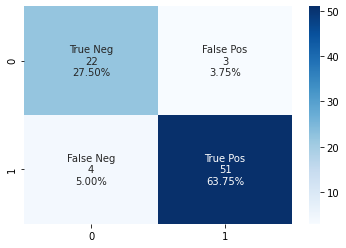

In [74]:
y_pred_cb = cb_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_cb)
accuracy_cb=accuracy_score(y_test, y_pred_cb)
print("Accuracy of CatBoost model is :", accuracy_cb)

In [75]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [76]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)

lgbm = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=param_test, 
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=4658,
    verbose=True)
 
 
lgbm_model = lgbm.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned LGBM Parameters: {}".format(lgbm_model.best_params_)) 
print("Best score is {}".format(lgbm_model.best_score_)) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Tuned LGBM Parameters: {'colsample_bytree': 0.6950767810734144, 'min_child_samples': 359, 'min_child_weight': 0.1, 'num_leaves': 28, 'reg_alpha': 50, 'reg_lambda': 0, 'subsample': 0.27590990553820777}
Best score is 0.5


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.3s finished


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.69      1.00      0.81        55

    accuracy                           0.69        80
   macro avg       0.34      0.50      0.41        80
weighted avg       0.47      0.69      0.56        80

Accuracy of LGBM model is : 0.6875


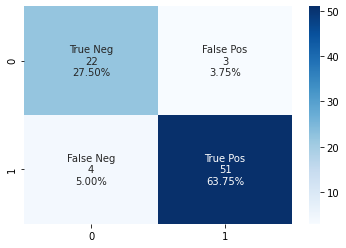

In [77]:
y_pred_lgbm = lgbm_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_lgbm)
accuracy_lgbm=accuracy_score(y_test, y_pred_lgbm)
print("Accuracy of LGBM model is :", accuracy_lgbm)

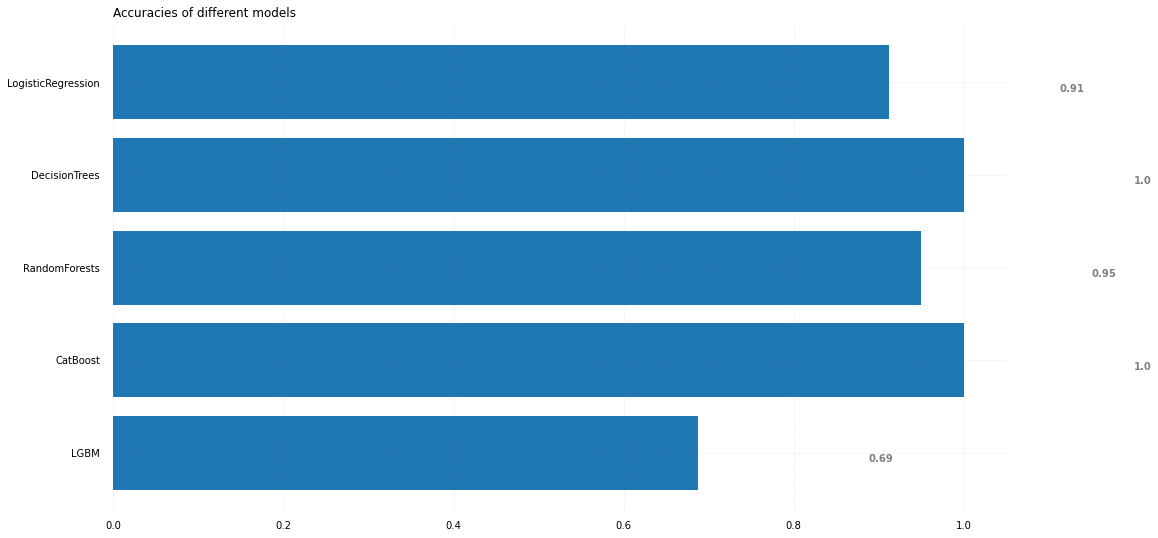

In [78]:
models= ['LogisticRegression', 'DecisionTrees', 'RandomForests', 'CatBoost', 'LGBM']
accuracies = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_cb,accuracy_lgbm]

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(models, accuracies) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
	ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 10, fontweight ='bold', 
			color ='grey') 

# Add Plot Title 
ax.set_title('Accuracies of different models', 
			loc ='left') 

# Show Plot 
plt.show() 

INFERENCE - It can be seen that DT, RF and catboost give the best accuracies and their best parameters have been determined using RandomSearchCV.